In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path = './archive/netflix-rotten-tomatoes-metacritic-imdb.csv'
df = pd.read_csv(file_path)

In [2]:
df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

In [11]:
# Print the first column of the DataFrame
print(df.iloc[:, 0])

0                                 Lets Fight Ghost
1                              HOW TO BUILD A GIRL
2                                       Centigrade
3                                            ANNE+
4                                            Moxie
                           ...                    
15475                       K-POP Extreme Survival
15476              DreamWorks Shreks Swamp Stories
15477    DreamWorks Happy Holidays from Madagascar
15478                  DreamWorks Holiday Classics
15479     DreamWorks Kung Fu Panda Awesome Secrets
Name: Title, Length: 15480, dtype: object


In [3]:
# Get a summary of statistics for numerical columns
df.describe()


,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


In [4]:

# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13526 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

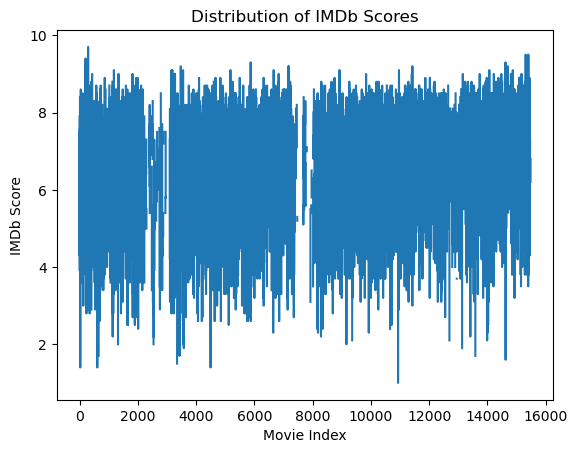

In [10]:
import matplotlib.pyplot as plt

# Plot IMDb Score
df['IMDb Score'].plot(kind='line', title='Distribution of IMDb Scores')
plt.ylabel('IMDb Score')
plt.xlabel('Movie Index')
plt.show()

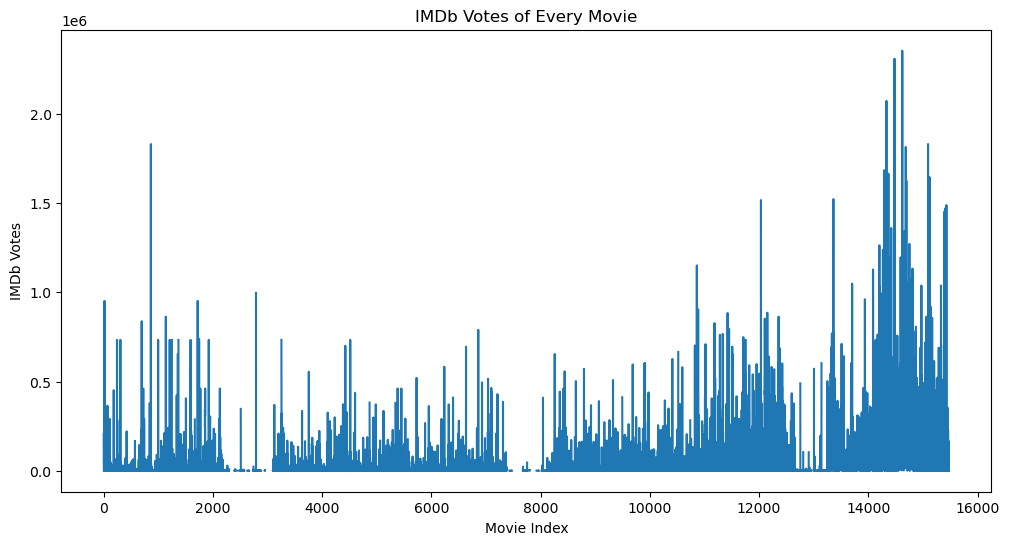

In [8]:
import matplotlib.pyplot as plt

# Plot IMDb Votes of every movie
plt.figure(figsize=(12, 6))
df['IMDb Votes'].plot(kind='line', title='IMDb Votes of Every Movie')
plt.xlabel('Movie Index')
plt.ylabel('IMDb Votes')
plt.show()

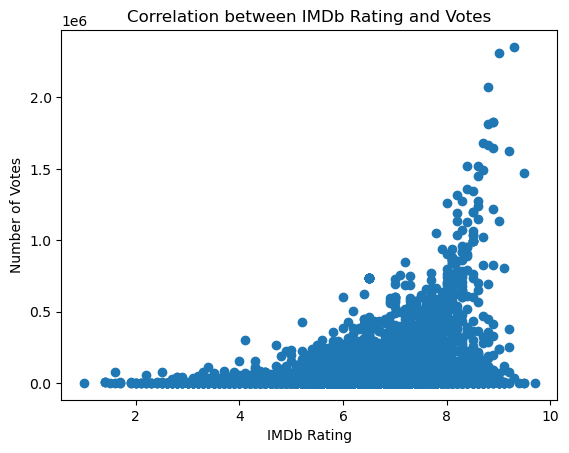

In [51]:
# Plot correlation between IMDb rating and votes
plt.scatter(df['IMDb Score'], df['IMDb Votes'])
plt.title('Correlation between IMDb Rating and Votes')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Votes')
plt.show()

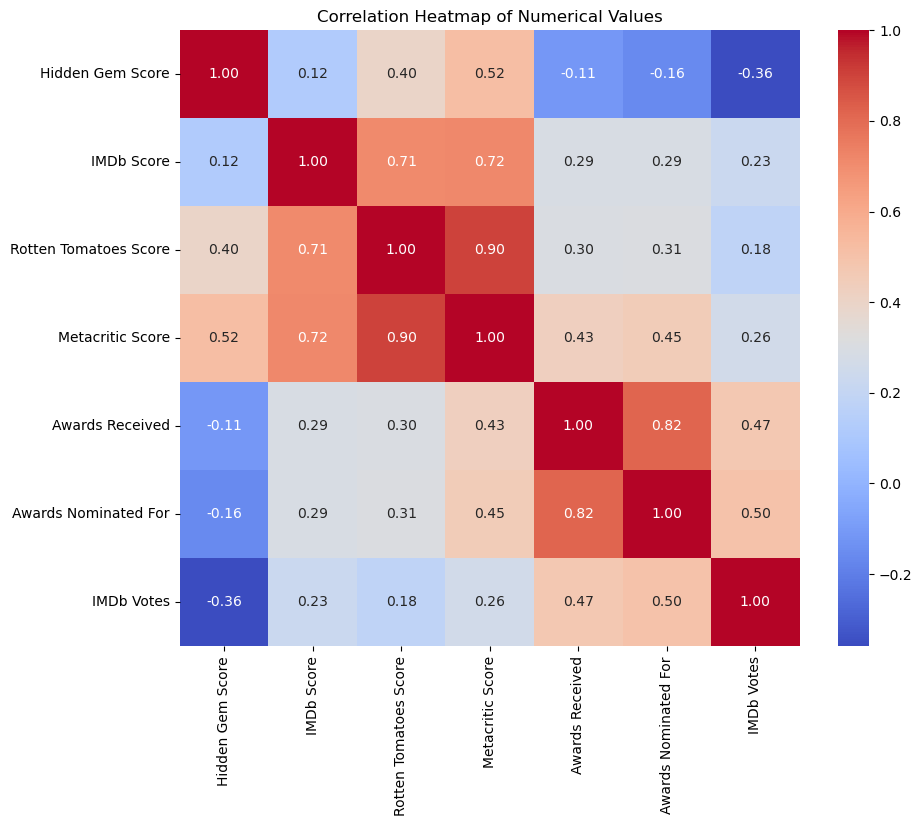

In [71]:
import seaborn as sns
# Filter out non-numerical values
df_numerical = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = df_numerical.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Values')
plt.show()

In [52]:
# Sort the DataFrame by IMDb Score in descending order and print the top 3 rows
top_3_imdb = df.sort_values(by='IMDb Score', ascending=False).head(3)
print("Top 3 movies by IMDb Score:")
print(top_3_imdb[['Title', 'IMDb Score']])

# Sort the DataFrame by IMDb Score in ascending order and print the bottom 3 rows
bottom_3_imdb = df.sort_values(by='IMDb Score', ascending=True).head(3)
print("\nBottom 3 movies by IMDb Score:")
print(bottom_3_imdb[['Title', 'IMDb Score']])

Top 3 movies by IMDb Score:
               Title  IMDb Score
293      No Festival         9.7
15406   Breaking Bad         9.5
15314  Horsin Around         9.5

Bottom 3 movies by IMDb Score:
             Title  IMDb Score
10933  Be with You         1.0
608      Debt Fees         1.4
4497      Smoleńsk         1.4


In [56]:
# Convert the DataFrame to a NumPy array
numpy_array = df.to_numpy()
numpy_array

array([['Lets Fight Ghost', 'Crime, Drama, Fantasy, Horror, Romance',
        'Comedy Programmes,Romantic TV Comedies,Horror Programmes,Thai TV Programmes',
        ...,
        'https://m.media-amazon.com/images/M/MV5BOWM4NTY2NTMtZDZlZS00NTgyLWEzZDMtODE3ZGI1MzI3ZmU5XkEyXkFqcGdeQXVyNzI1NzMxNzM@._V1_SX300.jpg',
        nan, nan],
       ['HOW TO BUILD A GIRL', 'Comedy',
        'Dramas,Comedies,Films Based on Books,British', ...,
        'https://m.media-amazon.com/images/M/MV5BZGUyN2ZlMjYtZTk2Yy00MWZiLWIyMDktMzFlMmEzOWVlMGNiXkEyXkFqcGdeQXVyMTE1MzI2NzIz._V1_SX300.jpg',
        'https://www.youtube.com/watch?v=eIbcxPy4okQ', 'YouTube'],
       ['Centigrade', 'Drama, Thriller', 'Thrillers', ...,
        'https://m.media-amazon.com/images/M/MV5BODM2MDQ5MjktYTM1ZS00Y2M4LTg0MDAtZjFjZDM1MDQxZGRmXkEyXkFqcGdeQXVyNDA1NDA2NTk@._V1_SX300.jpg',
        'https://www.youtube.com/watch?v=0RvV7TNUlkQ', 'YouTube'],
       ...,
       ['DreamWorks Happy Holidays from Madagascar',
        'Animation, Comed

In [72]:
import numpy as np

nparr = np.genfromtxt(file_path, delimiter=',', dtype=str, skip_header=1)
print(nparr)

ValueError: Some errors were detected !
    Line #3 (got 39 columns instead of 44)
    Line #4 (got 34 columns instead of 44)
    Line #5 (got 36 columns instead of 44)
    Line #6 (got 71 columns instead of 44)
    Line #7 (got 40 columns instead of 44)
    Line #8 (got 34 columns instead of 44)
    Line #9 (got 35 columns instead of 44)
    Line #10 (got 49 columns instead of 44)
    Line #11 (got 56 columns instead of 44)
    Line #12 (got 59 columns instead of 44)
    Line #13 (got 59 columns instead of 44)
    Line #14 (got 57 columns instead of 44)
    Line #15 (got 55 columns instead of 44)
    Line #16 (got 53 columns instead of 44)
    Line #17 (got 59 columns instead of 44)
    Line #18 (got 53 columns instead of 44)
    Line #19 (got 59 columns instead of 44)
    Line #20 (got 52 columns instead of 44)
    Line #21 (got 52 columns instead of 44)
    Line #22 (got 47 columns instead of 44)
    Line #23 (got 53 columns instead of 44)
    Line #24 (got 52 columns instead of 44)
    Line #25 (got 42 columns instead of 44)
    Line #26 (got 57 columns instead of 44)
    Line #27 (got 38 columns instead of 44)
    Line #29 (got 41 columns instead of 44)
    Line #30 (got 37 columns instead of 44)
    Line #31 (got 42 columns instead of 44)
    Line #32 (got 39 columns instead of 44)
    Line #33 (got 38 columns instead of 44)
    Line #34 (got 38 columns instead of 44)
    Line #35 (got 36 columns instead of 44)
    Line #36 (got 38 columns instead of 44)
    Line #37 (got 40 columns instead of 44)
    Line #38 (got 37 columns instead of 44)
    Line #39 (got 42 columns instead of 44)
    Line #40 (got 42 columns instead of 44)
    Line #41 (got 38 columns instead of 44)
    Line #42 (got 38 columns instead of 44)
    Line #43 (got 37 columns instead of 44)
    Line #44 (got 33 columns instead of 44)
    Line #45 (got 39 columns instead of 44)
    Line #46 (got 37 columns instead of 44)
    Line #47 (got 36 columns instead of 44)
    Line #48 (got 36 columns instead of 44)
    Line #49 (got 41 columns instead of 44)
    Line #50 (got 40 columns instead of 44)
    Line #51 (got 42 columns instead of 44)
    Line #52 (got 37 columns instead of 44)
    Line #53 (got 43 columns instead of 44)
    Line #55 (got 63 columns instead of 44)
    Line #56 (got 67 columns instead of 44)
    Line #57 (got 42 columns instead of 44)
    Line #58 (got 35 columns instead of 44)
    Line #59 (got 37 columns instead of 44)
    Line #60 (got 34 columns instead of 44)
    Line #61 (got 33 columns instead of 44)
    Line #62 (got 39 columns instead of 44)
    Line #63 (got 40 columns instead of 44)
    Line #64 (got 36 columns instead of 44)
    Line #65 (got 47 columns instead of 44)
    Line #66 (got 42 columns instead of 44)
    Line #67 (got 35 columns instead of 44)
    Line #68 (got 39 columns instead of 44)
    Line #69 (got 37 columns instead of 44)
    Line #70 (got 40 columns instead of 44)
    Line #71 (got 39 columns instead of 44)
    Line #72 (got 38 columns instead of 44)
    Line #73 (got 36 columns instead of 44)
    Line #74 (got 39 columns instead of 44)
    Line #75 (got 47 columns instead of 44)
    Line #76 (got 37 columns instead of 44)
    Line #77 (got 41 columns instead of 44)
    Line #78 (got 38 columns instead of 44)
    Line #79 (got 34 columns instead of 44)
    Line #80 (got 37 columns instead of 44)
    Line #81 (got 38 columns instead of 44)
    Line #82 (got 42 columns instead of 44)
    Line #83 (got 38 columns instead of 44)
    Line #84 (got 40 columns instead of 44)
    Line #85 (got 37 columns instead of 44)
    Line #86 (got 37 columns instead of 44)
    Line #87 (got 35 columns instead of 44)
    Line #88 (got 40 columns instead of 44)
    Line #89 (got 40 columns instead of 44)
    Line #90 (got 36 columns instead of 44)
    Line #91 (got 35 columns instead of 44)
    Line #92 (got 38 columns instead of 44)
    Line #93 (got 36 columns instead of 44)
    Line #94 (got 35 columns instead of 44)
    Line #95 (got 43 columns instead of 44)
    Line #96 (got 46 columns instead of 44)
    Line #97 (got 43 columns instead of 44)
    Line #98 (got 85 columns instead of 44)
    Line #99 (got 68 columns instead of 44)
    Line #100 (got 43 columns instead of 44)
    Line #101 (got 39 columns instead of 44)
    Line #102 (got 45 columns instead of 44)
    Line #103 (got 45 columns instead of 44)
    Line #104 (got 72 columns instead of 44)
    Line #105 (got 40 columns instead of 44)
    Line #106 (got 36 columns instead of 44)
    Line #108 (got 39 columns instead of 44)
    Line #109 (got 47 columns instead of 44)
    Line #110 (got 40 columns instead of 44)
    Line #111 (got 63 columns instead of 44)
    Line #112 (got 72 columns instead of 44)
    Line #113 (got 38 columns instead of 44)
    Line #114 (got 42 columns instead of 44)
    Line #115 (got 77 columns instead of 44)
    Line #116 (got 34 columns instead of 44)
    Line #117 (got 35 columns instead of 44)
    Line #119 (got 61 columns instead of 44)
    Line #120 (got 36 columns instead of 44)
    Line #121 (got 39 columns instead of 44)
    Line #122 (got 40 columns instead of 44)
    Line #123 (got 39 columns instead of 44)
    Line #124 (got 35 columns instead of 44)
    Line #125 (got 38 columns instead of 44)
    Line #126 (got 55 columns instead of 44)
    Line #127 (got 46 columns instead of 44)
    Line #128 (got 75 columns instead of 44)
    Line #129 (got 72 columns instead of 44)
    Line #130 (got 37 columns instead of 44)
    Line #131 (got 35 columns instead of 44)
    Line #133 (got 45 columns instead of 44)
    Line #134 (got 47 columns instead of 44)
    Line #135 (got 37 columns instead of 44)
    Line #136 (got 37 columns instead of 44)
    Line #137 (got 36 columns instead of 44)
    Line #139 (got 34 columns instead of 44)
    Line #140 (got 53 columns instead of 44)
    Line #141 (got 53 columns instead of 44)
    Line #142 (got 53 columns instead of 44)
    Line #143 (got 61 columns instead of 44)
    Line #144 (got 36 columns instead of 44)
    Line #145 (got 35 columns instead of 44)
    Line #146 (got 46 columns instead of 44)
    Line #147 (got 54 columns instead of 44)
    Line #148 (got 74 columns instead of 44)
    Line #149 (got 40 columns instead of 44)
    Line #150 (got 36 columns instead of 44)
    Line #151 (got 39 columns instead of 44)
    Line #153 (got 38 columns instead of 44)
    Line #154 (got 42 columns instead of 44)
    Line #155 (got 39 columns instead of 44)
    Line #156 (got 41 columns instead of 44)
    Line #157 (got 47 columns instead of 44)
    Line #158 (got 40 columns instead of 44)
    Line #159 (got 35 columns instead of 44)
    Line #160 (got 58 columns instead of 44)
    Line #161 (got 71 columns instead of 44)
    Line #162 (got 72 columns instead of 44)
    Line #163 (got 39 columns instead of 44)
    Line #164 (got 38 columns instead of 44)
    Line #165 (got 39 columns instead of 44)
    Line #166 (got 40 columns instead of 44)
    Line #167 (got 31 columns instead of 44)
    Line #168 (got 56 columns instead of 44)
    Line #169 (got 72 columns instead of 44)
    Line #170 (got 34 columns instead of 44)
    Line #171 (got 41 columns instead of 44)
    Line #172 (got 46 columns instead of 44)
    Line #173 (got 40 columns instead of 44)
    Line #175 (got 42 columns instead of 44)
    Line #176 (got 40 columns instead of 44)
    Line #177 (got 43 columns instead of 44)
    Line #178 (got 37 columns instead of 44)
    Line #179 (got 75 columns instead of 44)
    Line #180 (got 38 columns instead of 44)
    Line #181 (got 35 columns instead of 44)
    Line #182 (got 55 columns instead of 44)
    Line #183 (got 57 columns instead of 44)
    Line #184 (got 50 columns instead of 44)
    Line #185 (got 38 columns instead of 44)
    Line #186 (got 51 columns instead of 44)
    Line #187 (got 40 columns instead of 44)
    Line #188 (got 38 columns instead of 44)
    Line #189 (got 36 columns instead of 44)
    Line #190 (got 39 columns instead of 44)
    Line #191 (got 39 columns instead of 44)
    Line #192 (got 81 columns instead of 44)
    Line #193 (got 69 columns instead of 44)
    Line #194 (got 72 columns instead of 44)
    Line #195 (got 71 columns instead of 44)
    Line #196 (got 68 columns instead of 44)
    Line #197 (got 40 columns instead of 44)
    Line #198 (got 42 columns instead of 44)
    Line #199 (got 52 columns instead of 44)
    Line #200 (got 78 columns instead of 44)
    Line #201 (got 34 columns instead of 44)
    Line #202 (got 38 columns instead of 44)
    Line #203 (got 51 columns instead of 44)
    Line #204 (got 53 columns instead of 44)
    Line #205 (got 56 columns instead of 44)
    Line #206 (got 59 columns instead of 44)
    Line #207 (got 53 columns instead of 44)
    Line #208 (got 55 columns instead of 44)
    Line #209 (got 53 columns instead of 44)
    Line #210 (got 53 columns instead of 44)
    Line #211 (got 50 columns instead of 44)
    Line #212 (got 49 columns instead of 44)
    Line #213 (got 50 columns instead of 44)
    Line #214 (got 52 columns instead of 44)
    Line #215 (got 57 columns instead of 44)
    Line #216 (got 56 columns instead of 44)
    Line #217 (got 54 columns instead of 44)
    Line #218 (got 53 columns instead of 44)
    Line #219 (got 50 columns instead of 44)
    Line #220 (got 54 columns instead of 44)
    Line #221 (got 51 columns instead of 44)
    Line #222 (got 71 columns instead of 44)
    Line #223 (got 69 columns instead of 44)
    Line #224 (got 35 columns instead of 44)
    Line #225 (got 11 columns instead of 44)
    Line #226 (got 38 columns instead of 44)
    Line #227 (got 37 columns instead of 44)
    Line #228 (got 35 columns instead of 44)
    Line #229 (got 33 columns instead of 44)
    Line #230 (got 41 columns instead of 44)
    Line #231 (got 36 columns instead of 44)
    Line #232 (got 9 columns instead of 44)
    Line #233 (got 43 columns instead of 44)
    Line #234 (got 39 columns instead of 44)
    Line #235 (got 39 columns instead of 44)
    Line #236 (got 41 columns instead of 44)
    Line #237 (got 39 columns instead of 44)
    Line #238 (got 41 columns instead of 44)
    Line #239 (got 40 columns instead of 44)
    Line #240 (got 37 columns instead of 44)
    Line #241 (got 4 columns instead of 44)
    Line #242 (got 46 columns instead of 44)
    Line #243 (got 42 columns instead of 44)
    Line #244 (got 35 columns instead of 44)
    Line #245 (got 42 columns instead of 44)
    Line #247 (got 38 columns instead of 44)
    Line #248 (got 31 columns instead of 44)
    Line #249 (got 70 columns instead of 44)
    Line #250 (got 39 columns instead of 44)
    Line #251 (got 39 columns instead of 44)
    Line #252 (got 34 columns instead of 44)
    Line #253 (got 48 columns instead of 44)
    Line #254 (got 52 columns instead of 44)
    Line #255 (got 40 columns instead of 44)
    Line #256 (got 68 columns instead of 44)
    Line #257 (got 74 columns instead of 44)
    Line #258 (got 69 columns instead of 44)
    Line #259 (got 37 columns instead of 44)
    Line #260 (got 36 columns instead of 44)
    Line #261 (got 74 columns instead of 44)
    Line #262 (got 41 columns instead of 44)
    Line #263 (got 45 columns instead of 44)
    Line #264 (got 43 columns instead of 44)
    Line #265 (got 37 columns instead of 44)
    Line #266 (got 36 columns instead of 44)
    Line #267 (got 37 columns instead of 44)
    Line #268 (got 34 columns instead of 44)
    Line #269 (got 35 columns instead of 44)
    Line #270 (got 36 columns instead of 44)
    Line #271 (got 55 columns instead of 44)
    Line #272 (got 72 columns instead of 44)
    Line #273 (got 36 columns instead of 44)
    Line #274 (got 58 columns instead of 44)
    Line #275 (got 36 columns instead of 44)
    Line #276 (got 5 columns instead of 44)
    Line #277 (got 70 columns instead of 44)
    Line #278 (got 39 columns instead of 44)
    Line #279 (got 41 columns instead of 44)
    Line #280 (got 49 columns instead of 44)
    Line #281 (got 36 columns instead of 44)
    Line #282 (got 36 columns instead of 44)
    Line #283 (got 39 columns instead of 44)
    Line #284 (got 42 columns instead of 44)
    Line #285 (got 39 columns instead of 44)
    Line #286 (got 29 columns instead of 44)
    Line #287 (got 33 columns instead of 44)
    Line #288 (got 51 columns instead of 44)
    Line #289 (got 38 columns instead of 44)
    Line #290 (got 34 columns instead of 44)
    Line #291 (got 39 columns instead of 44)
    Line #292 (got 35 columns instead of 44)
    Line #293 (got 33 columns instead of 44)
    Line #294 (got 36 columns instead of 44)
    Line #295 (got 34 columns instead of 44)
    Line #296 (got 39 columns instead of 44)
    Line #297 (got 39 columns instead of 44)
    Line #298 (got 35 columns instead of 44)
    Line #299 (got 43 columns instead of 44)
    Line #300 (got 39 columns instead of 44)
    Line #302 (got 74 columns instead of 44)
    Line #303 (got 76 columns instead of 44)
    Line #304 (got 41 columns instead of 44)
    Line #305 (got 36 columns instead of 44)
    Line #306 (got 40 columns instead of 44)
    Line #307 (got 36 columns instead of 44)
    Line #309 (got 47 columns instead of 44)
    Line #310 (got 42 columns instead of 44)
    Line #311 (got 73 columns instead of 44)
    Line #312 (got 69 columns instead of 44)
    Line #313 (got 40 columns instead of 44)
    Line #314 (got 47 columns instead of 44)
    Line #315 (got 38 columns instead of 44)
    Line #316 (got 38 columns instead of 44)
    Line #317 (got 65 columns instead of 44)
    Line #318 (got 38 columns instead of 44)
    Line #319 (got 36 columns instead of 44)
    Line #320 (got 39 columns instead of 44)
    Line #321 (got 37 columns instead of 44)
    Line #322 (got 37 columns instead of 44)
    Line #323 (got 40 columns instead of 44)
    Line #324 (got 37 columns instead of 44)
    Line #325 (got 40 columns instead of 44)
    Line #326 (got 34 columns instead of 44)
    Line #327 (got 41 columns instead of 44)
    Line #328 (got 9 columns instead of 44)
    Line #329 (got 41 columns instead of 44)
    Line #330 (got 39 columns instead of 44)
    Line #331 (got 35 columns instead of 44)
    Line #332 (got 73 columns instead of 44)
    Line #333 (got 76 columns instead of 44)
    Line #334 (got 79 columns instead of 44)
    Line #335 (got 69 columns instead of 44)
    Line #336 (got 39 columns instead of 44)
    Line #337 (got 39 columns instead of 44)
    Line #338 (got 39 columns instead of 44)
    Line #339 (got 34 columns instead of 44)
    Line #340 (got 37 columns instead of 44)
    Line #341 (got 45 columns instead of 44)
    Line #342 (got 41 columns instead of 44)
    Line #343 (got 36 columns instead of 44)
    Line #344 (got 40 columns instead of 44)
    Line #345 (got 4 columns instead of 44)
    Line #346 (got 71 columns instead of 44)
    Line #347 (got 78 columns instead of 44)
    Line #348 (got 36 columns instead of 44)
    Line #349 (got 43 columns instead of 44)
    Line #350 (got 41 columns instead of 44)
    Line #351 (got 42 columns instead of 44)
    Line #352 (got 46 columns instead of 44)
    Line #353 (got 39 columns instead of 44)
    Line #354 (got 73 columns instead of 44)
    Line #355 (got 38 columns instead of 44)
    Line #356 (got 46 columns instead of 44)
    Line #357 (got 39 columns instead of 44)
    Line #358 (got 42 columns instead of 44)
    Line #359 (got 36 columns instead of 44)
    Line #360 (got 41 columns instead of 44)
    Line #361 (got 39 columns instead of 44)
    Line #362 (got 38 columns instead of 44)
    Line #363 (got 73 columns instead of 44)
    Line #364 (got 38 columns instead of 44)
    Line #365 (got 36 columns instead of 44)
    Line #366 (got 39 columns instead of 44)
    Line #367 (got 38 columns instead of 44)
    Line #368 (got 45 columns instead of 44)
    Line #369 (got 84 columns instead of 44)
    Line #370 (got 39 columns instead of 44)
    Line #371 (got 36 columns instead of 44)
    Line #372 (got 41 columns instead of 44)
    Line #373 (got 39 columns instead of 44)
    Line #374 (got 40 columns instead of 44)
    Line #375 (got 68 columns instead of 44)
    Line #376 (got 39 columns instead of 44)
    Line #377 (got 31 columns instead of 44)
    Line #378 (got 38 columns instead of 44)
    Line #379 (got 39 columns instead of 44)
    Line #380 (got 42 columns instead of 44)
    Line #381 (got 70 columns instead of 44)
    Line #382 (got 70 columns instead of 44)
    Line #383 (got 69 columns instead of 44)
    Line #384 (got 39 columns instead of 44)
    Line #385 (got 39 columns instead of 44)
    Line #386 (got 39 columns instead of 44)
    Line #387 (got 35 columns instead of 44)
    Line #388 (got 71 columns instead of 44)
    Line #389 (got 6 columns instead of 44)
    Line #390 (got 36 columns instead of 44)
    Line #391 (got 37 columns instead of 44)
    Line #392 (got 32 columns instead of 44)
    Line #393 (got 38 columns instead of 44)
    Line #394 (got 38 columns instead of 44)
    Line #395 (got 38 columns instead of 44)
    Line #396 (got 42 columns instead of 44)
    Line #397 (got 60 columns instead of 44)
    Line #398 (got 72 columns instead of 44)
    Line #400 (got 37 columns instead of 44)
    Line #401 (got 42 columns instead of 44)
    Line #402 (got 68 columns instead of 44)
    Line #403 (got 68 columns instead of 44)
    Line #404 (got 71 columns instead of 44)
    Line #405 (got 42 columns instead of 44)
    Line #406 (got 41 columns instead of 44)
    Line #407 (got 38 columns instead of 44)
    Line #408 (got 42 columns instead of 44)
    Line #409 (got 35 columns instead of 44)
    Line #410 (got 40 columns instead of 44)
    Line #411 (got 36 columns instead of 44)
    Line #412 (got 42 columns instead of 44)
    Line #413 (got 36 columns instead of 44)
    Line #414 (got 39 columns instead of 44)
    Line #415 (got 40 columns instead of 44)
    Line #416 (got 42 columns instead of 44)
    Line #417 (got 50 columns instead of 44)
    Line #418 (got 49 columns instead of 44)
    Line #419 (got 46 columns instead of 44)
    Line #420 (got 39 columns instead of 44)
    Line #421 (got 45 columns instead of 44)
    Line #422 (got 47 columns instead of 44)
    Line #424 (got 45 columns instead of 44)
    Line #425 (got 35 columns instead of 44)
    Line #426 (got 48 columns instead of 44)
    Line #427 (got 36 columns instead of 44)
    Line #428 (got 35 columns instead of 44)
    Line #429 (got 32 columns instead of 44)
    Line #430 (got 54 columns instead of 44)
    Line #431 (got 75 columns instead of 44)
    Line #432 (got 8 columns instead of 44)
    Line #433 (got 75 columns instead of 44)
    Line #434 (got 40 columns instead of 44)
    Line #435 (got 71 columns instead of 44)
    Line #436 (got 36 columns instead of 44)
    Line #437 (got 39 columns instead of 44)
    Line #438 (got 14 columns instead of 44)
    Line #440 (got 43 columns instead of 44)
    Line #441 (got 38 columns instead of 44)
    Line #442 (got 37 columns instead of 44)
    Line #443 (got 38 columns instead of 44)
    Line #444 (got 38 columns instead of 44)
    Line #445 (got 40 columns instead of 44)
    Line #446 (got 40 columns instead of 44)
    Line #447 (got 38 columns instead of 44)
    Line #448 (got 40 columns instead of 44)
    Line #449 (got 57 columns instead of 44)
    Line #450 (got 62 columns instead of 44)
    Line #451 (got 59 columns instead of 44)
    Line #452 (got 60 columns instead of 44)
    Line #453 (got 79 columns instead of 44)
    Line #454 (got 70 columns instead of 44)
    Line #455 (got 6 columns instead of 44)
    Line #456 (got 6 columns instead of 44)
    Line #457 (got 36 columns instead of 44)
    Line #458 (got 43 columns instead of 44)
    Line #459 (got 42 columns instead of 44)
    Line #460 (got 37 columns instead of 44)
    Line #461 (got 43 columns instead of 44)
    Line #462 (got 36 columns instead of 44)
    Line #464 (got 34 columns instead of 44)
    Line #465 (got 38 columns instead of 44)
    Line #466 (got 38 columns instead of 44)
    Line #467 (got 36 columns instead of 44)
    Line #468 (got 73 columns instead of 44)
    Line #469 (got 37 columns instead of 44)
    Line #470 (got 40 columns instead of 44)
    Line #471 (got 67 columns instead of 44)
    Line #472 (got 77 columns instead of 44)
    Line #473 (got 78 columns instead of 44)
    Line #474 (got 41 columns instead of 44)
    Line #475 (got 40 columns instead of 44)
    Line #476 (got 35 columns instead of 44)
    Line #477 (got 35 columns instead of 44)
    Line #478 (got 34 columns instead of 44)
    Line #479 (got 45 columns instead of 44)
    Line #480 (got 41 columns instead of 44)
    Line #481 (got 42 columns instead of 44)
    Line #482 (got 40 columns instead of 44)
    Line #483 (got 40 columns instead of 44)
    Line #484 (got 42 columns instead of 44)
    Line #486 (got 35 columns instead of 44)
    Line #487 (got 37 columns instead of 44)
    Line #488 (got 54 columns instead of 44)
    Line #489 (got 36 columns instead of 44)
    Line #490 (got 34 columns instead of 44)
    Line #491 (got 39 columns instead of 44)
    Line #492 (got 35 columns instead of 44)
    Line #493 (got 37 columns instead of 44)
    Line #494 (got 60 columns instead of 44)
    Line #495 (got 62 columns instead of 44)
    Line #496 (got 88 columns instead of 44)
    Line #497 (got 71 columns instead of 44)
    Line #498 (got 41 columns instead of 44)
    Line #499 (got 40 columns instead of 44)
    Line #500 (got 39 columns instead of 44)
    Line #501 (got 38 columns instead of 44)
    Line #502 (got 42 columns instead of 44)
    Line #503 (got 65 columns instead of 44)
    Line #504 (got 45 columns instead of 44)
    Line #505 (got 37 columns instead of 44)
    Line #506 (got 6 columns instead of 44)
    Line #507 (got 37 columns instead of 44)
    Line #508 (got 39 columns instead of 44)
    Line #509 (got 35 columns instead of 44)
    Line #510 (got 39 columns instead of 44)
    Line #511 (got 31 columns instead of 44)
    Line #512 (got 37 columns instead of 44)
    Line #513 (got 38 columns instead of 44)
    Line #514 (got 32 columns instead of 44)
    Line #515 (got 46 columns instead of 44)
    Line #516 (got 41 columns instead of 44)
    Line #517 (got 36 columns instead of 44)
    Line #518 (got 41 columns instead of 44)
    Line #519 (got 42 columns instead of 44)
    Line #520 (got 37 columns instead of 44)
    Line #521 (got 10 columns instead of 44)
    Line #522 (got 49 columns instead of 44)
    Line #523 (got 48 columns instead of 44)
    Line #524 (got 76 columns instead of 44)
    Line #525 (got 35 columns instead of 44)
    Line #526 (got 41 columns instead of 44)
    Line #527 (got 72 columns instead of 44)
    Line #528 (got 72 columns instead of 44)
    Line #529 (got 72 columns instead of 44)
    Line #530 (got 42 columns instead of 44)
    Line #531 (got 74 columns instead of 44)
    Line #532 (got 37 columns instead of 44)
    Line #533 (got 33 columns instead of 44)
    Line #534 (got 8 columns instead of 44)
    Line #535 (got 70 columns instead of 44)
    Line #536 (got 80 columns instead of 44)
    Line #537 (got 37 columns instead of 44)
    Line #538 (got 36 columns instead of 44)
    Line #539 (got 41 columns instead of 44)
    Line #540 (got 38 columns instead of 44)
    Line #541 (got 39 columns instead of 44)
    Line #542 (got 38 columns instead of 44)
    Line #543 (got 40 columns instead of 44)
    Line #544 (got 68 columns instead of 44)
    Line #545 (got 46 columns instead of 44)
    Line #546 (got 76 columns instead of 44)
    Line #547 (got 78 columns instead of 44)
    Line #548 (got 79 columns instead of 44)
    Line #549 (got 73 columns instead of 44)
    Line #550 (got 71 columns instead of 44)
    Line #551 (got 33 columns instead of 44)
    Line #552 (got 43 columns instead of 44)
    Line #553 (got 35 columns instead of 44)
    Line #554 (got 36 columns instead of 44)
    Line #555 (got 36 columns instead of 44)
    Line #556 (got 37 columns instead of 44)
    Line #557 (got 45 columns instead of 44)
    Line #558 (got 4 columns instead of 44)
    Line #559 (got 35 columns instead of 44)
    Line #560 (got 39 columns instead of 44)
    Line #562 (got 46 columns instead of 44)
    Line #563 (got 43 columns instead of 44)
    Line #564 (got 47 columns instead of 44)
    Line #565 (got 62 columns instead of 44)
    Line #566 (got 7 columns instead of 44)
    Line #567 (got 69 columns instead of 44)
    Line #568 (got 72 columns instead of 44)
    Line #569 (got 43 columns instead of 44)
    Line #570 (got 38 columns instead of 44)
    Line #571 (got 33 columns instead of 44)
    Line #572 (got 79 columns instead of 44)
    Line #573 (got 78 columns instead of 44)
    Line #574 (got 36 columns instead of 44)
    Line #575 (got 43 columns instead of 44)
    Line #576 (got 41 columns instead of 44)
    Line #577 (got 71 columns instead of 44)
    Line #578 (got 74 columns instead of 44)
    Line #579 (got 73 columns instead of 44)
    Line #580 (got 39 columns instead of 44)
    Line #581 (got 37 columns instead of 44)
    Line #582 (got 65 columns instead of 44)
    Line #583 (got 71 columns instead of 44)
    Line #584 (got 39 columns instead of 44)
    Line #585 (got 34 columns instead of 44)
    Line #586 (got 69 columns instead of 44)
    Line #587 (got 64 columns instead of 44)
    Line #588 (got 71 columns instead of 44)
    Line #589 (got 79 columns instead of 44)
    Line #590 (got 37 columns instead of 44)
    Line #591 (got 47 columns instead of 44)
    Line #592 (got 45 columns instead of 44)
    Line #593 (got 70 columns instead of 44)
    Line #594 (got 73 columns instead of 44)
    Line #595 (got 38 columns instead of 44)
    Line #596 (got 33 columns instead of 44)
    Line #597 (got 41 columns instead of 44)
    Line #598 (got 37 columns instead of 44)
    Line #599 (got 40 columns instead of 44)
    Line #600 (got 33 columns instead of 44)
    Line #601 (got 68 columns instead of 44)
    Line #602 (got 33 columns instead of 44)
    Line #603 (got 42 columns instead of 44)
    Line #604 (got 36 columns instead of 44)
    Line #605 (got 37 columns instead of 44)
    Line #606 (got 35 columns instead of 44)
    Line #607 (got 38 columns instead of 44)
    Line #608 (got 36 columns instead of 44)
    Line #609 (got 35 columns instead of 44)
    Line #610 (got 37 columns instead of 44)
    Line #611 (got 37 columns instead of 44)
    Line #612 (got 34 columns instead of 44)
    Line #613 (got 42 columns instead of 44)
    Line #614 (got 36 columns instead of 44)
    Line #615 (got 37 columns instead of 44)
    Line #616 (got 71 columns instead of 44)
    Line #617 (got 39 columns instead of 44)
    Line #618 (got 34 columns instead of 44)
    Line #619 (got 34 columns instead of 44)
    Line #620 (got 38 columns instead of 44)
    Line #621 (got 75 columns instead of 44)
    Line #622 (got 40 columns instead of 44)
    Line #623 (got 72 columns instead of 44)
    Line #624 (got 37 columns instead of 44)
    Line #625 (got 39 columns instead of 44)
    Line #626 (got 36 columns instead of 44)
    Line #627 (got 38 columns instead of 44)
    Line #628 (got 41 columns instead of 44)
    Line #629 (got 42 columns instead of 44)
    Line #630 (got 38 columns instead of 44)
    Line #631 (got 7 columns instead of 44)
    Line #632 (got 4 columns instead of 44)
    Line #633 (got 35 columns instead of 44)
    Line #634 (got 37 columns instead of 44)
    Line #635 (got 39 columns instead of 44)
    Line #637 (got 38 columns instead of 44)
    Line #638 (got 41 columns instead of 44)
    Line #639 (got 39 columns instead of 44)
    Line #640 (got 39 columns instead of 44)
    Line #641 (got 40 columns instead of 44)
    Line #642 (got 35 columns instead of 44)
    Line #643 (got 39 columns instead of 44)
    Line #644 (got 43 columns instead of 44)
    Line #645 (got 40 columns instead of 44)
    Line #646 (got 40 columns instead of 44)
    Line #648 (got 45 columns instead of 44)
    Line #649 (got 41 columns instead of 44)
    Line #651 (got 35 columns instead of 44)
    Line #652 (got 41 columns instead of 44)
    Line #653 (got 37 columns instead of 44)
    Line #654 (got 35 columns instead of 44)
    Line #655 (got 34 columns instead of 44)
    Line #656 (got 37 columns instead of 44)
    Line #657 (got 41 columns instead of 44)
    Line #658 (got 33 columns instead of 44)
    Line #659 (got 39 columns instead of 44)
    Line #660 (got 39 columns instead of 44)
    Line #661 (got 36 columns instead of 44)
    Line #662 (got 39 columns instead of 44)
    Line #663 (got 42 columns instead of 44)
    Line #664 (got 42 columns instead of 44)
    Line #665 (got 39 columns instead of 44)
    Line #666 (got 39 columns instead of 44)
    Line #667 (got 36 columns instead of 44)
    Line #668 (got 40 columns instead of 44)
    Line #669 (got 37 columns instead of 44)
    Line #670 (got 43 columns instead of 44)
    Line #671 (got 40 columns instead of 44)
    Line #672 (got 37 columns instead of 44)
    Line #673 (got 40 columns instead of 44)
    Line #674 (got 39 columns instead of 44)
    Line #675 (got 39 columns instead of 44)
    Line #676 (got 38 columns instead of 44)
    Line #677 (got 42 columns instead of 44)
    Line #678 (got 46 columns instead of 44)
    Line #679 (got 36 columns instead of 44)
    Line #680 (got 47 columns instead of 44)
    Line #681 (got 8 columns instead of 44)
    Line #682 (got 40 columns instead of 44)
    Line #683 (got 43 columns instead of 44)
    Line #684 (got 37 columns instead of 44)
    Line #685 (got 41 columns instead of 44)
    Line #686 (got 39 columns instead of 44)
    Line #687 (got 39 columns instead of 44)
    Line #688 (got 36 columns instead of 44)
    Line #689 (got 33 columns instead of 44)
    Line #690 (got 34 columns instead of 44)
    Line #691 (got 37 columns instead of 44)
    Line #693 (got 37 columns instead of 44)
    Line #694 (got 31 columns instead of 44)
    Line #695 (got 37 columns instead of 44)
    Line #696 (got 38 columns instead of 44)
    Line #697 (got 36 columns instead of 44)
    Line #698 (got 48 columns instead of 44)
    Line #699 (got 41 columns instead of 44)
    Line #700 (got 40 columns instead of 44)
    Line #701 (got 39 columns instead of 44)
    Line #702 (got 43 columns instead of 44)
    Line #703 (got 34 columns instead of 44)
    Line #704 (got 34 columns instead of 44)
    Line #705 (got 48 columns instead of 44)
    Line #706 (got 37 columns instead of 44)
    Line #707 (got 64 columns instead of 44)
    Line #708 (got 41 columns instead of 44)
    Line #709 (got 39 columns instead of 44)
    Line #710 (got 45 columns instead of 44)
    Line #711 (got 38 columns instead of 44)
    Line #712 (got 39 columns instead of 44)
    Line #713 (got 53 columns instead of 44)
    Line #714 (got 45 columns instead of 44)
    Line #716 (got 34 columns instead of 44)
    Line #717 (got 52 columns instead of 44)
    Line #718 (got 68 columns instead of 44)
    Line #719 (got 78 columns instead of 44)
    Line #720 (got 38 columns instead of 44)
    Line #721 (got 71 columns instead of 44)
    Line #722 (got 36 columns instead of 44)
    Line #723 (got 39 columns instead of 44)
    Line #724 (got 72 columns instead of 44)
    Line #725 (got 72 columns instead of 44)
    Line #726 (got 33 columns instead of 44)
    Line #727 (got 46 columns instead of 44)
    Line #728 (got 38 columns instead of 44)
    Line #729 (got 42 columns instead of 44)
    Line #730 (got 42 columns instead of 44)
    Line #731 (got 39 columns instead of 44)
    Line #732 (got 72 columns instead of 44)
    Line #733 (got 70 columns instead of 44)
    Line #734 (got 61 columns instead of 44)
    Line #735 (got 77 columns instead of 44)
    Line #736 (got 39 columns instead of 44)
    Line #737 (got 73 columns instead of 44)
    Line #738 (got 39 columns instead of 44)
    Line #739 (got 70 columns instead of 44)
    Line #740 (got 74 columns instead of 44)
    Line #741 (got 70 columns instead of 44)
    Line #742 (got 83 columns instead of 44)
    Line #743 (got 45 columns instead of 44)
    Line #744 (got 41 columns instead of 44)
    Line #745 (got 73 columns instead of 44)
    Line #746 (got 43 columns instead of 44)
    Line #747 (got 42 columns instead of 44)
    Line #748 (got 39 columns instead of 44)
    Line #749 (got 34 columns instead of 44)
    Line #750 (got 36 columns instead of 44)
    Line #751 (got 43 columns instead of 44)
    Line #752 (got 42 columns instead of 44)
    Line #753 (got 40 columns instead of 44)
    Line #754 (got 42 columns instead of 44)
    Line #755 (got 38 columns instead of 44)
    Line #756 (got 42 columns instead of 44)
    Line #757 (got 41 columns instead of 44)
    Line #758 (got 37 columns instead of 44)
    Line #759 (got 40 columns instead of 44)
    Line #760 (got 37 columns instead of 44)
    Line #761 (got 72 columns instead of 44)
    Line #762 (got 40 columns instead of 44)
    Line #763 (got 37 columns instead of 44)
    Line #764 (got 40 columns instead of 44)
    Line #765 (got 42 columns instead of 44)
    Line #766 (got 34 columns instead of 44)
    Line #767 (got 33 columns instead of 44)
    Line #768 (got 33 columns instead of 44)
    Line #769 (got 34 columns instead of 44)
    Line #770 (got 33 columns instead of 44)
    Line #771 (got 36 columns instead of 44)
    Line #772 (got 39 columns instead of 44)
    Line #773 (got 40 columns instead of 44)
    Line #774 (got 37 columns instead of 44)
    Line #775 (got 30 columns instead of 44)
    Line #776 (got 43 columns instead of 44)
    Line #777 (got 39 columns instead of 44)
    Line #778 (got 5 columns instead of 44)
    Line #779 (got 33 columns instead of 44)
    Line #780 (got 35 columns instead of 44)
    Line #781 (got 41 columns instead of 44)
    Line #782 (got 46 columns instead of 44)
    Line #783 (got 38 columns instead of 44)
    Line #784 (got 46 columns instead of 44)
    Line #785 (got 42 columns instead of 44)
    Line #786 (got 76 columns instead of 44)
    Line #787 (got 70 columns instead of 44)
    Line #788 (got 38 columns instead of 44)
    Line #789 (got 73 columns instead of 44)
    Line #790 (got 82 columns instead of 44)
    Line #791 (got 78 columns instead of 44)
    Line #792 (got 47 columns instead of 44)
    Line #793 (got 83 columns instead of 44)
    Line #794 (got 74 columns instead of 44)
    Line #795 (got 39 columns instead of 44)
    Line #796 (got 41 columns instead of 44)
    Line #797 (got 38 columns instead of 44)
    Line #798 (got 47 columns instead of 44)
    Line #799 (got 71 columns instead of 44)
    Line #800 (got 72 columns instead of 44)
    Line #801 (got 74 columns instead of 44)
    Line #802 (got 43 columns instead of 44)
    Line #803 (got 74 columns instead of 44)
    Line #804 (got 73 columns instead of 44)
    Line #805 (got 42 columns instead of 44)
    Line #806 (got 38 columns instead of 44)
    Line #807 (got 70 columns instead of 44)
    Line #808 (got 68 columns instead of 44)
    Line #809 (got 70 columns instead of 44)
    Line #810 (got 34 columns instead of 44)
    Line #811 (got 37 columns instead of 44)
    Line #812 (got 39 columns instead of 44)
    Line #813 (got 39 columns instead of 44)
    Line #814 (got 49 columns instead of 44)
    Line #816 (got 61 columns instead of 44)
    Line #817 (got 34 columns instead of 44)
    Line #818 (got 67 columns instead of 44)
    Line #819 (got 64 columns instead of 44)
    Line #820 (got 72 columns instead of 44)
    Line #821 (got 35 columns instead of 44)
    Line #822 (got 69 columns instead of 44)
    Line #823 (got 39 columns instead of 44)
    Line #824 (got 41 columns instead of 44)
    Line #825 (got 40 columns instead of 44)
    Line #826 (got 55 columns instead of 44)
    Line #827 (got 37 columns instead of 44)
    Line #828 (got 32 columns instead of 44)
    Line #829 (got 36 columns instead of 44)
    Line #830 (got 37 columns instead of 44)
    Line #831 (got 36 columns instead of 44)
    Line #833 (got 45 columns instead of 44)
    Line #834 (got 43 columns instead of 44)
    Line #836 (got 38 columns instead of 44)
    Line #837 (got 40 columns instead of 44)
    Line #838 (got 41 columns instead of 44)
    Line #839 (got 45 columns instead of 44)
    Line #841 (got 46 columns instead of 44)
    Line #842 (got 51 columns instead of 44)
    Line #843 (got 42 columns instead of 44)
    Line #847 (got 45 columns instead of 44)
    Line #848 (got 45 columns instead of 44)
    Line #849 (got 42 columns instead of 44)
    Line #850 (got 47 columns instead of 44)
    Line #851 (got 48 columns instead of 44)
    Line #852 (got 42 columns instead of 44)
    Line #853 (got 39 columns instead of 44)
    Line #854 (got 37 columns instead of 44)
    Line #856 (got 45 columns instead of 44)
    Line #857 (got 40 columns instead of 44)
    Line #859 (got 43 columns instead of 44)
    Line #860 (got 38 columns instead of 44)
    Line #862 (got 37 columns instead of 44)
    Line #863 (got 36 columns instead of 44)
    Line #864 (got 43 columns instead of 44)
    Line #865 (got 37 columns instead of 44)
    Line #866 (got 46 columns instead of 44)
    Line #867 (got 52 columns instead of 44)
    Line #868 (got 76 columns instead of 44)
    Line #869 (got 46 columns instead of 44)
    Line #870 (got 51 columns instead of 44)
    Line #871 (got 38 columns instead of 44)
    Line #872 (got 42 columns instead of 44)
    Line #873 (got 70 columns instead of 44)
    Line #874 (got 37 columns instead of 44)
    Line #875 (got 35 columns instead of 44)
    Line #876 (got 38 columns instead of 44)
    Line #877 (got 5 columns instead of 44)
    Line #878 (got 39 columns instead of 44)
    Line #879 (got 40 columns instead of 44)
    Line #880 (got 36 columns instead of 44)
    Line #881 (got 39 columns instead of 44)
    Line #882 (got 41 columns instead of 44)
    Line #883 (got 46 columns instead of 44)
    Line #884 (got 46 columns instead of 44)
    Line #885 (got 39 columns instead of 44)
    Line #886 (got 53 columns instead of 44)
    Line #887 (got 32 columns instead of 44)
    Line #888 (got 41 columns instead of 44)
    Line #889 (got 50 columns instead of 44)
    Line #890 (got 41 columns instead of 44)
    Line #891 (got 38 columns instead of 44)
    Line #892 (got 34 columns instead of 44)
    Line #893 (got 37 columns instead of 44)
    Line #894 (got 36 columns instead of 44)
    Line #895 (got 31 columns instead of 44)
    Line #896 (got 40 columns instead of 44)
    Line #897 (got 38 columns instead of 44)
    Line #898 (got 41 columns instead of 44)
    Line #899 (got 40 columns instead of 44)
    Line #900 (got 36 columns instead of 44)
    Line #901 (got 41 columns instead of 44)
    Line #902 (got 37 columns instead of 44)
    Line #903 (got 37 columns instead of 44)
    Line #904 (got 41 columns instead of 44)
    Line #905 (got 38 columns instead of 44)
    Line #906 (got 40 columns instead of 44)
    Line #907 (got 39 columns instead of 44)
    Line #908 (got 41 columns instead of 44)
    Line #909 (got 47 columns instead of 44)
    Line #910 (got 35 columns instead of 44)
    Line #911 (got 40 columns instead of 44)
    Line #912 (got 43 columns instead of 44)
    Line #913 (got 37 columns instead of 44)
    Line #915 (got 33 columns instead of 44)
    Line #916 (got 41 columns instead of 44)
    Line #917 (got 41 columns instead of 44)
    Line #918 (got 41 columns instead of 44)
    Line #919 (got 40 columns instead of 44)
    Line #921 (got 42 columns instead of 44)
    Line #922 (got 43 columns instead of 44)
    Line #923 (got 38 columns instead of 44)
    Line #924 (got 38 columns instead of 44)
    Line #925 (got 37 columns instead of 44)
    Line #926 (got 34 columns instead of 44)
    Line #927 (got 36 columns instead of 44)
    Line #928 (got 39 columns instead of 44)
    Line #929 (got 45 columns instead of 44)
    Line #930 (got 41 columns instead of 44)
    Line #931 (got 37 columns instead of 44)
    Line #932 (got 40 columns instead of 44)
    Line #933 (got 40 columns instead of 44)
    Line #934 (got 46 columns instead of 44)
    Line #935 (got 37 columns instead of 44)
    Line #936 (got 36 columns instead of 44)
    Line #937 (got 34 columns instead of 44)
    Line #938 (got 40 columns instead of 44)
    Line #939 (got 35 columns instead of 44)
    Line #940 (got 40 columns instead of 44)
    Line #941 (got 41 columns instead of 44)
    Line #942 (got 59 columns instead of 44)
    Line #943 (got 38 columns instead of 44)
    Line #944 (got 42 columns instead of 44)
    Line #946 (got 39 columns instead of 44)
    Line #947 (got 43 columns instead of 44)
    Line #948 (got 34 columns instead of 44)
    Line #949 (got 37 columns instead of 44)
    Line #950 (got 39 columns instead of 44)
    Line #952 (got 50 columns instead of 44)
    Line #953 (got 41 columns instead of 44)
    Line #954 (got 38 columns instead of 44)
    Line #955 (got 41 columns instead of 44)
    Line #956 (got 36 columns instead of 44)
    Line #957 (got 38 columns instead of 44)
    Line #958 (got 49 columns instead of 44)
    Line #959 (got 35 columns instead of 44)
    Line #960 (got 74 columns instead of 44)
    Line #961 (got 37 columns instead of 44)
    Line #962 (got 66 columns instead of 44)
    Line #963 (got 33 columns instead of 44)
    Line #964 (got 52 columns instead of 44)
    Line #965 (got 39 columns instead of 44)
    Line #966 (got 35 columns instead of 44)
    Line #967 (got 48 columns instead of 44)
    Line #968 (got 45 columns instead of 44)
    Line #969 (got 41 columns instead of 44)
    Line #970 (got 45 columns instead of 44)
    Line #971 (got 41 columns instead of 44)
    Line #972 (got 41 columns instead of 44)
    Line #976 (got 45 columns instead of 44)
    Line #977 (got 43 columns instead of 44)
    Line #978 (got 39 columns instead of 44)
    Line #979 (got 39 columns instead of 44)
    Line #980 (got 42 columns instead of 44)
    Line #981 (got 41 columns instead of 44)
    Line #982 (got 37 columns instead of 44)
    Line #984 (got 39 columns instead of 44)
    Line #985 (got 45 columns instead of 44)
    Line #986 (got 46 columns instead of 44)
    Line #987 (got 38 columns instead of 44)
    Line #988 (got 45 columns instead of 44)
    Line #989 (got 40 columns instead of 44)
    Line #990 (got 46 columns instead of 44)
    Line #991 (got 37 columns instead of 44)
    Line #992 (got 43 columns instead of 44)
    Line #993 (got 40 columns instead of 44)
    Line #994 (got 40 columns instead of 44)
    Line #995 (got 32 columns instead of 44)
    Line #996 (got 36 columns instead of 44)
    Line #997 (got 32 columns instead of 44)
    Line #998 (got 39 columns instead of 44)
    Line #999 (got 42 columns instead of 44)
    Line #1000 (got 8 columns instead of 44)
    Line #1001 (got 37 columns instead of 44)
    Line #1002 (got 9 columns instead of 44)
    Line #1003 (got 36 columns instead of 44)
    Line #1004 (got 35 columns instead of 44)
    Line #1005 (got 43 columns instead of 44)
    Line #1006 (got 42 columns instead of 44)
    Line #1007 (got 38 columns instead of 44)
    Line #1008 (got 47 columns instead of 44)
    Line #1009 (got 46 columns instead of 44)
    Line #1010 (got 37 columns instead of 44)
    Line #1011 (got 39 columns instead of 44)
    Line #1012 (got 47 columns instead of 44)
    Line #1013 (got 45 columns instead of 44)
    Line #1014 (got 40 columns instead of 44)
    Line #1015 (got 35 columns instead of 44)
    Line #1016 (got 39 columns instead of 44)
    Line #1017 (got 41 columns instead of 44)
    Line #1018 (got 42 columns instead of 44)
    Line #1022 (got 39 columns instead of 44)
    Line #1023 (got 37 columns instead of 44)
    Line #1024 (got 10 columns instead of 44)
    Line #1025 (got 40 columns instead of 44)
    Line #1026 (got 39 columns instead of 44)
    Line #1027 (got 40 columns instead of 44)
    Line #1028 (got 40 columns instead of 44)
    Line #1029 (got 40 columns instead of 44)
    Line #1030 (got 41 columns instead of 44)
    Line #1031 (got 39 columns instead of 44)
    Line #1032 (got 42 columns instead of 44)
    Line #1033 (got 42 columns instead of 44)
    Line #1034 (got 39 columns instead of 44)
    Line #1035 (got 45 columns instead of 44)
    Line #1036 (got 42 columns instead of 44)
    Line #1037 (got 40 columns instead of 44)
    Line #1038 (got 41 columns instead of 44)
    Line #1039 (got 39 columns instead of 44)
    Line #1040 (got 43 columns instead of 44)
    Line #1041 (got 42 columns instead of 44)
    Line #1042 (got 34 columns instead of 44)
    Line #1043 (got 42 columns instead of 44)
    Line #1044 (got 45 columns instead of 44)
    Line #1045 (got 39 columns instead of 44)
    Line #1046 (got 41 columns instead of 44)
    Line #1047 (got 34 columns instead of 44)
    Line #1048 (got 34 columns instead of 44)
    Line #1049 (got 35 columns instead of 44)
    Line #1050 (got 40 columns instead of 44)
    Line #1051 (got 52 columns instead of 44)
    Line #1052 (got 40 columns instead of 44)
    Line #1053 (got 39 columns instead of 44)
    Line #1054 (got 41 columns instead of 44)
    Line #1055 (got 50 columns instead of 44)
    Line #1056 (got 42 columns instead of 44)
    Line #1057 (got 42 columns instead of 44)
    Line #1058 (got 42 columns instead of 44)
    Line #1059 (got 41 columns instead of 44)
    Line #1060 (got 40 columns instead of 44)
    Line #1062 (got 67 columns instead of 44)
    Line #1063 (got 67 columns instead of 44)
    Line #1064 (got 37 columns instead of 44)
    Line #1065 (got 74 columns instead of 44)
    Line #1066 (got 76 columns instead of 44)
    Line #1067 (got 38 columns instead of 44)
    Line #1068 (got 77 columns instead of 44)
    Line #1069 (got 79 columns instead of 44)
    Line #1070 (got 76 columns instead of 44)
    Line #1071 (got 74 columns instead of 44)
    Line #1072 (got 75 columns instead of 44)
    Line #1073 (got 40 columns instead of 44)
    Line #1074 (got 71 columns instead of 44)
    Line #1075 (got 40 columns instead of 44)
    Line #1076 (got 72 columns instead of 44)
    Line #1077 (got 74 columns instead of 44)
    Line #1078 (got 75 columns instead of 44)
    Line #1079 (got 74 columns instead of 44)
    Line #1080 (got 72 columns instead of 44)
    Line #1081 (got 36 columns instead of 44)
    Line #1082 (got 41 columns instead of 44)
    Line #1083 (got 82 columns instead of 44)
    Line #1084 (got 79 columns instead of 44)
    Line #1085 (got 73 columns instead of 44)
    Line #1086 (got 85 columns instead of 44)
    Line #1087 (got 41 columns instead of 44)
    Line #1088 (got 43 columns instead of 44)
    Line #1089 (got 61 columns instead of 44)
    Line #1090 (got 78 columns instead of 44)
    Line #1091 (got 52 columns instead of 44)
    Line #1092 (got 46 columns instead of 44)
    Line #1093 (got 6 columns instead of 44)
    Line #1094 (got 40 columns instead of 44)
    Line #1095 (got 70 columns instead of 44)
    Line #1096 (got 78 columns instead of 44)
    Line #1097 (got 74 columns instead of 44)
    Line #1098 (got 39 columns instead of 44)
    Line #1099 (got 38 columns instead of 44)
    Line #1100 (got 68 columns instead of 44)
    Line #1101 (got 80 columns instead of 44)
    Line #1102 (got 38 columns instead of 44)
    Line #1103 (got 41 columns instead of 44)
    Line #1104 (got 38 columns instead of 44)
    Line #1105 (got 41 columns instead of 44)
    Line #1106 (got 41 columns instead of 44)
    Line #1107 (got 8 columns instead of 44)
    Line #1108 (got 32 columns instead of 44)
    Line #1109 (got 36 columns instead of 44)
    Line #1110 (got 48 columns instead of 44)
    Line #1112 (got 36 columns instead of 44)
    Line #1113 (got 35 columns instead of 44)
    Line #1114 (got 40 columns instead of 44)
    Line #1116 (got 42 columns instead of 44)
    Line #1117 (got 35 columns instead of 44)
    Line #1118 (got 37 columns instead of 44)
    Line #1119 (got 75 columns instead of 44)
    Line #1120 (got 76 columns instead of 44)
    Line #1121 (got 46 columns instead of 44)
    Line #1122 (got 83 columns instead of 44)
    Line #1123 (got 69 columns instead of 44)
    Line #1124 (got 78 columns instead of 44)
    Line #1125 (got 36 columns instead of 44)
    Line #1126 (got 78 columns instead of 44)
    Line #1127 (got 73 columns instead of 44)
    Line #1128 (got 68 columns instead of 44)
    Line #1129 (got 73 columns instead of 44)
    Line #1130 (got 72 columns instead of 44)
    Line #1131 (got 74 columns instead of 44)
    Line #1132 (got 71 columns instead of 44)
    Line #1133 (got 42 columns instead of 44)
    Line #1134 (got 40 columns instead of 44)
    Line #1135 (got 45 columns instead of 44)
    Line #1136 (got 34 columns instead of 44)
    Line #1137 (got 5 columns instead of 44)
    Line #1138 (got 74 columns instead of 44)
    Line #1139 (got 68 columns instead of 44)
    Line #1140 (got 75 columns instead of 44)
    Line #1141 (got 75 columns instead of 44)
    Line #1142 (got 39 columns instead of 44)
    Line #1143 (got 73 columns instead of 44)
    Line #1144 (got 84 columns instead of 44)
    Line #1145 (got 76 columns instead of 44)
    Line #1146 (got 73 columns instead of 44)
    Line #1147 (got 43 columns instead of 44)
    Line #1148 (got 77 columns instead of 44)
    Line #1149 (got 34 columns instead of 44)
    Line #1150 (got 38 columns instead of 44)
    Line #1151 (got 38 columns instead of 44)
    Line #1152 (got 36 columns instead of 44)
    Line #1153 (got 55 columns instead of 44)
    Line #1154 (got 43 columns instead of 44)
    Line #1155 (got 36 columns instead of 44)
    Line #1156 (got 45 columns instead of 44)
    Line #1157 (got 51 columns instead of 44)
    Line #1158 (got 48 columns instead of 44)
    Line #1159 (got 38 columns instead of 44)
    Line #1160 (got 40 columns instead of 44)
    Line #1161 (got 46 columns instead of 44)
    Line #1162 (got 39 columns instead of 44)
    Line #1163 (got 76 columns instead of 44)
    Line #1164 (got 73 columns instead of 44)
    Line #1165 (got 72 columns instead of 44)
    Line #1166 (got 48 columns instead of 44)
    Line #1167 (got 37 columns instead of 44)
    Line #1168 (got 36 columns instead of 44)
    Line #1169 (got 45 columns instead of 44)
    Line #1170 (got 51 columns instead of 44)
    Line #1171 (got 73 columns instead of 44)
    Line #1172 (got 31 columns instead of 44)
    Line #1173 (got 36 columns instead of 44)
    Line #1174 (got 41 columns instead of 44)
    Line #1175 (got 40 columns instead of 44)
    Line #1176 (got 76 columns instead of 44)
    Line #1177 (got 45 columns instead of 44)
    Line #1178 (got 41 columns instead of 44)
    Line #1179 (got 41 columns instead of 44)
    Line #1180 (got 37 columns instead of 44)
    Line #1181 (got 31 columns instead of 44)
    Line #1182 (got 38 columns instead of 44)
    Line #1183 (got 40 columns instead of 44)
    Line #1184 (got 36 columns instead of 44)
    Line #1185 (got 37 columns instead of 44)
    Line #1186 (got 65 columns instead of 44)
    Line #1187 (got 50 columns instead of 44)
    Line #1188 (got 48 columns instead of 44)
    Line #1189 (got 52 columns instead of 44)
    Line #1190 (got 53 columns instead of 44)
    Line #1191 (got 43 columns instead of 44)
    Line #1192 (got 39 columns instead of 44)
    Line #1193 (got 39 columns instead of 44)
    Line #1194 (got 37 columns instead of 44)
    Line #1195 (got 47 columns instead of 44)
    Line #1196 (got 38 columns instead of 44)
    Line #1197 (got 51 columns instead of 44)
    Line #1198 (got 45 columns instead of 44)
    Line #1199 (got 46 columns instead of 44)
    Line #1202 (got 5 columns instead of 44)
    Line #1203 (got 6 columns instead of 44)
    Line #1204 (got 42 columns instead of 44)
    Line #1205 (got 36 columns instead of 44)
    Line #1206 (got 52 columns instead of 44)
    Line #1207 (got 39 columns instead of 44)
    Line #1208 (got 36 columns instead of 44)
    Line #1209 (got 46 columns instead of 44)
    Line #1210 (got 40 columns instead of 44)
    Line #1211 (got 43 columns instead of 44)
    Line #1212 (got 47 columns instead of 44)
    Line #1214 (got 41 columns instead of 44)
    Line #1215 (got 39 columns instead of 44)
    Line #1216 (got 39 columns instead of 44)
    Line #1217 (got 58 columns instead of 44)
    Line #1218 (got 46 columns instead of 44)
    Line #1219 (got 48 columns instead of 44)
    Line #1220 (got 46 columns instead of 44)
    Line #1221 (got 46 columns instead of 44)
    Line #1222 (got 36 columns instead of 44)
    Line #1223 (got 40 columns instead of 44)
    Line #1224 (got 46 columns instead of 44)
    Line #1225 (got 70 columns instead of 44)
    Line #1226 (got 71 columns instead of 44)
    Line #1227 (got 68 columns instead of 44)
    Line #1228 (got 40 columns instead of 44)
    Line #1229 (got 48 columns instead of 44)
    Line #1230 (got 34 columns instead of 44)
    Line #1231 (got 48 columns instead of 44)
    Line #1232 (got 33 columns instead of 44)
    Line #1233 (got 38 columns instead of 44)
    Line #1234 (got 73 columns instead of 44)
    Line #1235 (got 78 columns instead of 44)
    Line #1236 (got 80 columns instead of 44)
    Line #1237 (got 76 columns instead of 44)
    Line #1238 (got 74 columns instead of 44)
    Line #1239 (got 78 columns instead of 44)
    Line #1240 (got 73 columns instead of 44)
    Line #1241 (got 74 columns instead of 44)
    Line #1242 (got 39 columns instead of 44)
    Line #1243 (got 78 columns instead of 44)
    Line #1244 (got 73 columns instead of 44)
    Line #1245 (got 71 columns instead of 44)
    Line #1246 (got 68 columns instead of 44)
    Line #1247 (got 81 columns instead of 44)
    Line #1248 (got 61 columns instead of 44)
    Line #1249 (got 63 columns instead of 44)
    Line #1250 (got 75 columns instead of 44)
    Line #1251 (got 40 columns instead of 44)
    Line #1252 (got 38 columns instead of 44)
    Line #1253 (got 40 columns instead of 44)
    Line #1254 (got 33 columns instead of 44)
    Line #1255 (got 40 columns instead of 44)
    Line #1256 (got 37 columns instead of 44)
    Line #1257 (got 36 columns instead of 44)
    Line #1258 (got 90 columns instead of 44)
    Line #1259 (got 74 columns instead of 44)
    Line #1260 (got 72 columns instead of 44)
    Line #1261 (got 71 columns instead of 44)
    Line #1262 (got 53 columns instead of 44)
    Line #1263 (got 39 columns instead of 44)
    Line #1264 (got 12 columns instead of 44)
    Line #1266 (got 67 columns instead of 44)
    Line #1267 (got 80 columns instead of 44)
    Line #1268 (got 65 columns instead of 44)
    Line #1269 (got 68 columns instead of 44)
    Line #1270 (got 62 columns instead of 44)
    Line #1271 (got 61 columns instead of 44)
    Line #1272 (got 72 columns instead of 44)
    Line #1273 (got 72 columns instead of 44)
    Line #1274 (got 72 columns instead of 44)
    Line #1275 (got 62 columns instead of 44)
    Line #1276 (got 69 columns instead of 44)
    Line #1277 (got 72 columns instead of 44)
    Line #1278 (got 72 columns instead of 44)
    Line #1279 (got 71 columns instead of 44)
    Line #1280 (got 73 columns instead of 44)
    Line #1281 (got 39 columns instead of 44)
    Line #1282 (got 4 columns instead of 44)
    Line #1283 (got 74 columns instead of 44)
    Line #1284 (got 73 columns instead of 44)
    Line #1285 (got 76 columns instead of 44)
    Line #1286 (got 78 columns instead of 44)
    Line #1287 (got 46 columns instead of 44)
    Line #1288 (got 42 columns instead of 44)
    Line #1289 (got 71 columns instead of 44)
    Line #1290 (got 71 columns instead of 44)
    Line #1291 (got 72 columns instead of 44)
    Line #1292 (got 74 columns instead of 44)
    Line #1293 (got 33 columns instead of 44)
    Line #1294 (got 41 columns instead of 44)
    Line #1295 (got 8 columns instead of 44)
    Line #1296 (got 81 columns instead of 44)
    Line #1297 (got 43 columns instead of 44)
    Line #1298 (got 38 columns instead of 44)
    Line #1299 (got 39 columns instead of 44)
    Line #1300 (got 75 columns instead of 44)
    Line #1301 (got 74 columns instead of 44)
    Line #1302 (got 79 columns instead of 44)
    Line #1303 (got 73 columns instead of 44)
    Line #1304 (got 79 columns instead of 44)
    Line #1305 (got 78 columns instead of 44)
    Line #1306 (got 78 columns instead of 44)
    Line #1307 (got 76 columns instead of 44)
    Line #1308 (got 77 columns instead of 44)
    Line #1309 (got 42 columns instead of 44)
    Line #1310 (got 75 columns instead of 44)
    Line #1311 (got 71 columns instead of 44)
    Line #1312 (got 81 columns instead of 44)
    Line #1313 (got 75 columns instead of 44)
    Line #1314 (got 43 columns instead of 44)
    Line #1315 (got 36 columns instead of 44)
    Line #1316 (got 79 columns instead of 44)
    Line #1317 (got 35 columns instead of 44)
    Line #1318 (got 76 columns instead of 44)
    Line #1319 (got 33 columns instead of 44)
    Line #1320 (got 38 columns instead of 44)
    Line #1321 (got 41 columns instead of 44)
    Line #1322 (got 43 columns instead of 44)
    Line #1323 (got 39 columns instead of 44)
    Line #1324 (got 41 columns instead of 44)
    Line #1325 (got 76 columns instead of 44)
    Line #1326 (got 79 columns instead of 44)
    Line #1327 (got 43 columns instead of 44)
    Line #1328 (got 37 columns instead of 44)
    Line #1329 (got 36 columns instead of 44)
    Line #1330 (got 6 columns instead of 44)
    Line #1331 (got 39 columns instead of 44)
    Line #1332 (got 43 columns instead of 44)
    Line #1333 (got 42 columns instead of 44)
    Line #1334 (got 41 columns instead of 44)
    Line #1335 (got 41 columns instead of 44)
    Line #1336 (got 40 columns instead of 44)
    Line #1337 (got 69 columns instead of 44)
    Line #1338 (got 74 columns instead of 44)
    Line #1339 (got 6 columns instead of 44)
    Line #1341 (got 42 columns instead of 44)
    Line #1342 (got 71 columns instead of 44)
    Line #1343 (got 76 columns instead of 44)
    Line #1344 (got 71 columns instead of 44)
    Line #1345 (got 80 columns instead of 44)
    Line #1346 (got 75 columns instead of 44)
    Line #1347 (got 76 columns instead of 44)
    Line #1348 (got 73 columns instead of 44)
    Line #1349 (got 40 columns instead of 44)
    Line #1350 (got 39 columns instead of 44)
    Line #1351 (got 34 columns instead of 44)
    Line #1352 (got 37 columns instead of 44)
    Line #1353 (got 42 columns instead of 44)
    Line #1354 (got 5 columns instead of 44)
    Line #1355 (got 38 columns instead of 44)
    Line #1356 (got 37 columns instead of 44)
    Line #1357 (got 42 columns instead of 44)
    Line #1358 (got 77 columns instead of 44)
    Line #1359 (got 39 columns instead of 44)
    Line #1360 (got 48 columns instead of 44)
    Line #1361 (got 36 columns instead of 44)
    Line #1362 (got 46 columns instead of 44)
    Line #1363 (got 39 columns instead of 44)
    Line #1364 (got 40 columns instead of 44)
    Line #1365 (got 33 columns instead of 44)
    Line #1366 (got 38 columns instead of 44)
    Line #1367 (got 41 columns instead of 44)
    Line #1368 (got 73 columns instead of 44)
    Line #1369 (got 10 columns instead of 44)
    Line #1370 (got 67 columns instead of 44)
    Line #1371 (got 74 columns instead of 44)
    Line #1372 (got 74 columns instead of 44)
    Line #1373 (got 75 columns instead of 44)
    Line #1374 (got 40 columns instead of 44)
    Line #1375 (got 40 columns instead of 44)
    Line #1376 (got 68 columns instead of 44)
    Line #1377 (got 78 columns instead of 44)
    Line #1378 (got 72 columns instead of 44)
    Line #1379 (got 73 columns instead of 44)
    Line #1380 (got 78 columns instead of 44)
    Line #1381 (got 75 columns instead of 44)
    Line #1382 (got 68 columns instead of 44)
    Line #1383 (got 79 columns instead of 44)
    Line #1384 (got 75 columns instead of 44)
    Line #1385 (got 73 columns instead of 44)
    Line #1386 (got 43 columns instead of 44)
    Line #1387 (got 43 columns instead of 44)
    Line #1388 (got 88 columns instead of 44)
    Line #1389 (got 39 columns instead of 44)
    Line #1390 (got 42 columns instead of 44)
    Line #1391 (got 72 columns instead of 44)
    Line #1392 (got 6 columns instead of 44)
    Line #1393 (got 41 columns instead of 44)
    Line #1394 (got 73 columns instead of 44)
    Line #1395 (got 73 columns instead of 44)
    Line #1396 (got 49 columns instead of 44)
    Line #1397 (got 35 columns instead of 44)
    Line #1398 (got 37 columns instead of 44)
    Line #1399 (got 34 columns instead of 44)
    Line #1400 (got 36 columns instead of 44)
    Line #1401 (got 36 columns instead of 44)
    Line #1402 (got 38 columns instead of 44)
    Line #1403 (got 41 columns instead of 44)
    Line #1404 (got 53 columns instead of 44)
    Line #1405 (got 54 columns instead of 44)
    Line #1407 (got 54 columns instead of 44)
    Line #1408 (got 55 columns instead of 44)
    Line #1409 (got 54 columns instead of 44)
    Line #1410 (got 41 columns instead of 44)
    Line #1411 (got 37 columns instead of 44)
    Line #1412 (got 34 columns instead of 44)
    Line #1413 (got 39 columns instead of 44)
    Line #1414 (got 78 columns instead of 44)
    Line #1415 (got 78 columns instead of 44)
    Line #1416 (got 75 columns instead of 44)
    Line #1417 (got 8 columns instead of 44)
    Line #1418 (got 79 columns instead of 44)
    Line #1419 (got 72 columns instead of 44)
    Line #1420 (got 75 columns instead of 44)
    Line #1421 (got 84 columns instead of 44)
    Line #1422 (got 72 columns instead of 44)
    Line #1423 (got 81 columns instead of 44)
    Line #1424 (got 75 columns instead of 44)
    Line #1425 (got 74 columns instead of 44)
    Line #1426 (got 76 columns instead of 44)
    Line #1427 (got 77 columns instead of 44)
    Line #1428 (got 77 columns instead of 44)
    Line #1429 (got 80 columns instead of 44)
    Line #1430 (got 80 columns instead of 44)
    Line #1431 (got 75 columns instead of 44)
    Line #1432 (got 43 columns instead of 44)
    Line #1433 (got 41 columns instead of 44)
    Line #1434 (got 41 columns instead of 44)
    Line #1436 (got 7 columns instead of 44)
    Line #1437 (got 34 columns instead of 44)
    Line #1438 (got 39 columns instead of 44)
    Line #1439 (got 37 columns instead of 44)
    Line #1440 (got 39 columns instead of 44)
    Line #1441 (got 70 columns instead of 44)
    Line #1442 (got 41 columns instead of 44)
    Line #1443 (got 73 columns instead of 44)
    Line #1444 (got 71 columns instead of 44)
    Line #1446 (got 40 columns instead of 44)
    Line #1447 (got 39 columns instead of 44)
    Line #1448 (got 35 columns instead of 44)
    Line #1449 (got 38 columns instead of 44)
    Line #1450 (got 36 columns instead of 44)
    Line #1451 (got 45 columns instead of 44)
    Line #1452 (got 50 columns instead of 44)
    Line #1453 (got 35 columns instead of 44)
    Line #1454 (got 42 columns instead of 44)
    Line #1455 (got 63 columns instead of 44)
    Line #1456 (got 46 columns instead of 44)
    Line #1457 (got 64 columns instead of 44)
    Line #1458 (got 72 columns instead of 44)
    Line #1459 (got 83 columns instead of 44)
    Line #1460 (got 83 columns instead of 44)
    Line #1461 (got 38 columns instead of 44)
    Line #1462 (got 81 columns instead of 44)
    Line #1463 (got 77 columns instead of 44)
    Line #1464 (got 7 columns instead of 44)
    Line #1465 (got 42 columns instead of 44)
    Line #1466 (got 48 columns instead of 44)
    Line #1467 (got 40 columns instead of 44)
    Line #1468 (got 37 columns instead of 44)
    Line #1469 (got 51 columns instead of 44)
    Line #1470 (got 43 columns instead of 44)
    Line #1471 (got 40 columns instead of 44)
    Line #1472 (got 36 columns instead of 44)
    Line #1473 (got 76 columns instead of 44)
    Line #1474 (got 73 columns instead of 44)
    Line #1475 (got 77 columns instead of 44)
    Line #1476 (got 77 columns instead of 44)
    Line #1477 (got 73 columns instead of 44)
    Line #1478 (got 74 columns instead of 44)
    Line #1479 (got 81 columns instead of 44)
    Line #1480 (got 77 columns instead of 44)
    Line #1481 (got 70 columns instead of 44)
    Line #1482 (got 75 columns instead of 44)
    Line #1483 (got 73 columns instead of 44)
    Line #1484 (got 73 columns instead of 44)
    Line #1485 (got 79 columns instead of 44)
    Line #1486 (got 40 columns instead of 44)
    Line #1487 (got 38 columns instead of 44)
    Line #1488 (got 37 columns instead of 44)
    Line #1489 (got 37 columns instead of 44)
    Line #1490 (got 36 columns instead of 44)
    Line #1491 (got 39 columns instead of 44)
    Line #1492 (got 41 columns instead of 44)
    Line #1493 (got 39 columns instead of 44)
    Line #1494 (got 41 columns instead of 44)
    Line #1495 (got 39 columns instead of 44)
    Line #1496 (got 41 columns instead of 44)
    Line #1497 (got 35 columns instead of 44)
    Line #1498 (got 38 columns instead of 44)
    Line #1499 (got 85 columns instead of 44)
    Line #1500 (got 35 columns instead of 44)
    Line #1501 (got 41 columns instead of 44)
    Line #1502 (got 71 columns instead of 44)
    Line #1503 (got 72 columns instead of 44)
    Line #1504 (got 37 columns instead of 44)
    Line #1505 (got 39 columns instead of 44)
    Line #1506 (got 40 columns instead of 44)
    Line #1507 (got 47 columns instead of 44)
    Line #1508 (got 48 columns instead of 44)
    Line #1509 (got 43 columns instead of 44)
    Line #1510 (got 41 columns instead of 44)
    Line #1511 (got 39 columns instead of 44)
    Line #1512 (got 43 columns instead of 44)
    Line #1513 (got 46 columns instead of 44)
    Line #1514 (got 35 columns instead of 44)
    Line #1515 (got 35 columns instead of 44)
    Line #1516 (got 41 columns instead of 44)
    Line #1517 (got 45 columns instead of 44)
    Line #1518 (got 36 columns instead of 44)
    Line #1519 (got 7 columns instead of 44)
    Line #1520 (got 37 columns instead of 44)
    Line #1521 (got 38 columns instead of 44)
    Line #1522 (got 37 columns instead of 44)
    Line #1523 (got 42 columns instead of 44)
    Line #1524 (got 37 columns instead of 44)
    Line #1525 (got 39 columns instead of 44)
    Line #1526 (got 46 columns instead of 44)
    Line #1527 (got 41 columns instead of 44)
    Line #1528 (got 36 columns instead of 44)
    Line #1529 (got 43 columns instead of 44)
    Line #1530 (got 41 columns instead of 44)
    Line #1531 (got 41 columns instead of 44)
    Line #1532 (got 41 columns instead of 44)
    Line #1533 (got 39 columns instead of 44)
    Line #1534 (got 36 columns instead of 44)
    Line #1535 (got 37 columns instead of 44)
    Line #1536 (got 39 columns instead of 44)
    Line #1537 (got 40 columns instead of 44)
    Line #1538 (got 37 columns instead of 44)
    Line #1539 (got 41 columns instead of 44)
    Line #1540 (got 40 columns instead of 44)
    Line #1541 (got 37 columns instead of 44)
    Line #1542 (got 36 columns instead of 44)
    Line #1543 (got 37 columns instead of 44)
    Line #1544 (got 34 columns instead of 44)
    Line #1545 (got 36 columns instead of 44)
    Line #1546 (got 43 columns instead of 44)
    Line #1547 (got 37 columns instead of 44)
    Line #1548 (got 40 columns instead of 44)
    Line #1549 (got 41 columns instead of 44)
    Line #1550 (got 43 columns instead of 44)
    Line #1551 (got 37 columns instead of 44)
    Line #1552 (got 41 columns instead of 44)
    Line #1553 (got 38 columns instead of 44)
    Line #1554 (got 36 columns instead of 44)
    Line #1555 (got 43 columns instead of 44)
    Line #1557 (got 32 columns instead of 44)
    Line #1558 (got 40 columns instead of 44)
    Line #1559 (got 42 columns instead of 44)
    Line #1560 (got 37 columns instead of 44)
    Line #1561 (got 1 columns instead of 44)
    Line #1562 (got 43 columns instead of 44)
    Line #1563 (got 39 columns instead of 44)
    Line #1564 (got 36 columns instead of 44)
    Line #1565 (got 37 columns instead of 44)
    Line #1566 (got 40 columns instead of 44)
    Line #1567 (got 42 columns instead of 44)
    Line #1568 (got 45 columns instead of 44)
    Line #1569 (got 4 columns instead of 44)
    Line #1570 (got 40 columns instead of 44)
    Line #1571 (got 41 columns instead of 44)
    Line #1572 (got 50 columns instead of 44)
    Line #1573 (got 42 columns instead of 44)
    Line #1574 (got 38 columns instead of 44)
    Line #1575 (got 38 columns instead of 44)
    Line #1578 (got 42 columns instead of 44)
    Line #1579 (got 42 columns instead of 44)
    Line #1580 (got 38 columns instead of 44)
    Line #1581 (got 70 columns instead of 44)
    Line #1582 (got 42 columns instead of 44)
    Line #1583 (got 40 columns instead of 44)
    Line #1584 (got 40 columns instead of 44)
    Line #1585 (got 46 columns instead of 44)
    Line #1586 (got 43 columns instead of 44)
    Line #1587 (got 43 columns instead of 44)
    Line #1588 (got 38 columns instead of 44)
    Line #1589 (got 50 columns instead of 44)
    Line #1590 (got 45 columns instead of 44)
    Line #1591 (got 65 columns instead of 44)
    Line #1592 (got 74 columns instead of 44)
    Line #1593 (got 79 columns instead of 44)
    Line #1594 (got 38 columns instead of 44)
    Line #1595 (got 37 columns instead of 44)
    Line #1596 (got 50 columns instead of 44)
    Line #1597 (got 70 columns instead of 44)
    Line #1598 (got 46 columns instead of 44)
    Line #1599 (got 42 columns instead of 44)
    Line #1600 (got 77 columns instead of 44)
    Line #1601 (got 73 columns instead of 44)
    Line #1602 (got 78 columns instead of 44)
    Line #1603 (got 76 columns instead of 44)
    Line #1604 (got 38 columns instead of 44)
    Line #1605 (got 34 columns instead of 44)
    Line #1606 (got 34 columns instead of 44)
    Line #1607 (got 40 columns instead of 44)
    Line #1608 (got 39 columns instead of 44)
    Line #1609 (got 42 columns instead of 44)
    Line #1610 (got 74 columns instead of 44)
    Line #1611 (got 86 columns instead of 44)
    Line #1612 (got 72 columns instead of 44)
    Line #1613 (got 75 columns instead of 44)
    Line #1614 (got 40 columns instead of 44)
    Line #1615 (got 41 columns instead of 44)
    Line #1616 (got 48 columns instead of 44)
    Line #1617 (got 53 columns instead of 44)
    Line #1618 (got 36 columns instead of 44)
    Line #1619 (got 41 columns instead of 44)
    Line #1620 (got 40 columns instead of 44)
    Line #1621 (got 48 columns instead of 44)
    Line #1622 (got 36 columns instead of 44)
    Line #1623 (got 42 columns instead of 44)
    Line #1624 (got 39 columns instead of 44)
    Line #1625 (got 46 columns instead of 44)
    Line #1626 (got 51 columns instead of 44)
    Line #1627 (got 3 columns instead of 44)
    Line #1628 (got 73 columns instead of 44)
    Line #1629 (got 82 columns instead of 44)
    Line #1630 (got 79 columns instead of 44)
    Line #1631 (got 71 columns instead of 44)
    Line #1632 (got 34 columns instead of 44)
    Line #1633 (got 34 columns instead of 44)
    Line #1635 (got 46 columns instead of 44)
    Line #1636 (got 75 columns instead of 44)
    Line #1637 (got 41 columns instead of 44)
    Line #1638 (got 79 columns instead of 44)
    Line #1639 (got 68 columns instead of 44)
    Line #1640 (got 72 columns instead of 44)
    Line #1641 (got 85 columns instead of 44)
    Line #1642 (got 73 columns instead of 44)
    Line #1643 (got 77 columns instead of 44)
    Line #1645 (got 77 columns instead of 44)
    Line #1646 (got 38 columns instead of 44)
    Line #1647 (got 71 columns instead of 44)
    Line #1648 (got 55 columns instead of 44)
    Line #1649 (got 74 columns instead of 44)
    Line #1650 (got 72 columns instead of 44)
    Line #1651 (got 45 columns instead of 44)
    Line #1652 (got 4 columns instead of 44)
    Line #1653 (got 37 columns instead of 44)
    Line #1654 (got 39 columns instead of 44)
    Line #1655 (got 37 columns instead of 44)
    Line #1656 (got 47 columns instead of 44)
    Line #1657 (got 46 columns instead of 44)
    Line #1658 (got 48 columns instead of 44)
    Line #1659 (got 51 columns instead of 44)
    Line #1660 (got 72 columns instead of 44)
    Line #1661 (got 7 columns instead of 44)
    Line #1662 (got 88 columns instead of 44)
    Line #1663 (got 80 columns instead of 44)
    Line #1664 (got 81 columns instead of 44)
    Line #1665 (got 42 columns instead of 44)
    Line #1666 (got 36 columns instead of 44)
    Line #1667 (got 72 columns instead of 44)
    Line #1668 (got 78 columns instead of 44)
    Line #1669 (got 75 columns instead of 44)
    Line #1670 (got 52 columns instead of 44)
    Line #1671 (got 42 columns instead of 44)
    Line #1672 (got 38 columns instead of 44)
    Line #1673 (got 42 columns instead of 44)
    Line #1674 (got 75 columns instead of 44)
    Line #1675 (got 74 columns instead of 44)
    Line #1676 (got 43 columns instead of 44)
    Line #1677 (got 48 columns instead of 44)
    Line #1678 (got 37 columns instead of 44)
    Line #1679 (got 41 columns instead of 44)
    Line #1680 (got 34 columns instead of 44)
    Line #1681 (got 38 columns instead of 44)
    Line #1682 (got 40 columns instead of 44)
    Line #1683 (got 39 columns instead of 44)
    Line #1684 (got 38 columns instead of 44)
    Line #1685 (got 39 columns instead of 44)
    Line #1686 (got 38 columns instead of 44)
    Line #1687 (got 49 columns instead of 44)
    Line #1688 (got 43 columns instead of 44)
    Line #1689 (got 78 columns instead of 44)
    Line #1690 (got 69 columns instead of 44)
    Line #1691 (got 73 columns instead of 44)
    Line #1692 (got 73 columns instead of 44)
    Line #1693 (got 35 columns instead of 44)
    Line #1694 (got 33 columns instead of 44)
    Line #1695 (got 67 columns instead of 44)
    Line #1696 (got 79 columns instead of 44)
    Line #1697 (got 37 columns instead of 44)
    Line #1698 (got 80 columns instead of 44)
    Line #1699 (got 75 columns instead of 44)
    Line #1700 (got 5 columns instead of 44)
    Line #1701 (got 43 columns instead of 44)
    Line #1702 (got 75 columns instead of 44)
    Line #1703 (got 72 columns instead of 44)
    Line #1705 (got 82 columns instead of 44)
    Line #1706 (got 86 columns instead of 44)
    Line #1707 (got 72 columns instead of 44)
    Line #1708 (got 4 columns instead of 44)
    Line #1709 (got 70 columns instead of 44)
    Line #1710 (got 36 columns instead of 44)
    Line #1712 (got 34 columns instead of 44)
    Line #1713 (got 70 columns instead of 44)
    Line #1714 (got 30 columns instead of 44)
    Line #1715 (got 38 columns instead of 44)
    Line #1716 (got 39 columns instead of 44)
    Line #1717 (got 34 columns instead of 44)
    Line #1718 (got 37 columns instead of 44)
    Line #1720 (got 38 columns instead of 44)
    Line #1721 (got 35 columns instead of 44)
    Line #1722 (got 37 columns instead of 44)
    Line #1723 (got 55 columns instead of 44)
    Line #1724 (got 70 columns instead of 44)
    Line #1725 (got 6 columns instead of 44)
    Line #1726 (got 72 columns instead of 44)
    Line #1727 (got 74 columns instead of 44)
    Line #1728 (got 78 columns instead of 44)
    Line #1729 (got 76 columns instead of 44)
    Line #1730 (got 38 columns instead of 44)
    Line #1731 (got 38 columns instead of 44)
    Line #1732 (got 39 columns instead of 44)
    Line #1733 (got 41 columns instead of 44)
    Line #1734 (got 40 columns instead of 44)
    Line #1735 (got 40 columns instead of 44)
    Line #1736 (got 38 columns instead of 44)
    Line #1737 (got 71 columns instead of 44)
    Line #1738 (got 73 columns instead of 44)
    Line #1739 (got 76 columns instead of 44)
    Line #1740 (got 40 columns instead of 44)
    Line #1741 (got 49 columns instead of 44)
    Line #1743 (got 43 columns instead of 44)
    Line #1744 (got 43 columns instead of 44)
    Line #1745 (got 43 columns instead of 44)
    Line #1746 (got 77 columns instead of 44)
    Line #1747 (got 85 columns instead of 44)
    Line #1748 (got 39 columns instead of 44)
    Line #1749 (got 78 columns instead of 44)
    Line #1750 (got 79 columns instead of 44)
    Line #1751 (got 70 columns instead of 44)
    Line #1752 (got 80 columns instead of 44)
    Line #1753 (got 48 columns instead of 44)
    Line #1755 (got 45 columns instead of 44)
    Line #1756 (got 38 columns instead of 44)
    Line #1757 (got 38 columns instead of 44)
    Line #1758 (got 38 columns instead of 44)
    Line #1759 (got 48 columns instead of 44)
    Line #1760 (got 68 columns instead of 44)
    Line #1761 (got 35 columns instead of 44)
    Line #1762 (got 45 columns instead of 44)
    Line #1763 (got 36 columns instead of 44)
    Line #1764 (got 35 columns instead of 44)
    Line #1765 (got 39 columns instead of 44)
    Line #1766 (got 40 columns instead of 44)
    Line #1767 (got 86 columns instead of 44)
    Line #1768 (got 38 columns instead of 44)
    Line #1769 (got 47 columns instead of 44)
    Line #1770 (got 38 columns instead of 44)
    Line #1771 (got 42 columns instead of 44)
    Line #1772 (got 53 columns instead of 44)
    Line #1773 (got 41 columns instead of 44)
    Line #1774 (got 43 columns instead of 44)
    Line #1775 (got 40 columns instead of 44)
    Line #1776 (got 37 columns instead of 44)
    Line #1777 (got 40 columns instead of 44)
    Line #1778 (got 47 columns instead of 44)
    Line #1779 (got 35 columns instead of 44)
    Line #1780 (got 42 columns instead of 44)
    Line #1781 (got 40 columns instead of 44)
    Line #1782 (got 35 columns instead of 44)
    Line #1783 (got 40 columns instead of 44)
    Line #1784 (got 41 columns instead of 44)
    Line #1785 (got 42 columns instead of 44)
    Line #1786 (got 37 columns instead of 44)
    Line #1788 (got 36 columns instead of 44)
    Line #1789 (got 48 columns instead of 44)
    Line #1790 (got 42 columns instead of 44)
    Line #1792 (got 39 columns instead of 44)
    Line #1793 (got 38 columns instead of 44)
    Line #1794 (got 37 columns instead of 44)
    Line #1795 (got 45 columns instead of 44)
    Line #1796 (got 45 columns instead of 44)
    Line #1797 (got 36 columns instead of 44)
    Line #1798 (got 41 columns instead of 44)
    Line #1799 (got 40 columns instead of 44)
    Line #1800 (got 37 columns instead of 44)
    Line #1801 (got 47 columns instead of 44)
    Line #1802 (got 37 columns instead of 44)
    Line #1803 (got 34 columns instead of 44)
    Line #1804 (got 45 columns instead of 44)
    Line #1805 (got 43 columns instead of 44)
    Line #1806 (got 41 columns instead of 44)
    Line #1807 (got 37 columns instead of 44)
    Line #1808 (got 58 columns instead of 44)
    Line #1809 (got 45 columns instead of 44)
    Line #1810 (got 43 columns instead of 44)
    Line #1811 (got 38 columns instead of 44)
    Line #1812 (got 40 columns instead of 44)
    Line #1813 (got 34 columns instead of 44)
    Line #1814 (got 33 columns instead of 44)
    Line #1815 (got 42 columns instead of 44)
    Line #1816 (got 43 columns instead of 44)
    Line #1817 (got 40 columns instead of 44)
    Line #1819 (got 47 columns instead of 44)
    Line #1820 (got 46 columns instead of 44)
    Line #1821 (got 34 columns instead of 44)
    Line #1822 (got 36 columns instead of 44)
    Line #1823 (got 41 columns instead of 44)
    Line #1824 (got 37 columns instead of 44)
    Line #1825 (got 37 columns instead of 44)
    Line #1826 (got 38 columns instead of 44)
    Line #1827 (got 41 columns instead of 44)
    Line #1828 (got 50 columns instead of 44)
    Line #1829 (got 61 columns instead of 44)
    Line #1831 (got 48 columns instead of 44)
    Line #1832 (got 34 columns instead of 44)
    Line #1833 (got 42 columns instead of 44)
    Line #1834 (got 42 columns instead of 44)
    Line #1835 (got 73 columns instead of 44)
    Line #1836 (got 8 columns instead of 44)
    Line #1837 (got 3 columns instead of 44)
    Line #1838 (got 75 columns instead of 44)
    Line #1839 (got 86 columns instead of 44)
    Line #1840 (got 77 columns instead of 44)
    Line #1841 (got 45 columns instead of 44)
    Line #1842 (got 40 columns instead of 44)
    Line #1843 (got 76 columns instead of 44)
    Line #1844 (got 36 columns instead of 44)
    Line #1845 (got 78 columns instead of 44)
    Line #1846 (got 76 columns instead of 44)
    Line #1847 (got 68 columns instead of 44)
    Line #1848 (got 32 columns instead of 44)
    Line #1849 (got 41 columns instead of 44)
    Line #1850 (got 38 columns instead of 44)
    Line #1851 (got 36 columns instead of 44)
    Line #1852 (got 45 columns instead of 44)
    Line #1853 (got 36 columns instead of 44)
    Line #1854 (got 39 columns instead of 44)
    Line #1855 (got 52 columns instead of 44)
    Line #1856 (got 46 columns instead of 44)
    Line #1857 (got 41 columns instead of 44)
    Line #1858 (got 80 columns instead of 44)
    Line #1859 (got 81 columns instead of 44)
    Line #1860 (got 78 columns instead of 44)
    Line #1861 (got 50 columns instead of 44)
    Line #1862 (got 33 columns instead of 44)
    Line #1863 (got 40 columns instead of 44)
    Line #1864 (got 38 columns instead of 44)
    Line #1865 (got 72 columns instead of 44)
    Line #1866 (got 83 columns instead of 44)
    Line #1867 (got 51 columns instead of 44)
    Line #1868 (got 66 columns instead of 44)
    Line #1869 (got 79 columns instead of 44)
    Line #1870 (got 79 columns instead of 44)
    Line #1871 (got 78 columns instead of 44)
    Line #1872 (got 82 columns instead of 44)
    Line #1873 (got 35 columns instead of 44)
    Line #1874 (got 72 columns instead of 44)
    Line #1875 (got 49 columns instead of 44)
    Line #1876 (got 39 columns instead of 44)
    Line #1877 (got 73 columns instead of 44)
    Line #1878 (got 54 columns instead of 44)
    Line #1879 (got 40 columns instead of 44)
    Line #1880 (got 46 columns instead of 44)
    Line #1881 (got 45 columns instead of 44)
    Line #1882 (got 75 columns instead of 44)
    Line #1883 (got 56 columns instead of 44)
    Line #1884 (got 72 columns instead of 44)
    Line #1885 (got 40 columns instead of 44)
    Line #1886 (got 37 columns instead of 44)
    Line #1887 (got 68 columns instead of 44)
    Line #1888 (got 71 columns instead of 44)
    Line #1889 (got 42 columns instead of 44)
    Line #1890 (got 35 columns instead of 44)
    Line #1891 (got 40 columns instead of 44)
    Line #1893 (got 47 columns instead of 44)
    Line #1894 (got 50 columns instead of 44)
    Line #1895 (got 4 columns instead of 44)
    Line #1896 (got 33 columns instead of 44)
    Line #1897 (got 37 columns instead of 44)
    Line #1898 (got 38 columns instead of 44)
    Line #1899 (got 37 columns instead of 44)
    Line #1900 (got 39 columns instead of 44)
    Line #1901 (got 72 columns instead of 44)
    Line #1902 (got 78 columns instead of 44)
    Line #1903 (got 77 columns instead of 44)
    Line #1904 (got 36 columns instead of 44)
    Line #1905 (got 35 columns instead of 44)
    Line #1906 (got 35 columns instead of 44)
    Line #1907 (got 75 columns instead of 44)
    Line #1908 (got 39 columns instead of 44)
    Line #1909 (got 41 columns instead of 44)
    Line #1910 (got 71 columns instead of 44)
    Line #1911 (got 41 columns instead of 44)
    Line #1912 (got 53 columns instead of 44)
    Line #1913 (got 76 columns instead of 44)
    Line #1914 (got 71 columns instead of 44)
    Line #1915 (got 38 columns instead of 44)
    Line #1916 (got 39 columns instead of 44)
    Line #1917 (got 34 columns instead of 44)
    Line #1918 (got 36 columns instead of 44)
    Line #1919 (got 96 columns instead of 44)
    Line #1920 (got 73 columns instead of 44)
    Line #1921 (got 72 columns instead of 44)
    Line #1922 (got 41 columns instead of 44)
    Line #1923 (got 47 columns instead of 44)
    Line #1924 (got 41 columns instead of 44)
    Line #1925 (got 39 columns instead of 44)
    Line #1927 (got 39 columns instead of 44)
    Line #1928 (got 31 columns instead of 44)
    Line #1929 (got 41 columns instead of 44)
    Line #1930 (got 36 columns instead of 44)
    Line #1931 (got 6 columns instead of 44)
    Line #1932 (got 78 columns instead of 44)
    Line #1933 (got 74 columns instead of 44)
    Line #1934 (got 69 columns instead of 44)
    Line #1935 (got 74 columns instead of 44)
    Line #1936 (got 67 columns instead of 44)
    Line #1937 (got 35 columns instead of 44)
    Line #1938 (got 38 columns instead of 44)
    Line #1939 (got 40 columns instead of 44)
    Line #1941 (got 37 columns instead of 44)
    Line #1942 (got 39 columns instead of 44)
    Line #1943 (got 46 columns instead of 44)
    Line #1944 (got 38 columns instead of 44)
    Line #1945 (got 46 columns instead of 44)
    Line #1946 (got 37 columns instead of 44)
    Line #1947 (got 40 columns instead of 44)
    Line #1948 (got 38 columns instead of 44)
    Line #1949 (got 35 columns instead of 44)
    Line #1950 (got 49 columns instead of 44)
    Line #1951 (got 37 columns instead of 44)
    Line #1952 (got 41 columns instead of 44)
    Line #1953 (got 47 columns instead of 44)
    Line #1954 (got 42 columns instead of 44)
    Line #1955 (got 39 columns instead of 44)
    Line #1956 (got 37 columns instead of 44)
    Line #1957 (got 40 columns instead of 44)
    Line #1958 (got 32 columns instead of 44)
    Line #1959 (got 38 columns instead of 44)
    Line #1960 (got 36 columns instead of 44)
    Line #1961 (got 41 columns instead of 44)
    Line #1962 (got 41 columns instead of 44)
    Line #1963 (got 41 columns instead of 44)
    Line #1964 (got 38 columns instead of 44)
    Line #1965 (got 42 columns instead of 44)
    Line #1966 (got 38 columns instead of 44)
    Line #1967 (got 40 columns instead of 44)
    Line #1968 (got 41 columns instead of 44)
    Line #1969 (got 36 columns instead of 44)
    Line #1970 (got 40 columns instead of 44)
    Line #1971 (got 35 columns instead of 44)
    Line #1972 (got 38 columns instead of 44)
    Line #1973 (got 37 columns instead of 44)
    Line #1974 (got 40 columns instead of 44)
    Line #1975 (got 42 columns instead of 44)
    Line #1976 (got 79 columns instead of 44)
    Line #1977 (got 10 columns instead of 44)
    Line #1978 (got 72 columns instead of 44)
    Line #1979 (got 81 columns instead of 44)
    Line #1980 (got 70 columns instead of 44)
    Line #1981 (got 76 columns instead of 44)
    Line #1982 (got 37 columns instead of 44)
    Line #1983 (got 6 columns instead of 44)
    Line #1984 (got 40 columns instead of 44)
    Line #1985 (got 46 columns instead of 44)
    Line #1986 (got 53 columns instead of 44)
    Line #1987 (got 39 columns instead of 44)
    Line #1988 (got 75 columns instead of 44)
    Line #1989 (got 74 columns instead of 44)
    Line #1990 (got 68 columns instead of 44)
    Line #1991 (got 75 columns instead of 44)
    Line #1992 (got 39 columns instead of 44)
    Line #1993 (got 34 columns instead of 44)
    Line #1994 (got 36 columns instead of 44)
    Line #1995 (got 74 columns instead of 44)
    Line #1996 (got 45 columns instead of 44)
    Line #1997 (got 73 columns instead of 44)
    Line #1998 (got 76 columns instead of 44)
    Line #1999 (got 41 columns instead of 44)
    Line #2000 (got 70 columns instead of 44)
    Line #2001 (got 35 columns instead of 44)
    Line #2002 (got 41 columns instead of 44)
    Line #2003 (got 37 columns instead of 44)
    Line #2004 (got 34 columns instead of 44)
    Line #2005 (got 43 columns instead of 44)
    Line #2006 (got 51 columns instead of 44)
    Line #2007 (got 42 columns instead of 44)
    Line #2008 (got 40 columns instead of 44)
    Line #2009 (got 37 columns instead of 44)
    Line #2010 (got 41 columns instead of 44)
    Line #2011 (got 36 columns instead of 44)
    Line #2012 (got 43 columns instead of 44)
    Line #2013 (got 37 columns instead of 44)
    Line #2014 (got 36 columns instead of 44)
    Line #2015 (got 71 columns instead of 44)
    Line #2016 (got 51 columns instead of 44)
    Line #2017 (got 47 columns instead of 44)
    Line #2018 (got 81 columns instead of 44)
    Line #2019 (got 80 columns instead of 44)
    Line #2020 (got 39 columns instead of 44)
    Line #2021 (got 40 columns instead of 44)
    Line #2022 (got 48 columns instead of 44)
    Line #2023 (got 52 columns instead of 44)
    Line #2024 (got 73 columns instead of 44)
    Line #2025 (got 71 columns instead of 44)
    Line #2026 (got 47 columns instead of 44)
    Line #2027 (got 73 columns instead of 44)
    Line #2028 (got 75 columns instead of 44)
    Line #2029 (got 6 columns instead of 44)
    Line #2030 (got 41 columns instead of 44)
    Line #2031 (got 42 columns instead of 44)
    Line #2032 (got 42 columns instead of 44)
    Line #2033 (got 42 columns instead of 44)
    Line #2034 (got 76 columns instead of 44)
    Line #2035 (got 39 columns instead of 44)
    Line #2036 (got 52 columns instead of 44)
    Line #2037 (got 37 columns instead of 44)
    Line #2038 (got 38 columns instead of 44)
    Line #2039 (got 76 columns instead of 44)
    Line #2040 (got 45 columns instead of 44)
    Line #2041 (got 56 columns instead of 44)
    Line #2042 (got 75 columns instead of 44)
    Line #2043 (got 39 columns instead of 44)
    Line #2044 (got 34 columns instead of 44)
    Line #2045 (got 37 columns instead of 44)
    Line #2046 (got 35 columns instead of 44)
    Line #2047 (got 41 columns instead of 44)
    Line #2048 (got 75 columns instead of 44)
    Line #2049 (got 40 columns instead of 44)
    Line #2050 (got 36 columns instead of 44)
    Line #2051 (got 52 columns instead of 44)
    Line #2052 (got 39 columns instead of 44)
    Line #2054 (got 45 columns instead of 44)
    Line #2055 (got 40 columns instead of 44)
    Line #2056 (got 42 columns instead of 44)
    Line #2057 (got 40 columns instead of 44)
    Line #2058 (got 38 columns instead of 44)
    Line #2059 (got 43 columns instead of 44)
    Line #2060 (got 40 columns instead of 44)
    Line #2062 (got 35 columns instead of 44)
    Line #2063 (got 41 columns instead of 44)
    Line #2064 (got 47 columns instead of 44)
    Line #2065 (got 35 columns instead of 44)
    Line #2066 (got 37 columns instead of 44)
    Line #2067 (got 35 columns instead of 44)
    Line #2068 (got 42 columns instead of 44)
    Line #2069 (got 35 columns instead of 44)
    Line #2070 (got 72 columns instead of 44)
    Line #2071 (got 47 columns instead of 44)
    Line #2072 (got 72 columns instead of 44)
    Line #2073 (got 83 columns instead of 44)
    Line #2074 (got 56 columns instead of 44)
    Line #2075 (got 73 columns instead of 44)
    Line #2076 (got 77 columns instead of 44)
    Line #2077 (got 69 columns instead of 44)
    Line #2078 (got 51 columns instead of 44)
    Line #2079 (got 38 columns instead of 44)
    Line #2080 (got 75 columns instead of 44)
    Line #2081 (got 76 columns instead of 44)
    Line #2082 (got 36 columns instead of 44)
    Line #2083 (got 38 columns instead of 44)
    Line #2084 (got 51 columns instead of 44)
    Line #2085 (got 79 columns instead of 44)
    Line #2086 (got 40 columns instead of 44)
    Line #2087 (got 43 columns instead of 44)
    Line #2088 (got 40 columns instead of 44)
    Line #2090 (got 73 columns instead of 44)
    Line #2091 (got 60 columns instead of 44)
    Line #2092 (got 4 columns instead of 44)
    Line #2093 (got 47 columns instead of 44)
    Line #2094 (got 81 columns instead of 44)
    Line #2095 (got 70 columns instead of 44)
    Line #2096 (got 82 columns instead of 44)
    Line #2097 (got 80 columns instead of 44)
    Line #2098 (got 39 columns instead of 44)
    Line #2099 (got 39 columns instead of 44)
    Line #2100 (got 42 columns instead of 44)
    Line #2101 (got 45 columns instead of 44)
    Line #2102 (got 39 columns instead of 44)
    Line #2103 (got 41 columns instead of 44)
    Line #2104 (got 36 columns instead of 44)
    Line #2107 (got 73 columns instead of 44)
    Line #2108 (got 78 columns instead of 44)
    Line #2109 (got 84 columns instead of 44)
    Line #2110 (got 35 columns instead of 44)
    Line #2111 (got 35 columns instead of 44)
    Line #2112 (got 72 columns instead of 44)
    Line #2113 (got 71 columns instead of 44)
    Line #2114 (got 41 columns instead of 44)
    Line #2115 (got 77 columns instead of 44)
    Line #2116 (got 79 columns instead of 44)
    Line #2117 (got 78 columns instead of 44)
    Line #2118 (got 70 columns instead of 44)
    Line #2119 (got 36 columns instead of 44)
    Line #2120 (got 46 columns instead of 44)
    Line #2122 (got 45 columns instead of 44)
    Line #2123 (got 37 columns instead of 44)
    Line #2124 (got 46 columns instead of 44)
    Line #2125 (got 72 columns instead of 44)
    Line #2126 (got 81 columns instead of 44)
    Line #2127 (got 76 columns instead of 44)
    Line #2128 (got 37 columns instead of 44)
    Line #2129 (got 80 columns instead of 44)
    Line #2130 (got 47 columns instead of 44)
    Line #2131 (got 39 columns instead of 44)
    Line #2132 (got 41 columns instead of 44)
    Line #2133 (got 36 columns instead of 44)
    Line #2134 (got 8 columns instead of 44)
    Line #2135 (got 9 columns instead of 44)
    Line #2136 (got 65 columns instead of 44)
    Line #2137 (got 6 columns instead of 44)
    Line #2138 (got 34 columns instead of 44)
    Line #2139 (got 71 columns instead of 44)
    Line #2140 (got 8 columns instead of 44)
    Line #2141 (got 75 columns instead of 44)
    Line #2142 (got 84 columns instead of 44)
    Line #2143 (got 78 columns instead of 44)
    Line #2144 (got 79 columns instead of 44)
    Line #2145 (got 74 columns instead of 44)
    Line #2146 (got 51 columns instead of 44)
    Line #2147 (got 70 columns instead of 44)
    Line #2148 (got 74 columns instead of 44)
    Line #2149 (got 38 columns instead of 44)
    Line #2150 (got 5 columns instead of 44)
    Line #2151 (got 45 columns instead of 44)
    Line #2152 (got 35 columns instead of 44)
    Line #2153 (got 40 columns instead of 44)
    Line #2154 (got 40 columns instead of 44)
    Line #2155 (got 43 columns instead of 44)
    Line #2156 (got 46 columns instead of 44)
    Line #2157 (got 35 columns instead of 44)
    Line #2158 (got 38 columns instead of 44)
    Line #2159 (got 8 columns instead of 44)
    Line #2160 (got 42 columns instead of 44)
    Line #2161 (got 41 columns instead of 44)
    Line #2162 (got 46 columns instead of 44)
    Line #2163 (got 50 columns instead of 44)
    Line #2164 (got 51 columns instead of 44)
    Line #2165 (got 35 columns instead of 44)
    Line #2166 (got 4 columns instead of 44)
    Line #2167 (got 35 columns instead of 44)
    Line #2168 (got 39 columns instead of 44)
    Line #2169 (got 39 columns instead of 44)
    Line #2170 (got 54 columns instead of 44)
    Line #2171 (got 45 columns instead of 44)
    Line #2172 (got 47 columns instead of 44)
    Line #2173 (got 67 columns instead of 44)
    Line #2174 (got 72 columns instead of 44)
    Line #2175 (got 84 columns instead of 44)
    Line #2176 (got 71 columns instead of 44)
    Line #2177 (got 73 columns instead of 44)
    Line #2178 (got 86 columns instead of 44)
    Line #2179 (got 78 columns instead of 44)
    Line #2180 (got 71 columns instead of 44)
    Line #2181 (got 87 columns instead of 44)
    Line #2182 (got 77 columns instead of 44)
    Line #2183 (got 42 columns instead of 44)
    Line #2184 (got 79 columns instead of 44)
    Line #2185 (got 78 columns instead of 44)
    Line #2186 (got 83 columns instead of 44)
    Line #2187 (got 33 columns instead of 44)
    Line #2188 (got 33 columns instead of 44)
    Line #2189 (got 32 columns instead of 44)
    Line #2190 (got 40 columns instead of 44)
    Line #2191 (got 33 columns instead of 44)
    Line #2192 (got 68 columns instead of 44)
    Line #2193 (got 47 columns instead of 44)
    Line #2194 (got 53 columns instead of 44)
    Line #2195 (got 50 columns instead of 44)
    Line #2196 (got 48 columns instead of 44)
    Line #2197 (got 57 columns instead of 44)
    Line #2198 (got 56 columns instead of 44)
    Line #2199 (got 49 columns instead of 44)
    Line #2200 (got 50 columns instead of 44)
    Line #2201 (got 49 columns instead of 44)
    Line #2202 (got 47 columns instead of 44)
    Line #2203 (got 52 columns instead of 44)
    Line #2204 (got 56 columns instead of 44)
    Line #2205 (got 49 columns instead of 44)
    Line #2206 (got 48 columns instead of 44)
    Line #2207 (got 32 columns instead of 44)
    Line #2208 (got 41 columns instead of 44)
    Line #2209 (got 70 columns instead of 44)
    Line #2210 (got 4 columns instead of 44)
    Line #2211 (got 35 columns instead of 44)
    Line #2212 (got 35 columns instead of 44)
    Line #2213 (got 35 columns instead of 44)
    Line #2214 (got 33 columns instead of 44)
    Line #2215 (got 40 columns instead of 44)
    Line #2216 (got 32 columns instead of 44)
    Line #2217 (got 37 columns instead of 44)
    Line #2218 (got 40 columns instead of 44)
    Line #2219 (got 35 columns instead of 44)
    Line #2220 (got 38 columns instead of 44)
    Line #2221 (got 5 columns instead of 44)
    Line #2222 (got 71 columns instead of 44)
    Line #2223 (got 65 columns instead of 44)
    Line #2224 (got 62 columns instead of 44)
    Line #2225 (got 87 columns instead of 44)
    Line #2226 (got 43 columns instead of 44)
    Line #2227 (got 32 columns instead of 44)
    Line #2228 (got 31 columns instead of 44)
    Line #2229 (got 35 columns instead of 44)
    Line #2230 (got 32 columns instead of 44)
    Line #2231 (got 31 columns instead of 44)
    Line #2232 (got 32 columns instead of 44)
    Line #2233 (got 35 columns instead of 44)
    Line #2234 (got 34 columns instead of 44)
    Line #2235 (got 34 columns instead of 44)
    Line #2236 (got 36 columns instead of 44)
    Line #2237 (got 10 columns instead of 44)
    Line #2238 (got 74 columns instead of 44)
    Line #2239 (got 32 columns instead of 44)
    Line #2240 (got 33 columns instead of 44)
    Line #2241 (got 30 columns instead of 44)
    Line #2242 (got 75 columns instead of 44)
    Line #2243 (got 35 columns instead of 44)
    Line #2244 (got 52 columns instead of 44)
    Line #2245 (got 73 columns instead of 44)
    Line #2246 (got 67 columns instead of 44)
    Line #2247 (got 72 columns instead of 44)
    Line #2248 (got 47 columns instead of 44)
    Line #2249 (got 47 columns instead of 44)
    Line #2250 (got 49 columns instead of 44)
    Line #2251 (got 56 columns instead of 44)
    Line #2252 (got 75 columns instead of 44)
    Line #2253 (got 69 columns instead of 44)
    Line #2254 (got 68 columns instead of 44)
    Line #2255 (got 37 columns instead of 44)
    Line #2256 (got 36 columns instead of 44)
    Line #2257 (got 36 columns instead of 44)
    Line #2258 (got 50 columns instead of 44)
    Line #2259 (got 54 columns instead of 44)
    Line #2260 (got 67 columns instead of 44)
    Line #2261 (got 32 columns instead of 44)
    Line #2262 (got 33 columns instead of 44)
    Line #2263 (got 69 columns instead of 44)
    Line #2264 (got 78 columns instead of 44)
    Line #2265 (got 85 columns instead of 44)
    Line #2266 (got 38 columns instead of 44)
    Line #2267 (got 37 columns instead of 44)
    Line #2268 (got 56 columns instead of 44)
    Line #2269 (got 70 columns instead of 44)
    Line #2270 (got 75 columns instead of 44)
    Line #2271 (got 52 columns instead of 44)
    Line #2272 (got 69 columns instead of 44)
    Line #2273 (got 37 columns instead of 44)
    Line #2274 (got 37 columns instead of 44)
    Line #2275 (got 36 columns instead of 44)
    Line #2276 (got 48 columns instead of 44)
    Line #2277 (got 45 columns instead of 44)
    Line #2278 (got 47 columns instead of 44)
    Line #2279 (got 49 columns instead of 44)
    Line #2280 (got 48 columns instead of 44)
    Line #2281 (got 51 columns instead of 44)
    Line #2282 (got 51 columns instead of 44)
    Line #2283 (got 69 columns instead of 44)
    Line #2284 (got 42 columns instead of 44)
    Line #2285 (got 34 columns instead of 44)
    Line #2286 (got 35 columns instead of 44)
    Line #2287 (got 29 columns instead of 44)
    Line #2288 (got 37 columns instead of 44)
    Line #2289 (got 73 columns instead of 44)
    Line #2290 (got 76 columns instead of 44)
    Line #2291 (got 75 columns instead of 44)
    Line #2292 (got 69 columns instead of 44)
    Line #2293 (got 67 columns instead of 44)
    Line #2294 (got 69 columns instead of 44)
    Line #2295 (got 29 columns instead of 44)
    Line #2296 (got 33 columns instead of 44)
    Line #2297 (got 34 columns instead of 44)
    Line #2298 (got 72 columns instead of 44)
    Line #2299 (got 74 columns instead of 44)
    Line #2300 (got 75 columns instead of 44)
    Line #2301 (got 32 columns instead of 44)
    Line #2302 (got 33 columns instead of 44)
    Line #2303 (got 34 columns instead of 44)
    Line #2304 (got 37 columns instead of 44)
    Line #2305 (got 36 columns instead of 44)
    Line #2306 (got 40 columns instead of 44)
    Line #2307 (got 35 columns instead of 44)
    Line #2308 (got 34 columns instead of 44)
    Line #2309 (got 31 columns instead of 44)
    Line #2310 (got 33 columns instead of 44)
    Line #2311 (got 68 columns instead of 44)
    Line #2312 (got 74 columns instead of 44)
    Line #2313 (got 47 columns instead of 44)
    Line #2314 (got 45 columns instead of 44)
    Line #2315 (got 45 columns instead of 44)
    Line #2316 (got 63 columns instead of 44)
    Line #2317 (got 66 columns instead of 44)
    Line #2318 (got 36 columns instead of 44)
    Line #2319 (got 36 columns instead of 44)
    Line #2320 (got 41 columns instead of 44)
    Line #2321 (got 31 columns instead of 44)
    Line #2322 (got 35 columns instead of 44)
    Line #2323 (got 33 columns instead of 44)
    Line #2324 (got 70 columns instead of 44)
    Line #2325 (got 34 columns instead of 44)
    Line #2326 (got 10 columns instead of 44)
    Line #2327 (got 32 columns instead of 44)
    Line #2328 (got 31 columns instead of 44)
    Line #2329 (got 42 columns instead of 44)
    Line #2330 (got 42 columns instead of 44)
    Line #2331 (got 53 columns instead of 44)
    Line #2332 (got 52 columns instead of 44)
    Line #2333 (got 51 columns instead of 44)
    Line #2334 (got 49 columns instead of 44)
    Line #2335 (got 49 columns instead of 44)
    Line #2336 (got 47 columns instead of 44)
    Line #2337 (got 48 columns instead of 44)
    Line #2338 (got 51 columns instead of 44)
    Line #2339 (got 48 columns instead of 44)
    Line #2340 (got 49 columns instead of 44)
    Line #2341 (got 49 columns instead of 44)
    Line #2342 (got 33 columns instead of 44)
    Line #2343 (got 34 columns instead of 44)
    Line #2344 (got 6 columns instead of 44)
    Line #2345 (got 6 columns instead of 44)
    Line #2346 (got 37 columns instead of 44)
    Line #2347 (got 31 columns instead of 44)
    Line #2348 (got 32 columns instead of 44)
    Line #2349 (got 72 columns instead of 44)
    Line #2350 (got 4 columns instead of 44)
    Line #2351 (got 4 columns instead of 44)
    Line #2352 (got 4 columns instead of 44)
    Line #2353 (got 4 columns instead of 44)
    Line #2354 (got 31 columns instead of 44)
    Line #2355 (got 37 columns instead of 44)
    Line #2356 (got 40 columns instead of 44)
    Line #2357 (got 35 columns instead of 44)
    Line #2358 (got 30 columns instead of 44)
    Line #2359 (got 31 columns instead of 44)
    Line #2360 (got 32 columns instead of 44)
    Line #2361 (got 32 columns instead of 44)
    Line #2362 (got 6 columns instead of 44)
    Line #2363 (got 77 columns instead of 44)
    Line #2364 (got 33 columns instead of 44)
    Line #2365 (got 34 columns instead of 44)
    Line #2366 (got 33 columns instead of 44)
    Line #2367 (got 35 columns instead of 44)
    Line #2368 (got 37 columns instead of 44)
    Line #2369 (got 32 columns instead of 44)
    Line #2370 (got 46 columns instead of 44)
    Line #2371 (got 31 columns instead of 44)
    Line #2372 (got 32 columns instead of 44)
    Line #2373 (got 33 columns instead of 44)
    Line #2374 (got 31 columns instead of 44)
    Line #2375 (got 29 columns instead of 44)
    Line #2376 (got 41 columns instead of 44)
    Line #2377 (got 32 columns instead of 44)
    Line #2378 (got 50 columns instead of 44)
    Line #2379 (got 31 columns instead of 44)
    Line #2380 (got 32 columns instead of 44)
    Line #2381 (got 43 columns instead of 44)
    Line #2382 (got 34 columns instead of 44)
    Line #2383 (got 66 columns instead of 44)
    Line #2384 (got 34 columns instead of 44)
    Line #2385 (got 31 columns instead of 44)
    Line #2386 (got 34 columns instead of 44)
    Line #2387 (got 33 columns instead of 44)
    Line #2388 (got 6 columns instead of 44)
    Line #2389 (got 33 columns instead of 44)
    Line #2390 (got 33 columns instead of 44)
    Line #2391 (got 69 columns instead of 44)
    Line #2392 (got 40 columns instead of 44)
    Line #2393 (got 38 columns instead of 44)
    Line #2394 (got 59 columns instead of 44)
    Line #2395 (got 76 columns instead of 44)
    Line #2396 (got 31 columns instead of 44)
    Line #2397 (got 66 columns instead of 44)
    Line #2398 (got 38 columns instead of 44)
    Line #2399 (got 38 columns instead of 44)
    Line #2400 (got 32 columns instead of 44)
    Line #2401 (got 68 columns instead of 44)
    Line #2402 (got 40 columns instead of 44)
    Line #2403 (got 33 columns instead of 44)
    Line #2404 (got 41 columns instead of 44)
    Line #2405 (got 34 columns instead of 44)
    Line #2406 (got 36 columns instead of 44)
    Line #2408 (got 76 columns instead of 44)
    Line #2409 (got 73 columns instead of 44)
    Line #2410 (got 7 columns instead of 44)
    Line #2411 (got 65 columns instead of 44)
    Line #2412 (got 41 columns instead of 44)
    Line #2413 (got 32 columns instead of 44)
    Line #2414 (got 33 columns instead of 44)
    Line #2415 (got 39 columns instead of 44)
    Line #2416 (got 34 columns instead of 44)
    Line #2417 (got 32 columns instead of 44)
    Line #2418 (got 34 columns instead of 44)
    Line #2419 (got 32 columns instead of 44)
    Line #2420 (got 37 columns instead of 44)
    Line #2421 (got 32 columns instead of 44)
    Line #2422 (got 34 columns instead of 44)
    Line #2423 (got 38 columns instead of 44)
    Line #2424 (got 37 columns instead of 44)
    Line #2425 (got 34 columns instead of 44)
    Line #2426 (got 39 columns instead of 44)
    Line #2427 (got 40 columns instead of 44)
    Line #2428 (got 36 columns instead of 44)
    Line #2429 (got 35 columns instead of 44)
    Line #2430 (got 32 columns instead of 44)
    Line #2431 (got 31 columns instead of 44)
    Line #2432 (got 33 columns instead of 44)
    Line #2433 (got 33 columns instead of 44)
    Line #2434 (got 32 columns instead of 44)
    Line #2435 (got 31 columns instead of 44)
    Line #2436 (got 31 columns instead of 44)
    Line #2437 (got 32 columns instead of 44)
    Line #2438 (got 31 columns instead of 44)
    Line #2439 (got 33 columns instead of 44)
    Line #2440 (got 47 columns instead of 44)
    Line #2441 (got 69 columns instead of 44)
    Line #2442 (got 77 columns instead of 44)
    Line #2443 (got 74 columns instead of 44)
    Line #2444 (got 31 columns instead of 44)
    Line #2445 (got 31 columns instead of 44)
    Line #2446 (got 32 columns instead of 44)
    Line #2447 (got 31 columns instead of 44)
    Line #2448 (got 31 columns instead of 44)
    Line #2449 (got 60 columns instead of 44)
    Line #2450 (got 67 columns instead of 44)
    Line #2451 (got 33 columns instead of 44)
    Line #2452 (got 4 columns instead of 44)
    Line #2453 (got 35 columns instead of 44)
    Line #2454 (got 35 columns instead of 44)
    Line #2455 (got 35 columns instead of 44)
    Line #2456 (got 32 columns instead of 44)
    Line #2457 (got 34 columns instead of 44)
    Line #2458 (got 35 columns instead of 44)
    Line #2459 (got 32 columns instead of 44)
    Line #2460 (got 32 columns instead of 44)
    Line #2461 (got 29 columns instead of 44)
    Line #2462 (got 30 columns instead of 44)
    Line #2463 (got 36 columns instead of 44)
    Line #2464 (got 70 columns instead of 44)
    Line #2465 (got 30 columns instead of 44)
    Line #2466 (got 35 columns instead of 44)
    Line #2467 (got 69 columns instead of 44)
    Line #2468 (got 32 columns instead of 44)
    Line #2469 (got 34 columns instead of 44)
    Line #2470 (got 37 columns instead of 44)
    Line #2471 (got 35 columns instead of 44)
    Line #2472 (got 65 columns instead of 44)
    Line #2473 (got 36 columns instead of 44)
    Line #2474 (got 32 columns instead of 44)
    Line #2475 (got 32 columns instead of 44)
    Line #2476 (got 29 columns instead of 44)
    Line #2477 (got 34 columns instead of 44)
    Line #2478 (got 31 columns instead of 44)
    Line #2479 (got 32 columns instead of 44)
    Line #2480 (got 32 columns instead of 44)
    Line #2481 (got 4 columns instead of 44)
    Line #2482 (got 36 columns instead of 44)
    Line #2483 (got 35 columns instead of 44)
    Line #2484 (got 32 columns instead of 44)
    Line #2485 (got 36 columns instead of 44)
    Line #2486 (got 4 columns instead of 44)
    Line #2487 (got 4 columns instead of 44)
    Line #2488 (got 4 columns instead of 44)
    Line #2489 (got 32 columns instead of 44)
    Line #2490 (got 70 columns instead of 44)
    Line #2491 (got 64 columns instead of 44)
    Line #2492 (got 74 columns instead of 44)
    Line #2493 (got 31 columns instead of 44)
    Line #2494 (got 66 columns instead of 44)
    Line #2495 (got 30 columns instead of 44)
    Line #2496 (got 41 columns instead of 44)
    Line #2497 (got 69 columns instead of 44)
    Line #2498 (got 66 columns instead of 44)
    Line #2499 (got 32 columns instead of 44)
    Line #2500 (got 66 columns instead of 44)
    Line #2501 (got 39 columns instead of 44)
    Line #2502 (got 32 columns instead of 44)
    Line #2503 (got 4 columns instead of 44)
    Line #2504 (got 50 columns instead of 44)
    Line #2505 (got 67 columns instead of 44)
    Line #2506 (got 65 columns instead of 44)
    Line #2507 (got 80 columns instead of 44)
    Line #2508 (got 30 columns instead of 44)
    Line #2509 (got 32 columns instead of 44)
    Line #2510 (got 32 columns instead of 44)
    Line #2511 (got 34 columns instead of 44)
    Line #2512 (got 47 columns instead of 44)
    Line #2514 (got 34 columns instead of 44)
    Line #2515 (got 4 columns instead of 44)
    Line #2516 (got 41 columns instead of 44)
    Line #2517 (got 71 columns instead of 44)
    Line #2518 (got 36 columns instead of 44)
    Line #2519 (got 35 columns instead of 44)
    Line #2520 (got 40 columns instead of 44)
    Line #2521 (got 34 columns instead of 44)
    Line #2522 (got 57 columns instead of 44)
    Line #2523 (got 35 columns instead of 44)
    Line #2524 (got 37 columns instead of 44)
    Line #2525 (got 35 columns instead of 44)
    Line #2526 (got 68 columns instead of 44)
    Line #2527 (got 37 columns instead of 44)
    Line #2528 (got 32 columns instead of 44)
    Line #2529 (got 33 columns instead of 44)
    Line #2530 (got 35 columns instead of 44)
    Line #2531 (got 40 columns instead of 44)
    Line #2532 (got 40 columns instead of 44)
    Line #2533 (got 35 columns instead of 44)
    Line #2534 (got 36 columns instead of 44)
    Line #2535 (got 32 columns instead of 44)
    Line #2536 (got 37 columns instead of 44)
    Line #2537 (got 37 columns instead of 44)
    Line #2538 (got 32 columns instead of 44)
    Line #2539 (got 40 columns instead of 44)
    Line #2540 (got 35 columns instead of 44)
    Line #2541 (got 39 columns instead of 44)
    Line #2542 (got 36 columns instead of 44)
    Line #2543 (got 36 columns instead of 44)
    Line #2544 (got 37 columns instead of 44)
    Line #2545 (got 37 columns instead of 44)
    Line #2546 (got 39 columns instead of 44)
    Line #2548 (got 35 columns instead of 44)
    Line #2549 (got 38 columns instead of 44)
    Line #2550 (got 35 columns instead of 44)
    Line #2551 (got 35 columns instead of 44)
    Line #2552 (got 41 columns instead of 44)
    Line #2553 (got 32 columns instead of 44)
    Line #2554 (got 31 columns instead of 44)
    Line #2555 (got 40 columns instead of 44)
    Line #2556 (got 36 columns instead of 44)
    Line #2557 (got 43 columns instead of 44)
    Line #2558 (got 32 columns instead of 44)
    Line #2559 (got 35 columns instead of 44)
    Line #2560 (got 46 columns instead of 44)
    Line #2561 (got 39 columns instead of 44)
    Line #2562 (got 33 columns instead of 44)
    Line #2563 (got 39 columns instead of 44)
    Line #2564 (got 36 columns instead of 44)
    Line #2565 (got 37 columns instead of 44)
    Line #2566 (got 36 columns instead of 44)
    Line #2567 (got 37 columns instead of 44)
    Line #2568 (got 45 columns instead of 44)
    Line #2569 (got 36 columns instead of 44)
    Line #2570 (got 33 columns instead of 44)
    Line #2571 (got 36 columns instead of 44)
    Line #2572 (got 39 columns instead of 44)
    Line #2573 (got 38 columns instead of 44)
    Line #2574 (got 53 columns instead of 44)
    Line #2575 (got 38 columns instead of 44)
    Line #2576 (got 35 columns instead of 44)
    Line #2577 (got 36 columns instead of 44)
    Line #2578 (got 50 columns instead of 44)
    Line #2579 (got 30 columns instead of 44)
    Line #2580 (got 33 columns instead of 44)
    Line #2581 (got 32 columns instead of 44)
    Line #2582 (got 31 columns instead of 44)
    Line #2583 (got 32 columns instead of 44)
    Line #2584 (got 33 columns instead of 44)
    Line #2585 (got 32 columns instead of 44)
    Line #2586 (got 33 columns instead of 44)
    Line #2587 (got 35 columns instead of 44)
    Line #2588 (got 35 columns instead of 44)
    Line #2589 (got 31 columns instead of 44)
    Line #2590 (got 33 columns instead of 44)
    Line #2591 (got 34 columns instead of 44)
    Line #2592 (got 33 columns instead of 44)
    Line #2593 (got 33 columns instead of 44)
    Line #2594 (got 35 columns instead of 44)
    Line #2595 (got 34 columns instead of 44)
    Line #2596 (got 35 columns instead of 44)
    Line #2597 (got 32 columns instead of 44)
    Line #2598 (got 35 columns instead of 44)
    Line #2599 (got 37 columns instead of 44)
    Line #2600 (got 32 columns instead of 44)
    Line #2601 (got 74 columns instead of 44)
    Line #2602 (got 32 columns instead of 44)
    Line #2603 (got 34 columns instead of 44)
    Line #2604 (got 31 columns instead of 44)
    Line #2605 (got 37 columns instead of 44)
    Line #2606 (got 36 columns instead of 44)
    Line #2607 (got 33 columns instead of 44)
    Line #2608 (got 76 columns instead of 44)
    Line #2609 (got 4 columns instead of 44)
    Line #2610 (got 5 columns instead of 44)
    Line #2611 (got 4 columns instead of 44)
    Line #2612 (got 5 columns instead of 44)
    Line #2613 (got 36 columns instead of 44)
    Line #2614 (got 36 columns instead of 44)
    Line #2615 (got 67 columns instead of 44)
    Line #2616 (got 40 columns instead of 44)
    Line #2617 (got 71 columns instead of 44)
    Line #2618 (got 35 columns instead of 44)
    Line #2619 (got 31 columns instead of 44)
    Line #2620 (got 36 columns instead of 44)
    Line #2621 (got 5 columns instead of 44)
    Line #2622 (got 74 columns instead of 44)
    Line #2623 (got 35 columns instead of 44)
    Line #2624 (got 42 columns instead of 44)
    Line #2625 (got 38 columns instead of 44)
    Line #2626 (got 70 columns instead of 44)
    Line #2627 (got 37 columns instead of 44)
    Line #2628 (got 33 columns instead of 44)
    Line #2629 (got 34 columns instead of 44)
    Line #2630 (got 41 columns instead of 44)
    Line #2631 (got 38 columns instead of 44)
    Line #2633 (got 32 columns instead of 44)
    Line #2634 (got 33 columns instead of 44)
    Line #2635 (got 4 columns instead of 44)
    Line #2636 (got 4 columns instead of 44)
    Line #2637 (got 31 columns instead of 44)
    Line #2638 (got 32 columns instead of 44)
    Line #2639 (got 31 columns instead of 44)
    Line #2640 (got 35 columns instead of 44)
    Line #2641 (got 35 columns instead of 44)
    Line #2642 (got 33 columns instead of 44)
    Line #2643 (got 31 columns instead of 44)
    Line #2644 (got 35 columns instead of 44)
    Line #2645 (got 32 columns instead of 44)
    Line #2646 (got 74 columns instead of 44)
    Line #2647 (got 79 columns instead of 44)
    Line #2648 (got 34 columns instead of 44)
    Line #2649 (got 35 columns instead of 44)
    Line #2650 (got 4 columns instead of 44)
    Line #2651 (got 38 columns instead of 44)
    Line #2652 (got 37 columns instead of 44)
    Line #2653 (got 35 columns instead of 44)
    Line #2654 (got 34 columns instead of 44)
    Line #2655 (got 40 columns instead of 44)
    Line #2656 (got 31 columns instead of 44)
    Line #2657 (got 32 columns instead of 44)
    Line #2658 (got 32 columns instead of 44)
    Line #2659 (got 34 columns instead of 44)
    Line #2660 (got 68 columns instead of 44)
    Line #2661 (got 32 columns instead of 44)
    Line #2662 (got 69 columns instead of 44)
    Line #2663 (got 67 columns instead of 44)
    Line #2664 (got 35 columns instead of 44)
    Line #2665 (got 4 columns instead of 44)
    Line #2666 (got 34 columns instead of 44)
    Line #2667 (got 32 columns instead of 44)
    Line #2668 (got 32 columns instead of 44)
    Line #2669 (got 38 columns instead of 44)
    Line #2670 (got 34 columns instead of 44)
    Line #2671 (got 35 columns instead of 44)
    Line #2672 (got 34 columns instead of 44)
    Line #2673 (got 39 columns instead of 44)
    Line #2674 (got 35 columns instead of 44)
    Line #2675 (got 10 columns instead of 44)
    Line #2676 (got 31 columns instead of 44)
    Line #2677 (got 33 columns instead of 44)
    Line #2678 (got 35 columns instead of 44)
    Line #2679 (got 41 columns instead of 44)
    Line #2680 (got 34 columns instead of 44)
    Line #2681 (got 34 columns instead of 44)
    Line #2682 (got 5 columns instead of 44)
    Line #2683 (got 35 columns instead of 44)
    Line #2684 (got 31 columns instead of 44)
    Line #2685 (got 34 columns instead of 44)
    Line #2686 (got 33 columns instead of 44)
    Line #2687 (got 33 columns instead of 44)
    Line #2688 (got 33 columns instead of 44)
    Line #2689 (got 42 columns instead of 44)
    Line #2690 (got 33 columns instead of 44)
    Line #2691 (got 36 columns instead of 44)
    Line #2692 (got 43 columns instead of 44)
    Line #2693 (got 7 columns instead of 44)
    Line #2694 (got 38 columns instead of 44)
    Line #2695 (got 33 columns instead of 44)
    Line #2696 (got 37 columns instead of 44)
    Line #2697 (got 34 columns instead of 44)
    Line #2698 (got 35 columns instead of 44)
    Line #2699 (got 40 columns instead of 44)
    Line #2700 (got 41 columns instead of 44)
    Line #2701 (got 34 columns instead of 44)
    Line #2702 (got 30 columns instead of 44)
    Line #2703 (got 37 columns instead of 44)
    Line #2704 (got 30 columns instead of 44)
    Line #2705 (got 35 columns instead of 44)
    Line #2706 (got 35 columns instead of 44)
    Line #2707 (got 34 columns instead of 44)
    Line #2708 (got 35 columns instead of 44)
    Line #2709 (got 37 columns instead of 44)
    Line #2710 (got 36 columns instead of 44)
    Line #2711 (got 46 columns instead of 44)
    Line #2712 (got 33 columns instead of 44)
    Line #2713 (got 38 columns instead of 44)
    Line #2714 (got 31 columns instead of 44)
    Line #2715 (got 32 columns instead of 44)
    Line #2716 (got 35 columns instead of 44)
    Line #2717 (got 35 columns instead of 44)
    Line #2718 (got 39 columns instead of 44)
    Line #2719 (got 34 columns instead of 44)
    Line #2720 (got 32 columns instead of 44)
    Line #2721 (got 33 columns instead of 44)
    Line #2722 (got 39 columns instead of 44)
    Line #2723 (got 35 columns instead of 44)
    Line #2724 (got 35 columns instead of 44)
    Line #2725 (got 38 columns instead of 44)
    Line #2726 (got 32 columns instead of 44)
    Line #2727 (got 37 columns instead of 44)
    Line #2728 (got 33 columns instead of 44)
    Line #2729 (got 34 columns instead of 44)
    Line #2730 (got 33 columns instead of 44)
    Line #2731 (got 35 columns instead of 44)
    Line #2732 (got 30 columns instead of 44)
    Line #2733 (got 37 columns instead of 44)
    Line #2734 (got 33 columns instead of 44)
    Line #2735 (got 35 columns instead of 44)
    Line #2736 (got 34 columns instead of 44)
    Line #2737 (got 33 columns instead of 44)
    Line #2738 (got 32 columns instead of 44)
    Line #2739 (got 37 columns instead of 44)
    Line #2740 (got 41 columns instead of 44)
    Line #2741 (got 74 columns instead of 44)
    Line #2742 (got 69 columns instead of 44)
    Line #2743 (got 68 columns instead of 44)
    Line #2744 (got 70 columns instead of 44)
    Line #2745 (got 78 columns instead of 44)
    Line #2746 (got 70 columns instead of 44)
    Line #2747 (got 43 columns instead of 44)
    Line #2748 (got 70 columns instead of 44)
    Line #2749 (got 45 columns instead of 44)
    Line #2750 (got 37 columns instead of 44)
    Line #2751 (got 33 columns instead of 44)
    Line #2752 (got 45 columns instead of 44)
    Line #2753 (got 41 columns instead of 44)
    Line #2754 (got 32 columns instead of 44)
    Line #2755 (got 33 columns instead of 44)
    Line #2756 (got 39 columns instead of 44)
    Line #2757 (got 5 columns instead of 44)
    Line #2758 (got 5 columns instead of 44)
    Line #2759 (got 34 columns instead of 44)
    Line #2760 (got 38 columns instead of 44)
    Line #2761 (got 36 columns instead of 44)
    Line #2762 (got 38 columns instead of 44)
    Line #2763 (got 31 columns instead of 44)
    Line #2764 (got 35 columns instead of 44)
    Line #2765 (got 72 columns instead of 44)
    Line #2766 (got 71 columns instead of 44)
    Line #2767 (got 80 columns instead of 44)
    Line #2768 (got 73 columns instead of 44)
    Line #2769 (got 34 columns instead of 44)
    Line #2770 (got 33 columns instead of 44)
    Line #2771 (got 38 columns instead of 44)
    Line #2772 (got 34 columns instead of 44)
    Line #2773 (got 31 columns instead of 44)
    Line #2774 (got 40 columns instead of 44)
    Line #2775 (got 61 columns instead of 44)
    Line #2776 (got 77 columns instead of 44)
    Line #2777 (got 48 columns instead of 44)
    Line #2778 (got 5 columns instead of 44)
    Line #2779 (got 43 columns instead of 44)
    Line #2780 (got 40 columns instead of 44)
    Line #2781 (got 68 columns instead of 44)
    Line #2782 (got 35 columns instead of 44)
    Line #2783 (got 35 columns instead of 44)
    Line #2784 (got 34 columns instead of 44)
    Line #2785 (got 38 columns instead of 44)
    Line #2786 (got 39 columns instead of 44)
    Line #2787 (got 39 columns instead of 44)
    Line #2788 (got 30 columns instead of 44)
    Line #2789 (got 33 columns instead of 44)
    Line #2790 (got 31 columns instead of 44)
    Line #2791 (got 47 columns instead of 44)
    Line #2792 (got 70 columns instead of 44)
    Line #2793 (got 65 columns instead of 44)
    Line #2794 (got 41 columns instead of 44)
    Line #2795 (got 38 columns instead of 44)
    Line #2796 (got 34 columns instead of 44)
    Line #2797 (got 9 columns instead of 44)
    Line #2798 (got 40 columns instead of 44)
    Line #2799 (got 33 columns instead of 44)
    Line #2800 (got 35 columns instead of 44)
    Line #2801 (got 36 columns instead of 44)
    Line #2802 (got 35 columns instead of 44)
    Line #2803 (got 35 columns instead of 44)
    Line #2804 (got 32 columns instead of 44)
    Line #2805 (got 30 columns instead of 44)
    Line #2806 (got 33 columns instead of 44)
    Line #2807 (got 33 columns instead of 44)
    Line #2808 (got 33 columns instead of 44)
    Line #2809 (got 32 columns instead of 44)
    Line #2810 (got 35 columns instead of 44)
    Line #2811 (got 32 columns instead of 44)
    Line #2812 (got 5 columns instead of 44)
    Line #2813 (got 67 columns instead of 44)
    Line #2814 (got 48 columns instead of 44)
    Line #2815 (got 73 columns instead of 44)
    Line #2816 (got 48 columns instead of 44)
    Line #2817 (got 70 columns instead of 44)
    Line #2818 (got 31 columns instead of 44)
    Line #2819 (got 57 columns instead of 44)
    Line #2820 (got 37 columns instead of 44)
    Line #2821 (got 34 columns instead of 44)
    Line #2822 (got 36 columns instead of 44)
    Line #2823 (got 34 columns instead of 44)
    Line #2824 (got 42 columns instead of 44)
    Line #2825 (got 35 columns instead of 44)
    Line #2826 (got 36 columns instead of 44)
    Line #2827 (got 34 columns instead of 44)
    Line #2828 (got 40 columns instead of 44)
    Line #2829 (got 43 columns instead of 44)
    Line #2830 (got 37 columns instead of 44)
    Line #2831 (got 46 columns instead of 44)
    Line #2832 (got 35 columns instead of 44)
    Line #2833 (got 69 columns instead of 44)
    Line #2834 (got 60 columns instead of 44)
    Line #2835 (got 78 columns instead of 44)
    Line #2836 (got 43 columns instead of 44)
    Line #2837 (got 82 columns instead of 44)
    Line #2838 (got 41 columns instead of 44)
    Line #2839 (got 66 columns instead of 44)
    Line #2840 (got 73 columns instead of 44)
    Line #2841 (got 35 columns instead of 44)
    Line #2842 (got 46 columns instead of 44)
    Line #2843 (got 33 columns instead of 44)
    Line #2844 (got 36 columns instead of 44)
    Line #2845 (got 52 columns instead of 44)
    Line #2846 (got 33 columns instead of 44)
    Line #2847 (got 32 columns instead of 44)
    Line #2848 (got 33 columns instead of 44)
    Line #2849 (got 37 columns instead of 44)
    Line #2850 (got 31 columns instead of 44)
    Line #2851 (got 32 columns instead of 44)
    Line #2852 (got 37 columns instead of 44)
    Line #2853 (got 7 columns instead of 44)
    Line #2854 (got 70 columns instead of 44)
    Line #2855 (got 36 columns instead of 44)
    Line #2856 (got 36 columns instead of 44)
    Line #2857 (got 34 columns instead of 44)
    Line #2858 (got 30 columns instead of 44)
    Line #2859 (got 31 columns instead of 44)
    Line #2860 (got 33 columns instead of 44)
    Line #2861 (got 34 columns instead of 44)
    Line #2862 (got 41 columns instead of 44)
    Line #2863 (got 5 columns instead of 44)
    Line #2864 (got 33 columns instead of 44)
    Line #2865 (got 65 columns instead of 44)
    Line #2866 (got 33 columns instead of 44)
    Line #2867 (got 40 columns instead of 44)
    Line #2868 (got 4 columns instead of 44)
    Line #2869 (got 36 columns instead of 44)
    Line #2870 (got 5 columns instead of 44)
    Line #2871 (got 4 columns instead of 44)
    Line #2872 (got 77 columns instead of 44)
    Line #2873 (got 67 columns instead of 44)
    Line #2874 (got 67 columns instead of 44)
    Line #2875 (got 36 columns instead of 44)
    Line #2876 (got 72 columns instead of 44)
    Line #2877 (got 68 columns instead of 44)
    Line #2878 (got 69 columns instead of 44)
    Line #2879 (got 73 columns instead of 44)
    Line #2880 (got 64 columns instead of 44)
    Line #2881 (got 72 columns instead of 44)
    Line #2882 (got 73 columns instead of 44)
    Line #2883 (got 70 columns instead of 44)
    Line #2884 (got 66 columns instead of 44)
    Line #2885 (got 76 columns instead of 44)
    Line #2886 (got 31 columns instead of 44)
    Line #2887 (got 39 columns instead of 44)
    Line #2888 (got 34 columns instead of 44)
    Line #2889 (got 39 columns instead of 44)
    Line #2890 (got 30 columns instead of 44)
    Line #2891 (got 31 columns instead of 44)
    Line #2892 (got 40 columns instead of 44)
    Line #2893 (got 5 columns instead of 44)
    Line #2894 (got 64 columns instead of 44)
    Line #2895 (got 66 columns instead of 44)
    Line #2896 (got 68 columns instead of 44)
    Line #2897 (got 65 columns instead of 44)
    Line #2898 (got 35 columns instead of 44)
    Line #2899 (got 69 columns instead of 44)
    Line #2900 (got 33 columns instead of 44)
    Line #2901 (got 38 columns instead of 44)
    Line #2902 (got 33 columns instead of 44)
    Line #2903 (got 34 columns instead of 44)
    Line #2904 (got 66 columns instead of 44)
    Line #2905 (got 40 columns instead of 44)
    Line #2906 (got 35 columns instead of 44)
    Line #2907 (got 35 columns instead of 44)
    Line #2908 (got 37 columns instead of 44)
    Line #2909 (got 54 columns instead of 44)
    Line #2910 (got 38 columns instead of 44)
    Line #2911 (got 34 columns instead of 44)
    Line #2912 (got 37 columns instead of 44)
    Line #2913 (got 34 columns instead of 44)
    Line #2914 (got 67 columns instead of 44)
    Line #2915 (got 68 columns instead of 44)
    Line #2916 (got 67 columns instead of 44)
    Line #2917 (got 31 columns instead of 44)
    Line #2918 (got 33 columns instead of 44)
    Line #2919 (got 39 columns instead of 44)
    Line #2920 (got 33 columns instead of 44)
    Line #2922 (got 41 columns instead of 44)
    Line #2923 (got 33 columns instead of 44)
    Line #2924 (got 37 columns instead of 44)
    Line #2925 (got 33 columns instead of 44)
    Line #2926 (got 32 columns instead of 44)
    Line #2927 (got 32 columns instead of 44)
    Line #2928 (got 33 columns instead of 44)
    Line #2929 (got 32 columns instead of 44)
    Line #2930 (got 33 columns instead of 44)
    Line #2931 (got 33 columns instead of 44)
    Line #2932 (got 7 columns instead of 44)
    Line #2933 (got 35 columns instead of 44)
    Line #2934 (got 34 columns instead of 44)
    Line #2935 (got 35 columns instead of 44)
    Line #2936 (got 34 columns instead of 44)
    Line #2937 (got 34 columns instead of 44)
    Line #2938 (got 30 columns instead of 44)
    Line #2939 (got 33 columns instead of 44)
    Line #2940 (got 40 columns instead of 44)
    Line #2941 (got 39 columns instead of 44)
    Line #2942 (got 38 columns instead of 44)
    Line #2943 (got 34 columns instead of 44)
    Line #2944 (got 32 columns instead of 44)
    Line #2945 (got 5 columns instead of 44)
    Line #2946 (got 33 columns instead of 44)
    Line #2947 (got 31 columns instead of 44)
    Line #2948 (got 67 columns instead of 44)
    Line #2949 (got 39 columns instead of 44)
    Line #2950 (got 39 columns instead of 44)
    Line #2951 (got 32 columns instead of 44)
    Line #2952 (got 35 columns instead of 44)
    Line #2953 (got 68 columns instead of 44)
    Line #2954 (got 77 columns instead of 44)
    Line #2955 (got 34 columns instead of 44)
    Line #2956 (got 33 columns instead of 44)
    Line #2957 (got 38 columns instead of 44)
    Line #2958 (got 41 columns instead of 44)
    Line #2959 (got 34 columns instead of 44)
    Line #2960 (got 37 columns instead of 44)
    Line #2961 (got 57 columns instead of 44)
    Line #2962 (got 36 columns instead of 44)
    Line #2963 (got 33 columns instead of 44)
    Line #2964 (got 35 columns instead of 44)
    Line #2965 (got 32 columns instead of 44)
    Line #2966 (got 34 columns instead of 44)
    Line #2967 (got 6 columns instead of 44)
    Line #2968 (got 66 columns instead of 44)
    Line #2969 (got 35 columns instead of 44)
    Line #2970 (got 47 columns instead of 44)
    Line #2971 (got 33 columns instead of 44)
    Line #2972 (got 37 columns instead of 44)
    Line #2973 (got 33 columns instead of 44)
    Line #2974 (got 38 columns instead of 44)
    Line #2975 (got 32 columns instead of 44)
    Line #2976 (got 31 columns instead of 44)
    Line #2977 (got 78 columns instead of 44)
    Line #2978 (got 70 columns instead of 44)
    Line #2979 (got 33 columns instead of 44)
    Line #2980 (got 33 columns instead of 44)
    Line #2981 (got 32 columns instead of 44)
    Line #2982 (got 32 columns instead of 44)
    Line #2983 (got 32 columns instead of 44)
    Line #2984 (got 65 columns instead of 44)
    Line #2985 (got 69 columns instead of 44)
    Line #2986 (got 4 columns instead of 44)
    Line #2987 (got 4 columns instead of 44)
    Line #2988 (got 5 columns instead of 44)
    Line #2989 (got 34 columns instead of 44)
    Line #2990 (got 33 columns instead of 44)
    Line #2991 (got 40 columns instead of 44)
    Line #2992 (got 34 columns instead of 44)
    Line #2993 (got 32 columns instead of 44)
    Line #2994 (got 4 columns instead of 44)
    Line #2995 (got 45 columns instead of 44)
    Line #2996 (got 34 columns instead of 44)
    Line #2997 (got 32 columns instead of 44)
    Line #2998 (got 36 columns instead of 44)
    Line #2999 (got 34 columns instead of 44)
    Line #3000 (got 67 columns instead of 44)
    Line #3001 (got 33 columns instead of 44)
    Line #3002 (got 37 columns instead of 44)
    Line #3003 (got 33 columns instead of 44)
    Line #3004 (got 37 columns instead of 44)
    Line #3005 (got 36 columns instead of 44)
    Line #3006 (got 37 columns instead of 44)
    Line #3007 (got 33 columns instead of 44)
    Line #3008 (got 33 columns instead of 44)
    Line #3009 (got 32 columns instead of 44)
    Line #3010 (got 32 columns instead of 44)
    Line #3011 (got 3 columns instead of 44)
    Line #3012 (got 39 columns instead of 44)
    Line #3013 (got 36 columns instead of 44)
    Line #3014 (got 51 columns instead of 44)
    Line #3015 (got 34 columns instead of 44)
    Line #3016 (got 35 columns instead of 44)
    Line #3017 (got 31 columns instead of 44)
    Line #3018 (got 72 columns instead of 44)
    Line #3019 (got 69 columns instead of 44)
    Line #3020 (got 33 columns instead of 44)
    Line #3021 (got 38 columns instead of 44)
    Line #3022 (got 32 columns instead of 44)
    Line #3023 (got 33 columns instead of 44)
    Line #3024 (got 31 columns instead of 44)
    Line #3025 (got 68 columns instead of 44)
    Line #3026 (got 36 columns instead of 44)
    Line #3027 (got 38 columns instead of 44)
    Line #3028 (got 73 columns instead of 44)
    Line #3029 (got 32 columns instead of 44)
    Line #3030 (got 34 columns instead of 44)
    Line #3031 (got 34 columns instead of 44)
    Line #3032 (got 34 columns instead of 44)
    Line #3033 (got 31 columns instead of 44)
    Line #3034 (got 39 columns instead of 44)
    Line #3035 (got 32 columns instead of 44)
    Line #3036 (got 70 columns instead of 44)
    Line #3037 (got 42 columns instead of 44)
    Line #3038 (got 37 columns instead of 44)
    Line #3039 (got 32 columns instead of 44)
    Line #3040 (got 34 columns instead of 44)
    Line #3041 (got 33 columns instead of 44)
    Line #3042 (got 31 columns instead of 44)
    Line #3043 (got 33 columns instead of 44)
    Line #3044 (got 35 columns instead of 44)
    Line #3045 (got 33 columns instead of 44)
    Line #3046 (got 33 columns instead of 44)
    Line #3047 (got 33 columns instead of 44)
    Line #3048 (got 36 columns instead of 44)
    Line #3049 (got 32 columns instead of 44)
    Line #3050 (got 34 columns instead of 44)
    Line #3051 (got 34 columns instead of 44)
    Line #3052 (got 34 columns instead of 44)
    Line #3053 (got 34 columns instead of 44)
    Line #3054 (got 34 columns instead of 44)
    Line #3055 (got 36 columns instead of 44)
    Line #3056 (got 32 columns instead of 44)
    Line #3057 (got 71 columns instead of 44)
    Line #3058 (got 33 columns instead of 44)
    Line #3059 (got 41 columns instead of 44)
    Line #3060 (got 41 columns instead of 44)
    Line #3061 (got 51 columns instead of 44)
    Line #3062 (got 38 columns instead of 44)
    Line #3063 (got 31 columns instead of 44)
    Line #3064 (got 4 columns instead of 44)
    Line #3065 (got 4 columns instead of 44)
    Line #3066 (got 35 columns instead of 44)
    Line #3067 (got 5 columns instead of 44)
    Line #3068 (got 32 columns instead of 44)
    Line #3069 (got 38 columns instead of 44)
    Line #3070 (got 32 columns instead of 44)
    Line #3071 (got 36 columns instead of 44)
    Line #3072 (got 34 columns instead of 44)
    Line #3073 (got 33 columns instead of 44)
    Line #3074 (got 31 columns instead of 44)
    Line #3075 (got 33 columns instead of 44)
    Line #3076 (got 34 columns instead of 44)
    Line #3077 (got 5 columns instead of 44)
    Line #3079 (got 72 columns instead of 44)
    Line #3080 (got 32 columns instead of 44)
    Line #3082 (got 34 columns instead of 44)
    Line #3083 (got 30 columns instead of 44)
    Line #3084 (got 35 columns instead of 44)
    Line #3085 (got 55 columns instead of 44)
    Line #3086 (got 55 columns instead of 44)
    Line #3087 (got 54 columns instead of 44)
    Line #3088 (got 53 columns instead of 44)
    Line #3089 (got 78 columns instead of 44)
    Line #3090 (got 34 columns instead of 44)
    Line #3091 (got 35 columns instead of 44)
    Line #3092 (got 32 columns instead of 44)
    Line #3093 (got 33 columns instead of 44)
    Line #3094 (got 35 columns instead of 44)
    Line #3095 (got 37 columns instead of 44)
    Line #3096 (got 38 columns instead of 44)
    Line #3097 (got 38 columns instead of 44)
    Line #3098 (got 31 columns instead of 44)
    Line #3099 (got 37 columns instead of 44)
    Line #3100 (got 80 columns instead of 44)
    Line #3101 (got 87 columns instead of 44)
    Line #3102 (got 37 columns instead of 44)
    Line #3103 (got 48 columns instead of 44)
    Line #3104 (got 42 columns instead of 44)
    Line #3105 (got 47 columns instead of 44)
    Line #3106 (got 36 columns instead of 44)
    Line #3107 (got 36 columns instead of 44)
    Line #3108 (got 39 columns instead of 44)
    Line #3109 (got 41 columns instead of 44)
    Line #3110 (got 34 columns instead of 44)
    Line #3111 (got 36 columns instead of 44)
    Line #3112 (got 43 columns instead of 44)
    Line #3113 (got 41 columns instead of 44)
    Line #3114 (got 48 columns instead of 44)
    Line #3115 (got 68 columns instead of 44)
    Line #3116 (got 61 columns instead of 44)
    Line #3117 (got 67 columns instead of 44)
    Line #3118 (got 64 columns instead of 44)
    Line #3119 (got 74 columns instead of 44)
    Line #3120 (got 75 columns instead of 44)
    Line #3121 (got 69 columns instead of 44)
    Line #3123 (got 41 columns instead of 44)
    Line #3125 (got 37 columns instead of 44)
    Line #3126 (got 49 columns instead of 44)
    Line #3127 (got 41 columns instead of 44)
    Line #3128 (got 50 columns instead of 44)
    Line #3129 (got 34 columns instead of 44)
    Line #3130 (got 42 columns instead of 44)
    Line #3131 (got 40 columns instead of 44)
    Line #3132 (got 47 columns instead of 44)
    Line #3133 (got 43 columns instead of 44)
    Line #3134 (got 42 columns instead of 44)
    Line #3135 (got 76 columns instead of 44)
    Line #3136 (got 35 columns instead of 44)
    Line #3137 (got 39 columns instead of 44)
    Line #3138 (got 78 columns instead of 44)
    Line #3139 (got 78 columns instead of 44)
    Line #3140 (got 72 columns instead of 44)
    Line #3141 (got 81 columns instead of 44)
    Line #3142 (got 72 columns instead of 44)
    Line #3143 (got 75 columns instead of 44)
    Line #3144 (got 81 columns instead of 44)
    Line #3145 (got 47 columns instead of 44)
    Line #3146 (got 63 columns instead of 44)
    Line #3147 (got 75 columns instead of 44)
    Line #3148 (got 74 columns instead of 44)
    Line #3149 (got 74 columns instead of 44)
    Line #3150 (got 81 columns instead of 44)
    Line #3151 (got 69 columns instead of 44)
    Line #3152 (got 78 columns instead of 44)
    Line #3153 (got 69 columns instead of 44)
    Line #3154 (got 56 columns instead of 44)
    Line #3155 (got 46 columns instead of 44)
    Line #3156 (got 71 columns instead of 44)
    Line #3157 (got 38 columns instead of 44)
    Line #3158 (got 35 columns instead of 44)
    Line #3159 (got 34 columns instead of 44)
    Line #3160 (got 41 columns instead of 44)
    Line #3161 (got 41 columns instead of 44)
    Line #3162 (got 37 columns instead of 44)
    Line #3163 (got 45 columns instead of 44)
    Line #3164 (got 39 columns instead of 44)
    Line #3165 (got 49 columns instead of 44)
    Line #3166 (got 36 columns instead of 44)
    Line #3167 (got 40 columns instead of 44)
    Line #3168 (got 36 columns instead of 44)
    Line #3169 (got 37 columns instead of 44)
    Line #3170 (got 41 columns instead of 44)
    Line #3171 (got 36 columns instead of 44)
    Line #3172 (got 45 columns instead of 44)
    Line #3173 (got 38 columns instead of 44)
    Line #3174 (got 38 columns instead of 44)
    Line #3175 (got 38 columns instead of 44)
    Line #3176 (got 42 columns instead of 44)
    Line #3177 (got 40 columns instead of 44)
    Line #3178 (got 35 columns instead of 44)
    Line #3179 (got 35 columns instead of 44)
    Line #3180 (got 40 columns instead of 44)
    Line #3181 (got 37 columns instead of 44)
    Line #3182 (got 40 columns instead of 44)
    Line #3183 (got 40 columns instead of 44)
    Line #3184 (got 76 columns instead of 44)
    Line #3185 (got 75 columns instead of 44)
    Line #3186 (got 82 columns instead of 44)
    Line #3187 (got 72 columns instead of 44)
    Line #3188 (got 40 columns instead of 44)
    Line #3189 (got 43 columns instead of 44)
    Line #3190 (got 36 columns instead of 44)
    Line #3191 (got 43 columns instead of 44)
    Line #3192 (got 72 columns instead of 44)
    Line #3193 (got 81 columns instead of 44)
    Line #3195 (got 39 columns instead of 44)
    Line #3196 (got 42 columns instead of 44)
    Line #3197 (got 42 columns instead of 44)
    Line #3198 (got 74 columns instead of 44)
    Line #3199 (got 69 columns instead of 44)
    Line #3200 (got 72 columns instead of 44)
    Line #3201 (got 95 columns instead of 44)
    Line #3202 (got 51 columns instead of 44)
    Line #3203 (got 42 columns instead of 44)
    Line #3204 (got 72 columns instead of 44)
    Line #3205 (got 36 columns instead of 44)
    Line #3206 (got 43 columns instead of 44)
    Line #3207 (got 5 columns instead of 44)
    Line #3208 (got 75 columns instead of 44)
    Line #3209 (got 43 columns instead of 44)
    Line #3210 (got 39 columns instead of 44)
    Line #3211 (got 45 columns instead of 44)
    Line #3212 (got 52 columns instead of 44)
    Line #3213 (got 40 columns instead of 44)
    Line #3214 (got 39 columns instead of 44)
    Line #3215 (got 43 columns instead of 44)
    Line #3216 (got 45 columns instead of 44)
    Line #3217 (got 45 columns instead of 44)
    Line #3218 (got 42 columns instead of 44)
    Line #3219 (got 75 columns instead of 44)
    Line #3220 (got 43 columns instead of 44)
    Line #3221 (got 37 columns instead of 44)
    Line #3222 (got 41 columns instead of 44)
    Line #3223 (got 43 columns instead of 44)
    Line #3224 (got 48 columns instead of 44)
    Line #3225 (got 52 columns instead of 44)
    Line #3226 (got 76 columns instead of 44)
    Line #3227 (got 71 columns instead of 44)
    Line #3228 (got 73 columns instead of 44)
    Line #3229 (got 74 columns instead of 44)
    Line #3230 (got 73 columns instead of 44)
    Line #3231 (got 71 columns instead of 44)
    Line #3232 (got 78 columns instead of 44)
    Line #3233 (got 78 columns instead of 44)
    Line #3234 (got 69 columns instead of 44)
    Line #3235 (got 6 columns instead of 44)
    Line #3236 (got 73 columns instead of 44)
    Line #3237 (got 68 columns instead of 44)
    Line #3238 (got 73 columns instead of 44)
    Line #3239 (got 70 columns instead of 44)
    Line #3240 (got 40 columns instead of 44)
    Line #3241 (got 43 columns instead of 44)
    Line #3242 (got 38 columns instead of 44)
    Line #3243 (got 5 columns instead of 44)
    Line #3244 (got 37 columns instead of 44)
    Line #3245 (got 37 columns instead of 44)
    Line #3246 (got 69 columns instead of 44)
    Line #3247 (got 71 columns instead of 44)
    Line #3248 (got 71 columns instead of 44)
    Line #3249 (got 47 columns instead of 44)
    Line #3250 (got 55 columns instead of 44)
    Line #3251 (got 47 columns instead of 44)
    Line #3252 (got 46 columns instead of 44)
    Line #3253 (got 86 columns instead of 44)
    Line #3254 (got 38 columns instead of 44)
    Line #3255 (got 35 columns instead of 44)
    Line #3256 (got 88 columns instead of 44)
    Line #3257 (got 71 columns instead of 44)
    Line #3258 (got 55 columns instead of 44)
    Line #3259 (got 69 columns instead of 44)
    Line #3260 (got 91 columns instead of 44)
    Line #3261 (got 78 columns instead of 44)
    Line #3262 (got 5 columns instead of 44)
    Line #3263 (got 5 columns instead of 44)
    Line #3264 (got 38 columns instead of 44)
    Line #3265 (got 38 columns instead of 44)
    Line #3266 (got 75 columns instead of 44)
    Line #3267 (got 39 columns instead of 44)
    Line #3268 (got 40 columns instead of 44)
    Line #3269 (got 84 columns instead of 44)
    Line #3270 (got 77 columns instead of 44)
    Line #3271 (got 68 columns instead of 44)
    Line #3272 (got 49 columns instead of 44)
    Line #3273 (got 70 columns instead of 44)
    Line #3274 (got 4 columns instead of 44)
    Line #3275 (got 75 columns instead of 44)
    Line #3276 (got 40 columns instead of 44)
    Line #3277 (got 73 columns instead of 44)
    Line #3278 (got 74 columns instead of 44)
    Line #3280 (got 47 columns instead of 44)
    Line #3281 (got 41 columns instead of 44)
    Line #3282 (got 42 columns instead of 44)
    Line #3283 (got 72 columns instead of 44)
    Line #3284 (got 70 columns instead of 44)
    Line #3285 (got 72 columns instead of 44)
    Line #3286 (got 75 columns instead of 44)
    Line #3287 (got 61 columns instead of 44)
    Line #3288 (got 72 columns instead of 44)
    Line #3289 (got 82 columns instead of 44)
    Line #3290 (got 50 columns instead of 44)
    Line #3291 (got 74 columns instead of 44)
    Line #3292 (got 69 columns instead of 44)
    Line #3293 (got 75 columns instead of 44)
    Line #3294 (got 66 columns instead of 44)
    Line #3295 (got 38 columns instead of 44)
    Line #3296 (got 47 columns instead of 44)
    Line #3297 (got 46 columns instead of 44)
    Line #3298 (got 83 columns instead of 44)
    Line #3299 (got 78 columns instead of 44)
    Line #3300 (got 72 columns instead of 44)
    Line #3301 (got 78 columns instead of 44)
    Line #3302 (got 43 columns instead of 44)
    Line #3303 (got 83 columns instead of 44)
    Line #3304 (got 69 columns instead of 44)
    Line #3305 (got 54 columns instead of 44)
    Line #3306 (got 71 columns instead of 44)
    Line #3307 (got 79 columns instead of 44)
    Line #3308 (got 72 columns instead of 44)
    Line #3309 (got 76 columns instead of 44)
    Line #3310 (got 41 columns instead of 44)
    Line #3311 (got 87 columns instead of 44)
    Line #3312 (got 33 columns instead of 44)
    Line #3313 (got 6 columns instead of 44)
    Line #3314 (got 73 columns instead of 44)
    Line #3315 (got 6 columns instead of 44)
    Line #3316 (got 38 columns instead of 44)
    Line #3317 (got 48 columns instead of 44)
    Line #3318 (got 43 columns instead of 44)
    Line #3320 (got 73 columns instead of 44)
    Line #3321 (got 68 columns instead of 44)
    Line #3322 (got 74 columns instead of 44)
    Line #3323 (got 73 columns instead of 44)
    Line #3324 (got 49 columns instead of 44)
    Line #3325 (got 42 columns instead of 44)
    Line #3326 (got 43 columns instead of 44)
    Line #3327 (got 52 columns instead of 44)
    Line #3328 (got 41 columns instead of 44)
    Line #3329 (got 75 columns instead of 44)
    Line #3330 (got 79 columns instead of 44)
    Line #3331 (got 68 columns instead of 44)
    Line #3332 (got 79 columns instead of 44)
    Line #3333 (got 5 columns instead of 44)
    Line #3334 (got 86 columns instead of 44)
    Line #3335 (got 78 columns instead of 44)
    Line #3336 (got 71 columns instead of 44)
    Line #3337 (got 70 columns instead of 44)
    Line #3338 (got 46 columns instead of 44)
    Line #3339 (got 6 columns instead of 44)
    Line #3340 (got 75 columns instead of 44)
    Line #3341 (got 73 columns instead of 44)
    Line #3342 (got 73 columns instead of 44)
    Line #3343 (got 71 columns instead of 44)
    Line #3344 (got 71 columns instead of 44)
    Line #3345 (got 74 columns instead of 44)
    Line #3346 (got 72 columns instead of 44)
    Line #3347 (got 76 columns instead of 44)
    Line #3348 (got 72 columns instead of 44)
    Line #3349 (got 74 columns instead of 44)
    Line #3350 (got 39 columns instead of 44)
    Line #3351 (got 55 columns instead of 44)
    Line #3352 (got 39 columns instead of 44)
    Line #3353 (got 71 columns instead of 44)
    Line #3354 (got 39 columns instead of 44)
    Line #3355 (got 42 columns instead of 44)
    Line #3356 (got 69 columns instead of 44)
    Line #3357 (got 39 columns instead of 44)
    Line #3358 (got 37 columns instead of 44)
    Line #3359 (got 38 columns instead of 44)
    Line #3360 (got 40 columns instead of 44)
    Line #3361 (got 41 columns instead of 44)
    Line #3362 (got 41 columns instead of 44)
    Line #3363 (got 47 columns instead of 44)
    Line #3364 (got 51 columns instead of 44)
    Line #3365 (got 41 columns instead of 44)
    Line #3366 (got 42 columns instead of 44)
    Line #3367 (got 40 columns instead of 44)
    Line #3368 (got 43 columns instead of 44)
    Line #3369 (got 76 columns instead of 44)
    Line #3370 (got 49 columns instead of 44)
    Line #3371 (got 43 columns instead of 44)
    Line #3372 (got 40 columns instead of 44)
    Line #3373 (got 34 columns instead of 44)
    Line #3374 (got 49 columns instead of 44)
    Line #3375 (got 33 columns instead of 44)
    Line #3376 (got 40 columns instead of 44)
    Line #3377 (got 41 columns instead of 44)
    Line #3378 (got 41 columns instead of 44)
    Line #3379 (got 40 columns instead of 44)
    Line #3380 (got 40 columns instead of 44)
    Line #3381 (got 37 columns instead of 44)
    Line #3382 (got 39 columns instead of 44)
    Line #3383 (got 42 columns instead of 44)
    Line #3384 (got 39 columns instead of 44)
    Line #3385 (got 64 columns instead of 44)
    Line #3386 (got 72 columns instead of 44)
    Line #3387 (got 71 columns instead of 44)
    Line #3389 (got 52 columns instead of 44)
    Line #3390 (got 74 columns instead of 44)
    Line #3391 (got 64 columns instead of 44)
    Line #3392 (got 69 columns instead of 44)
    Line #3393 (got 78 columns instead of 44)
    Line #3394 (got 89 columns instead of 44)
    Line #3395 (got 72 columns instead of 44)
    Line #3396 (got 81 columns instead of 44)
    Line #3397 (got 83 columns instead of 44)
    Line #3398 (got 35 columns instead of 44)
    Line #3399 (got 72 columns instead of 44)
    Line #3400 (got 32 columns instead of 44)
    Line #3401 (got 48 columns instead of 44)
    Line #3402 (got 76 columns instead of 44)
    Line #3403 (got 47 columns instead of 44)
    Line #3404 (got 76 columns instead of 44)
    Line #3405 (got 76 columns instead of 44)
    Line #3406 (got 82 columns instead of 44)
    Line #3407 (got 38 columns instead of 44)
    Line #3408 (got 77 columns instead of 44)
    Line #3409 (got 72 columns instead of 44)
    Line #3410 (got 70 columns instead of 44)
    Line #3411 (got 78 columns instead of 44)
    Line #3412 (got 41 columns instead of 44)
    Line #3413 (got 75 columns instead of 44)
    Line #3414 (got 74 columns instead of 44)
    Line #3415 (got 73 columns instead of 44)
    Line #3416 (got 80 columns instead of 44)
    Line #3417 (got 69 columns instead of 44)
    Line #3418 (got 42 columns instead of 44)
    Line #3419 (got 35 columns instead of 44)
    Line #3420 (got 40 columns instead of 44)
    Line #3421 (got 39 columns instead of 44)
    Line #3422 (got 75 columns instead of 44)
    Line #3423 (got 47 columns instead of 44)
    Line #3424 (got 69 columns instead of 44)
    Line #3425 (got 73 columns instead of 44)
    Line #3426 (got 104 columns instead of 44)
    Line #3427 (got 46 columns instead of 44)
    Line #3428 (got 71 columns instead of 44)
    Line #3429 (got 40 columns instead of 44)
    Line #3430 (got 42 columns instead of 44)
    Line #3431 (got 74 columns instead of 44)
    Line #3432 (got 72 columns instead of 44)
    Line #3433 (got 74 columns instead of 44)
    Line #3434 (got 48 columns instead of 44)
    Line #3435 (got 74 columns instead of 44)
    Line #3436 (got 36 columns instead of 44)
    Line #3437 (got 41 columns instead of 44)
    Line #3438 (got 76 columns instead of 44)
    Line #3439 (got 70 columns instead of 44)
    Line #3440 (got 75 columns instead of 44)
    Line #3441 (got 73 columns instead of 44)
    Line #3442 (got 46 columns instead of 44)
    Line #3443 (got 38 columns instead of 44)
    Line #3444 (got 47 columns instead of 44)
    Line #3445 (got 40 columns instead of 44)
    Line #3446 (got 42 columns instead of 44)
    Line #3447 (got 43 columns instead of 44)
    Line #3448 (got 43 columns instead of 44)
    Line #3449 (got 41 columns instead of 44)
    Line #3451 (got 40 columns instead of 44)
    Line #3452 (got 47 columns instead of 44)
    Line #3453 (got 74 columns instead of 44)
    Line #3455 (got 79 columns instead of 44)
    Line #3456 (got 78 columns instead of 44)
    Line #3457 (got 52 columns instead of 44)
    Line #3458 (got 35 columns instead of 44)
    Line #3459 (got 73 columns instead of 44)
    Line #3460 (got 73 columns instead of 44)
    Line #3461 (got 74 columns instead of 44)
    Line #3462 (got 45 columns instead of 44)
    Line #3463 (got 79 columns instead of 44)
    Line #3464 (got 81 columns instead of 44)
    Line #3465 (got 68 columns instead of 44)
    Line #3466 (got 74 columns instead of 44)
    Line #3467 (got 74 columns instead of 44)
    Line #3468 (got 43 columns instead of 44)
    Line #3469 (got 72 columns instead of 44)
    Line #3470 (got 45 columns instead of 44)
    Line #3471 (got 47 columns instead of 44)
    Line #3472 (got 42 columns instead of 44)
    Line #3473 (got 57 columns instead of 44)
    Line #3474 (got 74 columns instead of 44)
    Line #3475 (got 71 columns instead of 44)
    Line #3476 (got 74 columns instead of 44)
    Line #3477 (got 78 columns instead of 44)
    Line #3478 (got 38 columns instead of 44)
    Line #3479 (got 75 columns instead of 44)
    Line #3480 (got 62 columns instead of 44)
    Line #3481 (got 42 columns instead of 44)
    Line #3482 (got 79 columns instead of 44)
    Line #3483 (got 79 columns instead of 44)
    Line #3484 (got 74 columns instead of 44)
    Line #3485 (got 75 columns instead of 44)
    Line #3486 (got 78 columns instead of 44)
    Line #3487 (got 75 columns instead of 44)
    Line #3489 (got 34 columns instead of 44)
    Line #3490 (got 80 columns instead of 44)
    Line #3491 (got 38 columns instead of 44)
    Line #3492 (got 72 columns instead of 44)
    Line #3493 (got 75 columns instead of 44)
    Line #3494 (got 38 columns instead of 44)
    Line #3495 (got 38 columns instead of 44)
    Line #3496 (got 55 columns instead of 44)
    Line #3497 (got 35 columns instead of 44)
    Line #3499 (got 42 columns instead of 44)
    Line #3500 (got 46 columns instead of 44)
    Line #3501 (got 40 columns instead of 44)
    Line #3502 (got 36 columns instead of 44)
    Line #3503 (got 38 columns instead of 44)
    Line #3504 (got 37 columns instead of 44)
    Line #3505 (got 73 columns instead of 44)
    Line #3506 (got 78 columns instead of 44)
    Line #3507 (got 73 columns instead of 44)
    Line #3508 (got 35 columns instead of 44)
    Line #3509 (got 38 columns instead of 44)
    Line #3510 (got 35 columns instead of 44)
    Line #3511 (got 69 columns instead of 44)
    Line #3512 (got 71 columns instead of 44)
    Line #3513 (got 70 columns instead of 44)
    Line #3514 (got 77 columns instead of 44)
    Line #3515 (got 75 columns instead of 44)
    Line #3516 (got 73 columns instead of 44)
    Line #3517 (got 72 columns instead of 44)
    Line #3518 (got 41 columns instead of 44)
    Line #3519 (got 42 columns instead of 44)
    Line #3520 (got 77 columns instead of 44)
    Line #3521 (got 67 columns instead of 44)
    Line #3522 (got 36 columns instead of 44)
    Line #3523 (got 39 columns instead of 44)
    Line #3524 (got 33 columns instead of 44)
    Line #3525 (got 37 columns instead of 44)
    Line #3526 (got 34 columns instead of 44)
    Line #3527 (got 42 columns instead of 44)
    Line #3528 (got 40 columns instead of 44)
    Line #3529 (got 37 columns instead of 44)
    Line #3530 (got 46 columns instead of 44)
    Line #3531 (got 35 columns instead of 44)
    Line #3532 (got 38 columns instead of 44)
    Line #3533 (got 71 columns instead of 44)
    Line #3534 (got 43 columns instead of 44)
    Line #3535 (got 69 columns instead of 44)
    Line #3536 (got 79 columns instead of 44)
    Line #3537 (got 72 columns instead of 44)
    Line #3538 (got 73 columns instead of 44)
    Line #3539 (got 74 columns instead of 44)
    Line #3540 (got 70 columns instead of 44)
    Line #3541 (got 41 columns instead of 44)
    Line #3542 (got 43 columns instead of 44)
    Line #3543 (got 47 columns instead of 44)
    Line #3545 (got 42 columns instead of 44)
    Line #3546 (got 38 columns instead of 44)
    Line #3547 (got 70 columns instead of 44)
    Line #3548 (got 45 columns instead of 44)
    Line #3549 (got 43 columns instead of 44)
    Line #3550 (got 64 columns instead of 44)
    Line #3551 (got 35 columns instead of 44)
    Line #3552 (got 39 columns instead of 44)
    Line #3553 (got 38 columns instead of 44)
    Line #3554 (got 34 columns instead of 44)
    Line #3555 (got 41 columns instead of 44)
    Line #3556 (got 39 columns instead of 44)
    Line #3557 (got 36 columns instead of 44)
    Line #3558 (got 35 columns instead of 44)
    Line #3559 (got 43 columns instead of 44)
    Line #3560 (got 42 columns instead of 44)
    Line #3561 (got 46 columns instead of 44)
    Line #3562 (got 36 columns instead of 44)
    Line #3563 (got 80 columns instead of 44)
    Line #3564 (got 41 columns instead of 44)
    Line #3565 (got 39 columns instead of 44)
    Line #3566 (got 38 columns instead of 44)
    Line #3567 (got 41 columns instead of 44)
    Line #3568 (got 35 columns instead of 44)
    Line #3569 (got 38 columns instead of 44)
    Line #3570 (got 42 columns instead of 44)
    Line #3571 (got 37 columns instead of 44)
    Line #3572 (got 41 columns instead of 44)
    Line #3573 (got 38 columns instead of 44)
    Line #3574 (got 37 columns instead of 44)
    Line #3575 (got 37 columns instead of 44)
    Line #3576 (got 71 columns instead of 44)
    Line #3577 (got 37 columns instead of 44)
    Line #3578 (got 38 columns instead of 44)
    Line #3580 (got 36 columns instead of 44)
    Line #3581 (got 36 columns instead of 44)
    Line #3583 (got 36 columns instead of 44)
    Line #3584 (got 36 columns instead of 44)
    Line #3585 (got 40 columns instead of 44)
    Line #3586 (got 34 columns instead of 44)
    Line #3587 (got 76 columns instead of 44)
    Line #3588 (got 68 columns instead of 44)
    Line #3589 (got 71 columns instead of 44)
    Line #3590 (got 77 columns instead of 44)
    Line #3591 (got 71 columns instead of 44)
    Line #3592 (got 39 columns instead of 44)
    Line #3593 (got 69 columns instead of 44)
    Line #3594 (got 73 columns instead of 44)
    Line #3595 (got 49 columns instead of 44)
    Line #3596 (got 38 columns instead of 44)
    Line #3597 (got 85 columns instead of 44)
    Line #3598 (got 40 columns instead of 44)
    Line #3599 (got 43 columns instead of 44)
    Line #3600 (got 36 columns instead of 44)
    Line #3601 (got 43 columns instead of 44)
    Line #3602 (got 39 columns instead of 44)
    Line #3603 (got 38 columns instead of 44)
    Line #3604 (got 47 columns instead of 44)
    Line #3605 (got 86 columns instead of 44)
    Line #3606 (got 74 columns instead of 44)
    Line #3607 (got 78 columns instead of 44)
    Line #3608 (got 83 columns instead of 44)
    Line #3609 (got 40 columns instead of 44)
    Line #3610 (got 43 columns instead of 44)
    Line #3611 (got 75 columns instead of 44)
    Line #3612 (got 78 columns instead of 44)
    Line #3613 (got 83 columns instead of 44)
    Line #3614 (got 80 columns instead of 44)
    Line #3615 (got 76 columns instead of 44)
    Line #3616 (got 83 columns instead of 44)
    Line #3617 (got 70 columns instead of 44)
    Line #3618 (got 73 columns instead of 44)
    Line #3619 (got 50 columns instead of 44)
    Line #3620 (got 38 columns instead of 44)
    Line #3621 (got 34 columns instead of 44)
    Line #3622 (got 35 columns instead of 44)
    Line #3623 (got 43 columns instead of 44)
    Line #3624 (got 36 columns instead of 44)
    Line #3625 (got 49 columns instead of 44)
    Line #3626 (got 42 columns instead of 44)
    Line #3627 (got 39 columns instead of 44)
    Line #3628 (got 31 columns instead of 44)
    Line #3629 (got 82 columns instead of 44)
    Line #3630 (got 80 columns instead of 44)
    Line #3631 (got 54 columns instead of 44)
    Line #3632 (got 54 columns instead of 44)
    Line #3633 (got 81 columns instead of 44)
    Line #3634 (got 79 columns instead of 44)
    Line #3635 (got 47 columns instead of 44)
    Line #3636 (got 79 columns instead of 44)
    Line #3637 (got 37 columns instead of 44)
    Line #3638 (got 37 columns instead of 44)
    Line #3639 (got 40 columns instead of 44)
    Line #3640 (got 42 columns instead of 44)
    Line #3641 (got 68 columns instead of 44)
    Line #3642 (got 78 columns instead of 44)
    Line #3643 (got 53 columns instead of 44)
    Line #3644 (got 76 columns instead of 44)
    Line #3645 (got 45 columns instead of 44)
    Line #3646 (got 52 columns instead of 44)
    Line #3647 (got 34 columns instead of 44)
    Line #3648 (got 48 columns instead of 44)
    Line #3649 (got 85 columns instead of 44)
    Line #3650 (got 74 columns instead of 44)
    Line #3651 (got 36 columns instead of 44)
    Line #3652 (got 39 columns instead of 44)
    Line #3653 (got 69 columns instead of 44)
    Line #3654 (got 81 columns instead of 44)
    Line #3655 (got 76 columns instead of 44)
    Line #3656 (got 72 columns instead of 44)
    Line #3657 (got 75 columns instead of 44)
    Line #3658 (got 66 columns instead of 44)
    Line #3659 (got 72 columns instead of 44)
    Line #3660 (got 47 columns instead of 44)
    Line #3661 (got 71 columns instead of 44)
    Line #3662 (got 67 columns instead of 44)
    Line #3663 (got 70 columns instead of 44)
    Line #3665 (got 36 columns instead of 44)
    Line #3666 (got 35 columns instead of 44)
    Line #3667 (got 39 columns instead of 44)
    Line #3668 (got 35 columns instead of 44)
    Line #3669 (got 70 columns instead of 44)
    Line #3670 (got 75 columns instead of 44)
    Line #3671 (got 39 columns instead of 44)
    Line #3672 (got 35 columns instead of 44)
    Line #3673 (got 72 columns instead of 44)
    Line #3674 (got 70 columns instead of 44)
    Line #3675 (got 75 columns instead of 44)
    Line #3676 (got 51 columns instead of 44)
    Line #3677 (got 69 columns instead of 44)
    Line #3678 (got 36 columns instead of 44)
    Line #3679 (got 42 columns instead of 44)
    Line #3680 (got 71 columns instead of 44)
    Line #3681 (got 52 columns instead of 44)
    Line #3682 (got 40 columns instead of 44)
    Line #3683 (got 42 columns instead of 44)
    Line #3684 (got 71 columns instead of 44)
    Line #3685 (got 37 columns instead of 44)
    Line #3686 (got 76 columns instead of 44)
    Line #3687 (got 76 columns instead of 44)
    Line #3688 (got 74 columns instead of 44)
    Line #3689 (got 72 columns instead of 44)
    Line #3690 (got 79 columns instead of 44)
    Line #3691 (got 71 columns instead of 44)
    Line #3692 (got 77 columns instead of 44)
    Line #3693 (got 71 columns instead of 44)
    Line #3694 (got 72 columns instead of 44)
    Line #3695 (got 76 columns instead of 44)
    Line #3696 (got 76 columns instead of 44)
    Line #3697 (got 68 columns instead of 44)
    Line #3698 (got 50 columns instead of 44)
    Line #3699 (got 36 columns instead of 44)
    Line #3700 (got 39 columns instead of 44)
    Line #3701 (got 71 columns instead of 44)
    Line #3702 (got 76 columns instead of 44)
    Line #3703 (got 39 columns instead of 44)
    Line #3704 (got 69 columns instead of 44)
    Line #3705 (got 95 columns instead of 44)
    Line #3706 (got 45 columns instead of 44)
    Line #3707 (got 39 columns instead of 44)
    Line #3709 (got 48 columns instead of 44)
    Line #3710 (got 38 columns instead of 44)
    Line #3711 (got 47 columns instead of 44)
    Line #3712 (got 76 columns instead of 44)
    Line #3713 (got 72 columns instead of 44)
    Line #3714 (got 35 columns instead of 44)
    Line #3715 (got 37 columns instead of 44)
    Line #3717 (got 35 columns instead of 44)
    Line #3718 (got 42 columns instead of 44)
    Line #3720 (got 48 columns instead of 44)
    Line #3721 (got 70 columns instead of 44)
    Line #3722 (got 71 columns instead of 44)
    Line #3723 (got 52 columns instead of 44)
    Line #3724 (got 41 columns instead of 44)
    Line #3725 (got 40 columns instead of 44)
    Line #3726 (got 33 columns instead of 44)
    Line #3727 (got 45 columns instead of 44)
    Line #3728 (got 42 columns instead of 44)
    Line #3729 (got 40 columns instead of 44)
    Line #3730 (got 57 columns instead of 44)
    Line #3731 (got 39 columns instead of 44)
    Line #3732 (got 75 columns instead of 44)
    Line #3733 (got 39 columns instead of 44)
    Line #3734 (got 39 columns instead of 44)
    Line #3735 (got 71 columns instead of 44)
    Line #3736 (got 79 columns instead of 44)
    Line #3737 (got 73 columns instead of 44)
    Line #3738 (got 73 columns instead of 44)
    Line #3739 (got 75 columns instead of 44)
    Line #3741 (got 40 columns instead of 44)
    Line #3742 (got 45 columns instead of 44)
    Line #3743 (got 49 columns instead of 44)
    Line #3744 (got 36 columns instead of 44)
    Line #3745 (got 38 columns instead of 44)
    Line #3746 (got 41 columns instead of 44)
    Line #3747 (got 39 columns instead of 44)
    Line #3748 (got 40 columns instead of 44)
    Line #3749 (got 38 columns instead of 44)
    Line #3750 (got 76 columns instead of 44)
    Line #3751 (got 34 columns instead of 44)
    Line #3752 (got 76 columns instead of 44)
    Line #3753 (got 72 columns instead of 44)
    Line #3754 (got 57 columns instead of 44)
    Line #3755 (got 68 columns instead of 44)
    Line #3756 (got 50 columns instead of 44)
    Line #3757 (got 43 columns instead of 44)
    Line #3758 (got 48 columns instead of 44)
    Line #3759 (got 70 columns instead of 44)
    Line #3760 (got 59 columns instead of 44)
    Line #3761 (got 72 columns instead of 44)
    Line #3762 (got 73 columns instead of 44)
    Line #3763 (got 41 columns instead of 44)
    Line #3764 (got 77 columns instead of 44)
    Line #3765 (got 45 columns instead of 44)
    Line #3766 (got 70 columns instead of 44)
    Line #3767 (got 41 columns instead of 44)
    Line #3768 (got 79 columns instead of 44)
    Line #3769 (got 75 columns instead of 44)
    Line #3770 (got 77 columns instead of 44)
    Line #3771 (got 85 columns instead of 44)
    Line #3772 (got 36 columns instead of 44)
    Line #3773 (got 37 columns instead of 44)
    Line #3774 (got 76 columns instead of 44)
    Line #3775 (got 71 columns instead of 44)
    Line #3776 (got 37 columns instead of 44)
    Line #3777 (got 35 columns instead of 44)
    Line #3778 (got 68 columns instead of 44)
    Line #3779 (got 69 columns instead of 44)
    Line #3780 (got 46 columns instead of 44)
    Line #3781 (got 40 columns instead of 44)
    Line #3782 (got 41 columns instead of 44)
    Line #3783 (got 38 columns instead of 44)
    Line #3784 (got 48 columns instead of 44)
    Line #3785 (got 35 columns instead of 44)
    Line #3786 (got 71 columns instead of 44)
    Line #3787 (got 40 columns instead of 44)
    Line #3788 (got 72 columns instead of 44)
    Line #3789 (got 71 columns instead of 44)
    Line #3790 (got 39 columns instead of 44)
    Line #3791 (got 39 columns instead of 44)
    Line #3793 (got 46 columns instead of 44)
    Line #3794 (got 39 columns instead of 44)
    Line #3795 (got 40 columns instead of 44)
    Line #3796 (got 65 columns instead of 44)
    Line #3798 (got 37 columns instead of 44)
    Line #3799 (got 36 columns instead of 44)
    Line #3800 (got 50 columns instead of 44)
    Line #3801 (got 38 columns instead of 44)
    Line #3802 (got 36 columns instead of 44)
    Line #3803 (got 33 columns instead of 44)
    Line #3804 (got 37 columns instead of 44)
    Line #3806 (got 43 columns instead of 44)
    Line #3807 (got 40 columns instead of 44)
    Line #3808 (got 54 columns instead of 44)
    Line #3809 (got 50 columns instead of 44)
    Line #3812 (got 76 columns instead of 44)
    Line #3813 (got 76 columns instead of 44)
    Line #3814 (got 70 columns instead of 44)
    Line #3815 (got 75 columns instead of 44)
    Line #3816 (got 37 columns instead of 44)
    Line #3817 (got 77 columns instead of 44)
    Line #3818 (got 45 columns instead of 44)
    Line #3819 (got 73 columns instead of 44)
    Line #3820 (got 69 columns instead of 44)
    Line #3821 (got 73 columns instead of 44)
    Line #3822 (got 74 columns instead of 44)
    Line #3823 (got 78 columns instead of 44)
    Line #3824 (got 58 columns instead of 44)
    Line #3825 (got 55 columns instead of 44)
    Line #3826 (got 75 columns instead of 44)
    Line #3827 (got 70 columns instead of 44)
    Line #3828 (got 40 columns instead of 44)
    Line #3829 (got 80 columns instead of 44)
    Line #3830 (got 69 columns instead of 44)
    Line #3831 (got 73 columns instead of 44)
    Line #3832 (got 39 columns instead of 44)
    Line #3833 (got 52 columns instead of 44)
    Line #3834 (got 66 columns instead of 44)
    Line #3835 (got 42 columns instead of 44)
    Line #3836 (got 36 columns instead of 44)
    Line #3837 (got 43 columns instead of 44)
    Line #3838 (got 75 columns instead of 44)
    Line #3839 (got 74 columns instead of 44)
    Line #3840 (got 45 columns instead of 44)
    Line #3841 (got 71 columns instead of 44)
    Line #3842 (got 72 columns instead of 44)
    Line #3843 (got 78 columns instead of 44)
    Line #3844 (got 78 columns instead of 44)
    Line #3845 (got 70 columns instead of 44)
    Line #3846 (got 71 columns instead of 44)
    Line #3847 (got 73 columns instead of 44)
    Line #3848 (got 74 columns instead of 44)
    Line #3849 (got 72 columns instead of 44)
    Line #3850 (got 39 columns instead of 44)
    Line #3851 (got 76 columns instead of 44)
    Line #3852 (got 36 columns instead of 44)
    Line #3853 (got 41 columns instead of 44)
    Line #3854 (got 34 columns instead of 44)
    Line #3855 (got 71 columns instead of 44)
    Line #3856 (got 42 columns instead of 44)
    Line #3857 (got 40 columns instead of 44)
    Line #3858 (got 38 columns instead of 44)
    Line #3859 (got 71 columns instead of 44)
    Line #3860 (got 42 columns instead of 44)
    Line #3861 (got 41 columns instead of 44)
    Line #3862 (got 45 columns instead of 44)
    Line #3863 (got 42 columns instead of 44)
    Line #3864 (got 41 columns instead of 44)
    Line #3865 (got 54 columns instead of 44)
    Line #3866 (got 76 columns instead of 44)
    Line #3867 (got 49 columns instead of 44)
    Line #3868 (got 74 columns instead of 44)
    Line #3869 (got 72 columns instead of 44)
    Line #3870 (got 76 columns instead of 44)
    Line #3871 (got 41 columns instead of 44)
    Line #3872 (got 69 columns instead of 44)
    Line #3873 (got 46 columns instead of 44)
    Line #3874 (got 80 columns instead of 44)
    Line #3875 (got 74 columns instead of 44)
    Line #3876 (got 75 columns instead of 44)
    Line #3877 (got 71 columns instead of 44)
    Line #3878 (got 79 columns instead of 44)
    Line #3880 (got 41 columns instead of 44)
    Line #3881 (got 70 columns instead of 44)
    Line #3882 (got 73 columns instead of 44)
    Line #3883 (got 41 columns instead of 44)
    Line #3884 (got 46 columns instead of 44)
    Line #3885 (got 79 columns instead of 44)
    Line #3886 (got 37 columns instead of 44)
    Line #3887 (got 58 columns instead of 44)
    Line #3888 (got 37 columns instead of 44)
    Line #3889 (got 39 columns instead of 44)
    Line #3890 (got 38 columns instead of 44)
    Line #3891 (got 72 columns instead of 44)
    Line #3892 (got 72 columns instead of 44)
    Line #3893 (got 76 columns instead of 44)
    Line #3894 (got 42 columns instead of 44)
    Line #3895 (got 43 columns instead of 44)
    Line #3896 (got 60 columns instead of 44)
    Line #3897 (got 45 columns instead of 44)
    Line #3898 (got 73 columns instead of 44)
    Line #3899 (got 76 columns instead of 44)
    Line #3900 (got 74 columns instead of 44)
    Line #3901 (got 69 columns instead of 44)
    Line #3902 (got 35 columns instead of 44)
    Line #3903 (got 39 columns instead of 44)
    Line #3904 (got 46 columns instead of 44)
    Line #3906 (got 45 columns instead of 44)
    Line #3907 (got 41 columns instead of 44)
    Line #3908 (got 48 columns instead of 44)
    Line #3909 (got 54 columns instead of 44)
    Line #3910 (got 64 columns instead of 44)
    Line #3911 (got 38 columns instead of 44)
    Line #3912 (got 37 columns instead of 44)
    Line #3914 (got 62 columns instead of 44)
    Line #3915 (got 37 columns instead of 44)
    Line #3916 (got 42 columns instead of 44)
    Line #3918 (got 40 columns instead of 44)
    Line #3919 (got 40 columns instead of 44)
    Line #3920 (got 45 columns instead of 44)
    Line #3921 (got 47 columns instead of 44)
    Line #3922 (got 55 columns instead of 44)
    Line #3923 (got 48 columns instead of 44)
    Line #3924 (got 34 columns instead of 44)
    Line #3925 (got 40 columns instead of 44)
    Line #3926 (got 38 columns instead of 44)
    Line #3927 (got 39 columns instead of 44)
    Line #3928 (got 43 columns instead of 44)
    Line #3929 (got 37 columns instead of 44)
    Line #3930 (got 35 columns instead of 44)
    Line #3931 (got 41 columns instead of 44)
    Line #3932 (got 39 columns instead of 44)
    Line #3933 (got 62 columns instead of 44)
    Line #3934 (got 48 columns instead of 44)
    Line #3935 (got 39 columns instead of 44)
    Line #3936 (got 63 columns instead of 44)
    Line #3937 (got 39 columns instead of 44)
    Line #3938 (got 31 columns instead of 44)
    Line #3939 (got 37 columns instead of 44)
    Line #3940 (got 38 columns instead of 44)
    Line #3941 (got 79 columns instead of 44)
    Line #3942 (got 75 columns instead of 44)
    Line #3943 (got 39 columns instead of 44)
    Line #3944 (got 78 columns instead of 44)
    Line #3945 (got 80 columns instead of 44)
    Line #3946 (got 68 columns instead of 44)
    Line #3947 (got 77 columns instead of 44)
    Line #3948 (got 77 columns instead of 44)
    Line #3949 (got 72 columns instead of 44)
    Line #3950 (got 82 columns instead of 44)
    Line #3951 (got 71 columns instead of 44)
    Line #3952 (got 75 columns instead of 44)
    Line #3953 (got 81 columns instead of 44)
    Line #3954 (got 73 columns instead of 44)
    Line #3955 (got 80 columns instead of 44)
    Line #3956 (got 38 columns instead of 44)
    Line #3957 (got 77 columns instead of 44)
    Line #3958 (got 80 columns instead of 44)
    Line #3959 (got 36 columns instead of 44)
    Line #3960 (got 37 columns instead of 44)
    Line #3961 (got 47 columns instead of 44)
    Line #3962 (got 71 columns instead of 44)
    Line #3963 (got 74 columns instead of 44)
    Line #3964 (got 39 columns instead of 44)
    Line #3965 (got 42 columns instead of 44)
    Line #3966 (got 37 columns instead of 44)
    Line #3967 (got 72 columns instead of 44)
    Line #3968 (got 68 columns instead of 44)
    Line #3969 (got 72 columns instead of 44)
    Line #3970 (got 72 columns instead of 44)
    Line #3971 (got 69 columns instead of 44)
    Line #3972 (got 36 columns instead of 44)
    Line #3973 (got 45 columns instead of 44)
    Line #3974 (got 51 columns instead of 44)
    Line #3975 (got 57 columns instead of 44)
    Line #3976 (got 68 columns instead of 44)
    Line #3977 (got 37 columns instead of 44)
    Line #3978 (got 45 columns instead of 44)
    Line #3979 (got 37 columns instead of 44)
    Line #3980 (got 70 columns instead of 44)
    Line #3981 (got 38 columns instead of 44)
    Line #3982 (got 73 columns instead of 44)
    Line #3983 (got 39 columns instead of 44)
    Line #3984 (got 42 columns instead of 44)
    Line #3985 (got 43 columns instead of 44)
    Line #3986 (got 37 columns instead of 44)
    Line #3987 (got 41 columns instead of 44)
    Line #3988 (got 37 columns instead of 44)
    Line #3990 (got 78 columns instead of 44)
    Line #3991 (got 37 columns instead of 44)
    Line #3992 (got 43 columns instead of 44)
    Line #3993 (got 50 columns instead of 44)
    Line #3994 (got 43 columns instead of 44)
    Line #3995 (got 78 columns instead of 44)
    Line #3996 (got 71 columns instead of 44)
    Line #3997 (got 73 columns instead of 44)
    Line #3998 (got 67 columns instead of 44)
    Line #3999 (got 79 columns instead of 44)
    Line #4000 (got 42 columns instead of 44)
    Line #4001 (got 72 columns instead of 44)
    Line #4002 (got 74 columns instead of 44)
    Line #4003 (got 52 columns instead of 44)
    Line #4004 (got 81 columns instead of 44)
    Line #4005 (got 38 columns instead of 44)
    Line #4006 (got 38 columns instead of 44)
    Line #4007 (got 42 columns instead of 44)
    Line #4008 (got 55 columns instead of 44)
    Line #4009 (got 40 columns instead of 44)
    Line #4010 (got 72 columns instead of 44)
    Line #4011 (got 78 columns instead of 44)
    Line #4012 (got 79 columns instead of 44)
    Line #4013 (got 75 columns instead of 44)
    Line #4014 (got 79 columns instead of 44)
    Line #4015 (got 71 columns instead of 44)
    Line #4016 (got 71 columns instead of 44)
    Line #4017 (got 39 columns instead of 44)
    Line #4018 (got 42 columns instead of 44)
    Line #4019 (got 35 columns instead of 44)
    Line #4020 (got 46 columns instead of 44)
    Line #4021 (got 72 columns instead of 44)
    Line #4022 (got 75 columns instead of 44)
    Line #4023 (got 73 columns instead of 44)
    Line #4024 (got 34 columns instead of 44)
    Line #4025 (got 36 columns instead of 44)
    Line #4026 (got 33 columns instead of 44)
    Line #4027 (got 39 columns instead of 44)
    Line #4028 (got 45 columns instead of 44)
    Line #4029 (got 34 columns instead of 44)
    Line #4030 (got 59 columns instead of 44)
    Line #4031 (got 48 columns instead of 44)
    Line #4032 (got 71 columns instead of 44)
    Line #4033 (got 84 columns instead of 44)
    Line #4034 (got 51 columns instead of 44)
    Line #4035 (got 39 columns instead of 44)
    Line #4036 (got 41 columns instead of 44)
    Line #4037 (got 74 columns instead of 44)
    Line #4038 (got 74 columns instead of 44)
    Line #4039 (got 55 columns instead of 44)
    Line #4040 (got 67 columns instead of 44)
    Line #4041 (got 34 columns instead of 44)
    Line #4042 (got 36 columns instead of 44)
    Line #4043 (got 79 columns instead of 44)
    Line #4044 (got 40 columns instead of 44)
    Line #4045 (got 40 columns instead of 44)
    Line #4046 (got 39 columns instead of 44)
    Line #4048 (got 45 columns instead of 44)
    Line #4049 (got 33 columns instead of 44)
    Line #4050 (got 54 columns instead of 44)
    Line #4051 (got 45 columns instead of 44)
    Line #4052 (got 41 columns instead of 44)
    Line #4053 (got 77 columns instead of 44)
    Line #4054 (got 52 columns instead of 44)
    Line #4055 (got 46 columns instead of 44)
    Line #4056 (got 38 columns instead of 44)
    Line #4057 (got 75 columns instead of 44)
    Line #4058 (got 39 columns instead of 44)
    Line #4059 (got 40 columns instead of 44)
    Line #4060 (got 82 columns instead of 44)
    Line #4061 (got 70 columns instead of 44)
    Line #4062 (got 38 columns instead of 44)
    Line #4063 (got 38 columns instead of 44)
    Line #4064 (got 35 columns instead of 44)
    Line #4065 (got 72 columns instead of 44)
    Line #4066 (got 74 columns instead of 44)
    Line #4067 (got 73 columns instead of 44)
    Line #4068 (got 73 columns instead of 44)
    Line #4069 (got 71 columns instead of 44)
    Line #4070 (got 72 columns instead of 44)
    Line #4072 (got 46 columns instead of 44)
    Line #4073 (got 63 columns instead of 44)
    Line #4074 (got 42 columns instead of 44)
    Line #4075 (got 64 columns instead of 44)
    Line #4076 (got 63 columns instead of 44)
    Line #4077 (got 66 columns instead of 44)
    Line #4078 (got 64 columns instead of 44)
    Line #4079 (got 64 columns instead of 44)
    Line #4080 (got 62 columns instead of 44)
    Line #4081 (got 35 columns instead of 44)
    Line #4082 (got 75 columns instead of 44)
    Line #4083 (got 38 columns instead of 44)
    Line #4084 (got 46 columns instead of 44)
    Line #4085 (got 75 columns instead of 44)
    Line #4086 (got 34 columns instead of 44)
    Line #4087 (got 39 columns instead of 44)
    Line #4088 (got 77 columns instead of 44)
    Line #4089 (got 37 columns instead of 44)
    Line #4090 (got 39 columns instead of 44)
    Line #4091 (got 39 columns instead of 44)
    Line #4092 (got 47 columns instead of 44)
    Line #4093 (got 38 columns instead of 44)
    Line #4094 (got 8 columns instead of 44)
    Line #4095 (got 48 columns instead of 44)
    Line #4096 (got 70 columns instead of 44)
    Line #4097 (got 71 columns instead of 44)
    Line #4098 (got 37 columns instead of 44)
    Line #4099 (got 53 columns instead of 44)
    Line #4100 (got 80 columns instead of 44)
    Line #4101 (got 48 columns instead of 44)
    Line #4104 (got 57 columns instead of 44)
    Line #4105 (got 59 columns instead of 44)
    Line #4106 (got 47 columns instead of 44)
    Line #4107 (got 69 columns instead of 44)
    Line #4108 (got 74 columns instead of 44)
    Line #4110 (got 39 columns instead of 44)
    Line #4111 (got 50 columns instead of 44)
    Line #4112 (got 42 columns instead of 44)
    Line #4113 (got 49 columns instead of 44)
    Line #4114 (got 70 columns instead of 44)
    Line #4115 (got 80 columns instead of 44)
    Line #4116 (got 75 columns instead of 44)
    Line #4117 (got 34 columns instead of 44)
    Line #4118 (got 37 columns instead of 44)
    Line #4119 (got 31 columns instead of 44)
    Line #4122 (got 38 columns instead of 44)
    Line #4123 (got 42 columns instead of 44)
    Line #4124 (got 50 columns instead of 44)
    Line #4125 (got 41 columns instead of 44)
    Line #4127 (got 38 columns instead of 44)
    Line #4128 (got 35 columns instead of 44)
    Line #4129 (got 37 columns instead of 44)
    Line #4130 (got 46 columns instead of 44)
    Line #4131 (got 40 columns instead of 44)
    Line #4132 (got 50 columns instead of 44)
    Line #4133 (got 34 columns instead of 44)
    Line #4134 (got 42 columns instead of 44)
    Line #4135 (got 73 columns instead of 44)
    Line #4136 (got 73 columns instead of 44)
    Line #4137 (got 70 columns instead of 44)
    Line #4138 (got 70 columns instead of 44)
    Line #4139 (got 84 columns instead of 44)
    Line #4140 (got 71 columns instead of 44)
    Line #4141 (got 38 columns instead of 44)
    Line #4142 (got 42 columns instead of 44)
    Line #4143 (got 37 columns instead of 44)
    Line #4144 (got 46 columns instead of 44)
    Line #4145 (got 60 columns instead of 44)
    Line #4147 (got 68 columns instead of 44)
    Line #4148 (got 72 columns instead of 44)
    Line #4149 (got 74 columns instead of 44)
    Line #4150 (got 67 columns instead of 44)
    Line #4151 (got 38 columns instead of 44)
    Line #4152 (got 42 columns instead of 44)
    Line #4153 (got 40 columns instead of 44)
    Line #4155 (got 39 columns instead of 44)
    Line #4156 (got 43 columns instead of 44)
    Line #4157 (got 48 columns instead of 44)
    Line #4158 (got 41 columns instead of 44)
    Line #4159 (got 43 columns instead of 44)
    Line #4160 (got 43 columns instead of 44)
    Line #4161 (got 38 columns instead of 44)
    Line #4162 (got 45 columns instead of 44)
    Line #4163 (got 31 columns instead of 44)
    Line #4164 (got 43 columns instead of 44)
    Line #4166 (got 43 columns instead of 44)
    Line #4167 (got 47 columns instead of 44)
    Line #4169 (got 41 columns instead of 44)
    Line #4170 (got 43 columns instead of 44)
    Line #4171 (got 40 columns instead of 44)
    Line #4172 (got 43 columns instead of 44)
    Line #4173 (got 33 columns instead of 44)
    Line #4174 (got 61 columns instead of 44)
    Line #4175 (got 59 columns instead of 44)
    Line #4176 (got 75 columns instead of 44)
    Line #4177 (got 70 columns instead of 44)
    Line #4178 (got 42 columns instead of 44)
    Line #4179 (got 75 columns instead of 44)
    Line #4180 (got 72 columns instead of 44)
    Line #4181 (got 49 columns instead of 44)
    Line #4182 (got 43 columns instead of 44)
    Line #4183 (got 66 columns instead of 44)
    Line #4184 (got 70 columns instead of 44)
    Line #4185 (got 37 columns instead of 44)
    Line #4186 (got 35 columns instead of 44)
    Line #4187 (got 39 columns instead of 44)
    Line #4188 (got 43 columns instead of 44)
    Line #4189 (got 41 columns instead of 44)
    Line #4190 (got 42 columns instead of 44)
    Line #4191 (got 47 columns instead of 44)
    Line #4192 (got 69 columns instead of 44)
    Line #4193 (got 82 columns instead of 44)
    Line #4194 (got 30 columns instead of 44)
    Line #4195 (got 51 columns instead of 44)
    Line #4196 (got 52 columns instead of 44)
    Line #4197 (got 47 columns instead of 44)
    Line #4198 (got 52 columns instead of 44)
    Line #4199 (got 77 columns instead of 44)
    Line #4200 (got 74 columns instead of 44)
    Line #4201 (got 52 columns instead of 44)
    Line #4202 (got 76 columns instead of 44)
    Line #4203 (got 46 columns instead of 44)
    Line #4204 (got 37 columns instead of 44)
    Line #4205 (got 46 columns instead of 44)
    Line #4206 (got 39 columns instead of 44)
    Line #4207 (got 38 columns instead of 44)
    Line #4208 (got 39 columns instead of 44)
    Line #4209 (got 38 columns instead of 44)
    Line #4211 (got 46 columns instead of 44)
    Line #4212 (got 39 columns instead of 44)
    Line #4213 (got 39 columns instead of 44)
    Line #4214 (got 33 columns instead of 44)
    Line #4215 (got 78 columns instead of 44)
    Line #4216 (got 42 columns instead of 44)
    Line #4217 (got 42 columns instead of 44)
    Line #4218 (got 74 columns instead of 44)
    Line #4220 (got 36 columns instead of 44)
    Line #4221 (got 49 columns instead of 44)
    Line #4222 (got 35 columns instead of 44)
    Line #4223 (got 50 columns instead of 44)
    Line #4224 (got 45 columns instead of 44)
    Line #4225 (got 81 columns instead of 44)
    Line #4226 (got 69 columns instead of 44)
    Line #4227 (got 75 columns instead of 44)
    Line #4228 (got 60 columns instead of 44)
    Line #4229 (got 45 columns instead of 44)
    Line #4230 (got 37 columns instead of 44)
    Line #4231 (got 82 columns instead of 44)
    Line #4232 (got 76 columns instead of 44)
    Line #4233 (got 40 columns instead of 44)
    Line #4234 (got 43 columns instead of 44)
    Line #4235 (got 41 columns instead of 44)
    Line #4236 (got 38 columns instead of 44)
    Line #4237 (got 72 columns instead of 44)
    Line #4238 (got 41 columns instead of 44)
    Line #4239 (got 38 columns instead of 44)
    Line #4240 (got 43 columns instead of 44)
    Line #4241 (got 71 columns instead of 44)
    Line #4242 (got 69 columns instead of 44)
    Line #4243 (got 73 columns instead of 44)
    Line #4244 (got 79 columns instead of 44)
    Line #4245 (got 67 columns instead of 44)
    Line #4246 (got 39 columns instead of 44)
    Line #4247 (got 43 columns instead of 44)
    Line #4248 (got 41 columns instead of 44)
    Line #4249 (got 37 columns instead of 44)
    Line #4250 (got 41 columns instead of 44)
    Line #4251 (got 39 columns instead of 44)
    Line #4252 (got 39 columns instead of 44)
    Line #4253 (got 45 columns instead of 44)
    Line #4254 (got 42 columns instead of 44)
    Line #4255 (got 42 columns instead of 44)
    Line #4256 (got 72 columns instead of 44)
    Line #4257 (got 70 columns instead of 44)
    Line #4259 (got 39 columns instead of 44)
    Line #4260 (got 39 columns instead of 44)
    Line #4261 (got 66 columns instead of 44)
    Line #4262 (got 36 columns instead of 44)
    Line #4263 (got 39 columns instead of 44)
    Line #4264 (got 70 columns instead of 44)
    Line #4265 (got 40 columns instead of 44)
    Line #4267 (got 42 columns instead of 44)
    Line #4268 (got 36 columns instead of 44)
    Line #4269 (got 40 columns instead of 44)
    Line #4270 (got 35 columns instead of 44)
    Line #4271 (got 36 columns instead of 44)
    Line #4272 (got 42 columns instead of 44)
    Line #4273 (got 40 columns instead of 44)
    Line #4274 (got 41 columns instead of 44)
    Line #4275 (got 34 columns instead of 44)
    Line #4276 (got 37 columns instead of 44)
    Line #4277 (got 40 columns instead of 44)
    Line #4278 (got 37 columns instead of 44)
    Line #4279 (got 42 columns instead of 44)
    Line #4280 (got 42 columns instead of 44)
    Line #4281 (got 79 columns instead of 44)
    Line #4282 (got 78 columns instead of 44)
    Line #4283 (got 72 columns instead of 44)
    Line #4284 (got 71 columns instead of 44)
    Line #4285 (got 76 columns instead of 44)
    Line #4286 (got 76 columns instead of 44)
    Line #4287 (got 79 columns instead of 44)
    Line #4288 (got 77 columns instead of 44)
    Line #4289 (got 47 columns instead of 44)
    Line #4290 (got 75 columns instead of 44)
    Line #4291 (got 70 columns instead of 44)
    Line #4292 (got 56 columns instead of 44)
    Line #4293 (got 68 columns instead of 44)
    Line #4294 (got 69 columns instead of 44)
    Line #4295 (got 71 columns instead of 44)
    Line #4296 (got 71 columns instead of 44)
    Line #4297 (got 74 columns instead of 44)
    Line #4298 (got 36 columns instead of 44)
    Line #4299 (got 36 columns instead of 44)
    Line #4300 (got 80 columns instead of 44)
    Line #4301 (got 40 columns instead of 44)
    Line #4302 (got 39 columns instead of 44)
    Line #4303 (got 41 columns instead of 44)
    Line #4304 (got 34 columns instead of 44)
    Line #4305 (got 43 columns instead of 44)
    Line #4306 (got 76 columns instead of 44)
    Line #4307 (got 41 columns instead of 44)
    Line #4308 (got 56 columns instead of 44)
    Line #4309 (got 60 columns instead of 44)
    Line #4310 (got 70 columns instead of 44)
    Line #4311 (got 73 columns instead of 44)
    Line #4312 (got 69 columns instead of 44)
    Line #4313 (got 80 columns instead of 44)
    Line #4314 (got 75 columns instead of 44)
    Line #4315 (got 41 columns instead of 44)
    Line #4316 (got 35 columns instead of 44)
    Line #4317 (got 47 columns instead of 44)
    Line #4318 (got 39 columns instead of 44)
    Line #4319 (got 38 columns instead of 44)
    Line #4320 (got 47 columns instead of 44)
    Line #4321 (got 43 columns instead of 44)
    Line #4322 (got 38 columns instead of 44)
    Line #4323 (got 32 columns instead of 44)
    Line #4324 (got 38 columns instead of 44)
    Line #4325 (got 37 columns instead of 44)
    Line #4326 (got 38 columns instead of 44)
    Line #4327 (got 74 columns instead of 44)
    Line #4328 (got 65 columns instead of 44)
    Line #4329 (got 34 columns instead of 44)
    Line #4330 (got 36 columns instead of 44)
    Line #4331 (got 33 columns instead of 44)
    Line #4332 (got 40 columns instead of 44)
    Line #4333 (got 37 columns instead of 44)
    Line #4334 (got 33 columns instead of 44)
    Line #4335 (got 35 columns instead of 44)
    Line #4336 (got 43 columns instead of 44)
    Line #4337 (got 36 columns instead of 44)
    Line #4338 (got 61 columns instead of 44)
    Line #4339 (got 71 columns instead of 44)
    Line #4340 (got 72 columns instead of 44)
    Line #4341 (got 36 columns instead of 44)
    Line #4342 (got 70 columns instead of 44)
    Line #4343 (got 49 columns instead of 44)
    Line #4344 (got 45 columns instead of 44)
    Line #4345 (got 38 columns instead of 44)
    Line #4346 (got 34 columns instead of 44)
    Line #4347 (got 70 columns instead of 44)
    Line #4348 (got 37 columns instead of 44)
    Line #4350 (got 49 columns instead of 44)
    Line #4351 (got 72 columns instead of 44)
    Line #4352 (got 69 columns instead of 44)
    Line #4353 (got 80 columns instead of 44)
    Line #4354 (got 72 columns instead of 44)
    Line #4355 (got 75 columns instead of 44)
    Line #4356 (got 71 columns instead of 44)
    Line #4357 (got 70 columns instead of 44)
    Line #4358 (got 36 columns instead of 44)
    Line #4359 (got 64 columns instead of 44)
    Line #4360 (got 70 columns instead of 44)
    Line #4361 (got 74 columns instead of 44)
    Line #4362 (got 73 columns instead of 44)
    Line #4363 (got 74 columns instead of 44)
    Line #4364 (got 73 columns instead of 44)
    Line #4365 (got 72 columns instead of 44)
    Line #4366 (got 76 columns instead of 44)
    Line #4367 (got 34 columns instead of 44)
    Line #4368 (got 42 columns instead of 44)
    Line #4369 (got 40 columns instead of 44)
    Line #4370 (got 45 columns instead of 44)
    Line #4371 (got 36 columns instead of 44)
    Line #4372 (got 56 columns instead of 44)
    Line #4374 (got 56 columns instead of 44)
    Line #4375 (got 75 columns instead of 44)
    Line #4376 (got 65 columns instead of 44)
    Line #4377 (got 58 columns instead of 44)
    Line #4378 (got 43 columns instead of 44)
    Line #4379 (got 42 columns instead of 44)
    Line #4380 (got 38 columns instead of 44)
    Line #4381 (got 35 columns instead of 44)
    Line #4382 (got 57 columns instead of 44)
    Line #4383 (got 50 columns instead of 44)
    Line #4384 (got 47 columns instead of 44)
    Line #4385 (got 51 columns instead of 44)
    Line #4386 (got 43 columns instead of 44)
    Line #4387 (got 82 columns instead of 44)
    Line #4388 (got 48 columns instead of 44)
    Line #4389 (got 74 columns instead of 44)
    Line #4390 (got 35 columns instead of 44)
    Line #4391 (got 32 columns instead of 44)
    Line #4392 (got 39 columns instead of 44)
    Line #4393 (got 38 columns instead of 44)
    Line #4394 (got 42 columns instead of 44)
    Line #4395 (got 41 columns instead of 44)
    Line #4396 (got 35 columns instead of 44)
    Line #4397 (got 38 columns instead of 44)
    Line #4398 (got 43 columns instead of 44)
    Line #4399 (got 84 columns instead of 44)
    Line #4400 (got 65 columns instead of 44)
    Line #4401 (got 51 columns instead of 44)
    Line #4402 (got 70 columns instead of 44)
    Line #4403 (got 60 columns instead of 44)
    Line #4404 (got 73 columns instead of 44)
    Line #4405 (got 70 columns instead of 44)
    Line #4406 (got 60 columns instead of 44)
    Line #4407 (got 53 columns instead of 44)
    Line #4408 (got 52 columns instead of 44)
    Line #4409 (got 52 columns instead of 44)
    Line #4410 (got 57 columns instead of 44)
    Line #4411 (got 36 columns instead of 44)
    Line #4412 (got 73 columns instead of 44)
    Line #4413 (got 34 columns instead of 44)
    Line #4414 (got 39 columns instead of 44)
    Line #4415 (got 36 columns instead of 44)
    Line #4416 (got 48 columns instead of 44)
    Line #4417 (got 37 columns instead of 44)
    Line #4418 (got 80 columns instead of 44)
    Line #4419 (got 73 columns instead of 44)
    Line #4420 (got 56 columns instead of 44)
    Line #4421 (got 76 columns instead of 44)
    Line #4422 (got 73 columns instead of 44)
    Line #4423 (got 72 columns instead of 44)
    Line #4424 (got 69 columns instead of 44)
    Line #4425 (got 35 columns instead of 44)
    Line #4426 (got 42 columns instead of 44)
    Line #4428 (got 75 columns instead of 44)
    Line #4429 (got 42 columns instead of 44)
    Line #4430 (got 76 columns instead of 44)
    Line #4431 (got 84 columns instead of 44)
    Line #4432 (got 70 columns instead of 44)
    Line #4433 (got 72 columns instead of 44)
    Line #4434 (got 70 columns instead of 44)
    Line #4435 (got 72 columns instead of 44)
    Line #4436 (got 70 columns instead of 44)
    Line #4437 (got 73 columns instead of 44)
    Line #4438 (got 75 columns instead of 44)
    Line #4439 (got 37 columns instead of 44)
    Line #4440 (got 65 columns instead of 44)
    Line #4441 (got 41 columns instead of 44)
    Line #4442 (got 39 columns instead of 44)
    Line #4443 (got 70 columns instead of 44)
    Line #4444 (got 61 columns instead of 44)
    Line #4445 (got 42 columns instead of 44)
    Line #4446 (got 61 columns instead of 44)
    Line #4447 (got 46 columns instead of 44)
    Line #4448 (got 43 columns instead of 44)
    Line #4449 (got 67 columns instead of 44)
    Line #4450 (got 66 columns instead of 44)
    Line #4451 (got 70 columns instead of 44)
    Line #4452 (got 75 columns instead of 44)
    Line #4453 (got 70 columns instead of 44)
    Line #4454 (got 55 columns instead of 44)
    Line #4455 (got 35 columns instead of 44)
    Line #4456 (got 61 columns instead of 44)
    Line #4458 (got 49 columns instead of 44)
    Line #4459 (got 45 columns instead of 44)
    Line #4460 (got 41 columns instead of 44)
    Line #4461 (got 48 columns instead of 44)
    Line #4462 (got 48 columns instead of 44)
    Line #4463 (got 43 columns instead of 44)
    Line #4464 (got 40 columns instead of 44)
    Line #4465 (got 39 columns instead of 44)
    Line #4467 (got 61 columns instead of 44)
    Line #4468 (got 52 columns instead of 44)
    Line #4469 (got 74 columns instead of 44)
    Line #4470 (got 77 columns instead of 44)
    Line #4471 (got 72 columns instead of 44)
    Line #4472 (got 73 columns instead of 44)
    Line #4473 (got 67 columns instead of 44)
    Line #4474 (got 71 columns instead of 44)
    Line #4475 (got 45 columns instead of 44)
    Line #4476 (got 38 columns instead of 44)
    Line #4477 (got 50 columns instead of 44)
    Line #4478 (got 36 columns instead of 44)
    Line #4479 (got 51 columns instead of 44)
    Line #4480 (got 74 columns instead of 44)
    Line #4481 (got 74 columns instead of 44)
    Line #4482 (got 35 columns instead of 44)
    Line #4483 (got 38 columns instead of 44)
    Line #4484 (got 35 columns instead of 44)
    Line #4485 (got 50 columns instead of 44)
    Line #4486 (got 40 columns instead of 44)
    Line #4488 (got 45 columns instead of 44)
    Line #4489 (got 73 columns instead of 44)
    Line #4490 (got 72 columns instead of 44)
    Line #4491 (got 68 columns instead of 44)
    Line #4492 (got 75 columns instead of 44)
    Line #4493 (got 37 columns instead of 44)
    Line #4494 (got 50 columns instead of 44)
    Line #4496 (got 38 columns instead of 44)
    Line #4497 (got 39 columns instead of 44)
    Line #4498 (got 41 columns instead of 44)
    Line #4499 (got 42 columns instead of 44)
    Line #4500 (got 35 columns instead of 44)
    Line #4501 (got 38 columns instead of 44)
    Line #4502 (got 40 columns instead of 44)
    Line #4503 (got 57 columns instead of 44)
    Line #4504 (got 68 columns instead of 44)
    Line #4505 (got 67 columns instead of 44)
    Line #4506 (got 71 columns instead of 44)
    Line #4507 (got 53 columns instead of 44)
    Line #4508 (got 69 columns instead of 44)
    Line #4509 (got 38 columns instead of 44)
    Line #4510 (got 38 columns instead of 44)
    Line #4511 (got 39 columns instead of 44)
    Line #4512 (got 37 columns instead of 44)
    Line #4513 (got 48 columns instead of 44)
    Line #4514 (got 77 columns instead of 44)
    Line #4515 (got 82 columns instead of 44)
    Line #4516 (got 81 columns instead of 44)
    Line #4517 (got 80 columns instead of 44)
    Line #4518 (got 77 columns instead of 44)
    Line #4519 (got 41 columns instead of 44)
    Line #4520 (got 48 columns instead of 44)
    Line #4521 (got 42 columns instead of 44)
    Line #4522 (got 36 columns instead of 44)
    Line #4523 (got 37 columns instead of 44)
    Line #4524 (got 39 columns instead of 44)
    Line #4525 (got 36 columns instead of 44)
    Line #4526 (got 35 columns instead of 44)
    Line #4527 (got 76 columns instead of 44)
    Line #4528 (got 36 columns instead of 44)
    Line #4529 (got 41 columns instead of 44)
    Line #4530 (got 42 columns instead of 44)
    Line #4531 (got 34 columns instead of 44)
    Line #4532 (got 57 columns instead of 44)
    Line #4533 (got 56 columns instead of 44)
    Line #4534 (got 67 columns instead of 44)
    Line #4535 (got 57 columns instead of 44)
    Line #4536 (got 57 columns instead of 44)
    Line #4537 (got 77 columns instead of 44)
    Line #4538 (got 56 columns instead of 44)
    Line #4539 (got 74 columns instead of 44)
    Line #4540 (got 38 columns instead of 44)
    Line #4541 (got 36 columns instead of 44)
    Line #4542 (got 37 columns instead of 44)
    Line #4543 (got 52 columns instead of 44)
    Line #4544 (got 45 columns instead of 44)
    Line #4545 (got 81 columns instead of 44)
    Line #4546 (got 65 columns instead of 44)
    Line #4547 (got 69 columns instead of 44)
    Line #4548 (got 37 columns instead of 44)
    Line #4549 (got 50 columns instead of 44)
    Line #4550 (got 43 columns instead of 44)
    Line #4551 (got 36 columns instead of 44)
    Line #4552 (got 41 columns instead of 44)
    Line #4553 (got 45 columns instead of 44)
    Line #4554 (got 69 columns instead of 44)
    Line #4555 (got 38 columns instead of 44)
    Line #4556 (got 37 columns instead of 44)
    Line #4557 (got 40 columns instead of 44)
    Line #4558 (got 40 columns instead of 44)
    Line #4559 (got 52 columns instead of 44)
    Line #4560 (got 47 columns instead of 44)
    Line #4561 (got 52 columns instead of 44)
    Line #4562 (got 84 columns instead of 44)
    Line #4563 (got 81 columns instead of 44)
    Line #4564 (got 76 columns instead of 44)
    Line #4565 (got 75 columns instead of 44)
    Line #4566 (got 40 columns instead of 44)
    Line #4567 (got 41 columns instead of 44)
    Line #4568 (got 37 columns instead of 44)
    Line #4570 (got 39 columns instead of 44)
    Line #4571 (got 41 columns instead of 44)
    Line #4572 (got 57 columns instead of 44)
    Line #4573 (got 38 columns instead of 44)
    Line #4574 (got 54 columns instead of 44)
    Line #4575 (got 36 columns instead of 44)
    Line #4576 (got 36 columns instead of 44)
    Line #4577 (got 65 columns instead of 44)
    Line #4578 (got 40 columns instead of 44)
    Line #4579 (got 70 columns instead of 44)
    Line #4580 (got 73 columns instead of 44)
    Line #4581 (got 38 columns instead of 44)
    Line #4582 (got 72 columns instead of 44)
    Line #4583 (got 38 columns instead of 44)
    Line #4584 (got 39 columns instead of 44)
    Line #4585 (got 52 columns instead of 44)
    Line #4586 (got 77 columns instead of 44)
    Line #4587 (got 67 columns instead of 44)
    Line #4588 (got 58 columns instead of 44)
    Line #4589 (got 43 columns instead of 44)
    Line #4590 (got 36 columns instead of 44)
    Line #4591 (got 38 columns instead of 44)
    Line #4592 (got 38 columns instead of 44)
    Line #4593 (got 39 columns instead of 44)
    Line #4594 (got 36 columns instead of 44)
    Line #4595 (got 39 columns instead of 44)
    Line #4596 (got 32 columns instead of 44)
    Line #4597 (got 34 columns instead of 44)
    Line #4598 (got 69 columns instead of 44)
    Line #4599 (got 36 columns instead of 44)
    Line #4600 (got 39 columns instead of 44)
    Line #4601 (got 42 columns instead of 44)
    Line #4602 (got 37 columns instead of 44)
    Line #4603 (got 38 columns instead of 44)
    Line #4604 (got 43 columns instead of 44)
    Line #4605 (got 55 columns instead of 44)
    Line #4606 (got 72 columns instead of 44)
    Line #4607 (got 75 columns instead of 44)
    Line #4608 (got 70 columns instead of 44)
    Line #4609 (got 61 columns instead of 44)
    Line #4610 (got 77 columns instead of 44)
    Line #4611 (got 45 columns instead of 44)
    Line #4612 (got 74 columns instead of 44)
    Line #4613 (got 80 columns instead of 44)
    Line #4614 (got 35 columns instead of 44)
    Line #4615 (got 68 columns instead of 44)
    Line #4616 (got 73 columns instead of 44)
    Line #4617 (got 75 columns instead of 44)
    Line #4618 (got 75 columns instead of 44)
    Line #4619 (got 73 columns instead of 44)
    Line #4620 (got 76 columns instead of 44)
    Line #4621 (got 48 columns instead of 44)
    Line #4624 (got 39 columns instead of 44)
    Line #4625 (got 43 columns instead of 44)
    Line #4626 (got 43 columns instead of 44)
    Line #4627 (got 40 columns instead of 44)
    Line #4628 (got 37 columns instead of 44)
    Line #4629 (got 41 columns instead of 44)
    Line #4630 (got 38 columns instead of 44)
    Line #4631 (got 41 columns instead of 44)
    Line #4632 (got 34 columns instead of 44)
    Line #4633 (got 34 columns instead of 44)
    Line #4634 (got 39 columns instead of 44)
    Line #4635 (got 32 columns instead of 44)
    Line #4636 (got 38 columns instead of 44)
    Line #4637 (got 43 columns instead of 44)
    Line #4638 (got 32 columns instead of 44)
    Line #4639 (got 39 columns instead of 44)
    Line #4640 (got 43 columns instead of 44)
    Line #4641 (got 42 columns instead of 44)
    Line #4642 (got 40 columns instead of 44)
    Line #4643 (got 75 columns instead of 44)
    Line #4645 (got 73 columns instead of 44)
    Line #4646 (got 68 columns instead of 44)
    Line #4647 (got 56 columns instead of 44)
    Line #4648 (got 72 columns instead of 44)
    Line #4649 (got 67 columns instead of 44)
    Line #4650 (got 35 columns instead of 44)
    Line #4651 (got 37 columns instead of 44)
    Line #4652 (got 47 columns instead of 44)
    Line #4653 (got 45 columns instead of 44)
    Line #4654 (got 46 columns instead of 44)
    Line #4655 (got 45 columns instead of 44)
    Line #4656 (got 68 columns instead of 44)
    Line #4657 (got 78 columns instead of 44)
    Line #4658 (got 69 columns instead of 44)
    Line #4659 (got 41 columns instead of 44)
    Line #4660 (got 69 columns instead of 44)
    Line #4662 (got 79 columns instead of 44)
    Line #4663 (got 75 columns instead of 44)
    Line #4664 (got 70 columns instead of 44)
    Line #4665 (got 73 columns instead of 44)
    Line #4666 (got 86 columns instead of 44)
    Line #4667 (got 70 columns instead of 44)
    Line #4668 (got 72 columns instead of 44)
    Line #4669 (got 71 columns instead of 44)
    Line #4670 (got 78 columns instead of 44)
    Line #4671 (got 63 columns instead of 44)
    Line #4672 (got 50 columns instead of 44)
    Line #4673 (got 82 columns instead of 44)
    Line #4674 (got 55 columns instead of 44)
    Line #4675 (got 60 columns instead of 44)
    Line #4676 (got 71 columns instead of 44)
    Line #4677 (got 69 columns instead of 44)
    Line #4678 (got 73 columns instead of 44)
    Line #4679 (got 35 columns instead of 44)
    Line #4680 (got 68 columns instead of 44)
    Line #4681 (got 42 columns instead of 44)
    Line #4682 (got 43 columns instead of 44)
    Line #4683 (got 39 columns instead of 44)
    Line #4684 (got 40 columns instead of 44)
    Line #4685 (got 35 columns instead of 44)
    Line #4686 (got 37 columns instead of 44)
    Line #4687 (got 35 columns instead of 44)
    Line #4688 (got 42 columns instead of 44)
    Line #4689 (got 34 columns instead of 44)
    Line #4690 (got 40 columns instead of 44)
    Line #4691 (got 37 columns instead of 44)
    Line #4692 (got 51 columns instead of 44)
    Line #4693 (got 49 columns instead of 44)
    Line #4694 (got 43 columns instead of 44)
    Line #4695 (got 75 columns instead of 44)
    Line #4696 (got 66 columns instead of 44)
    Line #4697 (got 72 columns instead of 44)
    Line #4698 (got 75 columns instead of 44)
    Line #4699 (got 70 columns instead of 44)
    Line #4700 (got 80 columns instead of 44)
    Line #4701 (got 68 columns instead of 44)
    Line #4702 (got 71 columns instead of 44)
    Line #4703 (got 73 columns instead of 44)
    Line #4704 (got 70 columns instead of 44)
    Line #4705 (got 72 columns instead of 44)
    Line #4706 (got 72 columns instead of 44)
    Line #4707 (got 49 columns instead of 44)
    Line #4708 (got 41 columns instead of 44)
    Line #4709 (got 74 columns instead of 44)
    Line #4710 (got 36 columns instead of 44)
    Line #4711 (got 40 columns instead of 44)
    Line #4712 (got 39 columns instead of 44)
    Line #4713 (got 42 columns instead of 44)
    Line #4714 (got 73 columns instead of 44)
    Line #4715 (got 77 columns instead of 44)
    Line #4716 (got 39 columns instead of 44)
    Line #4717 (got 74 columns instead of 44)
    Line #4718 (got 74 columns instead of 44)
    Line #4719 (got 69 columns instead of 44)
    Line #4720 (got 72 columns instead of 44)
    Line #4721 (got 43 columns instead of 44)
    Line #4722 (got 72 columns instead of 44)
    Line #4723 (got 66 columns instead of 44)
    Line #4724 (got 39 columns instead of 44)
    Line #4725 (got 52 columns instead of 44)
    Line #4726 (got 54 columns instead of 44)
    Line #4727 (got 71 columns instead of 44)
    Line #4728 (got 34 columns instead of 44)
    Line #4729 (got 68 columns instead of 44)
    Line #4730 (got 78 columns instead of 44)
    Line #4731 (got 72 columns instead of 44)
    Line #4732 (got 71 columns instead of 44)
    Line #4734 (got 39 columns instead of 44)
    Line #4735 (got 45 columns instead of 44)
    Line #4736 (got 43 columns instead of 44)
    Line #4737 (got 65 columns instead of 44)
    Line #4738 (got 46 columns instead of 44)
    Line #4739 (got 38 columns instead of 44)
    Line #4740 (got 39 columns instead of 44)
    Line #4741 (got 71 columns instead of 44)
    Line #4742 (got 37 columns instead of 44)
    Line #4743 (got 34 columns instead of 44)
    Line #4744 (got 38 columns instead of 44)
    Line #4745 (got 73 columns instead of 44)
    Line #4746 (got 47 columns instead of 44)
    Line #4747 (got 39 columns instead of 44)
    Line #4748 (got 67 columns instead of 44)
    Line #4749 (got 72 columns instead of 44)
    Line #4750 (got 75 columns instead of 44)
    Line #4752 (got 69 columns instead of 44)
    Line #4753 (got 76 columns instead of 44)
    Line #4754 (got 77 columns instead of 44)
    Line #4755 (got 70 columns instead of 44)
    Line #4756 (got 36 columns instead of 44)
    Line #4757 (got 38 columns instead of 44)
    Line #4758 (got 39 columns instead of 44)
    Line #4759 (got 75 columns instead of 44)
    Line #4760 (got 60 columns instead of 44)
    Line #4761 (got 53 columns instead of 44)
    Line #4762 (got 39 columns instead of 44)
    Line #4763 (got 50 columns instead of 44)
    Line #4764 (got 41 columns instead of 44)
    Line #4765 (got 49 columns instead of 44)
    Line #4766 (got 46 columns instead of 44)
    Line #4767 (got 39 columns instead of 44)
    Line #4768 (got 43 columns instead of 44)
    Line #4769 (got 42 columns instead of 44)
    Line #4770 (got 45 columns instead of 44)
    Line #4771 (got 74 columns instead of 44)
    Line #4772 (got 38 columns instead of 44)
    Line #4773 (got 42 columns instead of 44)
    Line #4774 (got 37 columns instead of 44)
    Line #4775 (got 47 columns instead of 44)
    Line #4776 (got 83 columns instead of 44)
    Line #4777 (got 39 columns instead of 44)
    Line #4778 (got 39 columns instead of 44)
    Line #4779 (got 34 columns instead of 44)
    Line #4780 (got 38 columns instead of 44)
    Line #4781 (got 37 columns instead of 44)
    Line #4782 (got 38 columns instead of 44)
    Line #4783 (got 33 columns instead of 44)
    Line #4784 (got 42 columns instead of 44)
    Line #4785 (got 39 columns instead of 44)
    Line #4786 (got 39 columns instead of 44)
    Line #4787 (got 65 columns instead of 44)
    Line #4788 (got 38 columns instead of 44)
    Line #4789 (got 41 columns instead of 44)
    Line #4790 (got 78 columns instead of 44)
    Line #4791 (got 37 columns instead of 44)
    Line #4792 (got 52 columns instead of 44)
    Line #4793 (got 74 columns instead of 44)
    Line #4794 (got 38 columns instead of 44)
    Line #4795 (got 62 columns instead of 44)
    Line #4796 (got 36 columns instead of 44)
    Line #4797 (got 56 columns instead of 44)
    Line #4798 (got 74 columns instead of 44)
    Line #4799 (got 78 columns instead of 44)
    Line #4800 (got 74 columns instead of 44)
    Line #4801 (got 32 columns instead of 44)
    Line #4802 (got 57 columns instead of 44)
    Line #4803 (got 80 columns instead of 44)
    Line #4805 (got 70 columns instead of 44)
    Line #4806 (got 70 columns instead of 44)
    Line #4807 (got 47 columns instead of 44)
    Line #4808 (got 65 columns instead of 44)
    Line #4809 (got 38 columns instead of 44)
    Line #4810 (got 40 columns instead of 44)
    Line #4811 (got 33 columns instead of 44)
    Line #4812 (got 41 columns instead of 44)
    Line #4813 (got 39 columns instead of 44)
    Line #4814 (got 40 columns instead of 44)
    Line #4815 (got 39 columns instead of 44)
    Line #4816 (got 65 columns instead of 44)
    Line #4817 (got 36 columns instead of 44)
    Line #4818 (got 35 columns instead of 44)
    Line #4819 (got 54 columns instead of 44)
    Line #4821 (got 41 columns instead of 44)
    Line #4822 (got 42 columns instead of 44)
    Line #4823 (got 38 columns instead of 44)
    Line #4824 (got 41 columns instead of 44)
    Line #4825 (got 42 columns instead of 44)
    Line #4826 (got 50 columns instead of 44)
    Line #4827 (got 50 columns instead of 44)
    Line #4828 (got 47 columns instead of 44)
    Line #4829 (got 58 columns instead of 44)
    Line #4831 (got 73 columns instead of 44)
    Line #4832 (got 64 columns instead of 44)
    Line #4833 (got 72 columns instead of 44)
    Line #4834 (got 73 columns instead of 44)
    Line #4835 (got 72 columns instead of 44)
    Line #4836 (got 58 columns instead of 44)
    Line #4837 (got 73 columns instead of 44)
    Line #4838 (got 72 columns instead of 44)
    Line #4839 (got 54 columns instead of 44)
    Line #4840 (got 55 columns instead of 44)
    Line #4841 (got 53 columns instead of 44)
    Line #4842 (got 67 columns instead of 44)
    Line #4843 (got 71 columns instead of 44)
    Line #4844 (got 43 columns instead of 44)
    Line #4845 (got 52 columns instead of 44)
    Line #4846 (got 39 columns instead of 44)
    Line #4847 (got 42 columns instead of 44)
    Line #4848 (got 42 columns instead of 44)
    Line #4850 (got 59 columns instead of 44)
    Line #4851 (got 40 columns instead of 44)
    Line #4852 (got 58 columns instead of 44)
    Line #4853 (got 38 columns instead of 44)
    Line #4854 (got 57 columns instead of 44)
    Line #4855 (got 38 columns instead of 44)
    Line #4856 (got 36 columns instead of 44)
    Line #4857 (got 58 columns instead of 44)
    Line #4858 (got 52 columns instead of 44)
    Line #4859 (got 76 columns instead of 44)
    Line #4860 (got 77 columns instead of 44)
    Line #4861 (got 74 columns instead of 44)
    Line #4862 (got 72 columns instead of 44)
    Line #4863 (got 73 columns instead of 44)
    Line #4864 (got 39 columns instead of 44)
    Line #4865 (got 38 columns instead of 44)
    Line #4866 (got 37 columns instead of 44)
    Line #4867 (got 47 columns instead of 44)
    Line #4868 (got 61 columns instead of 44)
    Line #4869 (got 61 columns instead of 44)
    Line #4870 (got 52 columns instead of 44)
    Line #4871 (got 51 columns instead of 44)
    Line #4872 (got 60 columns instead of 44)
    Line #4873 (got 74 columns instead of 44)
    Line #4874 (got 56 columns instead of 44)
    Line #4875 (got 40 columns instead of 44)
    Line #4876 (got 68 columns instead of 44)
    Line #4877 (got 40 columns instead of 44)
    Line #4878 (got 71 columns instead of 44)
    Line #4879 (got 43 columns instead of 44)
    Line #4880 (got 63 columns instead of 44)
    Line #4881 (got 61 columns instead of 44)
    Line #4882 (got 36 columns instead of 44)
    Line #4883 (got 33 columns instead of 44)
    Line #4884 (got 50 columns instead of 44)
    Line #4885 (got 41 columns instead of 44)
    Line #4886 (got 76 columns instead of 44)
    Line #4887 (got 77 columns instead of 44)
    Line #4888 (got 38 columns instead of 44)
    Line #4889 (got 75 columns instead of 44)
    Line #4890 (got 70 columns instead of 44)
    Line #4891 (got 70 columns instead of 44)
    Line #4892 (got 75 columns instead of 44)
    Line #4893 (got 11 columns instead of 44)
    Line #4894 (got 75 columns instead of 44)
    Line #4895 (got 76 columns instead of 44)
    Line #4896 (got 69 columns instead of 44)
    Line #4897 (got 37 columns instead of 44)
    Line #4898 (got 61 columns instead of 44)
    Line #4899 (got 62 columns instead of 44)
    Line #4900 (got 71 columns instead of 44)
    Line #4901 (got 76 columns instead of 44)
    Line #4902 (got 40 columns instead of 44)
    Line #4903 (got 66 columns instead of 44)
    Line #4904 (got 68 columns instead of 44)
    Line #4905 (got 76 columns instead of 44)
    Line #4906 (got 68 columns instead of 44)
    Line #4907 (got 35 columns instead of 44)
    Line #4908 (got 77 columns instead of 44)
    Line #4909 (got 73 columns instead of 44)
    Line #4910 (got 35 columns instead of 44)
    Line #4912 (got 46 columns instead of 44)
    Line #4913 (got 40 columns instead of 44)
    Line #4914 (got 43 columns instead of 44)
    Line #4915 (got 40 columns instead of 44)
    Line #4916 (got 42 columns instead of 44)
    Line #4917 (got 42 columns instead of 44)
    Line #4918 (got 41 columns instead of 44)
    Line #4919 (got 38 columns instead of 44)
    Line #4920 (got 45 columns instead of 44)
    Line #4921 (got 57 columns instead of 44)
    Line #4922 (got 41 columns instead of 44)
    Line #4923 (got 33 columns instead of 44)
    Line #4924 (got 54 columns instead of 44)
    Line #4925 (got 36 columns instead of 44)
    Line #4926 (got 60 columns instead of 44)
    Line #4928 (got 72 columns instead of 44)
    Line #4929 (got 71 columns instead of 44)
    Line #4930 (got 70 columns instead of 44)
    Line #4931 (got 73 columns instead of 44)
    Line #4932 (got 70 columns instead of 44)
    Line #4933 (got 79 columns instead of 44)
    Line #4934 (got 78 columns instead of 44)
    Line #4935 (got 75 columns instead of 44)
    Line #4936 (got 42 columns instead of 44)
    Line #4937 (got 36 columns instead of 44)
    Line #4938 (got 40 columns instead of 44)
    Line #4939 (got 40 columns instead of 44)
    Line #4940 (got 45 columns instead of 44)
    Line #4941 (got 39 columns instead of 44)
    Line #4942 (got 38 columns instead of 44)
    Line #4943 (got 42 columns instead of 44)
    Line #4944 (got 37 columns instead of 44)
    Line #4945 (got 37 columns instead of 44)
    Line #4946 (got 42 columns instead of 44)
    Line #4947 (got 74 columns instead of 44)
    Line #4948 (got 38 columns instead of 44)
    Line #4949 (got 38 columns instead of 44)
    Line #4950 (got 35 columns instead of 44)
    Line #4951 (got 39 columns instead of 44)
    Line #4952 (got 38 columns instead of 44)
    Line #4953 (got 46 columns instead of 44)
    Line #4954 (got 37 columns instead of 44)
    Line #4955 (got 33 columns instead of 44)
    Line #4956 (got 37 columns instead of 44)
    Line #4957 (got 71 columns instead of 44)
    Line #4958 (got 76 columns instead of 44)
    Line #4959 (got 40 columns instead of 44)
    Line #4960 (got 69 columns instead of 44)
    Line #4962 (got 68 columns instead of 44)
    Line #4963 (got 73 columns instead of 44)
    Line #4964 (got 75 columns instead of 44)
    Line #4965 (got 42 columns instead of 44)
    Line #4966 (got 40 columns instead of 44)
    Line #4967 (got 45 columns instead of 44)
    Line #4968 (got 75 columns instead of 44)
    Line #4969 (got 43 columns instead of 44)
    Line #4970 (got 36 columns instead of 44)
    Line #4971 (got 48 columns instead of 44)
    Line #4972 (got 57 columns instead of 44)
    Line #4973 (got 47 columns instead of 44)
    Line #4974 (got 65 columns instead of 44)
    Line #4975 (got 81 columns instead of 44)
    Line #4976 (got 72 columns instead of 44)
    Line #4977 (got 74 columns instead of 44)
    Line #4978 (got 48 columns instead of 44)
    Line #4979 (got 63 columns instead of 44)
    Line #4980 (got 55 columns instead of 44)
    Line #4981 (got 62 columns instead of 44)
    Line #4982 (got 35 columns instead of 44)
    Line #4983 (got 38 columns instead of 44)
    Line #4984 (got 61 columns instead of 44)
    Line #4985 (got 52 columns instead of 44)
    Line #4986 (got 45 columns instead of 44)
    Line #4987 (got 71 columns instead of 44)
    Line #4988 (got 36 columns instead of 44)
    Line #4989 (got 41 columns instead of 44)
    Line #4990 (got 34 columns instead of 44)
    Line #4991 (got 41 columns instead of 44)
    Line #4992 (got 34 columns instead of 44)
    Line #4993 (got 71 columns instead of 44)
    Line #4994 (got 47 columns instead of 44)
    Line #4995 (got 51 columns instead of 44)
    Line #4996 (got 43 columns instead of 44)
    Line #4997 (got 35 columns instead of 44)
    Line #4998 (got 36 columns instead of 44)
    Line #4999 (got 47 columns instead of 44)
    Line #5000 (got 40 columns instead of 44)
    Line #5001 (got 40 columns instead of 44)
    Line #5002 (got 38 columns instead of 44)
    Line #5003 (got 45 columns instead of 44)
    Line #5004 (got 40 columns instead of 44)
    Line #5005 (got 48 columns instead of 44)
    Line #5006 (got 56 columns instead of 44)
    Line #5007 (got 74 columns instead of 44)
    Line #5008 (got 64 columns instead of 44)
    Line #5009 (got 55 columns instead of 44)
    Line #5010 (got 70 columns instead of 44)
    Line #5011 (got 62 columns instead of 44)
    Line #5012 (got 64 columns instead of 44)
    Line #5013 (got 54 columns instead of 44)
    Line #5014 (got 71 columns instead of 44)
    Line #5015 (got 70 columns instead of 44)
    Line #5016 (got 39 columns instead of 44)
    Line #5017 (got 38 columns instead of 44)
    Line #5018 (got 38 columns instead of 44)
    Line #5019 (got 60 columns instead of 44)
    Line #5020 (got 76 columns instead of 44)
    Line #5021 (got 70 columns instead of 44)
    Line #5022 (got 70 columns instead of 44)
    Line #5023 (got 77 columns instead of 44)
    Line #5024 (got 59 columns instead of 44)
    Line #5025 (got 70 columns instead of 44)
    Line #5026 (got 76 columns instead of 44)
    Line #5027 (got 57 columns instead of 44)
    Line #5028 (got 73 columns instead of 44)
    Line #5029 (got 72 columns instead of 44)
    Line #5030 (got 45 columns instead of 44)
    Line #5031 (got 41 columns instead of 44)
    Line #5032 (got 39 columns instead of 44)
    Line #5033 (got 73 columns instead of 44)
    Line #5034 (got 46 columns instead of 44)
    Line #5035 (got 43 columns instead of 44)
    Line #5036 (got 36 columns instead of 44)
    Line #5038 (got 47 columns instead of 44)
    Line #5039 (got 68 columns instead of 44)
    Line #5040 (got 76 columns instead of 44)
    Line #5041 (got 32 columns instead of 44)
    Line #5042 (got 69 columns instead of 44)
    Line #5043 (got 54 columns instead of 44)
    Line #5044 (got 70 columns instead of 44)
    Line #5045 (got 75 columns instead of 44)
    Line #5046 (got 42 columns instead of 44)
    Line #5047 (got 53 columns instead of 44)
    Line #5048 (got 57 columns instead of 44)
    Line #5050 (got 60 columns instead of 44)
    Line #5051 (got 67 columns instead of 44)
    Line #5052 (got 70 columns instead of 44)
    Line #5053 (got 70 columns instead of 44)
    Line #5054 (got 37 columns instead of 44)
    Line #5055 (got 36 columns instead of 44)
    Line #5056 (got 62 columns instead of 44)
    Line #5057 (got 51 columns instead of 44)
    Line #5058 (got 72 columns instead of 44)
    Line #5059 (got 50 columns instead of 44)
    Line #5060 (got 39 columns instead of 44)
    Line #5061 (got 40 columns instead of 44)
    Line #5062 (got 40 columns instead of 44)
    Line #5063 (got 57 columns instead of 44)
    Line #5064 (got 37 columns instead of 44)
    Line #5065 (got 57 columns instead of 44)
    Line #5066 (got 75 columns instead of 44)
    Line #5067 (got 70 columns instead of 44)
    Line #5068 (got 75 columns instead of 44)
    Line #5069 (got 72 columns instead of 44)
    Line #5070 (got 71 columns instead of 44)
    Line #5071 (got 71 columns instead of 44)
    Line #5072 (got 78 columns instead of 44)
    Line #5073 (got 72 columns instead of 44)
    Line #5074 (got 67 columns instead of 44)
    Line #5075 (got 80 columns instead of 44)
    Line #5076 (got 40 columns instead of 44)
    Line #5077 (got 73 columns instead of 44)
    Line #5078 (got 59 columns instead of 44)
    Line #5079 (got 60 columns instead of 44)
    Line #5080 (got 73 columns instead of 44)
    Line #5081 (got 42 columns instead of 44)
    Line #5082 (got 42 columns instead of 44)
    Line #5083 (got 39 columns instead of 44)
    Line #5084 (got 51 columns instead of 44)
    Line #5085 (got 40 columns instead of 44)
    Line #5086 (got 36 columns instead of 44)
    Line #5087 (got 41 columns instead of 44)
    Line #5088 (got 46 columns instead of 44)
    Line #5089 (got 42 columns instead of 44)
    Line #5090 (got 37 columns instead of 44)
    Line #5091 (got 51 columns instead of 44)
    Line #5092 (got 55 columns instead of 44)
    Line #5093 (got 70 columns instead of 44)
    Line #5094 (got 57 columns instead of 44)
    Line #5095 (got 73 columns instead of 44)
    Line #5096 (got 60 columns instead of 44)
    Line #5097 (got 73 columns instead of 44)
    Line #5098 (got 82 columns instead of 44)
    Line #5099 (got 46 columns instead of 44)
    Line #5100 (got 42 columns instead of 44)
    Line #5101 (got 45 columns instead of 44)
    Line #5102 (got 36 columns instead of 44)
    Line #5103 (got 34 columns instead of 44)
    Line #5104 (got 52 columns instead of 44)
    Line #5105 (got 73 columns instead of 44)
    Line #5106 (got 71 columns instead of 44)
    Line #5107 (got 63 columns instead of 44)
    Line #5108 (got 80 columns instead of 44)
    Line #5109 (got 76 columns instead of 44)
    Line #5110 (got 57 columns instead of 44)
    Line #5111 (got 53 columns instead of 44)
    Line #5112 (got 85 columns instead of 44)
    Line #5113 (got 72 columns instead of 44)
    Line #5114 (got 65 columns instead of 44)
    Line #5115 (got 74 columns instead of 44)
    Line #5116 (got 75 columns instead of 44)
    Line #5117 (got 37 columns instead of 44)
    Line #5118 (got 41 columns instead of 44)
    Line #5119 (got 79 columns instead of 44)
    Line #5120 (got 63 columns instead of 44)
    Line #5121 (got 70 columns instead of 44)
    Line #5122 (got 51 columns instead of 44)
    Line #5123 (got 74 columns instead of 44)
    Line #5124 (got 56 columns instead of 44)
    Line #5125 (got 40 columns instead of 44)
    Line #5126 (got 62 columns instead of 44)
    Line #5127 (got 70 columns instead of 44)
    Line #5128 (got 73 columns instead of 44)
    Line #5129 (got 72 columns instead of 44)
    Line #5130 (got 42 columns instead of 44)
    Line #5131 (got 36 columns instead of 44)
    Line #5132 (got 38 columns instead of 44)
    Line #5133 (got 58 columns instead of 44)
    Line #5134 (got 38 columns instead of 44)
    Line #5135 (got 46 columns instead of 44)
    Line #5136 (got 38 columns instead of 44)
    Line #5137 (got 40 columns instead of 44)
    Line #5139 (got 52 columns instead of 44)
    Line #5140 (got 1 columns instead of 44)
    Line #5141 (got 46 columns instead of 44)
    Line #5142 (got 38 columns instead of 44)
    Line #5143 (got 1 columns instead of 44)
    Line #5145 (got 46 columns instead of 44)
    Line #5146 (got 42 columns instead of 44)
    Line #5147 (got 46 columns instead of 44)
    Line #5148 (got 42 columns instead of 44)
    Line #5149 (got 57 columns instead of 44)
    Line #5150 (got 36 columns instead of 44)
    Line #5151 (got 35 columns instead of 44)
    Line #5152 (got 38 columns instead of 44)
    Line #5153 (got 31 columns instead of 44)
    Line #5154 (got 47 columns instead of 44)
    Line #5155 (got 47 columns instead of 44)
    Line #5156 (got 40 columns instead of 44)
    Line #5157 (got 40 columns instead of 44)
    Line #5158 (got 40 columns instead of 44)
    Line #5159 (got 43 columns instead of 44)
    Line #5160 (got 43 columns instead of 44)
    Line #5161 (got 39 columns instead of 44)
    Line #5162 (got 66 columns instead of 44)
    Line #5163 (got 45 columns instead of 44)
    Line #5164 (got 40 columns instead of 44)
    Line #5165 (got 50 columns instead of 44)
    Line #5166 (got 40 columns instead of 44)
    Line #5167 (got 37 columns instead of 44)
    Line #5168 (got 34 columns instead of 44)
    Line #5169 (got 40 columns instead of 44)
    Line #5170 (got 39 columns instead of 44)
    Line #5171 (got 36 columns instead of 44)
    Line #5172 (got 73 columns instead of 44)
    Line #5173 (got 59 columns instead of 44)
    Line #5174 (got 43 columns instead of 44)
    Line #5175 (got 45 columns instead of 44)
    Line #5176 (got 35 columns instead of 44)
    Line #5177 (got 46 columns instead of 44)
    Line #5178 (got 49 columns instead of 44)
    Line #5179 (got 82 columns instead of 44)
    Line #5180 (got 68 columns instead of 44)
    Line #5181 (got 54 columns instead of 44)
    Line #5182 (got 77 columns instead of 44)
    Line #5183 (got 72 columns instead of 44)
    Line #5184 (got 71 columns instead of 44)
    Line #5185 (got 39 columns instead of 44)
    Line #5186 (got 38 columns instead of 44)
    Line #5187 (got 67 columns instead of 44)
    Line #5188 (got 72 columns instead of 44)
    Line #5189 (got 40 columns instead of 44)
    Line #5190 (got 57 columns instead of 44)
    Line #5191 (got 55 columns instead of 44)
    Line #5192 (got 50 columns instead of 44)
    Line #5193 (got 78 columns instead of 44)
    Line #5194 (got 73 columns instead of 44)
    Line #5195 (got 62 columns instead of 44)
    Line #5196 (got 77 columns instead of 44)
    Line #5197 (got 40 columns instead of 44)
    Line #5198 (got 57 columns instead of 44)
    Line #5199 (got 77 columns instead of 44)
    Line #5200 (got 36 columns instead of 44)
    Line #5201 (got 42 columns instead of 44)
    Line #5202 (got 41 columns instead of 44)
    Line #5203 (got 38 columns instead of 44)
    Line #5204 (got 46 columns instead of 44)
    Line #5205 (got 38 columns instead of 44)
    Line #5206 (got 65 columns instead of 44)
    Line #5207 (got 73 columns instead of 44)
    Line #5208 (got 63 columns instead of 44)
    Line #5209 (got 39 columns instead of 44)
    Line #5210 (got 64 columns instead of 44)
    Line #5211 (got 46 columns instead of 44)
    Line #5212 (got 59 columns instead of 44)
    Line #5213 (got 58 columns instead of 44)
    Line #5214 (got 60 columns instead of 44)
    Line #5215 (got 51 columns instead of 44)
    Line #5216 (got 73 columns instead of 44)
    Line #5217 (got 73 columns instead of 44)
    Line #5218 (got 77 columns instead of 44)
    Line #5219 (got 50 columns instead of 44)
    Line #5220 (got 38 columns instead of 44)
    Line #5221 (got 38 columns instead of 44)
    Line #5222 (got 47 columns instead of 44)
    Line #5223 (got 36 columns instead of 44)
    Line #5224 (got 32 columns instead of 44)
    Line #5225 (got 40 columns instead of 44)
    Line #5226 (got 46 columns instead of 44)
    Line #5227 (got 39 columns instead of 44)
    Line #5228 (got 39 columns instead of 44)
    Line #5229 (got 45 columns instead of 44)
    Line #5230 (got 43 columns instead of 44)
    Line #5231 (got 35 columns instead of 44)
    Line #5232 (got 38 columns instead of 44)
    Line #5233 (got 42 columns instead of 44)
    Line #5234 (got 37 columns instead of 44)
    Line #5235 (got 40 columns instead of 44)
    Line #5236 (got 39 columns instead of 44)
    Line #5238 (got 35 columns instead of 44)
    Line #5239 (got 70 columns instead of 44)
    Line #5240 (got 61 columns instead of 44)
    Line #5241 (got 75 columns instead of 44)
    Line #5242 (got 39 columns instead of 44)
    Line #5243 (got 54 columns instead of 44)
    Line #5244 (got 64 columns instead of 44)
    Line #5245 (got 73 columns instead of 44)
    Line #5246 (got 37 columns instead of 44)
    Line #5247 (got 46 columns instead of 44)
    Line #5248 (got 34 columns instead of 44)
    Line #5249 (got 53 columns instead of 44)
    Line #5250 (got 65 columns instead of 44)
    Line #5251 (got 45 columns instead of 44)
    Line #5252 (got 35 columns instead of 44)
    Line #5253 (got 38 columns instead of 44)
    Line #5254 (got 45 columns instead of 44)
    Line #5255 (got 55 columns instead of 44)
    Line #5256 (got 58 columns instead of 44)
    Line #5257 (got 73 columns instead of 44)
    Line #5258 (got 68 columns instead of 44)
    Line #5259 (got 73 columns instead of 44)
    Line #5260 (got 74 columns instead of 44)
    Line #5261 (got 81 columns instead of 44)
    Line #5262 (got 70 columns instead of 44)
    Line #5263 (got 67 columns instead of 44)
    Line #5264 (got 47 columns instead of 44)
    Line #5265 (got 38 columns instead of 44)
    Line #5266 (got 61 columns instead of 44)
    Line #5267 (got 74 columns instead of 44)
    Line #5269 (got 48 columns instead of 44)
    Line #5270 (got 40 columns instead of 44)
    Line #5271 (got 58 columns instead of 44)
    Line #5272 (got 71 columns instead of 44)
    Line #5273 (got 38 columns instead of 44)
    Line #5274 (got 66 columns instead of 44)
    Line #5275 (got 40 columns instead of 44)
    Line #5276 (got 45 columns instead of 44)
    Line #5277 (got 46 columns instead of 44)
    Line #5278 (got 54 columns instead of 44)
    Line #5279 (got 36 columns instead of 44)
    Line #5280 (got 39 columns instead of 44)
    Line #5281 (got 48 columns instead of 44)
    Line #5282 (got 74 columns instead of 44)
    Line #5283 (got 35 columns instead of 44)
    Line #5284 (got 60 columns instead of 44)
    Line #5285 (got 47 columns instead of 44)
    Line #5286 (got 54 columns instead of 44)
    Line #5287 (got 79 columns instead of 44)
    Line #5288 (got 68 columns instead of 44)
    Line #5289 (got 63 columns instead of 44)
    Line #5290 (got 36 columns instead of 44)
    Line #5291 (got 71 columns instead of 44)
    Line #5292 (got 46 columns instead of 44)
    Line #5293 (got 38 columns instead of 44)
    Line #5294 (got 52 columns instead of 44)
    Line #5295 (got 42 columns instead of 44)
    Line #5296 (got 68 columns instead of 44)
    Line #5297 (got 47 columns instead of 44)
    Line #5298 (got 40 columns instead of 44)
    Line #5299 (got 48 columns instead of 44)
    Line #5300 (got 42 columns instead of 44)
    Line #5301 (got 46 columns instead of 44)
    Line #5302 (got 36 columns instead of 44)
    Line #5303 (got 37 columns instead of 44)
    Line #5304 (got 41 columns instead of 44)
    Line #5305 (got 36 columns instead of 44)
    Line #5306 (got 43 columns instead of 44)
    Line #5307 (got 35 columns instead of 44)
    Line #5308 (got 62 columns instead of 44)
    Line #5309 (got 70 columns instead of 44)
    Line #5310 (got 64 columns instead of 44)
    Line #5311 (got 43 columns instead of 44)
    Line #5312 (got 64 columns instead of 44)
    Line #5313 (got 61 columns instead of 44)
    Line #5314 (got 37 columns instead of 44)
    Line #5315 (got 36 columns instead of 44)
    Line #5316 (got 47 columns instead of 44)
    Line #5317 (got 74 columns instead of 44)
    Line #5318 (got 64 columns instead of 44)
    Line #5319 (got 73 columns instead of 44)
    Line #5320 (got 71 columns instead of 44)
    Line #5321 (got 62 columns instead of 44)
    Line #5322 (got 72 columns instead of 44)
    Line #5323 (got 63 columns instead of 44)
    Line #5324 (got 67 columns instead of 44)
    Line #5325 (got 70 columns instead of 44)
    Line #5326 (got 68 columns instead of 44)
    Line #5327 (got 56 columns instead of 44)
    Line #5328 (got 73 columns instead of 44)
    Line #5329 (got 74 columns instead of 44)
    Line #5330 (got 49 columns instead of 44)
    Line #5331 (got 54 columns instead of 44)
    Line #5332 (got 79 columns instead of 44)
    Line #5333 (got 36 columns instead of 44)
    Line #5334 (got 83 columns instead of 44)
    Line #5335 (got 76 columns instead of 44)
    Line #5336 (got 79 columns instead of 44)
    Line #5337 (got 72 columns instead of 44)
    Line #5338 (got 72 columns instead of 44)
    Line #5339 (got 46 columns instead of 44)
    Line #5340 (got 40 columns instead of 44)
    Line #5342 (got 66 columns instead of 44)
    Line #5343 (got 41 columns instead of 44)
    Line #5344 (got 68 columns instead of 44)
    Line #5345 (got 50 columns instead of 44)
    Line #5346 (got 63 columns instead of 44)
    Line #5347 (got 73 columns instead of 44)
    Line #5348 (got 66 columns instead of 44)
    Line #5349 (got 69 columns instead of 44)
    Line #5350 (got 67 columns instead of 44)
    Line #5351 (got 40 columns instead of 44)
    Line #5352 (got 41 columns instead of 44)
    Line #5353 (got 38 columns instead of 44)
    Line #5354 (got 38 columns instead of 44)
    Line #5355 (got 37 columns instead of 44)
    Line #5356 (got 37 columns instead of 44)
    Line #5357 (got 43 columns instead of 44)
    Line #5358 (got 40 columns instead of 44)
    Line #5359 (got 39 columns instead of 44)
    Line #5360 (got 35 columns instead of 44)
    Line #5361 (got 45 columns instead of 44)
    Line #5362 (got 39 columns instead of 44)
    Line #5363 (got 41 columns instead of 44)
    Line #5364 (got 39 columns instead of 44)
    Line #5365 (got 46 columns instead of 44)
    Line #5366 (got 43 columns instead of 44)
    Line #5367 (got 85 columns instead of 44)
    Line #5368 (got 80 columns instead of 44)
    Line #5369 (got 69 columns instead of 44)
    Line #5370 (got 50 columns instead of 44)
    Line #5371 (got 43 columns instead of 44)
    Line #5372 (got 73 columns instead of 44)
    Line #5373 (got 63 columns instead of 44)
    Line #5374 (got 71 columns instead of 44)
    Line #5375 (got 74 columns instead of 44)
    Line #5376 (got 75 columns instead of 44)
    Line #5377 (got 72 columns instead of 44)
    Line #5378 (got 74 columns instead of 44)
    Line #5379 (got 75 columns instead of 44)
    Line #5380 (got 79 columns instead of 44)
    Line #5381 (got 51 columns instead of 44)
    Line #5382 (got 64 columns instead of 44)
    Line #5383 (got 70 columns instead of 44)
    Line #5385 (got 36 columns instead of 44)
    Line #5386 (got 65 columns instead of 44)
    Line #5387 (got 36 columns instead of 44)
    Line #5388 (got 72 columns instead of 44)
    Line #5389 (got 36 columns instead of 44)
    Line #5390 (got 39 columns instead of 44)
    Line #5391 (got 39 columns instead of 44)
    Line #5392 (got 34 columns instead of 44)
    Line #5393 (got 45 columns instead of 44)
    Line #5394 (got 37 columns instead of 44)
    Line #5395 (got 34 columns instead of 44)
    Line #5396 (got 40 columns instead of 44)
    Line #5397 (got 34 columns instead of 44)
    Line #5398 (got 41 columns instead of 44)
    Line #5399 (got 37 columns instead of 44)
    Line #5400 (got 76 columns instead of 44)
    Line #5401 (got 48 columns instead of 44)
    Line #5402 (got 55 columns instead of 44)
    Line #5403 (got 36 columns instead of 44)
    Line #5404 (got 38 columns instead of 44)
    Line #5405 (got 38 columns instead of 44)
    Line #5406 (got 34 columns instead of 44)
    Line #5407 (got 53 columns instead of 44)
    Line #5408 (got 33 columns instead of 44)
    Line #5409 (got 72 columns instead of 44)
    Line #5410 (got 71 columns instead of 44)
    Line #5411 (got 70 columns instead of 44)
    Line #5412 (got 83 columns instead of 44)
    Line #5413 (got 78 columns instead of 44)
    Line #5414 (got 68 columns instead of 44)
    Line #5415 (got 73 columns instead of 44)
    Line #5416 (got 71 columns instead of 44)
    Line #5417 (got 74 columns instead of 44)
    Line #5418 (got 71 columns instead of 44)
    Line #5419 (got 78 columns instead of 44)
    Line #5420 (got 41 columns instead of 44)
    Line #5421 (got 58 columns instead of 44)
    Line #5422 (got 79 columns instead of 44)
    Line #5423 (got 74 columns instead of 44)
    Line #5424 (got 59 columns instead of 44)
    Line #5425 (got 75 columns instead of 44)
    Line #5426 (got 71 columns instead of 44)
    Line #5427 (got 72 columns instead of 44)
    Line #5428 (got 72 columns instead of 44)
    Line #5429 (got 73 columns instead of 44)
    Line #5430 (got 77 columns instead of 44)
    Line #5431 (got 37 columns instead of 44)
    Line #5432 (got 64 columns instead of 44)
    Line #5433 (got 79 columns instead of 44)
    Line #5434 (got 55 columns instead of 44)
    Line #5435 (got 38 columns instead of 44)
    Line #5436 (got 56 columns instead of 44)
    Line #5437 (got 76 columns instead of 44)
    Line #5438 (got 76 columns instead of 44)
    Line #5439 (got 67 columns instead of 44)
    Line #5440 (got 70 columns instead of 44)
    Line #5441 (got 70 columns instead of 44)
    Line #5442 (got 74 columns instead of 44)
    Line #5443 (got 42 columns instead of 44)
    Line #5444 (got 68 columns instead of 44)
    Line #5445 (got 72 columns instead of 44)
    Line #5446 (got 45 columns instead of 44)
    Line #5447 (got 74 columns instead of 44)
    Line #5448 (got 33 columns instead of 44)
    Line #5449 (got 40 columns instead of 44)
    Line #5450 (got 70 columns instead of 44)
    Line #5451 (got 73 columns instead of 44)
    Line #5452 (got 80 columns instead of 44)
    Line #5453 (got 70 columns instead of 44)
    Line #5454 (got 71 columns instead of 44)
    Line #5455 (got 61 columns instead of 44)
    Line #5456 (got 50 columns instead of 44)
    Line #5457 (got 42 columns instead of 44)
    Line #5458 (got 46 columns instead of 44)
    Line #5459 (got 36 columns instead of 44)
    Line #5460 (got 38 columns instead of 44)
    Line #5461 (got 32 columns instead of 44)
    Line #5462 (got 35 columns instead of 44)
    Line #5463 (got 39 columns instead of 44)
    Line #5464 (got 76 columns instead of 44)
    Line #5465 (got 45 columns instead of 44)
    Line #5466 (got 41 columns instead of 44)
    Line #5467 (got 48 columns instead of 44)
    Line #5468 (got 42 columns instead of 44)
    Line #5469 (got 75 columns instead of 44)
    Line #5470 (got 49 columns instead of 44)
    Line #5471 (got 58 columns instead of 44)
    Line #5472 (got 37 columns instead of 44)
    Line #5473 (got 51 columns instead of 44)
    Line #5474 (got 61 columns instead of 44)
    Line #5475 (got 49 columns instead of 44)
    Line #5476 (got 53 columns instead of 44)
    Line #5477 (got 34 columns instead of 44)
    Line #5478 (got 39 columns instead of 44)
    Line #5479 (got 61 columns instead of 44)
    Line #5480 (got 39 columns instead of 44)
    Line #5483 (got 38 columns instead of 44)
    Line #5484 (got 48 columns instead of 44)
    Line #5485 (got 43 columns instead of 44)
    Line #5486 (got 37 columns instead of 44)
    Line #5489 (got 53 columns instead of 44)
    Line #5490 (got 73 columns instead of 44)
    Line #5491 (got 63 columns instead of 44)
    Line #5492 (got 60 columns instead of 44)
    Line #5493 (got 36 columns instead of 44)
    Line #5495 (got 65 columns instead of 44)
    Line #5496 (got 76 columns instead of 44)
    Line #5497 (got 74 columns instead of 44)
    Line #5498 (got 76 columns instead of 44)
    Line #5499 (got 73 columns instead of 44)
    Line #5500 (got 73 columns instead of 44)
    Line #5501 (got 76 columns instead of 44)
    Line #5502 (got 66 columns instead of 44)
    Line #5503 (got 74 columns instead of 44)
    Line #5504 (got 68 columns instead of 44)
    Line #5505 (got 49 columns instead of 44)
    Line #5506 (got 35 columns instead of 44)
    Line #5507 (got 60 columns instead of 44)
    Line #5508 (got 38 columns instead of 44)
    Line #5509 (got 34 columns instead of 44)
    Line #5510 (got 69 columns instead of 44)
    Line #5511 (got 59 columns instead of 44)
    Line #5512 (got 47 columns instead of 44)
    Line #5513 (got 72 columns instead of 44)
    Line #5514 (got 78 columns instead of 44)
    Line #5515 (got 68 columns instead of 44)
    Line #5516 (got 78 columns instead of 44)
    Line #5517 (got 74 columns instead of 44)
    Line #5518 (got 71 columns instead of 44)
    Line #5520 (got 71 columns instead of 44)
    Line #5521 (got 77 columns instead of 44)
    Line #5522 (got 70 columns instead of 44)
    Line #5523 (got 45 columns instead of 44)
    Line #5524 (got 73 columns instead of 44)
    Line #5525 (got 58 columns instead of 44)
    Line #5526 (got 66 columns instead of 44)
    Line #5528 (got 35 columns instead of 44)
    Line #5529 (got 50 columns instead of 44)
    Line #5530 (got 40 columns instead of 44)
    Line #5531 (got 32 columns instead of 44)
    Line #5532 (got 33 columns instead of 44)
    Line #5533 (got 74 columns instead of 44)
    Line #5534 (got 41 columns instead of 44)
    Line #5535 (got 65 columns instead of 44)
    Line #5536 (got 74 columns instead of 44)
    Line #5537 (got 72 columns instead of 44)
    Line #5538 (got 80 columns instead of 44)
    Line #5539 (got 75 columns instead of 44)
    Line #5540 (got 72 columns instead of 44)
    Line #5541 (got 72 columns instead of 44)
    Line #5542 (got 70 columns instead of 44)
    Line #5543 (got 35 columns instead of 44)
    Line #5544 (got 53 columns instead of 44)
    Line #5545 (got 54 columns instead of 44)
    Line #5546 (got 71 columns instead of 44)
    Line #5547 (got 35 columns instead of 44)
    Line #5548 (got 32 columns instead of 44)
    Line #5549 (got 34 columns instead of 44)
    Line #5550 (got 38 columns instead of 44)
    Line #5551 (got 43 columns instead of 44)
    Line #5552 (got 33 columns instead of 44)
    Line #5553 (got 34 columns instead of 44)
    Line #5554 (got 37 columns instead of 44)
    Line #5555 (got 48 columns instead of 44)
    Line #5556 (got 49 columns instead of 44)
    Line #5557 (got 40 columns instead of 44)
    Line #5558 (got 55 columns instead of 44)
    Line #5559 (got 40 columns instead of 44)
    Line #5560 (got 38 columns instead of 44)
    Line #5561 (got 39 columns instead of 44)
    Line #5562 (got 38 columns instead of 44)
    Line #5563 (got 39 columns instead of 44)
    Line #5564 (got 43 columns instead of 44)
    Line #5565 (got 36 columns instead of 44)
    Line #5566 (got 43 columns instead of 44)
    Line #5567 (got 35 columns instead of 44)
    Line #5568 (got 42 columns instead of 44)
    Line #5569 (got 63 columns instead of 44)
    Line #5570 (got 58 columns instead of 44)
    Line #5571 (got 56 columns instead of 44)
    Line #5572 (got 53 columns instead of 44)
    Line #5573 (got 39 columns instead of 44)
    Line #5574 (got 72 columns instead of 44)
    Line #5575 (got 73 columns instead of 44)
    Line #5576 (got 71 columns instead of 44)
    Line #5577 (got 37 columns instead of 44)
    Line #5578 (got 40 columns instead of 44)
    Line #5580 (got 78 columns instead of 44)
    Line #5581 (got 38 columns instead of 44)
    Line #5582 (got 47 columns instead of 44)
    Line #5583 (got 56 columns instead of 44)
    Line #5584 (got 58 columns instead of 44)
    Line #5585 (got 39 columns instead of 44)
    Line #5586 (got 50 columns instead of 44)
    Line #5588 (got 35 columns instead of 44)
    Line #5589 (got 72 columns instead of 44)
    Line #5590 (got 71 columns instead of 44)
    Line #5591 (got 70 columns instead of 44)
    Line #5592 (got 74 columns instead of 44)
    Line #5593 (got 73 columns instead of 44)
    Line #5594 (got 69 columns instead of 44)
    Line #5595 (got 88 columns instead of 44)
    Line #5596 (got 38 columns instead of 44)
    Line #5597 (got 35 columns instead of 44)
    Line #5598 (got 72 columns instead of 44)
    Line #5599 (got 39 columns instead of 44)
    Line #5600 (got 35 columns instead of 44)
    Line #5601 (got 34 columns instead of 44)
    Line #5602 (got 38 columns instead of 44)
    Line #5603 (got 45 columns instead of 44)
    Line #5604 (got 37 columns instead of 44)
    Line #5605 (got 46 columns instead of 44)
    Line #5606 (got 41 columns instead of 44)
    Line #5607 (got 40 columns instead of 44)
    Line #5608 (got 32 columns instead of 44)
    Line #5609 (got 35 columns instead of 44)
    Line #5610 (got 38 columns instead of 44)
    Line #5611 (got 31 columns instead of 44)
    Line #5613 (got 33 columns instead of 44)
    Line #5614 (got 39 columns instead of 44)
    Line #5615 (got 47 columns instead of 44)
    Line #5616 (got 42 columns instead of 44)
    Line #5617 (got 35 columns instead of 44)
    Line #5618 (got 41 columns instead of 44)
    Line #5619 (got 38 columns instead of 44)
    Line #5620 (got 33 columns instead of 44)
    Line #5621 (got 36 columns instead of 44)
    Line #5622 (got 36 columns instead of 44)
    Line #5623 (got 45 columns instead of 44)
    Line #5624 (got 45 columns instead of 44)
    Line #5625 (got 32 columns instead of 44)
    Line #5626 (got 39 columns instead of 44)
    Line #5627 (got 34 columns instead of 44)
    Line #5628 (got 43 columns instead of 44)
    Line #5629 (got 38 columns instead of 44)
    Line #5630 (got 43 columns instead of 44)
    Line #5631 (got 38 columns instead of 44)
    Line #5632 (got 33 columns instead of 44)
    Line #5633 (got 51 columns instead of 44)
    Line #5634 (got 47 columns instead of 44)
    Line #5635 (got 69 columns instead of 44)
    Line #5636 (got 39 columns instead of 44)
    Line #5637 (got 75 columns instead of 44)
    Line #5638 (got 73 columns instead of 44)
    Line #5639 (got 73 columns instead of 44)
    Line #5640 (got 72 columns instead of 44)
    Line #5641 (got 73 columns instead of 44)
    Line #5642 (got 42 columns instead of 44)
    Line #5644 (got 40 columns instead of 44)
    Line #5645 (got 39 columns instead of 44)
    Line #5646 (got 47 columns instead of 44)
    Line #5647 (got 37 columns instead of 44)
    Line #5649 (got 68 columns instead of 44)
    Line #5650 (got 76 columns instead of 44)
    Line #5651 (got 70 columns instead of 44)
    Line #5652 (got 37 columns instead of 44)
    Line #5653 (got 70 columns instead of 44)
    Line #5654 (got 40 columns instead of 44)
    Line #5655 (got 35 columns instead of 44)
    Line #5656 (got 38 columns instead of 44)
    Line #5657 (got 41 columns instead of 44)
    Line #5658 (got 55 columns instead of 44)
    Line #5659 (got 74 columns instead of 44)
    Line #5660 (got 77 columns instead of 44)
    Line #5661 (got 71 columns instead of 44)
    Line #5662 (got 80 columns instead of 44)
    Line #5663 (got 72 columns instead of 44)
    Line #5664 (got 73 columns instead of 44)
    Line #5665 (got 70 columns instead of 44)
    Line #5666 (got 69 columns instead of 44)
    Line #5667 (got 72 columns instead of 44)
    Line #5668 (got 40 columns instead of 44)
    Line #5669 (got 73 columns instead of 44)
    Line #5670 (got 42 columns instead of 44)
    Line #5671 (got 38 columns instead of 44)
    Line #5672 (got 35 columns instead of 44)
    Line #5673 (got 38 columns instead of 44)
    Line #5674 (got 47 columns instead of 44)
    Line #5675 (got 56 columns instead of 44)
    Line #5676 (got 45 columns instead of 44)
    Line #5677 (got 40 columns instead of 44)
    Line #5678 (got 49 columns instead of 44)
    Line #5679 (got 57 columns instead of 44)
    Line #5680 (got 43 columns instead of 44)
    Line #5681 (got 39 columns instead of 44)
    Line #5682 (got 66 columns instead of 44)
    Line #5683 (got 72 columns instead of 44)
    Line #5684 (got 42 columns instead of 44)
    Line #5685 (got 47 columns instead of 44)
    Line #5686 (got 42 columns instead of 44)
    Line #5687 (got 57 columns instead of 44)
    Line #5688 (got 38 columns instead of 44)
    Line #5689 (got 41 columns instead of 44)
    Line #5690 (got 37 columns instead of 44)
    Line #5691 (got 35 columns instead of 44)
    Line #5692 (got 37 columns instead of 44)
    Line #5693 (got 35 columns instead of 44)
    Line #5695 (got 39 columns instead of 44)
    Line #5696 (got 36 columns instead of 44)
    Line #5697 (got 47 columns instead of 44)
    Line #5699 (got 40 columns instead of 44)
    Line #5701 (got 42 columns instead of 44)
    Line #5702 (got 38 columns instead of 44)
    Line #5703 (got 37 columns instead of 44)
    Line #5704 (got 40 columns instead of 44)
    Line #5705 (got 42 columns instead of 44)
    Line #5706 (got 65 columns instead of 44)
    Line #5707 (got 76 columns instead of 44)
    Line #5708 (got 43 columns instead of 44)
    Line #5709 (got 40 columns instead of 44)
    Line #5710 (got 38 columns instead of 44)
    Line #5711 (got 89 columns instead of 44)
    Line #5712 (got 65 columns instead of 44)
    Line #5713 (got 67 columns instead of 44)
    Line #5714 (got 61 columns instead of 44)
    Line #5715 (got 63 columns instead of 44)
    Line #5716 (got 60 columns instead of 44)
    Line #5717 (got 50 columns instead of 44)
    Line #5718 (got 35 columns instead of 44)
    Line #5719 (got 46 columns instead of 44)
    Line #5720 (got 61 columns instead of 44)
    Line #5721 (got 60 columns instead of 44)
    Line #5722 (got 69 columns instead of 44)
    Line #5723 (got 75 columns instead of 44)
    Line #5724 (got 78 columns instead of 44)
    Line #5725 (got 70 columns instead of 44)
    Line #5726 (got 37 columns instead of 44)
    Line #5727 (got 50 columns instead of 44)
    Line #5728 (got 43 columns instead of 44)
    Line #5729 (got 56 columns instead of 44)
    Line #5730 (got 58 columns instead of 44)
    Line #5731 (got 43 columns instead of 44)
    Line #5732 (got 59 columns instead of 44)
    Line #5733 (got 69 columns instead of 44)
    Line #5734 (got 42 columns instead of 44)
    Line #5735 (got 42 columns instead of 44)
    Line #5736 (got 37 columns instead of 44)
    Line #5737 (got 38 columns instead of 44)
    Line #5738 (got 43 columns instead of 44)
    Line #5739 (got 36 columns instead of 44)
    Line #5740 (got 72 columns instead of 44)
    Line #5741 (got 72 columns instead of 44)
    Line #5742 (got 72 columns instead of 44)
    Line #5743 (got 72 columns instead of 44)
    Line #5744 (got 73 columns instead of 44)
    Line #5745 (got 37 columns instead of 44)
    Line #5746 (got 32 columns instead of 44)
    Line #5747 (got 55 columns instead of 44)
    Line #5748 (got 57 columns instead of 44)
    Line #5749 (got 68 columns instead of 44)
    Line #5750 (got 36 columns instead of 44)
    Line #5751 (got 53 columns instead of 44)
    Line #5752 (got 69 columns instead of 44)
    Line #5753 (got 61 columns instead of 44)
    Line #5754 (got 40 columns instead of 44)
    Line #5755 (got 52 columns instead of 44)
    Line #5756 (got 34 columns instead of 44)
    Line #5757 (got 40 columns instead of 44)
    Line #5758 (got 40 columns instead of 44)
    Line #5759 (got 38 columns instead of 44)
    Line #5760 (got 68 columns instead of 44)
    Line #5761 (got 39 columns instead of 44)
    Line #5762 (got 70 columns instead of 44)
    Line #5763 (got 47 columns instead of 44)
    Line #5764 (got 41 columns instead of 44)
    Line #5765 (got 79 columns instead of 44)
    Line #5766 (got 71 columns instead of 44)
    Line #5767 (got 77 columns instead of 44)
    Line #5768 (got 72 columns instead of 44)
    Line #5769 (got 75 columns instead of 44)
    Line #5770 (got 66 columns instead of 44)
    Line #5771 (got 68 columns instead of 44)
    Line #5772 (got 38 columns instead of 44)
    Line #5773 (got 38 columns instead of 44)
    Line #5774 (got 67 columns instead of 44)
    Line #5775 (got 35 columns instead of 44)
    Line #5776 (got 48 columns instead of 44)
    Line #5777 (got 72 columns instead of 44)
    Line #5778 (got 45 columns instead of 44)
    Line #5779 (got 73 columns instead of 44)
    Line #5780 (got 30 columns instead of 44)
    Line #5781 (got 40 columns instead of 44)
    Line #5782 (got 72 columns instead of 44)
    Line #5783 (got 70 columns instead of 44)
    Line #5784 (got 75 columns instead of 44)
    Line #5785 (got 74 columns instead of 44)
    Line #5786 (got 69 columns instead of 44)
    Line #5787 (got 72 columns instead of 44)
    Line #5788 (got 74 columns instead of 44)
    Line #5789 (got 79 columns instead of 44)
    Line #5790 (got 71 columns instead of 44)
    Line #5791 (got 42 columns instead of 44)
    Line #5792 (got 80 columns instead of 44)
    Line #5793 (got 65 columns instead of 44)
    Line #5794 (got 38 columns instead of 44)
    Line #5795 (got 35 columns instead of 44)
    Line #5796 (got 39 columns instead of 44)
    Line #5797 (got 59 columns instead of 44)
    Line #5799 (got 50 columns instead of 44)
    Line #5800 (got 55 columns instead of 44)
    Line #5801 (got 34 columns instead of 44)
    Line #5802 (got 72 columns instead of 44)
    Line #5803 (got 39 columns instead of 44)
    Line #5804 (got 48 columns instead of 44)
    Line #5805 (got 40 columns instead of 44)
    Line #5806 (got 46 columns instead of 44)
    Line #5807 (got 72 columns instead of 44)
    Line #5808 (got 45 columns instead of 44)
    Line #5809 (got 74 columns instead of 44)
    Line #5810 (got 39 columns instead of 44)
    Line #5811 (got 39 columns instead of 44)
    Line #5812 (got 65 columns instead of 44)
    Line #5813 (got 43 columns instead of 44)
    Line #5814 (got 38 columns instead of 44)
    Line #5815 (got 61 columns instead of 44)
    Line #5816 (got 56 columns instead of 44)
    Line #5817 (got 47 columns instead of 44)
    Line #5818 (got 57 columns instead of 44)
    Line #5819 (got 57 columns instead of 44)
    Line #5820 (got 62 columns instead of 44)
    Line #5821 (got 62 columns instead of 44)
    Line #5822 (got 64 columns instead of 44)
    Line #5823 (got 75 columns instead of 44)
    Line #5824 (got 43 columns instead of 44)
    Line #5825 (got 40 columns instead of 44)
    Line #5826 (got 73 columns instead of 44)
    Line #5827 (got 39 columns instead of 44)
    Line #5828 (got 42 columns instead of 44)
    Line #5829 (got 75 columns instead of 44)
    Line #5830 (got 69 columns instead of 44)
    Line #5831 (got 45 columns instead of 44)
    Line #5832 (got 72 columns instead of 44)
    Line #5833 (got 68 columns instead of 44)
    Line #5834 (got 70 columns instead of 44)
    Line #5835 (got 72 columns instead of 44)
    Line #5836 (got 68 columns instead of 44)
    Line #5838 (got 38 columns instead of 44)
    Line #5839 (got 54 columns instead of 44)
    Line #5840 (got 40 columns instead of 44)
    Line #5841 (got 37 columns instead of 44)
    Line #5842 (got 39 columns instead of 44)
    Line #5843 (got 72 columns instead of 44)
    Line #5844 (got 38 columns instead of 44)
    Line #5845 (got 47 columns instead of 44)
    Line #5846 (got 43 columns instead of 44)
    Line #5847 (got 74 columns instead of 44)
    Line #5848 (got 72 columns instead of 44)
    Line #5849 (got 66 columns instead of 44)
    Line #5850 (got 77 columns instead of 44)
    Line #5852 (got 65 columns instead of 44)
    Line #5853 (got 69 columns instead of 44)
    Line #5854 (got 71 columns instead of 44)
    Line #5855 (got 45 columns instead of 44)
    Line #5856 (got 39 columns instead of 44)
    Line #5857 (got 41 columns instead of 44)
    Line #5858 (got 76 columns instead of 44)
    Line #5859 (got 48 columns instead of 44)
    Line #5860 (got 48 columns instead of 44)
    Line #5861 (got 48 columns instead of 44)
    Line #5862 (got 37 columns instead of 44)
    Line #5863 (got 37 columns instead of 44)
    Line #5864 (got 38 columns instead of 44)
    Line #5865 (got 35 columns instead of 44)
    Line #5866 (got 40 columns instead of 44)
    Line #5867 (got 76 columns instead of 44)
    Line #5868 (got 49 columns instead of 44)
    Line #5869 (got 57 columns instead of 44)
    Line #5870 (got 39 columns instead of 44)
    Line #5871 (got 72 columns instead of 44)
    Line #5872 (got 38 columns instead of 44)
    Line #5873 (got 74 columns instead of 44)
    Line #5874 (got 73 columns instead of 44)
    Line #5875 (got 69 columns instead of 44)
    Line #5876 (got 37 columns instead of 44)
    Line #5877 (got 40 columns instead of 44)
    Line #5878 (got 37 columns instead of 44)
    Line #5879 (got 48 columns instead of 44)
    Line #5880 (got 76 columns instead of 44)
    Line #5881 (got 54 columns instead of 44)
    Line #5882 (got 73 columns instead of 44)
    Line #5883 (got 47 columns instead of 44)
    Line #5884 (got 64 columns instead of 44)
    Line #5885 (got 47 columns instead of 44)
    Line #5886 (got 54 columns instead of 44)
    Line #5887 (got 78 columns instead of 44)
    Line #5888 (got 73 columns instead of 44)
    Line #5889 (got 40 columns instead of 44)
    Line #5890 (got 51 columns instead of 44)
    Line #5891 (got 38 columns instead of 44)
    Line #5892 (got 39 columns instead of 44)
    Line #5893 (got 38 columns instead of 44)
    Line #5894 (got 83 columns instead of 44)
    Line #5896 (got 66 columns instead of 44)
    Line #5897 (got 79 columns instead of 44)
    Line #5898 (got 42 columns instead of 44)
    Line #5899 (got 37 columns instead of 44)
    Line #5900 (got 42 columns instead of 44)
    Line #5901 (got 36 columns instead of 44)
    Line #5902 (got 37 columns instead of 44)
    Line #5903 (got 38 columns instead of 44)
    Line #5904 (got 78 columns instead of 44)
    Line #5905 (got 49 columns instead of 44)
    Line #5906 (got 54 columns instead of 44)
    Line #5907 (got 38 columns instead of 44)
    Line #5908 (got 43 columns instead of 44)
    Line #5909 (got 45 columns instead of 44)
    Line #5910 (got 39 columns instead of 44)
    Line #5911 (got 53 columns instead of 44)
    Line #5912 (got 50 columns instead of 44)
    Line #5913 (got 41 columns instead of 44)
    Line #5914 (got 46 columns instead of 44)
    Line #5915 (got 39 columns instead of 44)
    Line #5916 (got 36 columns instead of 44)
    Line #5917 (got 38 columns instead of 44)
    Line #5918 (got 47 columns instead of 44)
    Line #5919 (got 57 columns instead of 44)
    Line #5920 (got 37 columns instead of 44)
    Line #5921 (got 52 columns instead of 44)
    Line #5922 (got 39 columns instead of 44)
    Line #5923 (got 42 columns instead of 44)
    Line #5924 (got 42 columns instead of 44)
    Line #5926 (got 36 columns instead of 44)
    Line #5927 (got 38 columns instead of 44)
    Line #5928 (got 36 columns instead of 44)
    Line #5929 (got 42 columns instead of 44)
    Line #5930 (got 38 columns instead of 44)
    Line #5931 (got 33 columns instead of 44)
    Line #5932 (got 63 columns instead of 44)
    Line #5933 (got 63 columns instead of 44)
    Line #5934 (got 60 columns instead of 44)
    Line #5935 (got 38 columns instead of 44)
    Line #5936 (got 74 columns instead of 44)
    Line #5937 (got 68 columns instead of 44)
    Line #5938 (got 67 columns instead of 44)
    Line #5939 (got 56 columns instead of 44)
    Line #5940 (got 55 columns instead of 44)
    Line #5941 (got 43 columns instead of 44)
    Line #5942 (got 59 columns instead of 44)
    Line #5943 (got 53 columns instead of 44)
    Line #5944 (got 46 columns instead of 44)
    Line #5946 (got 72 columns instead of 44)
    Line #5947 (got 49 columns instead of 44)
    Line #5948 (got 47 columns instead of 44)
    Line #5949 (got 46 columns instead of 44)
    Line #5950 (got 42 columns instead of 44)
    Line #5951 (got 34 columns instead of 44)
    Line #5952 (got 37 columns instead of 44)
    Line #5953 (got 37 columns instead of 44)
    Line #5954 (got 45 columns instead of 44)
    Line #5955 (got 59 columns instead of 44)
    Line #5956 (got 43 columns instead of 44)
    Line #5958 (got 78 columns instead of 44)
    Line #5959 (got 76 columns instead of 44)
    Line #5960 (got 71 columns instead of 44)
    Line #5961 (got 72 columns instead of 44)
    Line #5962 (got 71 columns instead of 44)
    Line #5963 (got 81 columns instead of 44)
    Line #5964 (got 71 columns instead of 44)
    Line #5965 (got 34 columns instead of 44)
    Line #5966 (got 66 columns instead of 44)
    Line #5967 (got 33 columns instead of 44)
    Line #5968 (got 60 columns instead of 44)
    Line #5969 (got 57 columns instead of 44)
    Line #5970 (got 65 columns instead of 44)
    Line #5971 (got 59 columns instead of 44)
    Line #5972 (got 36 columns instead of 44)
    Line #5973 (got 59 columns instead of 44)
    Line #5974 (got 75 columns instead of 44)
    Line #5975 (got 46 columns instead of 44)
    Line #5976 (got 63 columns instead of 44)
    Line #5977 (got 53 columns instead of 44)
    Line #5978 (got 59 columns instead of 44)
    Line #5979 (got 80 columns instead of 44)
    Line #5980 (got 74 columns instead of 44)
    Line #5981 (got 72 columns instead of 44)
    Line #5982 (got 72 columns instead of 44)
    Line #5983 (got 83 columns instead of 44)
    Line #5984 (got 70 columns instead of 44)
    Line #5985 (got 70 columns instead of 44)
    Line #5986 (got 75 columns instead of 44)
    Line #5987 (got 75 columns instead of 44)
    Line #5988 (got 76 columns instead of 44)
    Line #5989 (got 72 columns instead of 44)
    Line #5990 (got 36 columns instead of 44)
    Line #5991 (got 85 columns instead of 44)
    Line #5992 (got 77 columns instead of 44)
    Line #5993 (got 75 columns instead of 44)
    Line #5994 (got 90 columns instead of 44)
    Line #5995 (got 83 columns instead of 44)
    Line #5996 (got 33 columns instead of 44)
    Line #5997 (got 72 columns instead of 44)
    Line #5998 (got 35 columns instead of 44)
    Line #5999 (got 53 columns instead of 44)
    Line #6000 (got 66 columns instead of 44)
    Line #6001 (got 40 columns instead of 44)
    Line #6002 (got 35 columns instead of 44)
    Line #6003 (got 51 columns instead of 44)
    Line #6004 (got 56 columns instead of 44)
    Line #6005 (got 51 columns instead of 44)
    Line #6006 (got 46 columns instead of 44)
    Line #6007 (got 43 columns instead of 44)
    Line #6008 (got 71 columns instead of 44)
    Line #6009 (got 45 columns instead of 44)
    Line #6010 (got 40 columns instead of 44)
    Line #6011 (got 42 columns instead of 44)
    Line #6012 (got 71 columns instead of 44)
    Line #6013 (got 76 columns instead of 44)
    Line #6015 (got 74 columns instead of 44)
    Line #6016 (got 64 columns instead of 44)
    Line #6017 (got 75 columns instead of 44)
    Line #6018 (got 79 columns instead of 44)
    Line #6019 (got 70 columns instead of 44)
    Line #6020 (got 43 columns instead of 44)
    Line #6021 (got 72 columns instead of 44)
    Line #6022 (got 34 columns instead of 44)
    Line #6023 (got 41 columns instead of 44)
    Line #6024 (got 38 columns instead of 44)
    Line #6025 (got 37 columns instead of 44)
    Line #6026 (got 42 columns instead of 44)
    Line #6027 (got 37 columns instead of 44)
    Line #6028 (got 67 columns instead of 44)
    Line #6029 (got 42 columns instead of 44)
    Line #6030 (got 82 columns instead of 44)
    Line #6031 (got 80 columns instead of 44)
    Line #6032 (got 41 columns instead of 44)
    Line #6033 (got 78 columns instead of 44)
    Line #6034 (got 73 columns instead of 44)
    Line #6035 (got 75 columns instead of 44)
    Line #6036 (got 75 columns instead of 44)
    Line #6037 (got 72 columns instead of 44)
    Line #6038 (got 75 columns instead of 44)
    Line #6039 (got 77 columns instead of 44)
    Line #6040 (got 42 columns instead of 44)
    Line #6041 (got 66 columns instead of 44)
    Line #6042 (got 39 columns instead of 44)
    Line #6043 (got 48 columns instead of 44)
    Line #6044 (got 41 columns instead of 44)
    Line #6045 (got 41 columns instead of 44)
    Line #6046 (got 41 columns instead of 44)
    Line #6047 (got 43 columns instead of 44)
    Line #6049 (got 39 columns instead of 44)
    Line #6050 (got 71 columns instead of 44)
    Line #6051 (got 75 columns instead of 44)
    Line #6052 (got 75 columns instead of 44)
    Line #6053 (got 72 columns instead of 44)
    Line #6054 (got 70 columns instead of 44)
    Line #6055 (got 72 columns instead of 44)
    Line #6056 (got 72 columns instead of 44)
    Line #6057 (got 40 columns instead of 44)
    Line #6058 (got 52 columns instead of 44)
    Line #6059 (got 80 columns instead of 44)
    Line #6060 (got 77 columns instead of 44)
    Line #6061 (got 75 columns instead of 44)
    Line #6062 (got 76 columns instead of 44)
    Line #6063 (got 73 columns instead of 44)
    Line #6064 (got 77 columns instead of 44)
    Line #6065 (got 41 columns instead of 44)
    Line #6066 (got 79 columns instead of 44)
    Line #6067 (got 74 columns instead of 44)
    Line #6068 (got 41 columns instead of 44)
    Line #6069 (got 42 columns instead of 44)
    Line #6070 (got 42 columns instead of 44)
    Line #6071 (got 60 columns instead of 44)
    Line #6072 (got 78 columns instead of 44)
    Line #6073 (got 77 columns instead of 44)
    Line #6074 (got 80 columns instead of 44)
    Line #6075 (got 37 columns instead of 44)
    Line #6076 (got 59 columns instead of 44)
    Line #6077 (got 41 columns instead of 44)
    Line #6078 (got 34 columns instead of 44)
    Line #6079 (got 39 columns instead of 44)
    Line #6080 (got 60 columns instead of 44)
    Line #6081 (got 61 columns instead of 44)
    Line #6082 (got 60 columns instead of 44)
    Line #6083 (got 69 columns instead of 44)
    Line #6084 (got 60 columns instead of 44)
    Line #6085 (got 39 columns instead of 44)
    Line #6086 (got 62 columns instead of 44)
    Line #6087 (got 70 columns instead of 44)
    Line #6088 (got 37 columns instead of 44)
    Line #6089 (got 43 columns instead of 44)
    Line #6090 (got 40 columns instead of 44)
    Line #6091 (got 69 columns instead of 44)
    Line #6093 (got 38 columns instead of 44)
    Line #6094 (got 85 columns instead of 44)
    Line #6095 (got 82 columns instead of 44)
    Line #6096 (got 39 columns instead of 44)
    Line #6097 (got 72 columns instead of 44)
    Line #6098 (got 68 columns instead of 44)
    Line #6099 (got 69 columns instead of 44)
    Line #6100 (got 46 columns instead of 44)
    Line #6101 (got 40 columns instead of 44)
    Line #6102 (got 49 columns instead of 44)
    Line #6103 (got 57 columns instead of 44)
    Line #6104 (got 65 columns instead of 44)
    Line #6105 (got 35 columns instead of 44)
    Line #6107 (got 74 columns instead of 44)
    Line #6108 (got 75 columns instead of 44)
    Line #6109 (got 56 columns instead of 44)
    Line #6110 (got 58 columns instead of 44)
    Line #6111 (got 78 columns instead of 44)
    Line #6112 (got 52 columns instead of 44)
    Line #6113 (got 38 columns instead of 44)
    Line #6114 (got 37 columns instead of 44)
    Line #6116 (got 48 columns instead of 44)
    Line #6117 (got 79 columns instead of 44)
    Line #6118 (got 81 columns instead of 44)
    Line #6119 (got 72 columns instead of 44)
    Line #6120 (got 75 columns instead of 44)
    Line #6121 (got 74 columns instead of 44)
    Line #6122 (got 65 columns instead of 44)
    Line #6123 (got 65 columns instead of 44)
    Line #6124 (got 66 columns instead of 44)
    Line #6125 (got 37 columns instead of 44)
    Line #6126 (got 43 columns instead of 44)
    Line #6127 (got 32 columns instead of 44)
    Line #6128 (got 34 columns instead of 44)
    Line #6129 (got 58 columns instead of 44)
    Line #6130 (got 76 columns instead of 44)
    Line #6131 (got 81 columns instead of 44)
    Line #6132 (got 75 columns instead of 44)
    Line #6133 (got 75 columns instead of 44)
    Line #6134 (got 74 columns instead of 44)
    Line #6135 (got 78 columns instead of 44)
    Line #6136 (got 89 columns instead of 44)
    Line #6137 (got 60 columns instead of 44)
    Line #6138 (got 42 columns instead of 44)
    Line #6139 (got 31 columns instead of 44)
    Line #6140 (got 43 columns instead of 44)
    Line #6141 (got 43 columns instead of 44)
    Line #6142 (got 39 columns instead of 44)
    Line #6143 (got 35 columns instead of 44)
    Line #6144 (got 39 columns instead of 44)
    Line #6145 (got 39 columns instead of 44)
    Line #6146 (got 45 columns instead of 44)
    Line #6147 (got 39 columns instead of 44)
    Line #6148 (got 51 columns instead of 44)
    Line #6149 (got 39 columns instead of 44)
    Line #6150 (got 73 columns instead of 44)
    Line #6151 (got 73 columns instead of 44)
    Line #6152 (got 77 columns instead of 44)
    Line #6153 (got 78 columns instead of 44)
    Line #6155 (got 40 columns instead of 44)
    Line #6156 (got 74 columns instead of 44)
    Line #6157 (got 54 columns instead of 44)
    Line #6158 (got 71 columns instead of 44)
    Line #6159 (got 78 columns instead of 44)
    Line #6160 (got 59 columns instead of 44)
    Line #6161 (got 54 columns instead of 44)
    Line #6162 (got 42 columns instead of 44)
    Line #6163 (got 37 columns instead of 44)
    Line #6165 (got 37 columns instead of 44)
    Line #6167 (got 49 columns instead of 44)
    Line #6168 (got 78 columns instead of 44)
    Line #6169 (got 42 columns instead of 44)
    Line #6170 (got 72 columns instead of 44)
    Line #6171 (got 48 columns instead of 44)
    Line #6172 (got 40 columns instead of 44)
    Line #6173 (got 39 columns instead of 44)
    Line #6174 (got 56 columns instead of 44)
    Line #6175 (got 74 columns instead of 44)
    Line #6176 (got 37 columns instead of 44)
    Line #6177 (got 38 columns instead of 44)
    Line #6178 (got 46 columns instead of 44)
    Line #6179 (got 74 columns instead of 44)
    Line #6180 (got 69 columns instead of 44)
    Line #6181 (got 74 columns instead of 44)
    Line #6182 (got 77 columns instead of 44)
    Line #6183 (got 41 columns instead of 44)
    Line #6184 (got 42 columns instead of 44)
    Line #6185 (got 42 columns instead of 44)
    Line #6186 (got 49 columns instead of 44)
    Line #6187 (got 60 columns instead of 44)
    Line #6188 (got 45 columns instead of 44)
    Line #6189 (got 58 columns instead of 44)
    Line #6190 (got 66 columns instead of 44)
    Line #6191 (got 43 columns instead of 44)
    Line #6192 (got 63 columns instead of 44)
    Line #6193 (got 64 columns instead of 44)
    Line #6194 (got 70 columns instead of 44)
    Line #6195 (got 53 columns instead of 44)
    Line #6196 (got 64 columns instead of 44)
    Line #6197 (got 57 columns instead of 44)
    Line #6198 (got 65 columns instead of 44)
    Line #6199 (got 59 columns instead of 44)
    Line #6200 (got 73 columns instead of 44)
    Line #6201 (got 38 columns instead of 44)
    Line #6202 (got 46 columns instead of 44)
    Line #6203 (got 71 columns instead of 44)
    Line #6204 (got 72 columns instead of 44)
    Line #6205 (got 67 columns instead of 44)
    Line #6206 (got 73 columns instead of 44)
    Line #6207 (got 38 columns instead of 44)
    Line #6208 (got 37 columns instead of 44)
    Line #6209 (got 41 columns instead of 44)
    Line #6210 (got 71 columns instead of 44)
    Line #6211 (got 45 columns instead of 44)
    Line #6212 (got 71 columns instead of 44)
    Line #6213 (got 79 columns instead of 44)
    Line #6214 (got 76 columns instead of 44)
    Line #6215 (got 72 columns instead of 44)
    Line #6216 (got 71 columns instead of 44)
    Line #6217 (got 73 columns instead of 44)
    Line #6218 (got 37 columns instead of 44)
    Line #6219 (got 41 columns instead of 44)
    Line #6220 (got 69 columns instead of 44)
    Line #6221 (got 51 columns instead of 44)
    Line #6222 (got 47 columns instead of 44)
    Line #6223 (got 43 columns instead of 44)
    Line #6224 (got 51 columns instead of 44)
    Line #6225 (got 36 columns instead of 44)
    Line #6226 (got 50 columns instead of 44)
    Line #6227 (got 47 columns instead of 44)
    Line #6228 (got 42 columns instead of 44)
    Line #6229 (got 45 columns instead of 44)
    Line #6230 (got 47 columns instead of 44)
    Line #6231 (got 39 columns instead of 44)
    Line #6232 (got 42 columns instead of 44)
    Line #6233 (got 80 columns instead of 44)
    Line #6234 (got 67 columns instead of 44)
    Line #6235 (got 66 columns instead of 44)
    Line #6236 (got 51 columns instead of 44)
    Line #6237 (got 62 columns instead of 44)
    Line #6238 (got 51 columns instead of 44)
    Line #6239 (got 48 columns instead of 44)
    Line #6240 (got 59 columns instead of 44)
    Line #6241 (got 43 columns instead of 44)
    Line #6242 (got 80 columns instead of 44)
    Line #6243 (got 74 columns instead of 44)
    Line #6244 (got 85 columns instead of 44)
    Line #6245 (got 76 columns instead of 44)
    Line #6246 (got 73 columns instead of 44)
    Line #6247 (got 73 columns instead of 44)
    Line #6248 (got 47 columns instead of 44)
    Line #6249 (got 47 columns instead of 44)
    Line #6250 (got 51 columns instead of 44)
    Line #6251 (got 43 columns instead of 44)
    Line #6252 (got 39 columns instead of 44)
    Line #6253 (got 52 columns instead of 44)
    Line #6254 (got 43 columns instead of 44)
    Line #6255 (got 38 columns instead of 44)
    Line #6256 (got 37 columns instead of 44)
    Line #6257 (got 38 columns instead of 44)
    Line #6258 (got 40 columns instead of 44)
    Line #6259 (got 40 columns instead of 44)
    Line #6260 (got 56 columns instead of 44)
    Line #6261 (got 42 columns instead of 44)
    Line #6262 (got 40 columns instead of 44)
    Line #6263 (got 38 columns instead of 44)
    Line #6264 (got 37 columns instead of 44)
    Line #6265 (got 50 columns instead of 44)
    Line #6266 (got 57 columns instead of 44)
    Line #6267 (got 74 columns instead of 44)
    Line #6268 (got 38 columns instead of 44)
    Line #6269 (got 35 columns instead of 44)
    Line #6270 (got 35 columns instead of 44)
    Line #6271 (got 43 columns instead of 44)
    Line #6272 (got 40 columns instead of 44)
    Line #6273 (got 68 columns instead of 44)
    Line #6274 (got 43 columns instead of 44)
    Line #6275 (got 42 columns instead of 44)
    Line #6276 (got 40 columns instead of 44)
    Line #6277 (got 41 columns instead of 44)
    Line #6278 (got 39 columns instead of 44)
    Line #6280 (got 43 columns instead of 44)
    Line #6281 (got 72 columns instead of 44)
    Line #6282 (got 53 columns instead of 44)
    Line #6283 (got 59 columns instead of 44)
    Line #6284 (got 58 columns instead of 44)
    Line #6285 (got 40 columns instead of 44)
    Line #6286 (got 56 columns instead of 44)
    Line #6287 (got 58 columns instead of 44)
    Line #6288 (got 72 columns instead of 44)
    Line #6289 (got 66 columns instead of 44)
    Line #6290 (got 56 columns instead of 44)
    Line #6291 (got 73 columns instead of 44)
    Line #6292 (got 36 columns instead of 44)
    Line #6293 (got 41 columns instead of 44)
    Line #6294 (got 54 columns instead of 44)
    Line #6295 (got 60 columns instead of 44)
    Line #6296 (got 65 columns instead of 44)
    Line #6297 (got 63 columns instead of 44)
    Line #6298 (got 65 columns instead of 44)
    Line #6299 (got 73 columns instead of 44)
    Line #6300 (got 79 columns instead of 44)
    Line #6301 (got 45 columns instead of 44)
    Line #6302 (got 72 columns instead of 44)
    Line #6303 (got 71 columns instead of 44)
    Line #6304 (got 73 columns instead of 44)
    Line #6305 (got 77 columns instead of 44)
    Line #6306 (got 76 columns instead of 44)
    Line #6307 (got 43 columns instead of 44)
    Line #6308 (got 39 columns instead of 44)
    Line #6309 (got 41 columns instead of 44)
    Line #6310 (got 45 columns instead of 44)
    Line #6311 (got 53 columns instead of 44)
    Line #6312 (got 64 columns instead of 44)
    Line #6314 (got 76 columns instead of 44)
    Line #6315 (got 57 columns instead of 44)
    Line #6316 (got 45 columns instead of 44)
    Line #6317 (got 43 columns instead of 44)
    Line #6318 (got 47 columns instead of 44)
    Line #6319 (got 45 columns instead of 44)
    Line #6320 (got 61 columns instead of 44)
    Line #6321 (got 74 columns instead of 44)
    Line #6322 (got 47 columns instead of 44)
    Line #6323 (got 74 columns instead of 44)
    Line #6324 (got 36 columns instead of 44)
    Line #6325 (got 39 columns instead of 44)
    Line #6326 (got 78 columns instead of 44)
    Line #6327 (got 41 columns instead of 44)
    Line #6328 (got 36 columns instead of 44)
    Line #6329 (got 33 columns instead of 44)
    Line #6330 (got 77 columns instead of 44)
    Line #6331 (got 73 columns instead of 44)
    Line #6332 (got 74 columns instead of 44)
    Line #6333 (got 72 columns instead of 44)
    Line #6334 (got 71 columns instead of 44)
    Line #6335 (got 74 columns instead of 44)
    Line #6336 (got 66 columns instead of 44)
    Line #6337 (got 73 columns instead of 44)
    Line #6338 (got 45 columns instead of 44)
    Line #6339 (got 47 columns instead of 44)
    Line #6340 (got 61 columns instead of 44)
    Line #6341 (got 66 columns instead of 44)
    Line #6342 (got 48 columns instead of 44)
    Line #6343 (got 41 columns instead of 44)
    Line #6344 (got 66 columns instead of 44)
    Line #6345 (got 77 columns instead of 44)
    Line #6346 (got 57 columns instead of 44)
    Line #6347 (got 60 columns instead of 44)
    Line #6348 (got 57 columns instead of 44)
    Line #6349 (got 40 columns instead of 44)
    Line #6350 (got 62 columns instead of 44)
    Line #6351 (got 56 columns instead of 44)
    Line #6352 (got 58 columns instead of 44)
    Line #6353 (got 42 columns instead of 44)
    Line #6354 (got 69 columns instead of 44)
    Line #6355 (got 75 columns instead of 44)
    Line #6356 (got 70 columns instead of 44)
    Line #6357 (got 43 columns instead of 44)
    Line #6358 (got 66 columns instead of 44)
    Line #6359 (got 70 columns instead of 44)
    Line #6360 (got 41 columns instead of 44)
    Line #6361 (got 71 columns instead of 44)
    Line #6362 (got 81 columns instead of 44)
    Line #6363 (got 80 columns instead of 44)
    Line #6364 (got 76 columns instead of 44)
    Line #6365 (got 70 columns instead of 44)
    Line #6366 (got 73 columns instead of 44)
    Line #6367 (got 41 columns instead of 44)
    Line #6368 (got 42 columns instead of 44)
    Line #6369 (got 54 columns instead of 44)
    Line #6370 (got 75 columns instead of 44)
    Line #6371 (got 35 columns instead of 44)
    Line #6372 (got 42 columns instead of 44)
    Line #6373 (got 79 columns instead of 44)
    Line #6374 (got 38 columns instead of 44)
    Line #6375 (got 37 columns instead of 44)
    Line #6376 (got 84 columns instead of 44)
    Line #6377 (got 61 columns instead of 44)
    Line #6378 (got 45 columns instead of 44)
    Line #6379 (got 49 columns instead of 44)
    Line #6380 (got 36 columns instead of 44)
    Line #6381 (got 56 columns instead of 44)
    Line #6382 (got 43 columns instead of 44)
    Line #6383 (got 57 columns instead of 44)
    Line #6384 (got 68 columns instead of 44)
    Line #6385 (got 45 columns instead of 44)
    Line #6386 (got 37 columns instead of 44)
    Line #6387 (got 61 columns instead of 44)
    Line #6388 (got 67 columns instead of 44)
    Line #6389 (got 71 columns instead of 44)
    Line #6390 (got 35 columns instead of 44)
    Line #6391 (got 51 columns instead of 44)
    Line #6392 (got 46 columns instead of 44)
    Line #6393 (got 81 columns instead of 44)
    Line #6394 (got 61 columns instead of 44)
    Line #6395 (got 49 columns instead of 44)
    Line #6396 (got 41 columns instead of 44)
    Line #6397 (got 48 columns instead of 44)
    Line #6398 (got 46 columns instead of 44)
    Line #6399 (got 65 columns instead of 44)
    Line #6400 (got 69 columns instead of 44)
    Line #6401 (got 55 columns instead of 44)
    Line #6402 (got 38 columns instead of 44)
    Line #6403 (got 31 columns instead of 44)
    Line #6404 (got 75 columns instead of 44)
    Line #6405 (got 71 columns instead of 44)
    Line #6406 (got 76 columns instead of 44)
    Line #6407 (got 37 columns instead of 44)
    Line #6408 (got 37 columns instead of 44)
    Line #6409 (got 48 columns instead of 44)
    Line #6410 (got 40 columns instead of 44)
    Line #6411 (got 40 columns instead of 44)
    Line #6412 (got 41 columns instead of 44)
    Line #6413 (got 41 columns instead of 44)
    Line #6414 (got 55 columns instead of 44)
    Line #6415 (got 51 columns instead of 44)
    Line #6416 (got 71 columns instead of 44)
    Line #6417 (got 55 columns instead of 44)
    Line #6418 (got 61 columns instead of 44)
    Line #6419 (got 46 columns instead of 44)
    Line #6420 (got 49 columns instead of 44)
    Line #6421 (got 31 columns instead of 44)
    Line #6422 (got 76 columns instead of 44)
    Line #6423 (got 46 columns instead of 44)
    Line #6424 (got 53 columns instead of 44)
    Line #6425 (got 55 columns instead of 44)
    Line #6426 (got 69 columns instead of 44)
    Line #6427 (got 46 columns instead of 44)
    Line #6428 (got 45 columns instead of 44)
    Line #6429 (got 38 columns instead of 44)
    Line #6430 (got 42 columns instead of 44)
    Line #6431 (got 37 columns instead of 44)
    Line #6432 (got 37 columns instead of 44)
    Line #6433 (got 67 columns instead of 44)
    Line #6434 (got 38 columns instead of 44)
    Line #6435 (got 50 columns instead of 44)
    Line #6436 (got 46 columns instead of 44)
    Line #6437 (got 50 columns instead of 44)
    Line #6438 (got 48 columns instead of 44)
    Line #6439 (got 50 columns instead of 44)
    Line #6440 (got 47 columns instead of 44)
    Line #6441 (got 49 columns instead of 44)
    Line #6442 (got 47 columns instead of 44)
    Line #6443 (got 82 columns instead of 44)
    Line #6444 (got 70 columns instead of 44)
    Line #6445 (got 54 columns instead of 44)
    Line #6446 (got 59 columns instead of 44)
    Line #6447 (got 37 columns instead of 44)
    Line #6448 (got 40 columns instead of 44)
    Line #6449 (got 39 columns instead of 44)
    Line #6450 (got 41 columns instead of 44)
    Line #6451 (got 58 columns instead of 44)
    Line #6452 (got 72 columns instead of 44)
    Line #6453 (got 83 columns instead of 44)
    Line #6454 (got 77 columns instead of 44)
    Line #6455 (got 71 columns instead of 44)
    Line #6456 (got 74 columns instead of 44)
    Line #6457 (got 82 columns instead of 44)
    Line #6458 (got 73 columns instead of 44)
    Line #6459 (got 65 columns instead of 44)
    Line #6460 (got 69 columns instead of 44)
    Line #6461 (got 61 columns instead of 44)
    Line #6462 (got 42 columns instead of 44)
    Line #6463 (got 47 columns instead of 44)
    Line #6464 (got 52 columns instead of 44)
    Line #6465 (got 42 columns instead of 44)
    Line #6466 (got 45 columns instead of 44)
    Line #6467 (got 45 columns instead of 44)
    Line #6468 (got 50 columns instead of 44)
    Line #6469 (got 46 columns instead of 44)
    Line #6470 (got 39 columns instead of 44)
    Line #6472 (got 42 columns instead of 44)
    Line #6473 (got 56 columns instead of 44)
    Line #6474 (got 53 columns instead of 44)
    Line #6476 (got 51 columns instead of 44)
    Line #6477 (got 50 columns instead of 44)
    Line #6478 (got 51 columns instead of 44)
    Line #6479 (got 48 columns instead of 44)
    Line #6480 (got 49 columns instead of 44)
    Line #6481 (got 42 columns instead of 44)
    Line #6482 (got 48 columns instead of 44)
    Line #6483 (got 50 columns instead of 44)
    Line #6484 (got 46 columns instead of 44)
    Line #6485 (got 43 columns instead of 44)
    Line #6486 (got 49 columns instead of 44)
    Line #6487 (got 49 columns instead of 44)
    Line #6488 (got 50 columns instead of 44)
    Line #6489 (got 51 columns instead of 44)
    Line #6491 (got 38 columns instead of 44)
    Line #6492 (got 61 columns instead of 44)
    Line #6493 (got 78 columns instead of 44)
    Line #6494 (got 49 columns instead of 44)
    Line #6495 (got 69 columns instead of 44)
    Line #6496 (got 46 columns instead of 44)
    Line #6497 (got 68 columns instead of 44)
    Line #6498 (got 50 columns instead of 44)
    Line #6499 (got 46 columns instead of 44)
    Line #6500 (got 77 columns instead of 44)
    Line #6501 (got 53 columns instead of 44)
    Line #6503 (got 75 columns instead of 44)
    Line #6504 (got 70 columns instead of 44)
    Line #6505 (got 80 columns instead of 44)
    Line #6506 (got 65 columns instead of 44)
    Line #6507 (got 55 columns instead of 44)
    Line #6508 (got 72 columns instead of 44)
    Line #6509 (got 72 columns instead of 44)
    Line #6510 (got 80 columns instead of 44)
    Line #6511 (got 76 columns instead of 44)
    Line #6512 (got 73 columns instead of 44)
    Line #6513 (got 72 columns instead of 44)
    Line #6514 (got 76 columns instead of 44)
    Line #6515 (got 46 columns instead of 44)
    Line #6516 (got 43 columns instead of 44)
    Line #6517 (got 56 columns instead of 44)
    Line #6518 (got 58 columns instead of 44)
    Line #6519 (got 54 columns instead of 44)
    Line #6520 (got 53 columns instead of 44)
    Line #6521 (got 52 columns instead of 44)
    Line #6523 (got 58 columns instead of 44)
    Line #6524 (got 54 columns instead of 44)
    Line #6525 (got 55 columns instead of 44)
    Line #6526 (got 41 columns instead of 44)
    Line #6527 (got 55 columns instead of 44)
    Line #6529 (got 41 columns instead of 44)
    Line #6530 (got 78 columns instead of 44)
    Line #6531 (got 40 columns instead of 44)
    Line #6532 (got 59 columns instead of 44)
    Line #6533 (got 55 columns instead of 44)
    Line #6534 (got 62 columns instead of 44)
    Line #6535 (got 65 columns instead of 44)
    Line #6536 (got 72 columns instead of 44)
    Line #6537 (got 71 columns instead of 44)
    Line #6538 (got 43 columns instead of 44)
    Line #6541 (got 72 columns instead of 44)
    Line #6542 (got 69 columns instead of 44)
    Line #6543 (got 47 columns instead of 44)
    Line #6544 (got 46 columns instead of 44)
    Line #6545 (got 48 columns instead of 44)
    Line #6546 (got 46 columns instead of 44)
    Line #6547 (got 47 columns instead of 44)
    Line #6549 (got 46 columns instead of 44)
    Line #6550 (got 54 columns instead of 44)
    Line #6551 (got 47 columns instead of 44)
    Line #6552 (got 45 columns instead of 44)
    Line #6553 (got 46 columns instead of 44)
    Line #6554 (got 47 columns instead of 44)
    Line #6555 (got 47 columns instead of 44)
    Line #6556 (got 50 columns instead of 44)
    Line #6557 (got 50 columns instead of 44)
    Line #6558 (got 54 columns instead of 44)
    Line #6559 (got 45 columns instead of 44)
    Line #6561 (got 45 columns instead of 44)
    Line #6563 (got 46 columns instead of 44)
    Line #6565 (got 46 columns instead of 44)
    Line #6566 (got 46 columns instead of 44)
    Line #6567 (got 52 columns instead of 44)
    Line #6568 (got 46 columns instead of 44)
    Line #6569 (got 46 columns instead of 44)
    Line #6570 (got 45 columns instead of 44)
    Line #6571 (got 46 columns instead of 44)
    Line #6572 (got 45 columns instead of 44)
    Line #6573 (got 45 columns instead of 44)
    Line #6574 (got 45 columns instead of 44)
    Line #6575 (got 47 columns instead of 44)
    Line #6576 (got 52 columns instead of 44)
    Line #6577 (got 63 columns instead of 44)
    Line #6578 (got 70 columns instead of 44)
    Line #6579 (got 88 columns instead of 44)
    Line #6580 (got 69 columns instead of 44)
    Line #6581 (got 45 columns instead of 44)
    Line #6582 (got 40 columns instead of 44)
    Line #6583 (got 73 columns instead of 44)
    Line #6584 (got 58 columns instead of 44)
    Line #6585 (got 45 columns instead of 44)
    Line #6586 (got 41 columns instead of 44)
    Line #6587 (got 55 columns instead of 44)
    Line #6588 (got 42 columns instead of 44)
    Line #6589 (got 71 columns instead of 44)
    Line #6590 (got 62 columns instead of 44)
    Line #6591 (got 58 columns instead of 44)
    Line #6592 (got 56 columns instead of 44)
    Line #6593 (got 53 columns instead of 44)
    Line #6594 (got 54 columns instead of 44)
    Line #6595 (got 73 columns instead of 44)
    Line #6596 (got 63 columns instead of 44)
    Line #6597 (got 74 columns instead of 44)
    Line #6598 (got 65 columns instead of 44)
    Line #6599 (got 77 columns instead of 44)
    Line #6600 (got 81 columns instead of 44)
    Line #6601 (got 67 columns instead of 44)
    Line #6602 (got 79 columns instead of 44)
    Line #6603 (got 73 columns instead of 44)
    Line #6604 (got 76 columns instead of 44)
    Line #6606 (got 35 columns instead of 44)
    Line #6607 (got 43 columns instead of 44)
    Line #6608 (got 62 columns instead of 44)
    Line #6609 (got 39 columns instead of 44)
    Line #6610 (got 66 columns instead of 44)
    Line #6611 (got 69 columns instead of 44)
    Line #6612 (got 67 columns instead of 44)
    Line #6613 (got 39 columns instead of 44)
    Line #6614 (got 45 columns instead of 44)
    Line #6615 (got 42 columns instead of 44)
    Line #6616 (got 72 columns instead of 44)
    Line #6617 (got 63 columns instead of 44)
    Line #6618 (got 71 columns instead of 44)
    Line #6619 (got 72 columns instead of 44)
    Line #6620 (got 38 columns instead of 44)
    Line #6621 (got 61 columns instead of 44)
    Line #6622 (got 75 columns instead of 44)
    Line #6623 (got 75 columns instead of 44)
    Line #6624 (got 71 columns instead of 44)
    Line #6625 (got 77 columns instead of 44)
    Line #6626 (got 86 columns instead of 44)
    Line #6627 (got 73 columns instead of 44)
    Line #6628 (got 75 columns instead of 44)
    Line #6629 (got 82 columns instead of 44)
    Line #6630 (got 73 columns instead of 44)
    Line #6631 (got 76 columns instead of 44)
    Line #6632 (got 72 columns instead of 44)
    Line #6633 (got 72 columns instead of 44)
    Line #6634 (got 37 columns instead of 44)
    Line #6635 (got 56 columns instead of 44)
    Line #6636 (got 72 columns instead of 44)
    Line #6637 (got 38 columns instead of 44)
    Line #6638 (got 37 columns instead of 44)
    Line #6639 (got 48 columns instead of 44)
    Line #6640 (got 75 columns instead of 44)
    Line #6641 (got 64 columns instead of 44)
    Line #6643 (got 49 columns instead of 44)
    Line #6644 (got 38 columns instead of 44)
    Line #6645 (got 40 columns instead of 44)
    Line #6646 (got 48 columns instead of 44)
    Line #6647 (got 42 columns instead of 44)
    Line #6648 (got 51 columns instead of 44)
    Line #6649 (got 47 columns instead of 44)
    Line #6650 (got 51 columns instead of 44)
    Line #6651 (got 78 columns instead of 44)
    Line #6652 (got 75 columns instead of 44)
    Line #6653 (got 43 columns instead of 44)
    Line #6654 (got 81 columns instead of 44)
    Line #6655 (got 43 columns instead of 44)
    Line #6656 (got 39 columns instead of 44)
    Line #6657 (got 58 columns instead of 44)
    Line #6658 (got 78 columns instead of 44)
    Line #6660 (got 80 columns instead of 44)
    Line #6661 (got 46 columns instead of 44)
    Line #6662 (got 52 columns instead of 44)
    Line #6663 (got 46 columns instead of 44)
    Line #6664 (got 55 columns instead of 44)
    Line #6665 (got 45 columns instead of 44)
    Line #6666 (got 45 columns instead of 44)
    Line #6667 (got 45 columns instead of 44)
    Line #6668 (got 49 columns instead of 44)
    Line #6669 (got 49 columns instead of 44)
    Line #6670 (got 47 columns instead of 44)
    Line #6671 (got 43 columns instead of 44)
    Line #6672 (got 66 columns instead of 44)
    Line #6673 (got 47 columns instead of 44)
    Line #6674 (got 65 columns instead of 44)
    Line #6675 (got 64 columns instead of 44)
    Line #6677 (got 41 columns instead of 44)
    Line #6678 (got 55 columns instead of 44)
    Line #6679 (got 38 columns instead of 44)
    Line #6680 (got 60 columns instead of 44)
    Line #6681 (got 37 columns instead of 44)
    Line #6682 (got 76 columns instead of 44)
    Line #6683 (got 65 columns instead of 44)
    Line #6684 (got 51 columns instead of 44)
    Line #6685 (got 59 columns instead of 44)
    Line #6686 (got 43 columns instead of 44)
    Line #6687 (got 41 columns instead of 44)
    Line #6688 (got 61 columns instead of 44)
    Line #6689 (got 62 columns instead of 44)
    Line #6690 (got 60 columns instead of 44)
    Line #6691 (got 60 columns instead of 44)
    Line #6692 (got 57 columns instead of 44)
    Line #6693 (got 68 columns instead of 44)
    Line #6694 (got 69 columns instead of 44)
    Line #6695 (got 78 columns instead of 44)
    Line #6696 (got 58 columns instead of 44)
    Line #6697 (got 36 columns instead of 44)
    Line #6698 (got 37 columns instead of 44)
    Line #6699 (got 49 columns instead of 44)
    Line #6700 (got 76 columns instead of 44)
    Line #6701 (got 73 columns instead of 44)
    Line #6702 (got 79 columns instead of 44)
    Line #6703 (got 78 columns instead of 44)
    Line #6704 (got 73 columns instead of 44)
    Line #6705 (got 76 columns instead of 44)
    Line #6706 (got 79 columns instead of 44)
    Line #6707 (got 72 columns instead of 44)
    Line #6708 (got 70 columns instead of 44)
    Line #6709 (got 75 columns instead of 44)
    Line #6710 (got 56 columns instead of 44)
    Line #6711 (got 73 columns instead of 44)
    Line #6712 (got 60 columns instead of 44)
    Line #6713 (got 40 columns instead of 44)
    Line #6714 (got 74 columns instead of 44)
    Line #6715 (got 77 columns instead of 44)
    Line #6716 (got 54 columns instead of 44)
    Line #6717 (got 62 columns instead of 44)
    Line #6718 (got 50 columns instead of 44)
    Line #6719 (got 45 columns instead of 44)
    Line #6720 (got 71 columns instead of 44)
    Line #6721 (got 69 columns instead of 44)
    Line #6722 (got 36 columns instead of 44)
    Line #6724 (got 43 columns instead of 44)
    Line #6725 (got 40 columns instead of 44)
    Line #6726 (got 68 columns instead of 44)
    Line #6727 (got 43 columns instead of 44)
    Line #6728 (got 42 columns instead of 44)
    Line #6729 (got 50 columns instead of 44)
    Line #6730 (got 77 columns instead of 44)
    Line #6731 (got 74 columns instead of 44)
    Line #6732 (got 51 columns instead of 44)
    Line #6733 (got 41 columns instead of 44)
    Line #6734 (got 82 columns instead of 44)
    Line #6735 (got 43 columns instead of 44)
    Line #6736 (got 56 columns instead of 44)
    Line #6737 (got 42 columns instead of 44)
    Line #6738 (got 74 columns instead of 44)
    Line #6739 (got 67 columns instead of 44)
    Line #6740 (got 75 columns instead of 44)
    Line #6741 (got 80 columns instead of 44)
    Line #6742 (got 68 columns instead of 44)
    Line #6743 (got 69 columns instead of 44)
    Line #6744 (got 73 columns instead of 44)
    Line #6745 (got 51 columns instead of 44)
    Line #6746 (got 41 columns instead of 44)
    Line #6747 (got 41 columns instead of 44)
    Line #6748 (got 71 columns instead of 44)
    Line #6749 (got 42 columns instead of 44)
    Line #6750 (got 36 columns instead of 44)
    Line #6751 (got 40 columns instead of 44)
    Line #6752 (got 72 columns instead of 44)
    Line #6753 (got 37 columns instead of 44)
    Line #6754 (got 74 columns instead of 44)
    Line #6755 (got 77 columns instead of 44)
    Line #6756 (got 77 columns instead of 44)
    Line #6757 (got 83 columns instead of 44)
    Line #6758 (got 76 columns instead of 44)
    Line #6759 (got 71 columns instead of 44)
    Line #6760 (got 75 columns instead of 44)
    Line #6761 (got 67 columns instead of 44)
    Line #6762 (got 62 columns instead of 44)
    Line #6763 (got 48 columns instead of 44)
    Line #6764 (got 76 columns instead of 44)
    Line #6765 (got 68 columns instead of 44)
    Line #6766 (got 59 columns instead of 44)
    Line #6767 (got 58 columns instead of 44)
    Line #6768 (got 52 columns instead of 44)
    Line #6769 (got 40 columns instead of 44)
    Line #6770 (got 45 columns instead of 44)
    Line #6771 (got 59 columns instead of 44)
    Line #6772 (got 74 columns instead of 44)
    Line #6773 (got 69 columns instead of 44)
    Line #6774 (got 49 columns instead of 44)
    Line #6775 (got 43 columns instead of 44)
    Line #6776 (got 42 columns instead of 44)
    Line #6777 (got 41 columns instead of 44)
    Line #6778 (got 42 columns instead of 44)
    Line #6779 (got 51 columns instead of 44)
    Line #6780 (got 55 columns instead of 44)
    Line #6782 (got 48 columns instead of 44)
    Line #6783 (got 80 columns instead of 44)
    Line #6785 (got 40 columns instead of 44)
    Line #6786 (got 56 columns instead of 44)
    Line #6787 (got 60 columns instead of 44)
    Line #6788 (got 54 columns instead of 44)
    Line #6789 (got 60 columns instead of 44)
    Line #6790 (got 65 columns instead of 44)
    Line #6791 (got 71 columns instead of 44)
    Line #6792 (got 64 columns instead of 44)
    Line #6793 (got 68 columns instead of 44)
    Line #6794 (got 81 columns instead of 44)
    Line #6796 (got 83 columns instead of 44)
    Line #6797 (got 42 columns instead of 44)
    Line #6798 (got 38 columns instead of 44)
    Line #6799 (got 69 columns instead of 44)
    Line #6800 (got 53 columns instead of 44)
    Line #6801 (got 88 columns instead of 44)
    Line #6802 (got 65 columns instead of 44)
    Line #6803 (got 58 columns instead of 44)
    Line #6804 (got 75 columns instead of 44)
    Line #6805 (got 74 columns instead of 44)
    Line #6806 (got 71 columns instead of 44)
    Line #6807 (got 46 columns instead of 44)
    Line #6808 (got 47 columns instead of 44)
    Line #6809 (got 42 columns instead of 44)
    Line #6810 (got 74 columns instead of 44)
    Line #6811 (got 52 columns instead of 44)
    Line #6812 (got 55 columns instead of 44)
    Line #6813 (got 67 columns instead of 44)
    Line #6814 (got 65 columns instead of 44)
    Line #6815 (got 56 columns instead of 44)
    Line #6816 (got 41 columns instead of 44)
    Line #6817 (got 87 columns instead of 44)
    Line #6819 (got 36 columns instead of 44)
    Line #6820 (got 69 columns instead of 44)
    Line #6821 (got 38 columns instead of 44)
    Line #6822 (got 49 columns instead of 44)
    Line #6823 (got 55 columns instead of 44)
    Line #6824 (got 45 columns instead of 44)
    Line #6825 (got 67 columns instead of 44)
    Line #6826 (got 38 columns instead of 44)
    Line #6827 (got 49 columns instead of 44)
    Line #6828 (got 54 columns instead of 44)
    Line #6829 (got 71 columns instead of 44)
    Line #6830 (got 77 columns instead of 44)
    Line #6831 (got 73 columns instead of 44)
    Line #6832 (got 72 columns instead of 44)
    Line #6833 (got 70 columns instead of 44)
    Line #6834 (got 47 columns instead of 44)
    Line #6835 (got 51 columns instead of 44)
    Line #6836 (got 46 columns instead of 44)
    Line #6838 (got 43 columns instead of 44)
    Line #6839 (got 69 columns instead of 44)
    Line #6840 (got 36 columns instead of 44)
    Line #6841 (got 40 columns instead of 44)
    Line #6842 (got 40 columns instead of 44)
    Line #6843 (got 37 columns instead of 44)
    Line #6844 (got 40 columns instead of 44)
    Line #6845 (got 37 columns instead of 44)
    Line #6846 (got 35 columns instead of 44)
    Line #6847 (got 43 columns instead of 44)
    Line #6848 (got 51 columns instead of 44)
    Line #6849 (got 47 columns instead of 44)
    Line #6850 (got 42 columns instead of 44)
    Line #6851 (got 43 columns instead of 44)
    Line #6852 (got 41 columns instead of 44)
    Line #6853 (got 39 columns instead of 44)
    Line #6854 (got 52 columns instead of 44)
    Line #6855 (got 39 columns instead of 44)
    Line #6856 (got 37 columns instead of 44)
    Line #6857 (got 36 columns instead of 44)
    Line #6858 (got 40 columns instead of 44)
    Line #6859 (got 42 columns instead of 44)
    Line #6860 (got 50 columns instead of 44)
    Line #6861 (got 79 columns instead of 44)
    Line #6862 (got 39 columns instead of 44)
    Line #6863 (got 79 columns instead of 44)
    Line #6864 (got 84 columns instead of 44)
    Line #6865 (got 80 columns instead of 44)
    Line #6866 (got 43 columns instead of 44)
    Line #6867 (got 79 columns instead of 44)
    Line #6868 (got 43 columns instead of 44)
    Line #6869 (got 49 columns instead of 44)
    Line #6870 (got 68 columns instead of 44)
    Line #6871 (got 41 columns instead of 44)
    Line #6872 (got 84 columns instead of 44)
    Line #6873 (got 85 columns instead of 44)
    Line #6874 (got 43 columns instead of 44)
    Line #6875 (got 68 columns instead of 44)
    Line #6876 (got 80 columns instead of 44)
    Line #6877 (got 79 columns instead of 44)
    Line #6878 (got 43 columns instead of 44)
    Line #6879 (got 45 columns instead of 44)
    Line #6880 (got 47 columns instead of 44)
    Line #6881 (got 84 columns instead of 44)
    Line #6882 (got 78 columns instead of 44)
    Line #6883 (got 76 columns instead of 44)
    Line #6884 (got 80 columns instead of 44)
    Line #6885 (got 73 columns instead of 44)
    Line #6886 (got 74 columns instead of 44)
    Line #6887 (got 82 columns instead of 44)
    Line #6888 (got 56 columns instead of 44)
    Line #6889 (got 73 columns instead of 44)
    Line #6890 (got 79 columns instead of 44)
    Line #6891 (got 80 columns instead of 44)
    Line #6892 (got 85 columns instead of 44)
    Line #6893 (got 73 columns instead of 44)
    Line #6894 (got 77 columns instead of 44)
    Line #6895 (got 79 columns instead of 44)
    Line #6896 (got 75 columns instead of 44)
    Line #6897 (got 85 columns instead of 44)
    Line #6898 (got 82 columns instead of 44)
    Line #6899 (got 71 columns instead of 44)
    Line #6900 (got 71 columns instead of 44)
    Line #6901 (got 74 columns instead of 44)
    Line #6902 (got 88 columns instead of 44)
    Line #6903 (got 64 columns instead of 44)
    Line #6904 (got 70 columns instead of 44)
    Line #6905 (got 73 columns instead of 44)
    Line #6906 (got 74 columns instead of 44)
    Line #6907 (got 73 columns instead of 44)
    Line #6908 (got 41 columns instead of 44)
    Line #6909 (got 43 columns instead of 44)
    Line #6910 (got 56 columns instead of 44)
    Line #6911 (got 42 columns instead of 44)
    Line #6912 (got 65 columns instead of 44)
    Line #6913 (got 53 columns instead of 44)
    Line #6914 (got 72 columns instead of 44)
    Line #6915 (got 74 columns instead of 44)
    Line #6916 (got 73 columns instead of 44)
    Line #6917 (got 77 columns instead of 44)
    Line #6918 (got 68 columns instead of 44)
    Line #6919 (got 52 columns instead of 44)
    Line #6920 (got 67 columns instead of 44)
    Line #6921 (got 53 columns instead of 44)
    Line #6922 (got 41 columns instead of 44)
    Line #6923 (got 42 columns instead of 44)
    Line #6924 (got 48 columns instead of 44)
    Line #6925 (got 41 columns instead of 44)
    Line #6926 (got 61 columns instead of 44)
    Line #6927 (got 68 columns instead of 44)
    Line #6928 (got 51 columns instead of 44)
    Line #6929 (got 49 columns instead of 44)
    Line #6930 (got 70 columns instead of 44)
    Line #6931 (got 78 columns instead of 44)
    Line #6932 (got 74 columns instead of 44)
    Line #6933 (got 89 columns instead of 44)
    Line #6934 (got 68 columns instead of 44)
    Line #6935 (got 39 columns instead of 44)
    Line #6936 (got 56 columns instead of 44)
    Line #6937 (got 41 columns instead of 44)
    Line #6938 (got 37 columns instead of 44)
    Line #6939 (got 42 columns instead of 44)
    Line #6940 (got 37 columns instead of 44)
    Line #6941 (got 36 columns instead of 44)
    Line #6942 (got 35 columns instead of 44)
    Line #6943 (got 43 columns instead of 44)
    Line #6944 (got 65 columns instead of 44)
    Line #6945 (got 70 columns instead of 44)
    Line #6946 (got 74 columns instead of 44)
    Line #6947 (got 48 columns instead of 44)
    Line #6948 (got 73 columns instead of 44)
    Line #6949 (got 69 columns instead of 44)
    Line #6950 (got 77 columns instead of 44)
    Line #6951 (got 77 columns instead of 44)
    Line #6952 (got 38 columns instead of 44)
    Line #6953 (got 66 columns instead of 44)
    Line #6954 (got 76 columns instead of 44)
    Line #6955 (got 73 columns instead of 44)
    Line #6956 (got 74 columns instead of 44)
    Line #6957 (got 72 columns instead of 44)
    Line #6958 (got 56 columns instead of 44)
    Line #6959 (got 67 columns instead of 44)
    Line #6960 (got 60 columns instead of 44)
    Line #6961 (got 69 columns instead of 44)
    Line #6962 (got 59 columns instead of 44)
    Line #6963 (got 46 columns instead of 44)
    Line #6964 (got 66 columns instead of 44)
    Line #6965 (got 43 columns instead of 44)
    Line #6966 (got 42 columns instead of 44)
    Line #6967 (got 40 columns instead of 44)
    Line #6968 (got 66 columns instead of 44)
    Line #6969 (got 70 columns instead of 44)
    Line #6970 (got 67 columns instead of 44)
    Line #6971 (got 71 columns instead of 44)
    Line #6972 (got 71 columns instead of 44)
    Line #6973 (got 69 columns instead of 44)
    Line #6974 (got 57 columns instead of 44)
    Line #6975 (got 76 columns instead of 44)
    Line #6976 (got 57 columns instead of 44)
    Line #6977 (got 42 columns instead of 44)
    Line #6978 (got 77 columns instead of 44)
    Line #6979 (got 37 columns instead of 44)
    Line #6980 (got 73 columns instead of 44)
    Line #6981 (got 78 columns instead of 44)
    Line #6982 (got 65 columns instead of 44)
    Line #6983 (got 74 columns instead of 44)
    Line #6984 (got 69 columns instead of 44)
    Line #6985 (got 74 columns instead of 44)
    Line #6986 (got 77 columns instead of 44)
    Line #6987 (got 78 columns instead of 44)
    Line #6988 (got 54 columns instead of 44)
    Line #6989 (got 47 columns instead of 44)
    Line #6990 (got 70 columns instead of 44)
    Line #6991 (got 59 columns instead of 44)
    Line #6992 (got 48 columns instead of 44)
    Line #6993 (got 49 columns instead of 44)
    Line #6994 (got 40 columns instead of 44)
    Line #6995 (got 82 columns instead of 44)
    Line #6996 (got 42 columns instead of 44)
    Line #6998 (got 51 columns instead of 44)
    Line #6999 (got 66 columns instead of 44)
    Line #7000 (got 49 columns instead of 44)
    Line #7001 (got 52 columns instead of 44)
    Line #7002 (got 75 columns instead of 44)
    Line #7003 (got 35 columns instead of 44)
    Line #7004 (got 45 columns instead of 44)
    Line #7005 (got 34 columns instead of 44)
    Line #7006 (got 75 columns instead of 44)
    Line #7007 (got 73 columns instead of 44)
    Line #7008 (got 56 columns instead of 44)
    Line #7009 (got 76 columns instead of 44)
    Line #7010 (got 72 columns instead of 44)
    Line #7011 (got 72 columns instead of 44)
    Line #7012 (got 70 columns instead of 44)
    Line #7013 (got 42 columns instead of 44)
    Line #7014 (got 41 columns instead of 44)
    Line #7015 (got 80 columns instead of 44)
    Line #7016 (got 74 columns instead of 44)
    Line #7018 (got 38 columns instead of 44)
    Line #7019 (got 61 columns instead of 44)
    Line #7020 (got 43 columns instead of 44)
    Line #7021 (got 82 columns instead of 44)
    Line #7022 (got 68 columns instead of 44)
    Line #7023 (got 69 columns instead of 44)
    Line #7024 (got 70 columns instead of 44)
    Line #7025 (got 40 columns instead of 44)
    Line #7026 (got 49 columns instead of 44)
    Line #7027 (got 40 columns instead of 44)
    Line #7029 (got 55 columns instead of 44)
    Line #7030 (got 45 columns instead of 44)
    Line #7031 (got 78 columns instead of 44)
    Line #7032 (got 50 columns instead of 44)
    Line #7033 (got 65 columns instead of 44)
    Line #7034 (got 42 columns instead of 44)
    Line #7035 (got 45 columns instead of 44)
    Line #7036 (got 38 columns instead of 44)
    Line #7037 (got 41 columns instead of 44)
    Line #7038 (got 46 columns instead of 44)
    Line #7039 (got 86 columns instead of 44)
    Line #7040 (got 38 columns instead of 44)
    Line #7041 (got 55 columns instead of 44)
    Line #7042 (got 40 columns instead of 44)
    Line #7043 (got 40 columns instead of 44)
    Line #7044 (got 40 columns instead of 44)
    Line #7045 (got 43 columns instead of 44)
    Line #7046 (got 41 columns instead of 44)
    Line #7047 (got 41 columns instead of 44)
    Line #7048 (got 43 columns instead of 44)
    Line #7049 (got 37 columns instead of 44)
    Line #7050 (got 39 columns instead of 44)
    Line #7052 (got 37 columns instead of 44)
    Line #7053 (got 37 columns instead of 44)
    Line #7054 (got 56 columns instead of 44)
    Line #7055 (got 41 columns instead of 44)
    Line #7056 (got 38 columns instead of 44)
    Line #7057 (got 42 columns instead of 44)
    Line #7058 (got 38 columns instead of 44)
    Line #7059 (got 41 columns instead of 44)
    Line #7060 (got 40 columns instead of 44)
    Line #7061 (got 56 columns instead of 44)
    Line #7062 (got 40 columns instead of 44)
    Line #7063 (got 76 columns instead of 44)
    Line #7064 (got 43 columns instead of 44)
    Line #7065 (got 41 columns instead of 44)
    Line #7066 (got 36 columns instead of 44)
    Line #7067 (got 45 columns instead of 44)
    Line #7068 (got 35 columns instead of 44)
    Line #7069 (got 35 columns instead of 44)
    Line #7070 (got 40 columns instead of 44)
    Line #7071 (got 37 columns instead of 44)
    Line #7072 (got 38 columns instead of 44)
    Line #7073 (got 51 columns instead of 44)
    Line #7075 (got 47 columns instead of 44)
    Line #7076 (got 50 columns instead of 44)
    Line #7077 (got 45 columns instead of 44)
    Line #7078 (got 37 columns instead of 44)
    Line #7079 (got 43 columns instead of 44)
    Line #7080 (got 35 columns instead of 44)
    Line #7081 (got 53 columns instead of 44)
    Line #7082 (got 82 columns instead of 44)
    Line #7084 (got 41 columns instead of 44)
    Line #7085 (got 47 columns instead of 44)
    Line #7086 (got 39 columns instead of 44)
    Line #7087 (got 39 columns instead of 44)
    Line #7088 (got 87 columns instead of 44)
    Line #7089 (got 41 columns instead of 44)
    Line #7091 (got 38 columns instead of 44)
    Line #7092 (got 46 columns instead of 44)
    Line #7093 (got 42 columns instead of 44)
    Line #7094 (got 38 columns instead of 44)
    Line #7095 (got 41 columns instead of 44)
    Line #7097 (got 39 columns instead of 44)
    Line #7098 (got 51 columns instead of 44)
    Line #7099 (got 93 columns instead of 44)
    Line #7100 (got 39 columns instead of 44)
    Line #7101 (got 43 columns instead of 44)
    Line #7102 (got 38 columns instead of 44)
    Line #7103 (got 37 columns instead of 44)
    Line #7104 (got 37 columns instead of 44)
    Line #7105 (got 40 columns instead of 44)
    Line #7106 (got 42 columns instead of 44)
    Line #7107 (got 43 columns instead of 44)
    Line #7108 (got 37 columns instead of 44)
    Line #7109 (got 61 columns instead of 44)
    Line #7110 (got 71 columns instead of 44)
    Line #7111 (got 42 columns instead of 44)
    Line #7112 (got 38 columns instead of 44)
    Line #7113 (got 42 columns instead of 44)
    Line #7114 (got 39 columns instead of 44)
    Line #7115 (got 45 columns instead of 44)
    Line #7116 (got 46 columns instead of 44)
    Line #7117 (got 38 columns instead of 44)
    Line #7118 (got 43 columns instead of 44)
    Line #7119 (got 43 columns instead of 44)
    Line #7120 (got 38 columns instead of 44)
    Line #7121 (got 49 columns instead of 44)
    Line #7122 (got 45 columns instead of 44)
    Line #7123 (got 47 columns instead of 44)
    Line #7124 (got 71 columns instead of 44)
    Line #7125 (got 43 columns instead of 44)
    Line #7126 (got 43 columns instead of 44)
    Line #7127 (got 75 columns instead of 44)
    Line #7128 (got 65 columns instead of 44)
    Line #7129 (got 63 columns instead of 44)
    Line #7130 (got 73 columns instead of 44)
    Line #7131 (got 83 columns instead of 44)
    Line #7132 (got 64 columns instead of 44)
    Line #7133 (got 78 columns instead of 44)
    Line #7134 (got 58 columns instead of 44)
    Line #7135 (got 65 columns instead of 44)
    Line #7136 (got 57 columns instead of 44)
    Line #7137 (got 78 columns instead of 44)
    Line #7138 (got 78 columns instead of 44)
    Line #7139 (got 77 columns instead of 44)
    Line #7140 (got 40 columns instead of 44)
    Line #7141 (got 79 columns instead of 44)
    Line #7142 (got 60 columns instead of 44)
    Line #7143 (got 84 columns instead of 44)
    Line #7144 (got 87 columns instead of 44)
    Line #7145 (got 79 columns instead of 44)
    Line #7146 (got 73 columns instead of 44)
    Line #7147 (got 93 columns instead of 44)
    Line #7148 (got 53 columns instead of 44)
    Line #7149 (got 77 columns instead of 44)
    Line #7150 (got 78 columns instead of 44)
    Line #7151 (got 75 columns instead of 44)
    Line #7152 (got 80 columns instead of 44)
    Line #7153 (got 58 columns instead of 44)
    Line #7154 (got 55 columns instead of 44)
    Line #7155 (got 51 columns instead of 44)
    Line #7156 (got 58 columns instead of 44)
    Line #7157 (got 78 columns instead of 44)
    Line #7158 (got 77 columns instead of 44)
    Line #7159 (got 58 columns instead of 44)
    Line #7160 (got 76 columns instead of 44)
    Line #7161 (got 56 columns instead of 44)
    Line #7162 (got 80 columns instead of 44)
    Line #7163 (got 83 columns instead of 44)
    Line #7164 (got 77 columns instead of 44)
    Line #7165 (got 79 columns instead of 44)
    Line #7166 (got 54 columns instead of 44)
    Line #7167 (got 87 columns instead of 44)
    Line #7168 (got 62 columns instead of 44)
    Line #7169 (got 75 columns instead of 44)
    Line #7170 (got 52 columns instead of 44)
    Line #7171 (got 52 columns instead of 44)
    Line #7172 (got 34 columns instead of 44)
    Line #7173 (got 67 columns instead of 44)
    Line #7174 (got 69 columns instead of 44)
    Line #7175 (got 40 columns instead of 44)
    Line #7176 (got 47 columns instead of 44)
    Line #7177 (got 43 columns instead of 44)
    Line #7178 (got 34 columns instead of 44)
    Line #7179 (got 39 columns instead of 44)
    Line #7180 (got 32 columns instead of 44)
    Line #7181 (got 75 columns instead of 44)
    Line #7182 (got 72 columns instead of 44)
    Line #7183 (got 80 columns instead of 44)
    Line #7184 (got 73 columns instead of 44)
    Line #7185 (got 73 columns instead of 44)
    Line #7186 (got 82 columns instead of 44)
    Line #7187 (got 51 columns instead of 44)
    Line #7188 (got 41 columns instead of 44)
    Line #7189 (got 79 columns instead of 44)
    Line #7190 (got 50 columns instead of 44)
    Line #7191 (got 70 columns instead of 44)
    Line #7192 (got 49 columns instead of 44)
    Line #7193 (got 34 columns instead of 44)
    Line #7194 (got 75 columns instead of 44)
    Line #7195 (got 78 columns instead of 44)
    Line #7196 (got 75 columns instead of 44)
    Line #7197 (got 74 columns instead of 44)
    Line #7198 (got 77 columns instead of 44)
    Line #7199 (got 69 columns instead of 44)
    Line #7200 (got 77 columns instead of 44)
    Line #7201 (got 67 columns instead of 44)
    Line #7202 (got 41 columns instead of 44)
    Line #7203 (got 41 columns instead of 44)
    Line #7204 (got 63 columns instead of 44)
    Line #7205 (got 58 columns instead of 44)
    Line #7206 (got 45 columns instead of 44)
    Line #7207 (got 47 columns instead of 44)
    Line #7208 (got 40 columns instead of 44)
    Line #7209 (got 65 columns instead of 44)
    Line #7210 (got 47 columns instead of 44)
    Line #7211 (got 38 columns instead of 44)
    Line #7212 (got 74 columns instead of 44)
    Line #7213 (got 45 columns instead of 44)
    Line #7214 (got 36 columns instead of 44)
    Line #7215 (got 39 columns instead of 44)
    Line #7216 (got 42 columns instead of 44)
    Line #7217 (got 70 columns instead of 44)
    Line #7218 (got 72 columns instead of 44)
    Line #7219 (got 70 columns instead of 44)
    Line #7220 (got 53 columns instead of 44)
    Line #7221 (got 71 columns instead of 44)
    Line #7222 (got 60 columns instead of 44)
    Line #7223 (got 38 columns instead of 44)
    Line #7224 (got 72 columns instead of 44)
    Line #7225 (got 54 columns instead of 44)
    Line #7226 (got 53 columns instead of 44)
    Line #7227 (got 56 columns instead of 44)
    Line #7228 (got 61 columns instead of 44)
    Line #7229 (got 55 columns instead of 44)
    Line #7230 (got 76 columns instead of 44)
    Line #7231 (got 87 columns instead of 44)
    Line #7232 (got 71 columns instead of 44)
    Line #7233 (got 71 columns instead of 44)
    Line #7234 (got 77 columns instead of 44)
    Line #7235 (got 76 columns instead of 44)
    Line #7236 (got 80 columns instead of 44)
    Line #7237 (got 70 columns instead of 44)
    Line #7238 (got 61 columns instead of 44)
    Line #7239 (got 59 columns instead of 44)
    Line #7240 (got 70 columns instead of 44)
    Line #7241 (got 79 columns instead of 44)
    Line #7242 (got 43 columns instead of 44)
    Line #7243 (got 69 columns instead of 44)
    Line #7244 (got 83 columns instead of 44)
    Line #7245 (got 40 columns instead of 44)
    Line #7246 (got 33 columns instead of 44)
    Line #7247 (got 51 columns instead of 44)
    Line #7248 (got 59 columns instead of 44)
    Line #7249 (got 76 columns instead of 44)
    Line #7250 (got 89 columns instead of 44)
    Line #7251 (got 71 columns instead of 44)
    Line #7252 (got 68 columns instead of 44)
    Line #7253 (got 34 columns instead of 44)
    Line #7254 (got 40 columns instead of 44)
    Line #7255 (got 82 columns instead of 44)
    Line #7256 (got 55 columns instead of 44)
    Line #7257 (got 57 columns instead of 44)
    Line #7258 (got 40 columns instead of 44)
    Line #7259 (got 58 columns instead of 44)
    Line #7260 (got 66 columns instead of 44)
    Line #7261 (got 72 columns instead of 44)
    Line #7262 (got 59 columns instead of 44)
    Line #7263 (got 62 columns instead of 44)
    Line #7264 (got 58 columns instead of 44)
    Line #7265 (got 57 columns instead of 44)
    Line #7266 (got 63 columns instead of 44)
    Line #7267 (got 38 columns instead of 44)
    Line #7268 (got 72 columns instead of 44)
    Line #7269 (got 41 columns instead of 44)
    Line #7270 (got 55 columns instead of 44)
    Line #7272 (got 47 columns instead of 44)
    Line #7273 (got 42 columns instead of 44)
    Line #7274 (got 47 columns instead of 44)
    Line #7275 (got 72 columns instead of 44)
    Line #7276 (got 36 columns instead of 44)
    Line #7277 (got 33 columns instead of 44)
    Line #7278 (got 36 columns instead of 44)
    Line #7279 (got 37 columns instead of 44)
    Line #7280 (got 38 columns instead of 44)
    Line #7281 (got 36 columns instead of 44)
    Line #7282 (got 57 columns instead of 44)
    Line #7283 (got 41 columns instead of 44)
    Line #7284 (got 41 columns instead of 44)
    Line #7285 (got 42 columns instead of 44)
    Line #7286 (got 63 columns instead of 44)
    Line #7287 (got 58 columns instead of 44)
    Line #7288 (got 62 columns instead of 44)
    Line #7289 (got 57 columns instead of 44)
    Line #7290 (got 58 columns instead of 44)
    Line #7291 (got 57 columns instead of 44)
    Line #7292 (got 60 columns instead of 44)
    Line #7293 (got 61 columns instead of 44)
    Line #7294 (got 51 columns instead of 44)
    Line #7295 (got 61 columns instead of 44)
    Line #7296 (got 63 columns instead of 44)
    Line #7297 (got 45 columns instead of 44)
    Line #7298 (got 73 columns instead of 44)
    Line #7299 (got 71 columns instead of 44)
    Line #7300 (got 72 columns instead of 44)
    Line #7301 (got 74 columns instead of 44)
    Line #7302 (got 73 columns instead of 44)
    Line #7303 (got 74 columns instead of 44)
    Line #7304 (got 61 columns instead of 44)
    Line #7305 (got 43 columns instead of 44)
    Line #7306 (got 50 columns instead of 44)
    Line #7307 (got 79 columns instead of 44)
    Line #7308 (got 64 columns instead of 44)
    Line #7309 (got 78 columns instead of 44)
    Line #7310 (got 77 columns instead of 44)
    Line #7311 (got 64 columns instead of 44)
    Line #7312 (got 36 columns instead of 44)
    Line #7313 (got 69 columns instead of 44)
    Line #7314 (got 71 columns instead of 44)
    Line #7315 (got 57 columns instead of 44)
    Line #7316 (got 70 columns instead of 44)
    Line #7317 (got 79 columns instead of 44)
    Line #7318 (got 70 columns instead of 44)
    Line #7319 (got 46 columns instead of 44)
    Line #7320 (got 42 columns instead of 44)
    Line #7321 (got 81 columns instead of 44)
    Line #7322 (got 72 columns instead of 44)
    Line #7323 (got 80 columns instead of 44)
    Line #7324 (got 77 columns instead of 44)
    Line #7325 (got 80 columns instead of 44)
    Line #7326 (got 51 columns instead of 44)
    Line #7327 (got 54 columns instead of 44)
    Line #7328 (got 52 columns instead of 44)
    Line #7329 (got 48 columns instead of 44)
    Line #7330 (got 58 columns instead of 44)
    Line #7331 (got 63 columns instead of 44)
    Line #7332 (got 77 columns instead of 44)
    Line #7333 (got 71 columns instead of 44)
    Line #7334 (got 70 columns instead of 44)
    Line #7335 (got 78 columns instead of 44)
    Line #7336 (got 74 columns instead of 44)
    Line #7337 (got 74 columns instead of 44)
    Line #7338 (got 72 columns instead of 44)
    Line #7339 (got 39 columns instead of 44)
    Line #7340 (got 38 columns instead of 44)
    Line #7341 (got 76 columns instead of 44)
    Line #7342 (got 71 columns instead of 44)
    Line #7343 (got 69 columns instead of 44)
    Line #7344 (got 66 columns instead of 44)
    Line #7345 (got 69 columns instead of 44)
    Line #7346 (got 79 columns instead of 44)
    Line #7347 (got 62 columns instead of 44)
    Line #7348 (got 64 columns instead of 44)
    Line #7349 (got 67 columns instead of 44)
    Line #7350 (got 69 columns instead of 44)
    Line #7351 (got 69 columns instead of 44)
    Line #7352 (got 70 columns instead of 44)
    Line #7353 (got 67 columns instead of 44)
    Line #7354 (got 65 columns instead of 44)
    Line #7356 (got 45 columns instead of 44)
    Line #7357 (got 39 columns instead of 44)
    Line #7358 (got 41 columns instead of 44)
    Line #7359 (got 40 columns instead of 44)
    Line #7360 (got 77 columns instead of 44)
    Line #7361 (got 59 columns instead of 44)
    Line #7362 (got 86 columns instead of 44)
    Line #7363 (got 64 columns instead of 44)
    Line #7364 (got 35 columns instead of 44)
    Line #7365 (got 57 columns instead of 44)
    Line #7366 (got 68 columns instead of 44)
    Line #7367 (got 53 columns instead of 44)
    Line #7368 (got 68 columns instead of 44)
    Line #7369 (got 72 columns instead of 44)
    Line #7370 (got 71 columns instead of 44)
    Line #7371 (got 70 columns instead of 44)
    Line #7372 (got 69 columns instead of 44)
    Line #7373 (got 75 columns instead of 44)
    Line #7374 (got 72 columns instead of 44)
    Line #7375 (got 78 columns instead of 44)
    Line #7376 (got 74 columns instead of 44)
    Line #7377 (got 74 columns instead of 44)
    Line #7378 (got 45 columns instead of 44)
    Line #7379 (got 33 columns instead of 44)
    Line #7380 (got 35 columns instead of 44)
    Line #7381 (got 34 columns instead of 44)
    Line #7382 (got 36 columns instead of 44)
    Line #7383 (got 33 columns instead of 44)
    Line #7384 (got 32 columns instead of 44)
    Line #7385 (got 63 columns instead of 44)
    Line #7386 (got 35 columns instead of 44)
    Line #7387 (got 36 columns instead of 44)
    Line #7388 (got 41 columns instead of 44)
    Line #7389 (got 4 columns instead of 44)
    Line #7390 (got 35 columns instead of 44)
    Line #7391 (got 33 columns instead of 44)
    Line #7392 (got 5 columns instead of 44)
    Line #7393 (got 4 columns instead of 44)
    Line #7394 (got 33 columns instead of 44)
    Line #7395 (got 34 columns instead of 44)
    Line #7396 (got 34 columns instead of 44)
    Line #7397 (got 32 columns instead of 44)
    Line #7398 (got 6 columns instead of 44)
    Line #7399 (got 39 columns instead of 44)
    Line #7400 (got 37 columns instead of 44)
    Line #7401 (got 3 columns instead of 44)
    Line #7402 (got 38 columns instead of 44)
    Line #7403 (got 5 columns instead of 44)
    Line #7404 (got 34 columns instead of 44)
    Line #7405 (got 42 columns instead of 44)
    Line #7406 (got 67 columns instead of 44)
    Line #7407 (got 67 columns instead of 44)
    Line #7408 (got 37 columns instead of 44)
    Line #7409 (got 34 columns instead of 44)
    Line #7410 (got 67 columns instead of 44)
    Line #7411 (got 4 columns instead of 44)
    Line #7412 (got 40 columns instead of 44)
    Line #7413 (got 78 columns instead of 44)
    Line #7414 (got 43 columns instead of 44)
    Line #7415 (got 43 columns instead of 44)
    Line #7416 (got 30 columns instead of 44)
    Line #7417 (got 43 columns instead of 44)
    Line #7418 (got 72 columns instead of 44)
    Line #7419 (got 34 columns instead of 44)
    Line #7420 (got 69 columns instead of 44)
    Line #7421 (got 73 columns instead of 44)
    Line #7422 (got 71 columns instead of 44)
    Line #7423 (got 45 columns instead of 44)
    Line #7424 (got 41 columns instead of 44)
    Line #7425 (got 41 columns instead of 44)
    Line #7426 (got 39 columns instead of 44)
    Line #7427 (got 71 columns instead of 44)
    Line #7428 (got 65 columns instead of 44)
    Line #7429 (got 76 columns instead of 44)
    Line #7430 (got 70 columns instead of 44)
    Line #7431 (got 75 columns instead of 44)
    Line #7432 (got 75 columns instead of 44)
    Line #7433 (got 70 columns instead of 44)
    Line #7434 (got 66 columns instead of 44)
    Line #7435 (got 70 columns instead of 44)
    Line #7436 (got 31 columns instead of 44)
    Line #7437 (got 70 columns instead of 44)
    Line #7438 (got 71 columns instead of 44)
    Line #7439 (got 67 columns instead of 44)
    Line #7440 (got 78 columns instead of 44)
    Line #7441 (got 32 columns instead of 44)
    Line #7442 (got 48 columns instead of 44)
    Line #7443 (got 70 columns instead of 44)
    Line #7444 (got 71 columns instead of 44)
    Line #7445 (got 40 columns instead of 44)
    Line #7446 (got 37 columns instead of 44)
    Line #7447 (got 42 columns instead of 44)
    Line #7449 (got 58 columns instead of 44)
    Line #7450 (got 34 columns instead of 44)
    Line #7451 (got 36 columns instead of 44)
    Line #7452 (got 34 columns instead of 44)
    Line #7453 (got 34 columns instead of 44)
    Line #7454 (got 65 columns instead of 44)
    Line #7455 (got 70 columns instead of 44)
    Line #7456 (got 34 columns instead of 44)
    Line #7457 (got 47 columns instead of 44)
    Line #7458 (got 33 columns instead of 44)
    Line #7459 (got 36 columns instead of 44)
    Line #7460 (got 38 columns instead of 44)
    Line #7461 (got 36 columns instead of 44)
    Line #7462 (got 30 columns instead of 44)
    Line #7463 (got 65 columns instead of 44)
    Line #7464 (got 72 columns instead of 44)
    Line #7465 (got 67 columns instead of 44)
    Line #7466 (got 66 columns instead of 44)
    Line #7467 (got 71 columns instead of 44)
    Line #7468 (got 33 columns instead of 44)
    Line #7469 (got 3 columns instead of 44)
    Line #7470 (got 3 columns instead of 44)
    Line #7471 (got 77 columns instead of 44)
    Line #7472 (got 37 columns instead of 44)
    Line #7473 (got 40 columns instead of 44)
    Line #7474 (got 34 columns instead of 44)
    Line #7475 (got 41 columns instead of 44)
    Line #7476 (got 66 columns instead of 44)
    Line #7477 (got 45 columns instead of 44)
    Line #7478 (got 35 columns instead of 44)
    Line #7479 (got 30 columns instead of 44)
    Line #7480 (got 34 columns instead of 44)
    Line #7481 (got 41 columns instead of 44)
    Line #7482 (got 71 columns instead of 44)
    Line #7483 (got 34 columns instead of 44)
    Line #7484 (got 32 columns instead of 44)
    Line #7485 (got 55 columns instead of 44)
    Line #7486 (got 69 columns instead of 44)
    Line #7487 (got 78 columns instead of 44)
    Line #7488 (got 65 columns instead of 44)
    Line #7489 (got 38 columns instead of 44)
    Line #7490 (got 35 columns instead of 44)
    Line #7491 (got 33 columns instead of 44)
    Line #7492 (got 34 columns instead of 44)
    Line #7493 (got 31 columns instead of 44)
    Line #7494 (got 35 columns instead of 44)
    Line #7495 (got 33 columns instead of 44)
    Line #7496 (got 31 columns instead of 44)
    Line #7497 (got 34 columns instead of 44)
    Line #7498 (got 36 columns instead of 44)
    Line #7499 (got 36 columns instead of 44)
    Line #7500 (got 32 columns instead of 44)
    Line #7501 (got 66 columns instead of 44)
    Line #7502 (got 36 columns instead of 44)
    Line #7503 (got 34 columns instead of 44)
    Line #7504 (got 33 columns instead of 44)
    Line #7505 (got 71 columns instead of 44)
    Line #7506 (got 33 columns instead of 44)
    Line #7507 (got 32 columns instead of 44)
    Line #7508 (got 32 columns instead of 44)
    Line #7509 (got 73 columns instead of 44)
    Line #7510 (got 38 columns instead of 44)
    Line #7511 (got 38 columns instead of 44)
    Line #7512 (got 33 columns instead of 44)
    Line #7513 (got 32 columns instead of 44)
    Line #7514 (got 70 columns instead of 44)
    Line #7515 (got 35 columns instead of 44)
    Line #7516 (got 33 columns instead of 44)
    Line #7517 (got 35 columns instead of 44)
    Line #7518 (got 67 columns instead of 44)
    Line #7519 (got 58 columns instead of 44)
    Line #7520 (got 50 columns instead of 44)
    Line #7521 (got 69 columns instead of 44)
    Line #7522 (got 35 columns instead of 44)
    Line #7523 (got 37 columns instead of 44)
    Line #7524 (got 41 columns instead of 44)
    Line #7525 (got 32 columns instead of 44)
    Line #7526 (got 68 columns instead of 44)
    Line #7527 (got 32 columns instead of 44)
    Line #7528 (got 67 columns instead of 44)
    Line #7529 (got 32 columns instead of 44)
    Line #7530 (got 50 columns instead of 44)
    Line #7531 (got 35 columns instead of 44)
    Line #7532 (got 36 columns instead of 44)
    Line #7533 (got 35 columns instead of 44)
    Line #7534 (got 34 columns instead of 44)
    Line #7536 (got 45 columns instead of 44)
    Line #7537 (got 45 columns instead of 44)
    Line #7538 (got 39 columns instead of 44)
    Line #7539 (got 40 columns instead of 44)
    Line #7540 (got 33 columns instead of 44)
    Line #7541 (got 65 columns instead of 44)
    Line #7542 (got 38 columns instead of 44)
    Line #7543 (got 39 columns instead of 44)
    Line #7544 (got 37 columns instead of 44)
    Line #7545 (got 36 columns instead of 44)
    Line #7546 (got 36 columns instead of 44)
    Line #7547 (got 36 columns instead of 44)
    Line #7548 (got 47 columns instead of 44)
    Line #7549 (got 40 columns instead of 44)
    Line #7550 (got 34 columns instead of 44)
    Line #7551 (got 32 columns instead of 44)
    Line #7552 (got 31 columns instead of 44)
    Line #7553 (got 70 columns instead of 44)
    Line #7554 (got 75 columns instead of 44)
    Line #7555 (got 71 columns instead of 44)
    Line #7556 (got 46 columns instead of 44)
    Line #7557 (got 63 columns instead of 44)
    Line #7558 (got 66 columns instead of 44)
    Line #7559 (got 47 columns instead of 44)
    Line #7560 (got 32 columns instead of 44)
    Line #7561 (got 68 columns instead of 44)
    Line #7562 (got 38 columns instead of 44)
    Line #7563 (got 32 columns instead of 44)
    Line #7564 (got 32 columns instead of 44)
    Line #7565 (got 65 columns instead of 44)
    Line #7566 (got 67 columns instead of 44)
    Line #7567 (got 66 columns instead of 44)
    Line #7568 (got 41 columns instead of 44)
    Line #7569 (got 80 columns instead of 44)
    Line #7570 (got 40 columns instead of 44)
    Line #7571 (got 51 columns instead of 44)
    Line #7572 (got 30 columns instead of 44)
    Line #7573 (got 69 columns instead of 44)
    Line #7574 (got 68 columns instead of 44)
    Line #7575 (got 66 columns instead of 44)
    Line #7576 (got 37 columns instead of 44)
    Line #7577 (got 41 columns instead of 44)
    Line #7578 (got 70 columns instead of 44)
    Line #7579 (got 65 columns instead of 44)
    Line #7580 (got 70 columns instead of 44)
    Line #7581 (got 42 columns instead of 44)
    Line #7582 (got 36 columns instead of 44)
    Line #7583 (got 35 columns instead of 44)
    Line #7584 (got 38 columns instead of 44)
    Line #7585 (got 37 columns instead of 44)
    Line #7586 (got 36 columns instead of 44)
    Line #7587 (got 68 columns instead of 44)
    Line #7588 (got 34 columns instead of 44)
    Line #7589 (got 33 columns instead of 44)
    Line #7590 (got 39 columns instead of 44)
    Line #7591 (got 34 columns instead of 44)
    Line #7592 (got 48 columns instead of 44)
    Line #7593 (got 39 columns instead of 44)
    Line #7594 (got 30 columns instead of 44)
    Line #7595 (got 40 columns instead of 44)
    Line #7596 (got 70 columns instead of 44)
    Line #7597 (got 69 columns instead of 44)
    Line #7598 (got 36 columns instead of 44)
    Line #7599 (got 40 columns instead of 44)
    Line #7600 (got 33 columns instead of 44)
    Line #7601 (got 32 columns instead of 44)
    Line #7602 (got 34 columns instead of 44)
    Line #7604 (got 32 columns instead of 44)
    Line #7605 (got 36 columns instead of 44)
    Line #7606 (got 34 columns instead of 44)
    Line #7607 (got 33 columns instead of 44)
    Line #7608 (got 39 columns instead of 44)
    Line #7609 (got 33 columns instead of 44)
    Line #7610 (got 33 columns instead of 44)
    Line #7611 (got 32 columns instead of 44)
    Line #7612 (got 31 columns instead of 44)
    Line #7614 (got 31 columns instead of 44)
    Line #7615 (got 35 columns instead of 44)
    Line #7616 (got 36 columns instead of 44)
    Line #7617 (got 33 columns instead of 44)
    Line #7618 (got 35 columns instead of 44)
    Line #7620 (got 45 columns instead of 44)
    Line #7621 (got 32 columns instead of 44)
    Line #7622 (got 46 columns instead of 44)
    Line #7623 (got 63 columns instead of 44)
    Line #7624 (got 37 columns instead of 44)
    Line #7625 (got 30 columns instead of 44)
    Line #7626 (got 50 columns instead of 44)
    Line #7627 (got 40 columns instead of 44)
    Line #7628 (got 36 columns instead of 44)
    Line #7629 (got 38 columns instead of 44)
    Line #7630 (got 37 columns instead of 44)
    Line #7631 (got 34 columns instead of 44)
    Line #7632 (got 62 columns instead of 44)
    Line #7633 (got 39 columns instead of 44)
    Line #7634 (got 67 columns instead of 44)
    Line #7635 (got 36 columns instead of 44)
    Line #7636 (got 34 columns instead of 44)
    Line #7637 (got 34 columns instead of 44)
    Line #7638 (got 33 columns instead of 44)
    Line #7639 (got 42 columns instead of 44)
    Line #7640 (got 30 columns instead of 44)
    Line #7641 (got 65 columns instead of 44)
    Line #7642 (got 38 columns instead of 44)
    Line #7643 (got 39 columns instead of 44)
    Line #7644 (got 67 columns instead of 44)
    Line #7645 (got 33 columns instead of 44)
    Line #7646 (got 34 columns instead of 44)
    Line #7647 (got 34 columns instead of 44)
    Line #7648 (got 33 columns instead of 44)
    Line #7649 (got 72 columns instead of 44)
    Line #7650 (got 36 columns instead of 44)
    Line #7651 (got 37 columns instead of 44)
    Line #7652 (got 30 columns instead of 44)
    Line #7653 (got 75 columns instead of 44)
    Line #7654 (got 39 columns instead of 44)
    Line #7655 (got 66 columns instead of 44)
    Line #7656 (got 35 columns instead of 44)
    Line #7657 (got 34 columns instead of 44)
    Line #7658 (got 36 columns instead of 44)
    Line #7659 (got 36 columns instead of 44)
    Line #7660 (got 34 columns instead of 44)
    Line #7661 (got 35 columns instead of 44)
    Line #7662 (got 36 columns instead of 44)
    Line #7663 (got 34 columns instead of 44)
    Line #7664 (got 40 columns instead of 44)
    Line #7665 (got 35 columns instead of 44)
    Line #7666 (got 33 columns instead of 44)
    Line #7667 (got 36 columns instead of 44)
    Line #7668 (got 31 columns instead of 44)
    Line #7669 (got 69 columns instead of 44)
    Line #7670 (got 33 columns instead of 44)
    Line #7671 (got 35 columns instead of 44)
    Line #7672 (got 34 columns instead of 44)
    Line #7673 (got 37 columns instead of 44)
    Line #7674 (got 33 columns instead of 44)
    Line #7675 (got 30 columns instead of 44)
    Line #7676 (got 30 columns instead of 44)
    Line #7677 (got 48 columns instead of 44)
    Line #7679 (got 66 columns instead of 44)
    Line #7680 (got 66 columns instead of 44)
    Line #7681 (got 66 columns instead of 44)
    Line #7682 (got 67 columns instead of 44)
    Line #7683 (got 38 columns instead of 44)
    Line #7684 (got 36 columns instead of 44)
    Line #7685 (got 53 columns instead of 44)
    Line #7686 (got 68 columns instead of 44)
    Line #7687 (got 33 columns instead of 44)
    Line #7688 (got 37 columns instead of 44)
    Line #7689 (got 38 columns instead of 44)
    Line #7690 (got 38 columns instead of 44)
    Line #7691 (got 66 columns instead of 44)
    Line #7692 (got 81 columns instead of 44)
    Line #7693 (got 35 columns instead of 44)
    Line #7694 (got 40 columns instead of 44)
    Line #7695 (got 62 columns instead of 44)
    Line #7696 (got 71 columns instead of 44)
    Line #7697 (got 37 columns instead of 44)
    Line #7698 (got 34 columns instead of 44)
    Line #7699 (got 32 columns instead of 44)
    Line #7700 (got 69 columns instead of 44)
    Line #7701 (got 61 columns instead of 44)
    Line #7702 (got 37 columns instead of 44)
    Line #7703 (got 67 columns instead of 44)
    Line #7704 (got 33 columns instead of 44)
    Line #7705 (got 39 columns instead of 44)
    Line #7706 (got 67 columns instead of 44)
    Line #7707 (got 32 columns instead of 44)
    Line #7708 (got 35 columns instead of 44)
    Line #7709 (got 35 columns instead of 44)
    Line #7710 (got 37 columns instead of 44)
    Line #7711 (got 34 columns instead of 44)
    Line #7712 (got 53 columns instead of 44)
    Line #7713 (got 68 columns instead of 44)
    Line #7714 (got 48 columns instead of 44)
    Line #7715 (got 43 columns instead of 44)
    Line #7716 (got 66 columns instead of 44)
    Line #7717 (got 31 columns instead of 44)
    Line #7718 (got 29 columns instead of 44)
    Line #7719 (got 29 columns instead of 44)
    Line #7720 (got 55 columns instead of 44)
    Line #7721 (got 52 columns instead of 44)
    Line #7722 (got 32 columns instead of 44)
    Line #7723 (got 30 columns instead of 44)
    Line #7724 (got 32 columns instead of 44)
    Line #7725 (got 33 columns instead of 44)
    Line #7726 (got 45 columns instead of 44)
    Line #7727 (got 49 columns instead of 44)
    Line #7728 (got 34 columns instead of 44)
    Line #7729 (got 38 columns instead of 44)
    Line #7730 (got 46 columns instead of 44)
    Line #7731 (got 33 columns instead of 44)
    Line #7732 (got 42 columns instead of 44)
    Line #7733 (got 36 columns instead of 44)
    Line #7734 (got 36 columns instead of 44)
    Line #7735 (got 37 columns instead of 44)
    Line #7736 (got 37 columns instead of 44)
    Line #7737 (got 66 columns instead of 44)
    Line #7738 (got 35 columns instead of 44)
    Line #7739 (got 67 columns instead of 44)
    Line #7740 (got 50 columns instead of 44)
    Line #7741 (got 43 columns instead of 44)
    Line #7742 (got 33 columns instead of 44)
    Line #7743 (got 33 columns instead of 44)
    Line #7744 (got 32 columns instead of 44)
    Line #7745 (got 54 columns instead of 44)
    Line #7746 (got 33 columns instead of 44)
    Line #7747 (got 37 columns instead of 44)
    Line #7748 (got 30 columns instead of 44)
    Line #7749 (got 43 columns instead of 44)
    Line #7751 (got 67 columns instead of 44)
    Line #7752 (got 46 columns instead of 44)
    Line #7755 (got 48 columns instead of 44)
    Line #7756 (got 34 columns instead of 44)
    Line #7757 (got 71 columns instead of 44)
    Line #7758 (got 36 columns instead of 44)
    Line #7759 (got 34 columns instead of 44)
    Line #7760 (got 37 columns instead of 44)
    Line #7761 (got 41 columns instead of 44)
    Line #7762 (got 64 columns instead of 44)
    Line #7763 (got 65 columns instead of 44)
    Line #7764 (got 75 columns instead of 44)
    Line #7765 (got 36 columns instead of 44)
    Line #7766 (got 36 columns instead of 44)
    Line #7767 (got 32 columns instead of 44)
    Line #7768 (got 32 columns instead of 44)
    Line #7769 (got 33 columns instead of 44)
    Line #7770 (got 61 columns instead of 44)
    Line #7771 (got 35 columns instead of 44)
    Line #7772 (got 35 columns instead of 44)
    Line #7773 (got 66 columns instead of 44)
    Line #7774 (got 62 columns instead of 44)
    Line #7775 (got 62 columns instead of 44)
    Line #7776 (got 52 columns instead of 44)
    Line #7777 (got 33 columns instead of 44)
    Line #7778 (got 35 columns instead of 44)
    Line #7779 (got 33 columns instead of 44)
    Line #7780 (got 31 columns instead of 44)
    Line #7781 (got 30 columns instead of 44)
    Line #7783 (got 66 columns instead of 44)
    Line #7784 (got 33 columns instead of 44)
    Line #7785 (got 35 columns instead of 44)
    Line #7786 (got 35 columns instead of 44)
    Line #7787 (got 33 columns instead of 44)
    Line #7788 (got 37 columns instead of 44)
    Line #7789 (got 68 columns instead of 44)
    Line #7790 (got 69 columns instead of 44)
    Line #7791 (got 30 columns instead of 44)
    Line #7792 (got 38 columns instead of 44)
    Line #7793 (got 32 columns instead of 44)
    Line #7794 (got 38 columns instead of 44)
    Line #7795 (got 35 columns instead of 44)
    Line #7796 (got 34 columns instead of 44)
    Line #7797 (got 35 columns instead of 44)
    Line #7798 (got 41 columns instead of 44)
    Line #7799 (got 38 columns instead of 44)
    Line #7800 (got 36 columns instead of 44)
    Line #7801 (got 40 columns instead of 44)
    Line #7802 (got 46 columns instead of 44)
    Line #7803 (got 67 columns instead of 44)
    Line #7804 (got 77 columns instead of 44)
    Line #7805 (got 63 columns instead of 44)
    Line #7806 (got 30 columns instead of 44)
    Line #7807 (got 64 columns instead of 44)
    Line #7808 (got 31 columns instead of 44)
    Line #7809 (got 31 columns instead of 44)
    Line #7810 (got 30 columns instead of 44)
    Line #7811 (got 32 columns instead of 44)
    Line #7812 (got 58 columns instead of 44)
    Line #7813 (got 38 columns instead of 44)
    Line #7814 (got 35 columns instead of 44)
    Line #7815 (got 32 columns instead of 44)
    Line #7816 (got 63 columns instead of 44)
    Line #7817 (got 33 columns instead of 44)
    Line #7818 (got 37 columns instead of 44)
    Line #7819 (got 34 columns instead of 44)
    Line #7820 (got 32 columns instead of 44)
    Line #7821 (got 49 columns instead of 44)
    Line #7822 (got 32 columns instead of 44)
    Line #7823 (got 69 columns instead of 44)
    Line #7824 (got 56 columns instead of 44)
    Line #7825 (got 56 columns instead of 44)
    Line #7826 (got 31 columns instead of 44)
    Line #7827 (got 40 columns instead of 44)
    Line #7828 (got 34 columns instead of 44)
    Line #7829 (got 38 columns instead of 44)
    Line #7830 (got 34 columns instead of 44)
    Line #7831 (got 33 columns instead of 44)
    Line #7832 (got 30 columns instead of 44)
    Line #7833 (got 35 columns instead of 44)
    Line #7834 (got 32 columns instead of 44)
    Line #7835 (got 40 columns instead of 44)
    Line #7836 (got 36 columns instead of 44)
    Line #7837 (got 37 columns instead of 44)
    Line #7838 (got 40 columns instead of 44)
    Line #7839 (got 33 columns instead of 44)
    Line #7840 (got 31 columns instead of 44)
    Line #7841 (got 31 columns instead of 44)
    Line #7842 (got 31 columns instead of 44)
    Line #7843 (got 32 columns instead of 44)
    Line #7844 (got 37 columns instead of 44)
    Line #7845 (got 31 columns instead of 44)
    Line #7846 (got 32 columns instead of 44)
    Line #7847 (got 54 columns instead of 44)
    Line #7848 (got 68 columns instead of 44)
    Line #7849 (got 56 columns instead of 44)
    Line #7850 (got 59 columns instead of 44)
    Line #7851 (got 42 columns instead of 44)
    Line #7852 (got 34 columns instead of 44)
    Line #7853 (got 37 columns instead of 44)
    Line #7854 (got 68 columns instead of 44)
    Line #7855 (got 37 columns instead of 44)
    Line #7857 (got 34 columns instead of 44)
    Line #7858 (got 66 columns instead of 44)
    Line #7859 (got 39 columns instead of 44)
    Line #7861 (got 63 columns instead of 44)
    Line #7862 (got 65 columns instead of 44)
    Line #7863 (got 65 columns instead of 44)
    Line #7864 (got 65 columns instead of 44)
    Line #7865 (got 71 columns instead of 44)
    Line #7866 (got 64 columns instead of 44)
    Line #7867 (got 33 columns instead of 44)
    Line #7868 (got 34 columns instead of 44)
    Line #7869 (got 39 columns instead of 44)
    Line #7870 (got 39 columns instead of 44)
    Line #7871 (got 34 columns instead of 44)
    Line #7872 (got 34 columns instead of 44)
    Line #7873 (got 67 columns instead of 44)
    Line #7874 (got 35 columns instead of 44)
    Line #7875 (got 36 columns instead of 44)
    Line #7876 (got 35 columns instead of 44)
    Line #7877 (got 41 columns instead of 44)
    Line #7878 (got 31 columns instead of 44)
    Line #7879 (got 66 columns instead of 44)
    Line #7880 (got 32 columns instead of 44)
    Line #7881 (got 37 columns instead of 44)
    Line #7882 (got 38 columns instead of 44)
    Line #7883 (got 36 columns instead of 44)
    Line #7884 (got 36 columns instead of 44)
    Line #7885 (got 1 columns instead of 44)
    Line #7886 (got 38 columns instead of 44)
    Line #7887 (got 30 columns instead of 44)
    Line #7888 (got 32 columns instead of 44)
    Line #7889 (got 36 columns instead of 44)
    Line #7890 (got 31 columns instead of 44)
    Line #7891 (got 31 columns instead of 44)
    Line #7892 (got 48 columns instead of 44)
    Line #7893 (got 33 columns instead of 44)
    Line #7894 (got 43 columns instead of 44)
    Line #7895 (got 69 columns instead of 44)
    Line #7896 (got 37 columns instead of 44)
    Line #7897 (got 73 columns instead of 44)
    Line #7898 (got 37 columns instead of 44)
    Line #7899 (got 68 columns instead of 44)
    Line #7900 (got 32 columns instead of 44)
    Line #7901 (got 33 columns instead of 44)
    Line #7902 (got 75 columns instead of 44)
    Line #7903 (got 36 columns instead of 44)
    Line #7904 (got 45 columns instead of 44)
    Line #7905 (got 50 columns instead of 44)
    Line #7906 (got 70 columns instead of 44)
    Line #7907 (got 32 columns instead of 44)
    Line #7908 (got 33 columns instead of 44)
    Line #7909 (got 34 columns instead of 44)
    Line #7910 (got 39 columns instead of 44)
    Line #7911 (got 39 columns instead of 44)
    Line #7912 (got 38 columns instead of 44)
    Line #7913 (got 38 columns instead of 44)
    Line #7914 (got 38 columns instead of 44)
    Line #7915 (got 57 columns instead of 44)
    Line #7916 (got 39 columns instead of 44)
    Line #7917 (got 68 columns instead of 44)
    Line #7918 (got 62 columns instead of 44)
    Line #7919 (got 64 columns instead of 44)
    Line #7920 (got 61 columns instead of 44)
    Line #7921 (got 62 columns instead of 44)
    Line #7922 (got 48 columns instead of 44)
    Line #7923 (got 67 columns instead of 44)
    Line #7924 (got 60 columns instead of 44)
    Line #7925 (got 75 columns instead of 44)
    Line #7926 (got 66 columns instead of 44)
    Line #7927 (got 76 columns instead of 44)
    Line #7928 (got 74 columns instead of 44)
    Line #7929 (got 32 columns instead of 44)
    Line #7930 (got 50 columns instead of 44)
    Line #7931 (got 49 columns instead of 44)
    Line #7932 (got 49 columns instead of 44)
    Line #7933 (got 50 columns instead of 44)
    Line #7934 (got 31 columns instead of 44)
    Line #7935 (got 36 columns instead of 44)
    Line #7936 (got 38 columns instead of 44)
    Line #7937 (got 40 columns instead of 44)
    Line #7938 (got 30 columns instead of 44)
    Line #7939 (got 73 columns instead of 44)
    Line #7940 (got 51 columns instead of 44)
    Line #7941 (got 66 columns instead of 44)
    Line #7942 (got 40 columns instead of 44)
    Line #7943 (got 40 columns instead of 44)
    Line #7944 (got 77 columns instead of 44)
    Line #7945 (got 32 columns instead of 44)
    Line #7946 (got 35 columns instead of 44)
    Line #7947 (got 64 columns instead of 44)
    Line #7948 (got 68 columns instead of 44)
    Line #7949 (got 67 columns instead of 44)
    Line #7950 (got 66 columns instead of 44)
    Line #7951 (got 68 columns instead of 44)
    Line #7952 (got 75 columns instead of 44)
    Line #7953 (got 67 columns instead of 44)
    Line #7954 (got 55 columns instead of 44)
    Line #7955 (got 68 columns instead of 44)
    Line #7956 (got 35 columns instead of 44)
    Line #7957 (got 35 columns instead of 44)
    Line #7958 (got 39 columns instead of 44)
    Line #7959 (got 35 columns instead of 44)
    Line #7960 (got 33 columns instead of 44)
    Line #7961 (got 38 columns instead of 44)
    Line #7962 (got 32 columns instead of 44)
    Line #7963 (got 37 columns instead of 44)
    Line #7964 (got 35 columns instead of 44)
    Line #7965 (got 68 columns instead of 44)
    Line #7966 (got 38 columns instead of 44)
    Line #7967 (got 35 columns instead of 44)
    Line #7968 (got 41 columns instead of 44)
    Line #7969 (got 72 columns instead of 44)
    Line #7970 (got 67 columns instead of 44)
    Line #7971 (got 63 columns instead of 44)
    Line #7972 (got 31 columns instead of 44)
    Line #7973 (got 37 columns instead of 44)
    Line #7974 (got 32 columns instead of 44)
    Line #7975 (got 31 columns instead of 44)
    Line #7976 (got 34 columns instead of 44)
    Line #7977 (got 31 columns instead of 44)
    Line #7978 (got 32 columns instead of 44)
    Line #7979 (got 31 columns instead of 44)
    Line #7980 (got 32 columns instead of 44)
    Line #7981 (got 33 columns instead of 44)
    Line #7982 (got 31 columns instead of 44)
    Line #7983 (got 63 columns instead of 44)
    Line #7984 (got 32 columns instead of 44)
    Line #7985 (got 32 columns instead of 44)
    Line #7986 (got 36 columns instead of 44)
    Line #7987 (got 31 columns instead of 44)
    Line #7988 (got 37 columns instead of 44)
    Line #7989 (got 49 columns instead of 44)
    Line #7990 (got 50 columns instead of 44)
    Line #7991 (got 50 columns instead of 44)
    Line #7992 (got 50 columns instead of 44)
    Line #7993 (got 73 columns instead of 44)
    Line #7994 (got 50 columns instead of 44)
    Line #7995 (got 45 columns instead of 44)
    Line #7996 (got 51 columns instead of 44)
    Line #7997 (got 47 columns instead of 44)
    Line #7999 (got 49 columns instead of 44)
    Line #8000 (got 47 columns instead of 44)
    Line #8001 (got 48 columns instead of 44)
    Line #8002 (got 65 columns instead of 44)
    Line #8003 (got 65 columns instead of 44)
    Line #8004 (got 34 columns instead of 44)
    Line #8005 (got 34 columns instead of 44)
    Line #8006 (got 76 columns instead of 44)
    Line #8007 (got 40 columns instead of 44)
    Line #8008 (got 39 columns instead of 44)
    Line #8009 (got 67 columns instead of 44)
    Line #8010 (got 62 columns instead of 44)
    Line #8011 (got 61 columns instead of 44)
    Line #8012 (got 35 columns instead of 44)
    Line #8013 (got 75 columns instead of 44)
    Line #8014 (got 66 columns instead of 44)
    Line #8015 (got 64 columns instead of 44)
    Line #8016 (got 37 columns instead of 44)
    Line #8017 (got 76 columns instead of 44)
    Line #8018 (got 71 columns instead of 44)
    Line #8019 (got 74 columns instead of 44)
    Line #8020 (got 73 columns instead of 44)
    Line #8021 (got 50 columns instead of 44)
    Line #8022 (got 53 columns instead of 44)
    Line #8023 (got 66 columns instead of 44)
    Line #8024 (got 35 columns instead of 44)
    Line #8025 (got 36 columns instead of 44)
    Line #8026 (got 37 columns instead of 44)
    Line #8027 (got 73 columns instead of 44)
    Line #8028 (got 77 columns instead of 44)
    Line #8029 (got 30 columns instead of 44)
    Line #8030 (got 39 columns instead of 44)
    Line #8031 (got 39 columns instead of 44)
    Line #8032 (got 38 columns instead of 44)
    Line #8033 (got 34 columns instead of 44)
    Line #8034 (got 42 columns instead of 44)
    Line #8035 (got 52 columns instead of 44)
    Line #8036 (got 50 columns instead of 44)
    Line #8037 (got 53 columns instead of 44)
    Line #8038 (got 51 columns instead of 44)
    Line #8039 (got 51 columns instead of 44)
    Line #8040 (got 53 columns instead of 44)
    Line #8041 (got 45 columns instead of 44)
    Line #8042 (got 40 columns instead of 44)
    Line #8043 (got 39 columns instead of 44)
    Line #8044 (got 33 columns instead of 44)
    Line #8045 (got 54 columns instead of 44)
    Line #8047 (got 42 columns instead of 44)
    Line #8048 (got 43 columns instead of 44)
    Line #8049 (got 36 columns instead of 44)
    Line #8050 (got 41 columns instead of 44)
    Line #8051 (got 40 columns instead of 44)
    Line #8052 (got 33 columns instead of 44)
    Line #8054 (got 43 columns instead of 44)
    Line #8055 (got 72 columns instead of 44)
    Line #8056 (got 52 columns instead of 44)
    Line #8057 (got 52 columns instead of 44)
    Line #8058 (got 40 columns instead of 44)
    Line #8059 (got 52 columns instead of 44)
    Line #8060 (got 40 columns instead of 44)
    Line #8061 (got 66 columns instead of 44)
    Line #8062 (got 34 columns instead of 44)
    Line #8063 (got 32 columns instead of 44)
    Line #8064 (got 64 columns instead of 44)
    Line #8065 (got 39 columns instead of 44)
    Line #8066 (got 48 columns instead of 44)
    Line #8067 (got 45 columns instead of 44)
    Line #8068 (got 52 columns instead of 44)
    Line #8069 (got 40 columns instead of 44)
    Line #8071 (got 64 columns instead of 44)
    Line #8072 (got 33 columns instead of 44)
    Line #8073 (got 71 columns instead of 44)
    Line #8074 (got 50 columns instead of 44)
    Line #8075 (got 35 columns instead of 44)
    Line #8076 (got 67 columns instead of 44)
    Line #8077 (got 36 columns instead of 44)
    Line #8078 (got 35 columns instead of 44)
    Line #8079 (got 36 columns instead of 44)
    Line #8080 (got 36 columns instead of 44)
    Line #8081 (got 39 columns instead of 44)
    Line #8082 (got 49 columns instead of 44)
    Line #8083 (got 39 columns instead of 44)
    Line #8084 (got 70 columns instead of 44)
    Line #8085 (got 42 columns instead of 44)
    Line #8086 (got 76 columns instead of 44)
    Line #8087 (got 70 columns instead of 44)
    Line #8088 (got 53 columns instead of 44)
    Line #8089 (got 66 columns instead of 44)
    Line #8090 (got 69 columns instead of 44)
    Line #8091 (got 47 columns instead of 44)
    Line #8092 (got 50 columns instead of 44)
    Line #8093 (got 49 columns instead of 44)
    Line #8094 (got 41 columns instead of 44)
    Line #8095 (got 41 columns instead of 44)
    Line #8096 (got 39 columns instead of 44)
    Line #8097 (got 38 columns instead of 44)
    Line #8098 (got 38 columns instead of 44)
    Line #8099 (got 73 columns instead of 44)
    Line #8100 (got 61 columns instead of 44)
    Line #8101 (got 76 columns instead of 44)
    Line #8102 (got 41 columns instead of 44)
    Line #8103 (got 77 columns instead of 44)
    Line #8104 (got 66 columns instead of 44)
    Line #8105 (got 72 columns instead of 44)
    Line #8106 (got 42 columns instead of 44)
    Line #8108 (got 33 columns instead of 44)
    Line #8109 (got 37 columns instead of 44)
    Line #8110 (got 32 columns instead of 44)
    Line #8111 (got 80 columns instead of 44)
    Line #8112 (got 35 columns instead of 44)
    Line #8113 (got 37 columns instead of 44)
    Line #8114 (got 33 columns instead of 44)
    Line #8115 (got 37 columns instead of 44)
    Line #8116 (got 34 columns instead of 44)
    Line #8117 (got 34 columns instead of 44)
    Line #8118 (got 40 columns instead of 44)
    Line #8119 (got 32 columns instead of 44)
    Line #8120 (got 33 columns instead of 44)
    Line #8121 (got 37 columns instead of 44)
    Line #8122 (got 61 columns instead of 44)
    Line #8123 (got 56 columns instead of 44)
    Line #8124 (got 74 columns instead of 44)
    Line #8125 (got 67 columns instead of 44)
    Line #8126 (got 34 columns instead of 44)
    Line #8127 (got 33 columns instead of 44)
    Line #8128 (got 70 columns instead of 44)
    Line #8129 (got 72 columns instead of 44)
    Line #8130 (got 54 columns instead of 44)
    Line #8131 (got 33 columns instead of 44)
    Line #8132 (got 30 columns instead of 44)
    Line #8133 (got 32 columns instead of 44)
    Line #8134 (got 55 columns instead of 44)
    Line #8135 (got 64 columns instead of 44)
    Line #8136 (got 33 columns instead of 44)
    Line #8137 (got 51 columns instead of 44)
    Line #8138 (got 70 columns instead of 44)
    Line #8139 (got 70 columns instead of 44)
    Line #8140 (got 42 columns instead of 44)
    Line #8141 (got 33 columns instead of 44)
    Line #8142 (got 31 columns instead of 44)
    Line #8143 (got 62 columns instead of 44)
    Line #8144 (got 73 columns instead of 44)
    Line #8145 (got 65 columns instead of 44)
    Line #8146 (got 41 columns instead of 44)
    Line #8147 (got 62 columns instead of 44)
    Line #8148 (got 63 columns instead of 44)
    Line #8149 (got 50 columns instead of 44)
    Line #8150 (got 38 columns instead of 44)
    Line #8151 (got 39 columns instead of 44)
    Line #8152 (got 68 columns instead of 44)
    Line #8153 (got 77 columns instead of 44)
    Line #8154 (got 83 columns instead of 44)
    Line #8155 (got 78 columns instead of 44)
    Line #8156 (got 92 columns instead of 44)
    Line #8157 (got 82 columns instead of 44)
    Line #8158 (got 90 columns instead of 44)
    Line #8159 (got 88 columns instead of 44)
    Line #8160 (got 82 columns instead of 44)
    Line #8161 (got 74 columns instead of 44)
    Line #8162 (got 68 columns instead of 44)
    Line #8163 (got 46 columns instead of 44)
    Line #8164 (got 75 columns instead of 44)
    Line #8165 (got 46 columns instead of 44)
    Line #8166 (got 71 columns instead of 44)
    Line #8167 (got 39 columns instead of 44)
    Line #8168 (got 48 columns instead of 44)
    Line #8169 (got 39 columns instead of 44)
    Line #8170 (got 34 columns instead of 44)
    Line #8171 (got 39 columns instead of 44)
    Line #8172 (got 68 columns instead of 44)
    Line #8173 (got 46 columns instead of 44)
    Line #8174 (got 77 columns instead of 44)
    Line #8175 (got 57 columns instead of 44)
    Line #8176 (got 58 columns instead of 44)
    Line #8177 (got 63 columns instead of 44)
    Line #8178 (got 60 columns instead of 44)
    Line #8179 (got 71 columns instead of 44)
    Line #8180 (got 54 columns instead of 44)
    Line #8181 (got 54 columns instead of 44)
    Line #8182 (got 59 columns instead of 44)
    Line #8183 (got 74 columns instead of 44)
    Line #8184 (got 70 columns instead of 44)
    Line #8185 (got 77 columns instead of 44)
    Line #8186 (got 53 columns instead of 44)
    Line #8187 (got 63 columns instead of 44)
    Line #8188 (got 72 columns instead of 44)
    Line #8189 (got 66 columns instead of 44)
    Line #8190 (got 76 columns instead of 44)
    Line #8191 (got 53 columns instead of 44)
    Line #8192 (got 68 columns instead of 44)
    Line #8193 (got 78 columns instead of 44)
    Line #8194 (got 34 columns instead of 44)
    Line #8195 (got 59 columns instead of 44)
    Line #8196 (got 58 columns instead of 44)
    Line #8197 (got 49 columns instead of 44)
    Line #8198 (got 42 columns instead of 44)
    Line #8199 (got 56 columns instead of 44)
    Line #8200 (got 53 columns instead of 44)
    Line #8201 (got 77 columns instead of 44)
    Line #8202 (got 56 columns instead of 44)
    Line #8203 (got 41 columns instead of 44)
    Line #8204 (got 49 columns instead of 44)
    Line #8205 (got 76 columns instead of 44)
    Line #8206 (got 76 columns instead of 44)
    Line #8207 (got 72 columns instead of 44)
    Line #8208 (got 70 columns instead of 44)
    Line #8209 (got 71 columns instead of 44)
    Line #8210 (got 43 columns instead of 44)
    Line #8211 (got 37 columns instead of 44)
    Line #8212 (got 47 columns instead of 44)
    Line #8213 (got 41 columns instead of 44)
    Line #8214 (got 54 columns instead of 44)
    Line #8215 (got 47 columns instead of 44)
    Line #8216 (got 56 columns instead of 44)
    Line #8217 (got 56 columns instead of 44)
    Line #8218 (got 57 columns instead of 44)
    Line #8219 (got 56 columns instead of 44)
    Line #8220 (got 71 columns instead of 44)
    Line #8221 (got 65 columns instead of 44)
    Line #8222 (got 74 columns instead of 44)
    Line #8223 (got 71 columns instead of 44)
    Line #8224 (got 81 columns instead of 44)
    Line #8225 (got 36 columns instead of 44)
    Line #8226 (got 41 columns instead of 44)
    Line #8227 (got 71 columns instead of 44)
    Line #8228 (got 76 columns instead of 44)
    Line #8229 (got 70 columns instead of 44)
    Line #8230 (got 69 columns instead of 44)
    Line #8231 (got 76 columns instead of 44)
    Line #8232 (got 47 columns instead of 44)
    Line #8233 (got 51 columns instead of 44)
    Line #8234 (got 49 columns instead of 44)
    Line #8235 (got 49 columns instead of 44)
    Line #8236 (got 48 columns instead of 44)
    Line #8237 (got 49 columns instead of 44)
    Line #8238 (got 48 columns instead of 44)
    Line #8239 (got 49 columns instead of 44)
    Line #8240 (got 50 columns instead of 44)
    Line #8241 (got 50 columns instead of 44)
    Line #8242 (got 49 columns instead of 44)
    Line #8243 (got 59 columns instead of 44)
    Line #8244 (got 38 columns instead of 44)
    Line #8245 (got 40 columns instead of 44)
    Line #8246 (got 52 columns instead of 44)
    Line #8247 (got 47 columns instead of 44)
    Line #8248 (got 43 columns instead of 44)
    Line #8249 (got 35 columns instead of 44)
    Line #8250 (got 42 columns instead of 44)
    Line #8251 (got 36 columns instead of 44)
    Line #8252 (got 62 columns instead of 44)
    Line #8253 (got 70 columns instead of 44)
    Line #8254 (got 72 columns instead of 44)
    Line #8255 (got 73 columns instead of 44)
    Line #8256 (got 79 columns instead of 44)
    Line #8257 (got 66 columns instead of 44)
    Line #8258 (got 46 columns instead of 44)
    Line #8259 (got 52 columns instead of 44)
    Line #8260 (got 65 columns instead of 44)
    Line #8261 (got 56 columns instead of 44)
    Line #8262 (got 52 columns instead of 44)
    Line #8263 (got 82 columns instead of 44)
    Line #8264 (got 37 columns instead of 44)
    Line #8265 (got 55 columns instead of 44)
    Line #8266 (got 74 columns instead of 44)
    Line #8267 (got 54 columns instead of 44)
    Line #8268 (got 85 columns instead of 44)
    Line #8269 (got 39 columns instead of 44)
    Line #8270 (got 38 columns instead of 44)
    Line #8271 (got 43 columns instead of 44)
    Line #8272 (got 37 columns instead of 44)
    Line #8273 (got 42 columns instead of 44)
    Line #8274 (got 42 columns instead of 44)
    Line #8275 (got 38 columns instead of 44)
    Line #8276 (got 42 columns instead of 44)
    Line #8278 (got 39 columns instead of 44)
    Line #8279 (got 48 columns instead of 44)
    Line #8280 (got 70 columns instead of 44)
    Line #8281 (got 73 columns instead of 44)
    Line #8282 (got 43 columns instead of 44)
    Line #8283 (got 68 columns instead of 44)
    Line #8284 (got 40 columns instead of 44)
    Line #8285 (got 76 columns instead of 44)
    Line #8286 (got 77 columns instead of 44)
    Line #8287 (got 67 columns instead of 44)
    Line #8288 (got 79 columns instead of 44)
    Line #8289 (got 70 columns instead of 44)
    Line #8290 (got 47 columns instead of 44)
    Line #8291 (got 48 columns instead of 44)
    Line #8292 (got 41 columns instead of 44)
    Line #8293 (got 40 columns instead of 44)
    Line #8294 (got 37 columns instead of 44)
    Line #8295 (got 40 columns instead of 44)
    Line #8296 (got 41 columns instead of 44)
    Line #8297 (got 65 columns instead of 44)
    Line #8298 (got 36 columns instead of 44)
    Line #8299 (got 80 columns instead of 44)
    Line #8300 (got 70 columns instead of 44)
    Line #8301 (got 39 columns instead of 44)
    Line #8303 (got 37 columns instead of 44)
    Line #8304 (got 45 columns instead of 44)
    Line #8305 (got 70 columns instead of 44)
    Line #8306 (got 52 columns instead of 44)
    Line #8307 (got 74 columns instead of 44)
    Line #8308 (got 73 columns instead of 44)
    Line #8309 (got 70 columns instead of 44)
    Line #8310 (got 69 columns instead of 44)
    Line #8311 (got 40 columns instead of 44)
    Line #8312 (got 63 columns instead of 44)
    Line #8313 (got 46 columns instead of 44)
    Line #8314 (got 36 columns instead of 44)
    Line #8316 (got 41 columns instead of 44)
    Line #8317 (got 40 columns instead of 44)
    Line #8318 (got 39 columns instead of 44)
    Line #8320 (got 37 columns instead of 44)
    Line #8321 (got 42 columns instead of 44)
    Line #8322 (got 39 columns instead of 44)
    Line #8323 (got 74 columns instead of 44)
    Line #8324 (got 41 columns instead of 44)
    Line #8325 (got 66 columns instead of 44)
    Line #8326 (got 72 columns instead of 44)
    Line #8328 (got 45 columns instead of 44)
    Line #8329 (got 85 columns instead of 44)
    Line #8330 (got 38 columns instead of 44)
    Line #8331 (got 38 columns instead of 44)
    Line #8332 (got 41 columns instead of 44)
    Line #8333 (got 40 columns instead of 44)
    Line #8334 (got 36 columns instead of 44)
    Line #8335 (got 39 columns instead of 44)
    Line #8336 (got 42 columns instead of 44)
    Line #8337 (got 48 columns instead of 44)
    Line #8338 (got 73 columns instead of 44)
    Line #8339 (got 39 columns instead of 44)
    Line #8340 (got 69 columns instead of 44)
    Line #8341 (got 67 columns instead of 44)
    Line #8342 (got 65 columns instead of 44)
    Line #8343 (got 49 columns instead of 44)
    Line #8344 (got 47 columns instead of 44)
    Line #8345 (got 39 columns instead of 44)
    Line #8346 (got 47 columns instead of 44)
    Line #8347 (got 55 columns instead of 44)
    Line #8348 (got 43 columns instead of 44)
    Line #8349 (got 40 columns instead of 44)
    Line #8350 (got 57 columns instead of 44)
    Line #8351 (got 62 columns instead of 44)
    Line #8352 (got 77 columns instead of 44)
    Line #8353 (got 56 columns instead of 44)
    Line #8354 (got 56 columns instead of 44)
    Line #8355 (got 61 columns instead of 44)
    Line #8357 (got 48 columns instead of 44)
    Line #8358 (got 74 columns instead of 44)
    Line #8359 (got 66 columns instead of 44)
    Line #8360 (got 57 columns instead of 44)
    Line #8361 (got 75 columns instead of 44)
    Line #8362 (got 59 columns instead of 44)
    Line #8363 (got 69 columns instead of 44)
    Line #8364 (got 54 columns instead of 44)
    Line #8365 (got 66 columns instead of 44)
    Line #8366 (got 42 columns instead of 44)
    Line #8367 (got 77 columns instead of 44)
    Line #8368 (got 70 columns instead of 44)
    Line #8369 (got 70 columns instead of 44)
    Line #8370 (got 60 columns instead of 44)
    Line #8371 (got 53 columns instead of 44)
    Line #8372 (got 65 columns instead of 44)
    Line #8373 (got 48 columns instead of 44)
    Line #8374 (got 68 columns instead of 44)
    Line #8375 (got 53 columns instead of 44)
    Line #8376 (got 60 columns instead of 44)
    Line #8377 (got 40 columns instead of 44)
    Line #8378 (got 52 columns instead of 44)
    Line #8379 (got 87 columns instead of 44)
    Line #8380 (got 83 columns instead of 44)
    Line #8381 (got 79 columns instead of 44)
    Line #8382 (got 57 columns instead of 44)
    Line #8383 (got 81 columns instead of 44)
    Line #8384 (got 61 columns instead of 44)
    Line #8385 (got 55 columns instead of 44)
    Line #8386 (got 55 columns instead of 44)
    Line #8387 (got 76 columns instead of 44)
    Line #8388 (got 55 columns instead of 44)
    Line #8389 (got 38 columns instead of 44)
    Line #8390 (got 66 columns instead of 44)
    Line #8391 (got 78 columns instead of 44)
    Line #8392 (got 58 columns instead of 44)
    Line #8393 (got 85 columns instead of 44)
    Line #8394 (got 47 columns instead of 44)
    Line #8395 (got 73 columns instead of 44)
    Line #8396 (got 75 columns instead of 44)
    Line #8397 (got 72 columns instead of 44)
    Line #8398 (got 77 columns instead of 44)
    Line #8399 (got 76 columns instead of 44)
    Line #8400 (got 74 columns instead of 44)
    Line #8401 (got 73 columns instead of 44)
    Line #8402 (got 70 columns instead of 44)
    Line #8403 (got 76 columns instead of 44)
    Line #8404 (got 67 columns instead of 44)
    Line #8405 (got 67 columns instead of 44)
    Line #8406 (got 64 columns instead of 44)
    Line #8407 (got 68 columns instead of 44)
    Line #8408 (got 77 columns instead of 44)
    Line #8409 (got 48 columns instead of 44)
    Line #8410 (got 75 columns instead of 44)
    Line #8411 (got 73 columns instead of 44)
    Line #8412 (got 56 columns instead of 44)
    Line #8413 (got 36 columns instead of 44)
    Line #8414 (got 45 columns instead of 44)
    Line #8415 (got 68 columns instead of 44)
    Line #8416 (got 62 columns instead of 44)
    Line #8417 (got 72 columns instead of 44)
    Line #8418 (got 66 columns instead of 44)
    Line #8419 (got 81 columns instead of 44)
    Line #8420 (got 52 columns instead of 44)
    Line #8421 (got 65 columns instead of 44)
    Line #8422 (got 65 columns instead of 44)
    Line #8423 (got 68 columns instead of 44)
    Line #8424 (got 79 columns instead of 44)
    Line #8425 (got 75 columns instead of 44)
    Line #8426 (got 71 columns instead of 44)
    Line #8427 (got 63 columns instead of 44)
    Line #8428 (got 64 columns instead of 44)
    Line #8430 (got 38 columns instead of 44)
    Line #8431 (got 74 columns instead of 44)
    Line #8432 (got 69 columns instead of 44)
    Line #8433 (got 71 columns instead of 44)
    Line #8434 (got 52 columns instead of 44)
    Line #8435 (got 40 columns instead of 44)
    Line #8436 (got 88 columns instead of 44)
    Line #8437 (got 42 columns instead of 44)
    Line #8438 (got 72 columns instead of 44)
    Line #8439 (got 69 columns instead of 44)
    Line #8440 (got 73 columns instead of 44)
    Line #8441 (got 41 columns instead of 44)
    Line #8442 (got 62 columns instead of 44)
    Line #8443 (got 57 columns instead of 44)
    Line #8444 (got 73 columns instead of 44)
    Line #8445 (got 65 columns instead of 44)
    Line #8446 (got 47 columns instead of 44)
    Line #8447 (got 80 columns instead of 44)
    Line #8448 (got 77 columns instead of 44)
    Line #8449 (got 72 columns instead of 44)
    Line #8450 (got 86 columns instead of 44)
    Line #8451 (got 78 columns instead of 44)
    Line #8452 (got 39 columns instead of 44)
    Line #8453 (got 69 columns instead of 44)
    Line #8454 (got 41 columns instead of 44)
    Line #8455 (got 72 columns instead of 44)
    Line #8457 (got 39 columns instead of 44)
    Line #8458 (got 61 columns instead of 44)
    Line #8459 (got 46 columns instead of 44)
    Line #8460 (got 68 columns instead of 44)
    Line #8461 (got 45 columns instead of 44)
    Line #8462 (got 45 columns instead of 44)
    Line #8464 (got 40 columns instead of 44)
    Line #8465 (got 51 columns instead of 44)
    Line #8466 (got 36 columns instead of 44)
    Line #8467 (got 55 columns instead of 44)
    Line #8468 (got 40 columns instead of 44)
    Line #8469 (got 58 columns instead of 44)
    Line #8470 (got 68 columns instead of 44)
    Line #8471 (got 73 columns instead of 44)
    Line #8472 (got 68 columns instead of 44)
    Line #8473 (got 47 columns instead of 44)
    Line #8474 (got 53 columns instead of 44)
    Line #8475 (got 71 columns instead of 44)
    Line #8476 (got 46 columns instead of 44)
    Line #8477 (got 40 columns instead of 44)
    Line #8478 (got 53 columns instead of 44)
    Line #8479 (got 53 columns instead of 44)
    Line #8480 (got 42 columns instead of 44)
    Line #8481 (got 58 columns instead of 44)
    Line #8482 (got 40 columns instead of 44)
    Line #8484 (got 47 columns instead of 44)
    Line #8485 (got 43 columns instead of 44)
    Line #8486 (got 72 columns instead of 44)
    Line #8487 (got 73 columns instead of 44)
    Line #8488 (got 46 columns instead of 44)
    Line #8489 (got 69 columns instead of 44)
    Line #8490 (got 73 columns instead of 44)
    Line #8491 (got 41 columns instead of 44)
    Line #8492 (got 52 columns instead of 44)
    Line #8493 (got 43 columns instead of 44)
    Line #8495 (got 68 columns instead of 44)
    Line #8496 (got 41 columns instead of 44)
    Line #8497 (got 77 columns instead of 44)
    Line #8498 (got 77 columns instead of 44)
    Line #8499 (got 68 columns instead of 44)
    Line #8500 (got 65 columns instead of 44)
    Line #8501 (got 52 columns instead of 44)
    Line #8502 (got 36 columns instead of 44)
    Line #8503 (got 65 columns instead of 44)
    Line #8504 (got 77 columns instead of 44)
    Line #8505 (got 68 columns instead of 44)
    Line #8506 (got 58 columns instead of 44)
    Line #8507 (got 59 columns instead of 44)
    Line #8508 (got 72 columns instead of 44)
    Line #8509 (got 63 columns instead of 44)
    Line #8510 (got 56 columns instead of 44)
    Line #8511 (got 64 columns instead of 44)
    Line #8512 (got 47 columns instead of 44)
    Line #8513 (got 71 columns instead of 44)
    Line #8514 (got 75 columns instead of 44)
    Line #8515 (got 71 columns instead of 44)
    Line #8516 (got 73 columns instead of 44)
    Line #8517 (got 39 columns instead of 44)
    Line #8518 (got 74 columns instead of 44)
    Line #8519 (got 65 columns instead of 44)
    Line #8520 (got 53 columns instead of 44)
    Line #8522 (got 67 columns instead of 44)
    Line #8523 (got 73 columns instead of 44)
    Line #8524 (got 61 columns instead of 44)
    Line #8525 (got 49 columns instead of 44)
    Line #8526 (got 40 columns instead of 44)
    Line #8527 (got 58 columns instead of 44)
    Line #8528 (got 67 columns instead of 44)
    Line #8530 (got 73 columns instead of 44)
    Line #8531 (got 71 columns instead of 44)
    Line #8532 (got 68 columns instead of 44)
    Line #8533 (got 69 columns instead of 44)
    Line #8534 (got 76 columns instead of 44)
    Line #8535 (got 67 columns instead of 44)
    Line #8536 (got 72 columns instead of 44)
    Line #8537 (got 74 columns instead of 44)
    Line #8539 (got 73 columns instead of 44)
    Line #8540 (got 75 columns instead of 44)
    Line #8541 (got 72 columns instead of 44)
    Line #8542 (got 73 columns instead of 44)
    Line #8543 (got 43 columns instead of 44)
    Line #8544 (got 80 columns instead of 44)
    Line #8545 (got 59 columns instead of 44)
    Line #8546 (got 48 columns instead of 44)
    Line #8547 (got 41 columns instead of 44)
    Line #8548 (got 40 columns instead of 44)
    Line #8549 (got 77 columns instead of 44)
    Line #8550 (got 67 columns instead of 44)
    Line #8551 (got 51 columns instead of 44)
    Line #8552 (got 39 columns instead of 44)
    Line #8553 (got 40 columns instead of 44)
    Line #8554 (got 70 columns instead of 44)
    Line #8555 (got 50 columns instead of 44)
    Line #8556 (got 41 columns instead of 44)
    Line #8557 (got 46 columns instead of 44)
    Line #8559 (got 52 columns instead of 44)
    Line #8560 (got 53 columns instead of 44)
    Line #8561 (got 71 columns instead of 44)
    Line #8562 (got 49 columns instead of 44)
    Line #8563 (got 41 columns instead of 44)
    Line #8564 (got 43 columns instead of 44)
    Line #8565 (got 43 columns instead of 44)
    Line #8566 (got 75 columns instead of 44)
    Line #8567 (got 67 columns instead of 44)
    Line #8568 (got 54 columns instead of 44)
    Line #8569 (got 63 columns instead of 44)
    Line #8570 (got 57 columns instead of 44)
    Line #8571 (got 55 columns instead of 44)
    Line #8572 (got 41 columns instead of 44)
    Line #8573 (got 57 columns instead of 44)
    Line #8574 (got 75 columns instead of 44)
    Line #8575 (got 80 columns instead of 44)
    Line #8576 (got 61 columns instead of 44)
    Line #8577 (got 70 columns instead of 44)
    Line #8578 (got 62 columns instead of 44)
    Line #8579 (got 51 columns instead of 44)
    Line #8580 (got 38 columns instead of 44)
    Line #8581 (got 42 columns instead of 44)
    Line #8582 (got 47 columns instead of 44)
    Line #8583 (got 76 columns instead of 44)
    Line #8584 (got 47 columns instead of 44)
    Line #8585 (got 54 columns instead of 44)
    Line #8586 (got 74 columns instead of 44)
    Line #8587 (got 75 columns instead of 44)
    Line #8588 (got 51 columns instead of 44)
    Line #8589 (got 33 columns instead of 44)
    Line #8590 (got 70 columns instead of 44)
    Line #8591 (got 41 columns instead of 44)
    Line #8592 (got 80 columns instead of 44)
    Line #8593 (got 71 columns instead of 44)
    Line #8594 (got 76 columns instead of 44)
    Line #8595 (got 74 columns instead of 44)
    Line #8596 (got 69 columns instead of 44)
    Line #8597 (got 75 columns instead of 44)
    Line #8598 (got 37 columns instead of 44)
    Line #8599 (got 42 columns instead of 44)
    Line #8600 (got 76 columns instead of 44)
    Line #8601 (got 46 columns instead of 44)
    Line #8602 (got 77 columns instead of 44)
    Line #8603 (got 68 columns instead of 44)
    Line #8604 (got 81 columns instead of 44)
    Line #8605 (got 57 columns instead of 44)
    Line #8606 (got 74 columns instead of 44)
    Line #8607 (got 67 columns instead of 44)
    Line #8608 (got 78 columns instead of 44)
    Line #8609 (got 76 columns instead of 44)
    Line #8610 (got 73 columns instead of 44)
    Line #8611 (got 75 columns instead of 44)
    Line #8612 (got 71 columns instead of 44)
    Line #8613 (got 57 columns instead of 44)
    Line #8614 (got 70 columns instead of 44)
    Line #8615 (got 81 columns instead of 44)
    Line #8616 (got 37 columns instead of 44)
    Line #8617 (got 41 columns instead of 44)
    Line #8618 (got 57 columns instead of 44)
    Line #8619 (got 76 columns instead of 44)
    Line #8620 (got 51 columns instead of 44)
    Line #8621 (got 38 columns instead of 44)
    Line #8622 (got 61 columns instead of 44)
    Line #8623 (got 65 columns instead of 44)
    Line #8625 (got 45 columns instead of 44)
    Line #8626 (got 41 columns instead of 44)
    Line #8627 (got 39 columns instead of 44)
    Line #8628 (got 71 columns instead of 44)
    Line #8629 (got 36 columns instead of 44)
    Line #8630 (got 46 columns instead of 44)
    Line #8631 (got 72 columns instead of 44)
    Line #8632 (got 71 columns instead of 44)
    Line #8633 (got 46 columns instead of 44)
    Line #8634 (got 40 columns instead of 44)
    Line #8635 (got 47 columns instead of 44)
    Line #8636 (got 70 columns instead of 44)
    Line #8637 (got 63 columns instead of 44)
    Line #8638 (got 51 columns instead of 44)
    Line #8639 (got 54 columns instead of 44)
    Line #8640 (got 53 columns instead of 44)
    Line #8641 (got 54 columns instead of 44)
    Line #8642 (got 56 columns instead of 44)
    Line #8643 (got 61 columns instead of 44)
    Line #8644 (got 58 columns instead of 44)
    Line #8645 (got 64 columns instead of 44)
    Line #8646 (got 54 columns instead of 44)
    Line #8647 (got 86 columns instead of 44)
    Line #8648 (got 84 columns instead of 44)
    Line #8649 (got 78 columns instead of 44)
    Line #8650 (got 80 columns instead of 44)
    Line #8651 (got 81 columns instead of 44)
    Line #8652 (got 46 columns instead of 44)
    Line #8653 (got 37 columns instead of 44)
    Line #8654 (got 55 columns instead of 44)
    Line #8655 (got 73 columns instead of 44)
    Line #8656 (got 75 columns instead of 44)
    Line #8657 (got 79 columns instead of 44)
    Line #8658 (got 76 columns instead of 44)
    Line #8659 (got 41 columns instead of 44)
    Line #8660 (got 78 columns instead of 44)
    Line #8661 (got 76 columns instead of 44)
    Line #8662 (got 78 columns instead of 44)
    Line #8663 (got 37 columns instead of 44)
    Line #8664 (got 50 columns instead of 44)
    Line #8665 (got 67 columns instead of 44)
    Line #8667 (got 70 columns instead of 44)
    Line #8668 (got 45 columns instead of 44)
    Line #8669 (got 48 columns instead of 44)
    Line #8670 (got 76 columns instead of 44)
    Line #8671 (got 49 columns instead of 44)
    Line #8672 (got 35 columns instead of 44)
    Line #8675 (got 54 columns instead of 44)
    Line #8676 (got 41 columns instead of 44)
    Line #8677 (got 76 columns instead of 44)
    Line #8678 (got 70 columns instead of 44)
    Line #8679 (got 80 columns instead of 44)
    Line #8680 (got 47 columns instead of 44)
    Line #8681 (got 89 columns instead of 44)
    Line #8682 (got 48 columns instead of 44)
    Line #8683 (got 74 columns instead of 44)
    Line #8684 (got 69 columns instead of 44)
    Line #8685 (got 78 columns instead of 44)
    Line #8686 (got 58 columns instead of 44)
    Line #8687 (got 73 columns instead of 44)
    Line #8688 (got 73 columns instead of 44)
    Line #8689 (got 53 columns instead of 44)
    Line #8690 (got 73 columns instead of 44)
    Line #8691 (got 79 columns instead of 44)
    Line #8692 (got 45 columns instead of 44)
    Line #8693 (got 50 columns instead of 44)
    Line #8694 (got 49 columns instead of 44)
    Line #8695 (got 81 columns instead of 44)
    Line #8696 (got 76 columns instead of 44)
    Line #8697 (got 72 columns instead of 44)
    Line #8698 (got 37 columns instead of 44)
    Line #8699 (got 73 columns instead of 44)
    Line #8700 (got 81 columns instead of 44)
    Line #8701 (got 85 columns instead of 44)
    Line #8702 (got 34 columns instead of 44)
    Line #8703 (got 69 columns instead of 44)
    Line #8704 (got 50 columns instead of 44)
    Line #8705 (got 65 columns instead of 44)
    Line #8706 (got 50 columns instead of 44)
    Line #8707 (got 45 columns instead of 44)
    Line #8708 (got 42 columns instead of 44)
    Line #8709 (got 42 columns instead of 44)
    Line #8710 (got 72 columns instead of 44)
    Line #8711 (got 49 columns instead of 44)
    Line #8712 (got 51 columns instead of 44)
    Line #8713 (got 70 columns instead of 44)
    Line #8714 (got 47 columns instead of 44)
    Line #8715 (got 42 columns instead of 44)
    Line #8716 (got 67 columns instead of 44)
    Line #8717 (got 39 columns instead of 44)
    Line #8718 (got 57 columns instead of 44)
    Line #8719 (got 47 columns instead of 44)
    Line #8720 (got 42 columns instead of 44)
    Line #8722 (got 53 columns instead of 44)
    Line #8723 (got 41 columns instead of 44)
    Line #8724 (got 45 columns instead of 44)
    Line #8725 (got 38 columns instead of 44)
    Line #8726 (got 39 columns instead of 44)
    Line #8727 (got 60 columns instead of 44)
    Line #8728 (got 38 columns instead of 44)
    Line #8729 (got 59 columns instead of 44)
    Line #8730 (got 74 columns instead of 44)
    Line #8731 (got 54 columns instead of 44)
    Line #8732 (got 75 columns instead of 44)
    Line #8733 (got 59 columns instead of 44)
    Line #8734 (got 54 columns instead of 44)
    Line #8736 (got 47 columns instead of 44)
    Line #8737 (got 71 columns instead of 44)
    Line #8738 (got 80 columns instead of 44)
    Line #8739 (got 72 columns instead of 44)
    Line #8740 (got 69 columns instead of 44)
    Line #8741 (got 54 columns instead of 44)
    Line #8742 (got 43 columns instead of 44)
    Line #8743 (got 45 columns instead of 44)
    Line #8744 (got 82 columns instead of 44)
    Line #8745 (got 71 columns instead of 44)
    Line #8746 (got 42 columns instead of 44)
    Line #8747 (got 58 columns instead of 44)
    Line #8748 (got 40 columns instead of 44)
    Line #8749 (got 43 columns instead of 44)
    Line #8750 (got 46 columns instead of 44)
    Line #8751 (got 36 columns instead of 44)
    Line #8752 (got 35 columns instead of 44)
    Line #8753 (got 43 columns instead of 44)
    Line #8754 (got 38 columns instead of 44)
    Line #8756 (got 62 columns instead of 44)
    Line #8757 (got 37 columns instead of 44)
    Line #8758 (got 36 columns instead of 44)
    Line #8759 (got 38 columns instead of 44)
    Line #8760 (got 61 columns instead of 44)
    Line #8761 (got 63 columns instead of 44)
    Line #8762 (got 69 columns instead of 44)
    Line #8763 (got 61 columns instead of 44)
    Line #8764 (got 59 columns instead of 44)
    Line #8765 (got 54 columns instead of 44)
    Line #8766 (got 71 columns instead of 44)
    Line #8767 (got 61 columns instead of 44)
    Line #8768 (got 71 columns instead of 44)
    Line #8769 (got 61 columns instead of 44)
    Line #8770 (got 75 columns instead of 44)
    Line #8771 (got 73 columns instead of 44)
    Line #8772 (got 69 columns instead of 44)
    Line #8773 (got 47 columns instead of 44)
    Line #8774 (got 72 columns instead of 44)
    Line #8775 (got 73 columns instead of 44)
    Line #8776 (got 72 columns instead of 44)
    Line #8777 (got 43 columns instead of 44)
    Line #8778 (got 73 columns instead of 44)
    Line #8779 (got 53 columns instead of 44)
    Line #8780 (got 70 columns instead of 44)
    Line #8781 (got 66 columns instead of 44)
    Line #8782 (got 54 columns instead of 44)
    Line #8783 (got 36 columns instead of 44)
    Line #8784 (got 72 columns instead of 44)
    Line #8785 (got 77 columns instead of 44)
    Line #8786 (got 73 columns instead of 44)
    Line #8787 (got 72 columns instead of 44)
    Line #8788 (got 73 columns instead of 44)
    Line #8789 (got 75 columns instead of 44)
    Line #8790 (got 68 columns instead of 44)
    Line #8791 (got 74 columns instead of 44)
    Line #8792 (got 76 columns instead of 44)
    Line #8793 (got 57 columns instead of 44)
    Line #8794 (got 71 columns instead of 44)
    Line #8795 (got 47 columns instead of 44)
    Line #8796 (got 63 columns instead of 44)
    Line #8797 (got 42 columns instead of 44)
    Line #8798 (got 75 columns instead of 44)
    Line #8799 (got 79 columns instead of 44)
    Line #8800 (got 71 columns instead of 44)
    Line #8801 (got 45 columns instead of 44)
    Line #8802 (got 74 columns instead of 44)
    Line #8803 (got 75 columns instead of 44)
    Line #8804 (got 77 columns instead of 44)
    Line #8805 (got 70 columns instead of 44)
    Line #8806 (got 66 columns instead of 44)
    Line #8807 (got 46 columns instead of 44)
    Line #8808 (got 45 columns instead of 44)
    Line #8809 (got 71 columns instead of 44)
    Line #8810 (got 49 columns instead of 44)
    Line #8811 (got 61 columns instead of 44)
    Line #8812 (got 48 columns instead of 44)
    Line #8813 (got 52 columns instead of 44)
    Line #8814 (got 55 columns instead of 44)
    Line #8815 (got 83 columns instead of 44)
    Line #8816 (got 69 columns instead of 44)
    Line #8817 (got 71 columns instead of 44)
    Line #8818 (got 81 columns instead of 44)
    Line #8819 (got 49 columns instead of 44)
    Line #8820 (got 83 columns instead of 44)
    Line #8821 (got 42 columns instead of 44)
    Line #8822 (got 67 columns instead of 44)
    Line #8823 (got 77 columns instead of 44)
    Line #8824 (got 80 columns instead of 44)
    Line #8825 (got 38 columns instead of 44)
    Line #8827 (got 40 columns instead of 44)
    Line #8828 (got 46 columns instead of 44)
    Line #8830 (got 53 columns instead of 44)
    Line #8831 (got 64 columns instead of 44)
    Line #8832 (got 76 columns instead of 44)
    Line #8833 (got 79 columns instead of 44)
    Line #8834 (got 73 columns instead of 44)
    Line #8835 (got 39 columns instead of 44)
    Line #8836 (got 76 columns instead of 44)
    Line #8837 (got 52 columns instead of 44)
    Line #8838 (got 49 columns instead of 44)
    Line #8839 (got 67 columns instead of 44)
    Line #8840 (got 53 columns instead of 44)
    Line #8841 (got 58 columns instead of 44)
    Line #8842 (got 74 columns instead of 44)
    Line #8843 (got 43 columns instead of 44)
    Line #8844 (got 42 columns instead of 44)
    Line #8845 (got 48 columns instead of 44)
    Line #8846 (got 47 columns instead of 44)
    Line #8847 (got 50 columns instead of 44)
    Line #8848 (got 76 columns instead of 44)
    Line #8849 (got 71 columns instead of 44)
    Line #8850 (got 69 columns instead of 44)
    Line #8851 (got 75 columns instead of 44)
    Line #8852 (got 45 columns instead of 44)
    Line #8853 (got 46 columns instead of 44)
    Line #8855 (got 41 columns instead of 44)
    Line #8857 (got 41 columns instead of 44)
    Line #8858 (got 45 columns instead of 44)
    Line #8859 (got 43 columns instead of 44)
    Line #8860 (got 41 columns instead of 44)
    Line #8861 (got 48 columns instead of 44)
    Line #8862 (got 58 columns instead of 44)
    Line #8863 (got 58 columns instead of 44)
    Line #8864 (got 52 columns instead of 44)
    Line #8865 (got 40 columns instead of 44)
    Line #8866 (got 59 columns instead of 44)
    Line #8867 (got 39 columns instead of 44)
    Line #8868 (got 41 columns instead of 44)
    Line #8869 (got 38 columns instead of 44)
    Line #8870 (got 40 columns instead of 44)
    Line #8871 (got 47 columns instead of 44)
    Line #8872 (got 58 columns instead of 44)
    Line #8873 (got 62 columns instead of 44)
    Line #8874 (got 57 columns instead of 44)
    Line #8875 (got 36 columns instead of 44)
    Line #8876 (got 39 columns instead of 44)
    Line #8877 (got 39 columns instead of 44)
    Line #8878 (got 33 columns instead of 44)
    Line #8879 (got 57 columns instead of 44)
    Line #8880 (got 45 columns instead of 44)
    Line #8881 (got 71 columns instead of 44)
    Line #8882 (got 65 columns instead of 44)
    Line #8883 (got 70 columns instead of 44)
    Line #8884 (got 72 columns instead of 44)
    Line #8885 (got 39 columns instead of 44)
    Line #8886 (got 66 columns instead of 44)
    Line #8887 (got 56 columns instead of 44)
    Line #8888 (got 66 columns instead of 44)
    Line #8889 (got 72 columns instead of 44)
    Line #8890 (got 68 columns instead of 44)
    Line #8891 (got 50 columns instead of 44)
    Line #8892 (got 46 columns instead of 44)
    Line #8894 (got 54 columns instead of 44)
    Line #8895 (got 38 columns instead of 44)
    Line #8896 (got 80 columns instead of 44)
    Line #8897 (got 70 columns instead of 44)
    Line #8898 (got 71 columns instead of 44)
    Line #8899 (got 53 columns instead of 44)
    Line #8900 (got 58 columns instead of 44)
    Line #8902 (got 74 columns instead of 44)
    Line #8903 (got 35 columns instead of 44)
    Line #8904 (got 36 columns instead of 44)
    Line #8905 (got 43 columns instead of 44)
    Line #8906 (got 85 columns instead of 44)
    Line #8907 (got 84 columns instead of 44)
    Line #8908 (got 39 columns instead of 44)
    Line #8909 (got 46 columns instead of 44)
    Line #8910 (got 79 columns instead of 44)
    Line #8911 (got 86 columns instead of 44)
    Line #8912 (got 48 columns instead of 44)
    Line #8913 (got 32 columns instead of 44)
    Line #8914 (got 71 columns instead of 44)
    Line #8915 (got 40 columns instead of 44)
    Line #8916 (got 50 columns instead of 44)
    Line #8917 (got 32 columns instead of 44)
    Line #8918 (got 36 columns instead of 44)
    Line #8919 (got 46 columns instead of 44)
    Line #8920 (got 71 columns instead of 44)
    Line #8921 (got 73 columns instead of 44)
    Line #8922 (got 72 columns instead of 44)
    Line #8923 (got 38 columns instead of 44)
    Line #8924 (got 57 columns instead of 44)
    Line #8925 (got 67 columns instead of 44)
    Line #8926 (got 79 columns instead of 44)
    Line #8927 (got 71 columns instead of 44)
    Line #8928 (got 49 columns instead of 44)
    Line #8929 (got 45 columns instead of 44)
    Line #8930 (got 40 columns instead of 44)
    Line #8931 (got 67 columns instead of 44)
    Line #8932 (got 78 columns instead of 44)
    Line #8933 (got 40 columns instead of 44)
    Line #8934 (got 41 columns instead of 44)
    Line #8935 (got 37 columns instead of 44)
    Line #8937 (got 51 columns instead of 44)
    Line #8938 (got 41 columns instead of 44)
    Line #8939 (got 40 columns instead of 44)
    Line #8940 (got 73 columns instead of 44)
    Line #8941 (got 70 columns instead of 44)
    Line #8942 (got 77 columns instead of 44)
    Line #8943 (got 71 columns instead of 44)
    Line #8944 (got 45 columns instead of 44)
    Line #8945 (got 40 columns instead of 44)
    Line #8946 (got 39 columns instead of 44)
    Line #8948 (got 47 columns instead of 44)
    Line #8949 (got 73 columns instead of 44)
    Line #8950 (got 37 columns instead of 44)
    Line #8951 (got 46 columns instead of 44)
    Line #8952 (got 72 columns instead of 44)
    Line #8953 (got 42 columns instead of 44)
    Line #8954 (got 43 columns instead of 44)
    Line #8955 (got 81 columns instead of 44)
    Line #8956 (got 69 columns instead of 44)
    Line #8957 (got 72 columns instead of 44)
    Line #8958 (got 69 columns instead of 44)
    Line #8959 (got 81 columns instead of 44)
    Line #8960 (got 67 columns instead of 44)
    Line #8961 (got 49 columns instead of 44)
    Line #8962 (got 40 columns instead of 44)
    Line #8963 (got 38 columns instead of 44)
    Line #8964 (got 62 columns instead of 44)
    Line #8965 (got 75 columns instead of 44)
    Line #8966 (got 34 columns instead of 44)
    Line #8967 (got 59 columns instead of 44)
    Line #8968 (got 37 columns instead of 44)
    Line #8969 (got 47 columns instead of 44)
    Line #8970 (got 36 columns instead of 44)
    Line #8971 (got 41 columns instead of 44)
    Line #8972 (got 67 columns instead of 44)
    Line #8973 (got 59 columns instead of 44)
    Line #8974 (got 45 columns instead of 44)
    Line #8975 (got 39 columns instead of 44)
    Line #8976 (got 37 columns instead of 44)
    Line #8977 (got 77 columns instead of 44)
    Line #8978 (got 48 columns instead of 44)
    Line #8979 (got 75 columns instead of 44)
    Line #8981 (got 39 columns instead of 44)
    Line #8982 (got 71 columns instead of 44)
    Line #8983 (got 67 columns instead of 44)
    Line #8984 (got 73 columns instead of 44)
    Line #8985 (got 74 columns instead of 44)
    Line #8986 (got 81 columns instead of 44)
    Line #8987 (got 45 columns instead of 44)
    Line #8988 (got 76 columns instead of 44)
    Line #8989 (got 48 columns instead of 44)
    Line #8990 (got 47 columns instead of 44)
    Line #8991 (got 78 columns instead of 44)
    Line #8992 (got 74 columns instead of 44)
    Line #8993 (got 74 columns instead of 44)
    Line #8994 (got 71 columns instead of 44)
    Line #8995 (got 46 columns instead of 44)
    Line #8996 (got 40 columns instead of 44)
    Line #8997 (got 66 columns instead of 44)
    Line #8998 (got 77 columns instead of 44)
    Line #8999 (got 46 columns instead of 44)
    Line #9000 (got 38 columns instead of 44)
    Line #9001 (got 80 columns instead of 44)
    Line #9002 (got 69 columns instead of 44)
    Line #9003 (got 74 columns instead of 44)
    Line #9004 (got 45 columns instead of 44)
    Line #9005 (got 75 columns instead of 44)
    Line #9006 (got 79 columns instead of 44)
    Line #9007 (got 49 columns instead of 44)
    Line #9008 (got 40 columns instead of 44)
    Line #9009 (got 40 columns instead of 44)
    Line #9010 (got 82 columns instead of 44)
    Line #9011 (got 40 columns instead of 44)
    Line #9012 (got 48 columns instead of 44)
    Line #9013 (got 42 columns instead of 44)
    Line #9014 (got 54 columns instead of 44)
    Line #9015 (got 60 columns instead of 44)
    Line #9016 (got 51 columns instead of 44)
    Line #9017 (got 67 columns instead of 44)
    Line #9018 (got 69 columns instead of 44)
    Line #9019 (got 43 columns instead of 44)
    Line #9020 (got 42 columns instead of 44)
    Line #9021 (got 60 columns instead of 44)
    Line #9022 (got 61 columns instead of 44)
    Line #9023 (got 76 columns instead of 44)
    Line #9024 (got 70 columns instead of 44)
    Line #9025 (got 68 columns instead of 44)
    Line #9026 (got 73 columns instead of 44)
    Line #9027 (got 49 columns instead of 44)
    Line #9028 (got 46 columns instead of 44)
    Line #9029 (got 47 columns instead of 44)
    Line #9031 (got 80 columns instead of 44)
    Line #9032 (got 38 columns instead of 44)
    Line #9033 (got 83 columns instead of 44)
    Line #9034 (got 47 columns instead of 44)
    Line #9035 (got 82 columns instead of 44)
    Line #9036 (got 56 columns instead of 44)
    Line #9037 (got 53 columns instead of 44)
    Line #9038 (got 37 columns instead of 44)
    Line #9039 (got 70 columns instead of 44)
    Line #9040 (got 47 columns instead of 44)
    Line #9041 (got 74 columns instead of 44)
    Line #9042 (got 61 columns instead of 44)
    Line #9043 (got 73 columns instead of 44)
    Line #9044 (got 64 columns instead of 44)
    Line #9045 (got 65 columns instead of 44)
    Line #9046 (got 43 columns instead of 44)
    Line #9047 (got 57 columns instead of 44)
    Line #9048 (got 74 columns instead of 44)
    Line #9049 (got 72 columns instead of 44)
    Line #9050 (got 77 columns instead of 44)
    Line #9051 (got 76 columns instead of 44)
    Line #9052 (got 43 columns instead of 44)
    Line #9053 (got 74 columns instead of 44)
    Line #9054 (got 69 columns instead of 44)
    Line #9056 (got 71 columns instead of 44)
    Line #9057 (got 46 columns instead of 44)
    Line #9058 (got 45 columns instead of 44)
    Line #9059 (got 51 columns instead of 44)
    Line #9060 (got 33 columns instead of 44)
    Line #9061 (got 39 columns instead of 44)
    Line #9062 (got 43 columns instead of 44)
    Line #9063 (got 46 columns instead of 44)
    Line #9064 (got 48 columns instead of 44)
    Line #9065 (got 50 columns instead of 44)
    Line #9066 (got 55 columns instead of 44)
    Line #9067 (got 49 columns instead of 44)
    Line #9068 (got 70 columns instead of 44)
    Line #9069 (got 52 columns instead of 44)
    Line #9070 (got 41 columns instead of 44)
    Line #9071 (got 42 columns instead of 44)
    Line #9072 (got 47 columns instead of 44)
    Line #9073 (got 53 columns instead of 44)
    Line #9074 (got 53 columns instead of 44)
    Line #9075 (got 67 columns instead of 44)
    Line #9076 (got 43 columns instead of 44)
    Line #9077 (got 45 columns instead of 44)
    Line #9078 (got 46 columns instead of 44)
    Line #9079 (got 61 columns instead of 44)
    Line #9080 (got 56 columns instead of 44)
    Line #9081 (got 39 columns instead of 44)
    Line #9082 (got 76 columns instead of 44)
    Line #9084 (got 48 columns instead of 44)
    Line #9085 (got 58 columns instead of 44)
    Line #9086 (got 49 columns instead of 44)
    Line #9087 (got 48 columns instead of 44)
    Line #9089 (got 39 columns instead of 44)
    Line #9090 (got 43 columns instead of 44)
    Line #9091 (got 39 columns instead of 44)
    Line #9092 (got 42 columns instead of 44)
    Line #9093 (got 50 columns instead of 44)
    Line #9094 (got 45 columns instead of 44)
    Line #9095 (got 41 columns instead of 44)
    Line #9096 (got 49 columns instead of 44)
    Line #9097 (got 39 columns instead of 44)
    Line #9098 (got 41 columns instead of 44)
    Line #9099 (got 46 columns instead of 44)
    Line #9100 (got 41 columns instead of 44)
    Line #9101 (got 40 columns instead of 44)
    Line #9102 (got 37 columns instead of 44)
    Line #9103 (got 42 columns instead of 44)
    Line #9104 (got 42 columns instead of 44)
    Line #9105 (got 78 columns instead of 44)
    Line #9106 (got 39 columns instead of 44)
    Line #9107 (got 41 columns instead of 44)
    Line #9109 (got 66 columns instead of 44)
    Line #9110 (got 38 columns instead of 44)
    Line #9112 (got 42 columns instead of 44)
    Line #9113 (got 38 columns instead of 44)
    Line #9114 (got 57 columns instead of 44)
    Line #9115 (got 48 columns instead of 44)
    Line #9116 (got 39 columns instead of 44)
    Line #9117 (got 45 columns instead of 44)
    Line #9118 (got 46 columns instead of 44)
    Line #9120 (got 48 columns instead of 44)
    Line #9121 (got 46 columns instead of 44)
    Line #9122 (got 80 columns instead of 44)
    Line #9123 (got 40 columns instead of 44)
    Line #9124 (got 41 columns instead of 44)
    Line #9125 (got 42 columns instead of 44)
    Line #9126 (got 45 columns instead of 44)
    Line #9127 (got 41 columns instead of 44)
    Line #9128 (got 51 columns instead of 44)
    Line #9129 (got 41 columns instead of 44)
    Line #9130 (got 35 columns instead of 44)
    Line #9131 (got 39 columns instead of 44)
    Line #9132 (got 37 columns instead of 44)
    Line #9133 (got 40 columns instead of 44)
    Line #9135 (got 40 columns instead of 44)
    Line #9136 (got 49 columns instead of 44)
    Line #9137 (got 43 columns instead of 44)
    Line #9139 (got 41 columns instead of 44)
    Line #9140 (got 40 columns instead of 44)
    Line #9141 (got 55 columns instead of 44)
    Line #9142 (got 42 columns instead of 44)
    Line #9143 (got 45 columns instead of 44)
    Line #9145 (got 39 columns instead of 44)
    Line #9146 (got 34 columns instead of 44)
    Line #9147 (got 37 columns instead of 44)
    Line #9148 (got 39 columns instead of 44)
    Line #9149 (got 56 columns instead of 44)
    Line #9151 (got 51 columns instead of 44)
    Line #9152 (got 51 columns instead of 44)
    Line #9153 (got 41 columns instead of 44)
    Line #9154 (got 74 columns instead of 44)
    Line #9155 (got 39 columns instead of 44)
    Line #9156 (got 39 columns instead of 44)
    Line #9157 (got 35 columns instead of 44)
    Line #9158 (got 41 columns instead of 44)
    Line #9159 (got 38 columns instead of 44)
    Line #9160 (got 72 columns instead of 44)
    Line #9161 (got 37 columns instead of 44)
    Line #9162 (got 43 columns instead of 44)
    Line #9164 (got 66 columns instead of 44)
    Line #9165 (got 39 columns instead of 44)
    Line #9166 (got 45 columns instead of 44)
    Line #9167 (got 37 columns instead of 44)
    Line #9168 (got 62 columns instead of 44)
    Line #9169 (got 37 columns instead of 44)
    Line #9170 (got 39 columns instead of 44)
    Line #9172 (got 45 columns instead of 44)
    Line #9173 (got 48 columns instead of 44)
    Line #9175 (got 1 columns instead of 44)
    Line #9176 (got 42 columns instead of 44)
    Line #9177 (got 45 columns instead of 44)
    Line #9178 (got 45 columns instead of 44)
    Line #9179 (got 35 columns instead of 44)
    Line #9180 (got 67 columns instead of 44)
    Line #9181 (got 82 columns instead of 44)
    Line #9182 (got 78 columns instead of 44)
    Line #9183 (got 64 columns instead of 44)
    Line #9184 (got 49 columns instead of 44)
    Line #9185 (got 42 columns instead of 44)
    Line #9186 (got 46 columns instead of 44)
    Line #9187 (got 45 columns instead of 44)
    Line #9188 (got 84 columns instead of 44)
    Line #9189 (got 51 columns instead of 44)
    Line #9190 (got 52 columns instead of 44)
    Line #9191 (got 52 columns instead of 44)
    Line #9192 (got 63 columns instead of 44)
    Line #9193 (got 68 columns instead of 44)
    Line #9194 (got 54 columns instead of 44)
    Line #9195 (got 36 columns instead of 44)
    Line #9196 (got 72 columns instead of 44)
    Line #9197 (got 38 columns instead of 44)
    Line #9198 (got 50 columns instead of 44)
    Line #9199 (got 42 columns instead of 44)
    Line #9200 (got 34 columns instead of 44)
    Line #9201 (got 73 columns instead of 44)
    Line #9202 (got 69 columns instead of 44)
    Line #9203 (got 69 columns instead of 44)
    Line #9204 (got 78 columns instead of 44)
    Line #9205 (got 35 columns instead of 44)
    Line #9206 (got 47 columns instead of 44)
    Line #9207 (got 77 columns instead of 44)
    Line #9208 (got 74 columns instead of 44)
    Line #9209 (got 66 columns instead of 44)
    Line #9210 (got 64 columns instead of 44)
    Line #9211 (got 73 columns instead of 44)
    Line #9212 (got 58 columns instead of 44)
    Line #9214 (got 58 columns instead of 44)
    Line #9215 (got 54 columns instead of 44)
    Line #9216 (got 43 columns instead of 44)
    Line #9217 (got 43 columns instead of 44)
    Line #9218 (got 46 columns instead of 44)
    Line #9219 (got 48 columns instead of 44)
    Line #9220 (got 58 columns instead of 44)
    Line #9221 (got 49 columns instead of 44)
    Line #9222 (got 45 columns instead of 44)
    Line #9223 (got 53 columns instead of 44)
    Line #9224 (got 41 columns instead of 44)
    Line #9225 (got 49 columns instead of 44)
    Line #9226 (got 75 columns instead of 44)
    Line #9227 (got 75 columns instead of 44)
    Line #9228 (got 69 columns instead of 44)
    Line #9229 (got 45 columns instead of 44)
    Line #9231 (got 53 columns instead of 44)
    Line #9232 (got 45 columns instead of 44)
    Line #9233 (got 45 columns instead of 44)
    Line #9234 (got 69 columns instead of 44)
    Line #9235 (got 71 columns instead of 44)
    Line #9236 (got 79 columns instead of 44)
    Line #9237 (got 47 columns instead of 44)
    Line #9238 (got 78 columns instead of 44)
    Line #9239 (got 40 columns instead of 44)
    Line #9240 (got 58 columns instead of 44)
    Line #9241 (got 58 columns instead of 44)
    Line #9242 (got 77 columns instead of 44)
    Line #9243 (got 68 columns instead of 44)
    Line #9244 (got 55 columns instead of 44)
    Line #9245 (got 59 columns instead of 44)
    Line #9246 (got 51 columns instead of 44)
    Line #9247 (got 57 columns instead of 44)
    Line #9248 (got 59 columns instead of 44)
    Line #9249 (got 58 columns instead of 44)
    Line #9250 (got 70 columns instead of 44)
    Line #9251 (got 43 columns instead of 44)
    Line #9252 (got 62 columns instead of 44)
    Line #9253 (got 60 columns instead of 44)
    Line #9254 (got 42 columns instead of 44)
    Line #9255 (got 65 columns instead of 44)
    Line #9256 (got 43 columns instead of 44)
    Line #9257 (got 37 columns instead of 44)
    Line #9258 (got 79 columns instead of 44)
    Line #9259 (got 72 columns instead of 44)
    Line #9260 (got 70 columns instead of 44)
    Line #9261 (got 79 columns instead of 44)
    Line #9262 (got 77 columns instead of 44)
    Line #9263 (got 72 columns instead of 44)
    Line #9264 (got 72 columns instead of 44)
    Line #9265 (got 47 columns instead of 44)
    Line #9266 (got 50 columns instead of 44)
    Line #9268 (got 76 columns instead of 44)
    Line #9269 (got 63 columns instead of 44)
    Line #9270 (got 34 columns instead of 44)
    Line #9271 (got 82 columns instead of 44)
    Line #9272 (got 76 columns instead of 44)
    Line #9273 (got 40 columns instead of 44)
    Line #9274 (got 70 columns instead of 44)
    Line #9275 (got 41 columns instead of 44)
    Line #9276 (got 46 columns instead of 44)
    Line #9277 (got 47 columns instead of 44)
    Line #9278 (got 70 columns instead of 44)
    Line #9279 (got 41 columns instead of 44)
    Line #9280 (got 78 columns instead of 44)
    Line #9281 (got 66 columns instead of 44)
    Line #9282 (got 46 columns instead of 44)
    Line #9283 (got 68 columns instead of 44)
    Line #9284 (got 73 columns instead of 44)
    Line #9285 (got 52 columns instead of 44)
    Line #9286 (got 74 columns instead of 44)
    Line #9287 (got 71 columns instead of 44)
    Line #9288 (got 54 columns instead of 44)
    Line #9289 (got 67 columns instead of 44)
    Line #9290 (got 71 columns instead of 44)
    Line #9291 (got 60 columns instead of 44)
    Line #9292 (got 53 columns instead of 44)
    Line #9293 (got 89 columns instead of 44)
    Line #9294 (got 46 columns instead of 44)
    Line #9295 (got 65 columns instead of 44)
    Line #9296 (got 70 columns instead of 44)
    Line #9297 (got 39 columns instead of 44)
    Line #9298 (got 46 columns instead of 44)
    Line #9299 (got 71 columns instead of 44)
    Line #9300 (got 75 columns instead of 44)
    Line #9301 (got 73 columns instead of 44)
    Line #9302 (got 73 columns instead of 44)
    Line #9303 (got 77 columns instead of 44)
    Line #9304 (got 74 columns instead of 44)
    Line #9305 (got 48 columns instead of 44)
    Line #9306 (got 48 columns instead of 44)
    Line #9307 (got 72 columns instead of 44)
    Line #9308 (got 38 columns instead of 44)
    Line #9309 (got 40 columns instead of 44)
    Line #9310 (got 40 columns instead of 44)
    Line #9311 (got 38 columns instead of 44)
    Line #9312 (got 50 columns instead of 44)
    Line #9313 (got 39 columns instead of 44)
    Line #9314 (got 65 columns instead of 44)
    Line #9315 (got 51 columns instead of 44)
    Line #9317 (got 53 columns instead of 44)
    Line #9318 (got 79 columns instead of 44)
    Line #9319 (got 53 columns instead of 44)
    Line #9320 (got 77 columns instead of 44)
    Line #9321 (got 76 columns instead of 44)
    Line #9323 (got 41 columns instead of 44)
    Line #9324 (got 45 columns instead of 44)
    Line #9325 (got 57 columns instead of 44)
    Line #9326 (got 45 columns instead of 44)
    Line #9327 (got 58 columns instead of 44)
    Line #9328 (got 75 columns instead of 44)
    Line #9329 (got 66 columns instead of 44)
    Line #9330 (got 76 columns instead of 44)
    Line #9331 (got 71 columns instead of 44)
    Line #9332 (got 36 columns instead of 44)
    Line #9333 (got 45 columns instead of 44)
    Line #9334 (got 62 columns instead of 44)
    Line #9335 (got 61 columns instead of 44)
    Line #9336 (got 38 columns instead of 44)
    Line #9337 (got 76 columns instead of 44)
    Line #9338 (got 70 columns instead of 44)
    Line #9339 (got 40 columns instead of 44)
    Line #9340 (got 76 columns instead of 44)
    Line #9341 (got 62 columns instead of 44)
    Line #9342 (got 58 columns instead of 44)
    Line #9343 (got 40 columns instead of 44)
    Line #9344 (got 75 columns instead of 44)
    Line #9345 (got 47 columns instead of 44)
    Line #9346 (got 71 columns instead of 44)
    Line #9347 (got 42 columns instead of 44)
    Line #9348 (got 53 columns instead of 44)
    Line #9349 (got 39 columns instead of 44)
    Line #9351 (got 59 columns instead of 44)
    Line #9352 (got 46 columns instead of 44)
    Line #9353 (got 41 columns instead of 44)
    Line #9354 (got 50 columns instead of 44)
    Line #9355 (got 38 columns instead of 44)
    Line #9356 (got 46 columns instead of 44)
    Line #9358 (got 52 columns instead of 44)
    Line #9359 (got 53 columns instead of 44)
    Line #9360 (got 77 columns instead of 44)
    Line #9362 (got 43 columns instead of 44)
    Line #9363 (got 42 columns instead of 44)
    Line #9364 (got 49 columns instead of 44)
    Line #9365 (got 79 columns instead of 44)
    Line #9366 (got 83 columns instead of 44)
    Line #9367 (got 61 columns instead of 44)
    Line #9368 (got 74 columns instead of 44)
    Line #9370 (got 69 columns instead of 44)
    Line #9371 (got 70 columns instead of 44)
    Line #9372 (got 47 columns instead of 44)
    Line #9373 (got 49 columns instead of 44)
    Line #9374 (got 72 columns instead of 44)
    Line #9375 (got 38 columns instead of 44)
    Line #9376 (got 81 columns instead of 44)
    Line #9377 (got 52 columns instead of 44)
    Line #9378 (got 47 columns instead of 44)
    Line #9379 (got 75 columns instead of 44)
    Line #9380 (got 65 columns instead of 44)
    Line #9381 (got 39 columns instead of 44)
    Line #9382 (got 57 columns instead of 44)
    Line #9383 (got 39 columns instead of 44)
    Line #9384 (got 54 columns instead of 44)
    Line #9385 (got 81 columns instead of 44)
    Line #9386 (got 83 columns instead of 44)
    Line #9387 (got 71 columns instead of 44)
    Line #9388 (got 59 columns instead of 44)
    Line #9389 (got 73 columns instead of 44)
    Line #9390 (got 50 columns instead of 44)
    Line #9391 (got 57 columns instead of 44)
    Line #9392 (got 55 columns instead of 44)
    Line #9393 (got 66 columns instead of 44)
    Line #9394 (got 53 columns instead of 44)
    Line #9395 (got 59 columns instead of 44)
    Line #9396 (got 64 columns instead of 44)
    Line #9397 (got 57 columns instead of 44)
    Line #9398 (got 78 columns instead of 44)
    Line #9399 (got 48 columns instead of 44)
    Line #9400 (got 40 columns instead of 44)
    Line #9401 (got 54 columns instead of 44)
    Line #9402 (got 32 columns instead of 44)
    Line #9403 (got 60 columns instead of 44)
    Line #9404 (got 77 columns instead of 44)
    Line #9405 (got 38 columns instead of 44)
    Line #9406 (got 40 columns instead of 44)
    Line #9407 (got 71 columns instead of 44)
    Line #9408 (got 67 columns instead of 44)
    Line #9409 (got 37 columns instead of 44)
    Line #9410 (got 69 columns instead of 44)
    Line #9411 (got 74 columns instead of 44)
    Line #9412 (got 75 columns instead of 44)
    Line #9413 (got 73 columns instead of 44)
    Line #9414 (got 73 columns instead of 44)
    Line #9415 (got 73 columns instead of 44)
    Line #9416 (got 74 columns instead of 44)
    Line #9417 (got 65 columns instead of 44)
    Line #9418 (got 68 columns instead of 44)
    Line #9419 (got 71 columns instead of 44)
    Line #9420 (got 43 columns instead of 44)
    Line #9421 (got 71 columns instead of 44)
    Line #9422 (got 40 columns instead of 44)
    Line #9423 (got 47 columns instead of 44)
    Line #9424 (got 67 columns instead of 44)
    Line #9425 (got 39 columns instead of 44)
    Line #9426 (got 47 columns instead of 44)
    Line #9427 (got 78 columns instead of 44)
    Line #9428 (got 67 columns instead of 44)
    Line #9429 (got 72 columns instead of 44)
    Line #9430 (got 39 columns instead of 44)
    Line #9431 (got 43 columns instead of 44)
    Line #9432 (got 35 columns instead of 44)
    Line #9433 (got 39 columns instead of 44)
    Line #9434 (got 41 columns instead of 44)
    Line #9436 (got 43 columns instead of 44)
    Line #9437 (got 42 columns instead of 44)
    Line #9438 (got 43 columns instead of 44)
    Line #9439 (got 40 columns instead of 44)
    Line #9440 (got 35 columns instead of 44)
    Line #9441 (got 46 columns instead of 44)
    Line #9442 (got 63 columns instead of 44)
    Line #9443 (got 74 columns instead of 44)
    Line #9444 (got 43 columns instead of 44)
    Line #9445 (got 49 columns instead of 44)
    Line #9446 (got 65 columns instead of 44)
    Line #9447 (got 43 columns instead of 44)
    Line #9448 (got 41 columns instead of 44)
    Line #9449 (got 58 columns instead of 44)
    Line #9450 (got 62 columns instead of 44)
    Line #9451 (got 48 columns instead of 44)
    Line #9452 (got 72 columns instead of 44)
    Line #9453 (got 46 columns instead of 44)
    Line #9454 (got 50 columns instead of 44)
    Line #9455 (got 77 columns instead of 44)
    Line #9456 (got 70 columns instead of 44)
    Line #9457 (got 80 columns instead of 44)
    Line #9458 (got 75 columns instead of 44)
    Line #9459 (got 78 columns instead of 44)
    Line #9460 (got 75 columns instead of 44)
    Line #9461 (got 43 columns instead of 44)
    Line #9462 (got 38 columns instead of 44)
    Line #9463 (got 37 columns instead of 44)
    Line #9464 (got 38 columns instead of 44)
    Line #9466 (got 54 columns instead of 44)
    Line #9467 (got 43 columns instead of 44)
    Line #9468 (got 46 columns instead of 44)
    Line #9469 (got 49 columns instead of 44)
    Line #9470 (got 47 columns instead of 44)
    Line #9471 (got 69 columns instead of 44)
    Line #9472 (got 76 columns instead of 44)
    Line #9473 (got 75 columns instead of 44)
    Line #9474 (got 72 columns instead of 44)
    Line #9475 (got 76 columns instead of 44)
    Line #9476 (got 76 columns instead of 44)
    Line #9477 (got 40 columns instead of 44)
    Line #9478 (got 42 columns instead of 44)
    Line #9479 (got 59 columns instead of 44)
    Line #9480 (got 74 columns instead of 44)
    Line #9481 (got 72 columns instead of 44)
    Line #9482 (got 50 columns instead of 44)
    Line #9483 (got 77 columns instead of 44)
    Line #9484 (got 36 columns instead of 44)
    Line #9485 (got 77 columns instead of 44)
    Line #9486 (got 46 columns instead of 44)
    Line #9487 (got 76 columns instead of 44)
    Line #9488 (got 80 columns instead of 44)
    Line #9489 (got 59 columns instead of 44)
    Line #9490 (got 68 columns instead of 44)
    Line #9491 (got 36 columns instead of 44)
    Line #9492 (got 79 columns instead of 44)
    Line #9493 (got 68 columns instead of 44)
    Line #9494 (got 75 columns instead of 44)
    Line #9495 (got 51 columns instead of 44)
    Line #9496 (got 63 columns instead of 44)
    Line #9497 (got 37 columns instead of 44)
    Line #9498 (got 50 columns instead of 44)
    Line #9499 (got 42 columns instead of 44)
    Line #9500 (got 77 columns instead of 44)
    Line #9501 (got 74 columns instead of 44)
    Line #9502 (got 76 columns instead of 44)
    Line #9503 (got 74 columns instead of 44)
    Line #9504 (got 78 columns instead of 44)
    Line #9505 (got 45 columns instead of 44)
    Line #9506 (got 79 columns instead of 44)
    Line #9507 (got 36 columns instead of 44)
    Line #9508 (got 47 columns instead of 44)
    Line #9509 (got 49 columns instead of 44)
    Line #9510 (got 42 columns instead of 44)
    Line #9511 (got 49 columns instead of 44)
    Line #9512 (got 42 columns instead of 44)
    Line #9513 (got 65 columns instead of 44)
    Line #9514 (got 51 columns instead of 44)
    Line #9515 (got 37 columns instead of 44)
    Line #9516 (got 43 columns instead of 44)
    Line #9517 (got 62 columns instead of 44)
    Line #9518 (got 37 columns instead of 44)
    Line #9519 (got 72 columns instead of 44)
    Line #9521 (got 68 columns instead of 44)
    Line #9522 (got 73 columns instead of 44)
    Line #9523 (got 38 columns instead of 44)
    Line #9524 (got 62 columns instead of 44)
    Line #9525 (got 65 columns instead of 44)
    Line #9526 (got 42 columns instead of 44)
    Line #9527 (got 52 columns instead of 44)
    Line #9528 (got 49 columns instead of 44)
    Line #9529 (got 62 columns instead of 44)
    Line #9530 (got 36 columns instead of 44)
    Line #9531 (got 42 columns instead of 44)
    Line #9532 (got 39 columns instead of 44)
    Line #9533 (got 36 columns instead of 44)
    Line #9534 (got 39 columns instead of 44)
    Line #9535 (got 37 columns instead of 44)
    Line #9536 (got 45 columns instead of 44)
    Line #9537 (got 35 columns instead of 44)
    Line #9538 (got 38 columns instead of 44)
    Line #9539 (got 61 columns instead of 44)
    Line #9540 (got 47 columns instead of 44)
    Line #9541 (got 55 columns instead of 44)
    Line #9542 (got 50 columns instead of 44)
    Line #9543 (got 51 columns instead of 44)
    Line #9544 (got 51 columns instead of 44)
    Line #9545 (got 41 columns instead of 44)
    Line #9546 (got 38 columns instead of 44)
    Line #9547 (got 46 columns instead of 44)
    Line #9548 (got 72 columns instead of 44)
    Line #9549 (got 74 columns instead of 44)
    Line #9550 (got 73 columns instead of 44)
    Line #9551 (got 73 columns instead of 44)
    Line #9552 (got 39 columns instead of 44)
    Line #9553 (got 42 columns instead of 44)
    Line #9554 (got 62 columns instead of 44)
    Line #9555 (got 59 columns instead of 44)
    Line #9556 (got 53 columns instead of 44)
    Line #9557 (got 53 columns instead of 44)
    Line #9558 (got 53 columns instead of 44)
    Line #9559 (got 53 columns instead of 44)
    Line #9560 (got 53 columns instead of 44)
    Line #9561 (got 42 columns instead of 44)
    Line #9562 (got 38 columns instead of 44)
    Line #9563 (got 58 columns instead of 44)
    Line #9564 (got 77 columns instead of 44)
    Line #9565 (got 40 columns instead of 44)
    Line #9566 (got 37 columns instead of 44)
    Line #9567 (got 70 columns instead of 44)
    Line #9568 (got 71 columns instead of 44)
    Line #9569 (got 81 columns instead of 44)
    Line #9570 (got 71 columns instead of 44)
    Line #9571 (got 70 columns instead of 44)
    Line #9572 (got 76 columns instead of 44)
    Line #9573 (got 61 columns instead of 44)
    Line #9574 (got 59 columns instead of 44)
    Line #9575 (got 70 columns instead of 44)
    Line #9576 (got 77 columns instead of 44)
    Line #9577 (got 72 columns instead of 44)
    Line #9578 (got 42 columns instead of 44)
    Line #9579 (got 47 columns instead of 44)
    Line #9581 (got 63 columns instead of 44)
    Line #9583 (got 37 columns instead of 44)
    Line #9584 (got 50 columns instead of 44)
    Line #9585 (got 49 columns instead of 44)
    Line #9586 (got 78 columns instead of 44)
    Line #9587 (got 62 columns instead of 44)
    Line #9588 (got 45 columns instead of 44)
    Line #9589 (got 71 columns instead of 44)
    Line #9590 (got 75 columns instead of 44)
    Line #9591 (got 82 columns instead of 44)
    Line #9592 (got 33 columns instead of 44)
    Line #9593 (got 38 columns instead of 44)
    Line #9594 (got 52 columns instead of 44)
    Line #9595 (got 53 columns instead of 44)
    Line #9596 (got 46 columns instead of 44)
    Line #9597 (got 37 columns instead of 44)
    Line #9598 (got 38 columns instead of 44)
    Line #9599 (got 39 columns instead of 44)
    Line #9600 (got 65 columns instead of 44)
    Line #9601 (got 42 columns instead of 44)
    Line #9602 (got 74 columns instead of 44)
    Line #9603 (got 57 columns instead of 44)
    Line #9604 (got 54 columns instead of 44)
    Line #9605 (got 45 columns instead of 44)
    Line #9606 (got 39 columns instead of 44)
    Line #9607 (got 54 columns instead of 44)
    Line #9608 (got 79 columns instead of 44)
    Line #9609 (got 72 columns instead of 44)
    Line #9610 (got 71 columns instead of 44)
    Line #9611 (got 49 columns instead of 44)
    Line #9612 (got 35 columns instead of 44)
    Line #9613 (got 57 columns instead of 44)
    Line #9615 (got 52 columns instead of 44)
    Line #9616 (got 56 columns instead of 44)
    Line #9617 (got 51 columns instead of 44)
    Line #9618 (got 63 columns instead of 44)
    Line #9619 (got 71 columns instead of 44)
    Line #9620 (got 54 columns instead of 44)
    Line #9621 (got 68 columns instead of 44)
    Line #9622 (got 47 columns instead of 44)
    Line #9623 (got 78 columns instead of 44)
    Line #9624 (got 72 columns instead of 44)
    Line #9625 (got 81 columns instead of 44)
    Line #9626 (got 42 columns instead of 44)
    Line #9627 (got 75 columns instead of 44)
    Line #9628 (got 69 columns instead of 44)
    Line #9629 (got 70 columns instead of 44)
    Line #9630 (got 72 columns instead of 44)
    Line #9631 (got 73 columns instead of 44)
    Line #9632 (got 73 columns instead of 44)
    Line #9633 (got 64 columns instead of 44)
    Line #9634 (got 64 columns instead of 44)
    Line #9635 (got 71 columns instead of 44)
    Line #9637 (got 51 columns instead of 44)
    Line #9638 (got 51 columns instead of 44)
    Line #9639 (got 77 columns instead of 44)
    Line #9640 (got 37 columns instead of 44)
    Line #9641 (got 45 columns instead of 44)
    Line #9642 (got 73 columns instead of 44)
    Line #9643 (got 78 columns instead of 44)
    Line #9644 (got 69 columns instead of 44)
    Line #9645 (got 39 columns instead of 44)
    Line #9646 (got 54 columns instead of 44)
    Line #9647 (got 53 columns instead of 44)
    Line #9648 (got 37 columns instead of 44)
    Line #9649 (got 79 columns instead of 44)
    Line #9650 (got 45 columns instead of 44)
    Line #9651 (got 40 columns instead of 44)
    Line #9652 (got 79 columns instead of 44)
    Line #9653 (got 39 columns instead of 44)
    Line #9654 (got 41 columns instead of 44)
    Line #9655 (got 43 columns instead of 44)
    Line #9656 (got 37 columns instead of 44)
    Line #9657 (got 60 columns instead of 44)
    Line #9658 (got 54 columns instead of 44)
    Line #9659 (got 66 columns instead of 44)
    Line #9660 (got 46 columns instead of 44)
    Line #9661 (got 72 columns instead of 44)
    Line #9662 (got 49 columns instead of 44)
    Line #9663 (got 56 columns instead of 44)
    Line #9664 (got 55 columns instead of 44)
    Line #9665 (got 39 columns instead of 44)
    Line #9666 (got 56 columns instead of 44)
    Line #9667 (got 54 columns instead of 44)
    Line #9668 (got 53 columns instead of 44)
    Line #9669 (got 64 columns instead of 44)
    Line #9670 (got 66 columns instead of 44)
    Line #9671 (got 55 columns instead of 44)
    Line #9672 (got 68 columns instead of 44)
    Line #9673 (got 73 columns instead of 44)
    Line #9674 (got 50 columns instead of 44)
    Line #9675 (got 42 columns instead of 44)
    Line #9676 (got 51 columns instead of 44)
    Line #9677 (got 45 columns instead of 44)
    Line #9678 (got 55 columns instead of 44)
    Line #9679 (got 48 columns instead of 44)
    Line #9680 (got 77 columns instead of 44)
    Line #9681 (got 41 columns instead of 44)
    Line #9682 (got 57 columns instead of 44)
    Line #9683 (got 72 columns instead of 44)
    Line #9684 (got 59 columns instead of 44)
    Line #9685 (got 74 columns instead of 44)
    Line #9686 (got 49 columns instead of 44)
    Line #9687 (got 62 columns instead of 44)
    Line #9688 (got 53 columns instead of 44)
    Line #9689 (got 71 columns instead of 44)
    Line #9690 (got 77 columns instead of 44)
    Line #9691 (got 79 columns instead of 44)
    Line #9692 (got 50 columns instead of 44)
    Line #9693 (got 80 columns instead of 44)
    Line #9694 (got 35 columns instead of 44)
    Line #9695 (got 35 columns instead of 44)
    Line #9696 (got 81 columns instead of 44)
    Line #9697 (got 46 columns instead of 44)
    Line #9698 (got 46 columns instead of 44)
    Line #9699 (got 71 columns instead of 44)
    Line #9700 (got 79 columns instead of 44)
    Line #9701 (got 41 columns instead of 44)
    Line #9702 (got 81 columns instead of 44)
    Line #9703 (got 42 columns instead of 44)
    Line #9704 (got 48 columns instead of 44)
    Line #9705 (got 51 columns instead of 44)
    Line #9706 (got 38 columns instead of 44)
    Line #9707 (got 38 columns instead of 44)
    Line #9708 (got 75 columns instead of 44)
    Line #9709 (got 66 columns instead of 44)
    Line #9710 (got 65 columns instead of 44)
    Line #9711 (got 82 columns instead of 44)
    Line #9712 (got 55 columns instead of 44)
    Line #9713 (got 46 columns instead of 44)
    Line #9714 (got 48 columns instead of 44)
    Line #9715 (got 81 columns instead of 44)
    Line #9716 (got 77 columns instead of 44)
    Line #9717 (got 48 columns instead of 44)
    Line #9718 (got 74 columns instead of 44)
    Line #9719 (got 73 columns instead of 44)
    Line #9720 (got 72 columns instead of 44)
    Line #9721 (got 72 columns instead of 44)
    Line #9722 (got 36 columns instead of 44)
    Line #9723 (got 49 columns instead of 44)
    Line #9724 (got 55 columns instead of 44)
    Line #9725 (got 46 columns instead of 44)
    Line #9726 (got 42 columns instead of 44)
    Line #9727 (got 39 columns instead of 44)
    Line #9728 (got 47 columns instead of 44)
    Line #9729 (got 45 columns instead of 44)
    Line #9730 (got 63 columns instead of 44)
    Line #9731 (got 75 columns instead of 44)
    Line #9732 (got 75 columns instead of 44)
    Line #9733 (got 41 columns instead of 44)
    Line #9734 (got 54 columns instead of 44)
    Line #9735 (got 39 columns instead of 44)
    Line #9736 (got 48 columns instead of 44)
    Line #9737 (got 77 columns instead of 44)
    Line #9738 (got 50 columns instead of 44)
    Line #9739 (got 54 columns instead of 44)
    Line #9740 (got 41 columns instead of 44)
    Line #9741 (got 41 columns instead of 44)
    Line #9743 (got 54 columns instead of 44)
    Line #9744 (got 41 columns instead of 44)
    Line #9745 (got 63 columns instead of 44)
    Line #9746 (got 38 columns instead of 44)
    Line #9747 (got 37 columns instead of 44)
    Line #9748 (got 46 columns instead of 44)
    Line #9749 (got 76 columns instead of 44)
    Line #9750 (got 45 columns instead of 44)
    Line #9751 (got 76 columns instead of 44)
    Line #9752 (got 43 columns instead of 44)
    Line #9753 (got 78 columns instead of 44)
    Line #9754 (got 53 columns instead of 44)
    Line #9755 (got 82 columns instead of 44)
    Line #9756 (got 52 columns instead of 44)
    Line #9757 (got 42 columns instead of 44)
    Line #9758 (got 48 columns instead of 44)
    Line #9759 (got 35 columns instead of 44)
    Line #9760 (got 60 columns instead of 44)
    Line #9761 (got 50 columns instead of 44)
    Line #9762 (got 37 columns instead of 44)
    Line #9763 (got 56 columns instead of 44)
    Line #9764 (got 53 columns instead of 44)
    Line #9765 (got 72 columns instead of 44)
    Line #9766 (got 49 columns instead of 44)
    Line #9767 (got 56 columns instead of 44)
    Line #9768 (got 49 columns instead of 44)
    Line #9769 (got 52 columns instead of 44)
    Line #9770 (got 71 columns instead of 44)
    Line #9771 (got 79 columns instead of 44)
    Line #9772 (got 71 columns instead of 44)
    Line #9773 (got 80 columns instead of 44)
    Line #9774 (got 67 columns instead of 44)
    Line #9775 (got 78 columns instead of 44)
    Line #9776 (got 87 columns instead of 44)
    Line #9777 (got 75 columns instead of 44)
    Line #9778 (got 39 columns instead of 44)
    Line #9779 (got 37 columns instead of 44)
    Line #9780 (got 47 columns instead of 44)
    Line #9781 (got 40 columns instead of 44)
    Line #9782 (got 39 columns instead of 44)
    Line #9783 (got 79 columns instead of 44)
    Line #9784 (got 40 columns instead of 44)
    Line #9785 (got 66 columns instead of 44)
    Line #9786 (got 70 columns instead of 44)
    Line #9787 (got 51 columns instead of 44)
    Line #9788 (got 70 columns instead of 44)
    Line #9789 (got 78 columns instead of 44)
    Line #9790 (got 43 columns instead of 44)
    Line #9791 (got 38 columns instead of 44)
    Line #9792 (got 40 columns instead of 44)
    Line #9793 (got 42 columns instead of 44)
    Line #9794 (got 48 columns instead of 44)
    Line #9795 (got 50 columns instead of 44)
    Line #9796 (got 83 columns instead of 44)
    Line #9797 (got 52 columns instead of 44)
    Line #9798 (got 64 columns instead of 44)
    Line #9799 (got 74 columns instead of 44)
    Line #9800 (got 47 columns instead of 44)
    Line #9801 (got 73 columns instead of 44)
    Line #9802 (got 57 columns instead of 44)
    Line #9803 (got 43 columns instead of 44)
    Line #9804 (got 71 columns instead of 44)
    Line #9805 (got 71 columns instead of 44)
    Line #9806 (got 76 columns instead of 44)
    Line #9807 (got 51 columns instead of 44)
    Line #9808 (got 59 columns instead of 44)
    Line #9809 (got 41 columns instead of 44)
    Line #9810 (got 62 columns instead of 44)
    Line #9811 (got 79 columns instead of 44)
    Line #9812 (got 47 columns instead of 44)
    Line #9813 (got 87 columns instead of 44)
    Line #9814 (got 38 columns instead of 44)
    Line #9815 (got 40 columns instead of 44)
    Line #9816 (got 35 columns instead of 44)
    Line #9817 (got 70 columns instead of 44)
    Line #9818 (got 49 columns instead of 44)
    Line #9819 (got 71 columns instead of 44)
    Line #9820 (got 70 columns instead of 44)
    Line #9821 (got 43 columns instead of 44)
    Line #9822 (got 71 columns instead of 44)
    Line #9823 (got 78 columns instead of 44)
    Line #9824 (got 48 columns instead of 44)
    Line #9825 (got 74 columns instead of 44)
    Line #9826 (got 74 columns instead of 44)
    Line #9827 (got 72 columns instead of 44)
    Line #9828 (got 86 columns instead of 44)
    Line #9829 (got 71 columns instead of 44)
    Line #9830 (got 53 columns instead of 44)
    Line #9831 (got 47 columns instead of 44)
    Line #9832 (got 75 columns instead of 44)
    Line #9833 (got 47 columns instead of 44)
    Line #9834 (got 56 columns instead of 44)
    Line #9835 (got 42 columns instead of 44)
    Line #9836 (got 35 columns instead of 44)
    Line #9837 (got 38 columns instead of 44)
    Line #9838 (got 76 columns instead of 44)
    Line #9839 (got 70 columns instead of 44)
    Line #9840 (got 66 columns instead of 44)
    Line #9841 (got 50 columns instead of 44)
    Line #9842 (got 42 columns instead of 44)
    Line #9843 (got 84 columns instead of 44)
    Line #9844 (got 69 columns instead of 44)
    Line #9845 (got 37 columns instead of 44)
    Line #9846 (got 63 columns instead of 44)
    Line #9847 (got 78 columns instead of 44)
    Line #9848 (got 40 columns instead of 44)
    Line #9849 (got 69 columns instead of 44)
    Line #9850 (got 39 columns instead of 44)
    Line #9851 (got 57 columns instead of 44)
    Line #9852 (got 41 columns instead of 44)
    Line #9853 (got 42 columns instead of 44)
    Line #9854 (got 45 columns instead of 44)
    Line #9855 (got 36 columns instead of 44)
    Line #9856 (got 55 columns instead of 44)
    Line #9857 (got 73 columns instead of 44)
    Line #9859 (got 41 columns instead of 44)
    Line #9860 (got 42 columns instead of 44)
    Line #9861 (got 45 columns instead of 44)
    Line #9863 (got 47 columns instead of 44)
    Line #9864 (got 50 columns instead of 44)
    Line #9865 (got 62 columns instead of 44)
    Line #9866 (got 81 columns instead of 44)
    Line #9867 (got 46 columns instead of 44)
    Line #9868 (got 75 columns instead of 44)
    Line #9869 (got 77 columns instead of 44)
    Line #9870 (got 52 columns instead of 44)
    Line #9871 (got 39 columns instead of 44)
    Line #9872 (got 41 columns instead of 44)
    Line #9873 (got 55 columns instead of 44)
    Line #9874 (got 49 columns instead of 44)
    Line #9875 (got 72 columns instead of 44)
    Line #9876 (got 55 columns instead of 44)
    Line #9877 (got 45 columns instead of 44)
    Line #9878 (got 52 columns instead of 44)
    Line #9879 (got 77 columns instead of 44)
    Line #9880 (got 56 columns instead of 44)
    Line #9881 (got 71 columns instead of 44)
    Line #9882 (got 56 columns instead of 44)
    Line #9883 (got 50 columns instead of 44)
    Line #9884 (got 40 columns instead of 44)
    Line #9885 (got 41 columns instead of 44)
    Line #9886 (got 37 columns instead of 44)
    Line #9887 (got 39 columns instead of 44)
    Line #9888 (got 37 columns instead of 44)
    Line #9889 (got 54 columns instead of 44)
    Line #9890 (got 67 columns instead of 44)
    Line #9891 (got 40 columns instead of 44)
    Line #9892 (got 76 columns instead of 44)
    Line #9893 (got 40 columns instead of 44)
    Line #9894 (got 82 columns instead of 44)
    Line #9895 (got 40 columns instead of 44)
    Line #9896 (got 51 columns instead of 44)
    Line #9897 (got 48 columns instead of 44)
    Line #9898 (got 53 columns instead of 44)
    Line #9899 (got 64 columns instead of 44)
    Line #9900 (got 66 columns instead of 44)
    Line #9901 (got 39 columns instead of 44)
    Line #9902 (got 84 columns instead of 44)
    Line #9903 (got 96 columns instead of 44)
    Line #9904 (got 71 columns instead of 44)
    Line #9905 (got 82 columns instead of 44)
    Line #9906 (got 51 columns instead of 44)
    Line #9907 (got 71 columns instead of 44)
    Line #9908 (got 32 columns instead of 44)
    Line #9909 (got 57 columns instead of 44)
    Line #9910 (got 43 columns instead of 44)
    Line #9911 (got 66 columns instead of 44)
    Line #9912 (got 61 columns instead of 44)
    Line #9913 (got 62 columns instead of 44)
    Line #9914 (got 47 columns instead of 44)
    Line #9915 (got 45 columns instead of 44)
    Line #9916 (got 57 columns instead of 44)
    Line #9917 (got 42 columns instead of 44)
    Line #9918 (got 41 columns instead of 44)
    Line #9919 (got 42 columns instead of 44)
    Line #9920 (got 75 columns instead of 44)
    Line #9921 (got 35 columns instead of 44)
    Line #9922 (got 41 columns instead of 44)
    Line #9923 (got 39 columns instead of 44)
    Line #9924 (got 76 columns instead of 44)
    Line #9925 (got 74 columns instead of 44)
    Line #9926 (got 49 columns instead of 44)
    Line #9927 (got 42 columns instead of 44)
    Line #9928 (got 83 columns instead of 44)
    Line #9930 (got 51 columns instead of 44)
    Line #9931 (got 60 columns instead of 44)
    Line #9932 (got 66 columns instead of 44)
    Line #9933 (got 61 columns instead of 44)
    Line #9934 (got 71 columns instead of 44)
    Line #9935 (got 73 columns instead of 44)
    Line #9936 (got 73 columns instead of 44)
    Line #9937 (got 66 columns instead of 44)
    Line #9938 (got 38 columns instead of 44)
    Line #9939 (got 78 columns instead of 44)
    Line #9940 (got 60 columns instead of 44)
    Line #9941 (got 42 columns instead of 44)
    Line #9942 (got 40 columns instead of 44)
    Line #9943 (got 81 columns instead of 44)
    Line #9944 (got 79 columns instead of 44)
    Line #9945 (got 81 columns instead of 44)
    Line #9946 (got 78 columns instead of 44)
    Line #9947 (got 69 columns instead of 44)
    Line #9948 (got 52 columns instead of 44)
    Line #9949 (got 47 columns instead of 44)
    Line #9950 (got 42 columns instead of 44)
    Line #9951 (got 70 columns instead of 44)
    Line #9952 (got 38 columns instead of 44)
    Line #9953 (got 84 columns instead of 44)
    Line #9954 (got 53 columns instead of 44)
    Line #9955 (got 77 columns instead of 44)
    Line #9956 (got 55 columns instead of 44)
    Line #9957 (got 81 columns instead of 44)
    Line #9958 (got 87 columns instead of 44)
    Line #9959 (got 85 columns instead of 44)
    Line #9960 (got 78 columns instead of 44)
    Line #9961 (got 74 columns instead of 44)
    Line #9962 (got 43 columns instead of 44)
    Line #9963 (got 72 columns instead of 44)
    Line #9964 (got 75 columns instead of 44)
    Line #9965 (got 75 columns instead of 44)
    Line #9966 (got 40 columns instead of 44)
    Line #9967 (got 53 columns instead of 44)
    Line #9968 (got 45 columns instead of 44)
    Line #9969 (got 46 columns instead of 44)
    Line #9970 (got 40 columns instead of 44)
    Line #9971 (got 64 columns instead of 44)
    Line #9972 (got 48 columns instead of 44)
    Line #9973 (got 40 columns instead of 44)
    Line #9974 (got 52 columns instead of 44)
    Line #9975 (got 39 columns instead of 44)
    Line #9976 (got 43 columns instead of 44)
    Line #9977 (got 57 columns instead of 44)
    Line #9978 (got 69 columns instead of 44)
    Line #9979 (got 42 columns instead of 44)
    Line #9980 (got 83 columns instead of 44)
    Line #9981 (got 43 columns instead of 44)
    Line #9982 (got 40 columns instead of 44)
    Line #9983 (got 76 columns instead of 44)
    Line #9984 (got 47 columns instead of 44)
    Line #9985 (got 41 columns instead of 44)
    Line #9986 (got 46 columns instead of 44)
    Line #9987 (got 36 columns instead of 44)
    Line #9988 (got 91 columns instead of 44)
    Line #9989 (got 92 columns instead of 44)
    Line #9990 (got 75 columns instead of 44)
    Line #9991 (got 74 columns instead of 44)
    Line #9992 (got 66 columns instead of 44)
    Line #9993 (got 82 columns instead of 44)
    Line #9994 (got 78 columns instead of 44)
    Line #9995 (got 76 columns instead of 44)
    Line #9996 (got 87 columns instead of 44)
    Line #9997 (got 79 columns instead of 44)
    Line #9998 (got 80 columns instead of 44)
    Line #9999 (got 75 columns instead of 44)
    Line #10000 (got 72 columns instead of 44)
    Line #10001 (got 78 columns instead of 44)
    Line #10002 (got 40 columns instead of 44)
    Line #10003 (got 42 columns instead of 44)
    Line #10004 (got 75 columns instead of 44)
    Line #10005 (got 82 columns instead of 44)
    Line #10006 (got 80 columns instead of 44)
    Line #10007 (got 77 columns instead of 44)
    Line #10008 (got 71 columns instead of 44)
    Line #10009 (got 84 columns instead of 44)
    Line #10010 (got 74 columns instead of 44)
    Line #10011 (got 37 columns instead of 44)
    Line #10012 (got 53 columns instead of 44)
    Line #10013 (got 47 columns instead of 44)
    Line #10014 (got 49 columns instead of 44)
    Line #10015 (got 48 columns instead of 44)
    Line #10016 (got 75 columns instead of 44)
    Line #10017 (got 75 columns instead of 44)
    Line #10018 (got 69 columns instead of 44)
    Line #10019 (got 72 columns instead of 44)
    Line #10020 (got 75 columns instead of 44)
    Line #10021 (got 40 columns instead of 44)
    Line #10022 (got 71 columns instead of 44)
    Line #10023 (got 62 columns instead of 44)
    Line #10024 (got 46 columns instead of 44)
    Line #10025 (got 46 columns instead of 44)
    Line #10026 (got 54 columns instead of 44)
    Line #10027 (got 68 columns instead of 44)
    Line #10028 (got 69 columns instead of 44)
    Line #10029 (got 71 columns instead of 44)
    Line #10030 (got 79 columns instead of 44)
    Line #10031 (got 86 columns instead of 44)
    Line #10032 (got 46 columns instead of 44)
    Line #10033 (got 35 columns instead of 44)
    Line #10034 (got 73 columns instead of 44)
    Line #10035 (got 79 columns instead of 44)
    Line #10036 (got 80 columns instead of 44)
    Line #10037 (got 75 columns instead of 44)
    Line #10038 (got 67 columns instead of 44)
    Line #10039 (got 70 columns instead of 44)
    Line #10040 (got 70 columns instead of 44)
    Line #10041 (got 76 columns instead of 44)
    Line #10042 (got 48 columns instead of 44)
    Line #10043 (got 34 columns instead of 44)
    Line #10044 (got 72 columns instead of 44)
    Line #10045 (got 46 columns instead of 44)
    Line #10046 (got 47 columns instead of 44)
    Line #10047 (got 80 columns instead of 44)
    Line #10048 (got 70 columns instead of 44)
    Line #10049 (got 43 columns instead of 44)
    Line #10050 (got 45 columns instead of 44)
    Line #10051 (got 69 columns instead of 44)
    Line #10052 (got 47 columns instead of 44)
    Line #10053 (got 41 columns instead of 44)
    Line #10054 (got 41 columns instead of 44)
    Line #10055 (got 76 columns instead of 44)
    Line #10056 (got 36 columns instead of 44)
    Line #10057 (got 76 columns instead of 44)
    Line #10058 (got 67 columns instead of 44)
    Line #10059 (got 78 columns instead of 44)
    Line #10060 (got 86 columns instead of 44)
    Line #10061 (got 49 columns instead of 44)
    Line #10062 (got 41 columns instead of 44)
    Line #10063 (got 46 columns instead of 44)
    Line #10064 (got 48 columns instead of 44)
    Line #10065 (got 70 columns instead of 44)
    Line #10066 (got 76 columns instead of 44)
    Line #10067 (got 77 columns instead of 44)
    Line #10068 (got 65 columns instead of 44)
    Line #10069 (got 36 columns instead of 44)
    Line #10070 (got 65 columns instead of 44)
    Line #10071 (got 55 columns instead of 44)
    Line #10072 (got 34 columns instead of 44)
    Line #10073 (got 70 columns instead of 44)
    Line #10074 (got 74 columns instead of 44)
    Line #10075 (got 41 columns instead of 44)
    Line #10076 (got 51 columns instead of 44)
    Line #10077 (got 59 columns instead of 44)
    Line #10078 (got 47 columns instead of 44)
    Line #10079 (got 43 columns instead of 44)
    Line #10080 (got 50 columns instead of 44)
    Line #10081 (got 41 columns instead of 44)
    Line #10082 (got 46 columns instead of 44)
    Line #10083 (got 81 columns instead of 44)
    Line #10084 (got 74 columns instead of 44)
    Line #10085 (got 76 columns instead of 44)
    Line #10086 (got 67 columns instead of 44)
    Line #10087 (got 36 columns instead of 44)
    Line #10088 (got 38 columns instead of 44)
    Line #10089 (got 39 columns instead of 44)
    Line #10090 (got 37 columns instead of 44)
    Line #10091 (got 67 columns instead of 44)
    Line #10092 (got 45 columns instead of 44)
    Line #10093 (got 46 columns instead of 44)
    Line #10094 (got 49 columns instead of 44)
    Line #10095 (got 63 columns instead of 44)
    Line #10096 (got 47 columns instead of 44)
    Line #10097 (got 40 columns instead of 44)
    Line #10098 (got 70 columns instead of 44)
    Line #10099 (got 48 columns instead of 44)
    Line #10100 (got 56 columns instead of 44)
    Line #10101 (got 48 columns instead of 44)
    Line #10103 (got 38 columns instead of 44)
    Line #10104 (got 45 columns instead of 44)
    Line #10105 (got 36 columns instead of 44)
    Line #10106 (got 39 columns instead of 44)
    Line #10107 (got 41 columns instead of 44)
    Line #10108 (got 40 columns instead of 44)
    Line #10109 (got 42 columns instead of 44)
    Line #10110 (got 42 columns instead of 44)
    Line #10111 (got 41 columns instead of 44)
    Line #10112 (got 42 columns instead of 44)
    Line #10114 (got 37 columns instead of 44)
    Line #10115 (got 37 columns instead of 44)
    Line #10116 (got 37 columns instead of 44)
    Line #10117 (got 78 columns instead of 44)
    Line #10118 (got 72 columns instead of 44)
    Line #10119 (got 40 columns instead of 44)
    Line #10120 (got 53 columns instead of 44)
    Line #10121 (got 47 columns instead of 44)
    Line #10122 (got 38 columns instead of 44)
    Line #10123 (got 41 columns instead of 44)
    Line #10124 (got 42 columns instead of 44)
    Line #10125 (got 42 columns instead of 44)
    Line #10126 (got 38 columns instead of 44)
    Line #10127 (got 36 columns instead of 44)
    Line #10128 (got 42 columns instead of 44)
    Line #10129 (got 40 columns instead of 44)
    Line #10130 (got 52 columns instead of 44)
    Line #10131 (got 75 columns instead of 44)
    Line #10132 (got 57 columns instead of 44)
    Line #10133 (got 54 columns instead of 44)
    Line #10134 (got 58 columns instead of 44)
    Line #10135 (got 48 columns instead of 44)
    Line #10136 (got 42 columns instead of 44)
    Line #10137 (got 60 columns instead of 44)
    Line #10138 (got 48 columns instead of 44)
    Line #10139 (got 59 columns instead of 44)
    Line #10140 (got 45 columns instead of 44)
    Line #10141 (got 72 columns instead of 44)
    Line #10142 (got 71 columns instead of 44)
    Line #10143 (got 40 columns instead of 44)
    Line #10144 (got 71 columns instead of 44)
    Line #10145 (got 72 columns instead of 44)
    Line #10146 (got 41 columns instead of 44)
    Line #10147 (got 64 columns instead of 44)
    Line #10148 (got 49 columns instead of 44)
    Line #10149 (got 37 columns instead of 44)
    Line #10150 (got 50 columns instead of 44)
    Line #10151 (got 36 columns instead of 44)
    Line #10152 (got 50 columns instead of 44)
    Line #10153 (got 79 columns instead of 44)
    Line #10154 (got 82 columns instead of 44)
    Line #10155 (got 74 columns instead of 44)
    Line #10156 (got 79 columns instead of 44)
    Line #10157 (got 47 columns instead of 44)
    Line #10158 (got 45 columns instead of 44)
    Line #10159 (got 45 columns instead of 44)
    Line #10160 (got 59 columns instead of 44)
    Line #10161 (got 46 columns instead of 44)
    Line #10162 (got 46 columns instead of 44)
    Line #10163 (got 67 columns instead of 44)
    Line #10164 (got 54 columns instead of 44)
    Line #10165 (got 71 columns instead of 44)
    Line #10166 (got 45 columns instead of 44)
    Line #10167 (got 64 columns instead of 44)
    Line #10168 (got 54 columns instead of 44)
    Line #10169 (got 53 columns instead of 44)
    Line #10170 (got 45 columns instead of 44)
    Line #10171 (got 45 columns instead of 44)
    Line #10172 (got 82 columns instead of 44)
    Line #10173 (got 73 columns instead of 44)
    Line #10174 (got 43 columns instead of 44)
    Line #10175 (got 52 columns instead of 44)
    Line #10176 (got 62 columns instead of 44)
    Line #10177 (got 63 columns instead of 44)
    Line #10178 (got 53 columns instead of 44)
    Line #10179 (got 85 columns instead of 44)
    Line #10181 (got 48 columns instead of 44)
    Line #10182 (got 38 columns instead of 44)
    Line #10183 (got 42 columns instead of 44)
    Line #10184 (got 34 columns instead of 44)
    Line #10185 (got 38 columns instead of 44)
    Line #10186 (got 68 columns instead of 44)
    Line #10187 (got 77 columns instead of 44)
    Line #10188 (got 50 columns instead of 44)
    Line #10189 (got 74 columns instead of 44)
    Line #10190 (got 72 columns instead of 44)
    Line #10191 (got 37 columns instead of 44)
    Line #10192 (got 40 columns instead of 44)
    Line #10193 (got 69 columns instead of 44)
    Line #10194 (got 47 columns instead of 44)
    Line #10195 (got 51 columns instead of 44)
    Line #10196 (got 70 columns instead of 44)
    Line #10197 (got 41 columns instead of 44)
    Line #10198 (got 51 columns instead of 44)
    Line #10199 (got 61 columns instead of 44)
    Line #10200 (got 42 columns instead of 44)
    Line #10201 (got 58 columns instead of 44)
    Line #10202 (got 73 columns instead of 44)
    Line #10203 (got 42 columns instead of 44)
    Line #10204 (got 47 columns instead of 44)
    Line #10205 (got 47 columns instead of 44)
    Line #10206 (got 42 columns instead of 44)
    Line #10207 (got 42 columns instead of 44)
    Line #10208 (got 53 columns instead of 44)
    Line #10209 (got 41 columns instead of 44)
    Line #10210 (got 50 columns instead of 44)
    Line #10211 (got 83 columns instead of 44)
    Line #10212 (got 74 columns instead of 44)
    Line #10213 (got 78 columns instead of 44)
    Line #10214 (got 75 columns instead of 44)
    Line #10216 (got 71 columns instead of 44)
    Line #10217 (got 75 columns instead of 44)
    Line #10218 (got 38 columns instead of 44)
    Line #10219 (got 41 columns instead of 44)
    Line #10220 (got 49 columns instead of 44)
    Line #10221 (got 35 columns instead of 44)
    Line #10222 (got 43 columns instead of 44)
    Line #10223 (got 55 columns instead of 44)
    Line #10224 (got 50 columns instead of 44)
    Line #10225 (got 54 columns instead of 44)
    Line #10226 (got 48 columns instead of 44)
    Line #10227 (got 65 columns instead of 44)
    Line #10228 (got 78 columns instead of 44)
    Line #10229 (got 43 columns instead of 44)
    Line #10230 (got 75 columns instead of 44)
    Line #10231 (got 37 columns instead of 44)
    Line #10232 (got 66 columns instead of 44)
    Line #10233 (got 49 columns instead of 44)
    Line #10234 (got 36 columns instead of 44)
    Line #10235 (got 43 columns instead of 44)
    Line #10236 (got 41 columns instead of 44)
    Line #10237 (got 36 columns instead of 44)
    Line #10238 (got 56 columns instead of 44)
    Line #10239 (got 74 columns instead of 44)
    Line #10240 (got 42 columns instead of 44)
    Line #10241 (got 66 columns instead of 44)
    Line #10242 (got 73 columns instead of 44)
    Line #10243 (got 49 columns instead of 44)
    Line #10244 (got 38 columns instead of 44)
    Line #10245 (got 68 columns instead of 44)
    Line #10246 (got 46 columns instead of 44)
    Line #10247 (got 51 columns instead of 44)
    Line #10248 (got 41 columns instead of 44)
    Line #10249 (got 78 columns instead of 44)
    Line #10250 (got 82 columns instead of 44)
    Line #10251 (got 75 columns instead of 44)
    Line #10252 (got 70 columns instead of 44)
    Line #10253 (got 70 columns instead of 44)
    Line #10254 (got 78 columns instead of 44)
    Line #10255 (got 66 columns instead of 44)
    Line #10256 (got 51 columns instead of 44)
    Line #10257 (got 48 columns instead of 44)
    Line #10258 (got 42 columns instead of 44)
    Line #10259 (got 38 columns instead of 44)
    Line #10260 (got 87 columns instead of 44)
    Line #10261 (got 50 columns instead of 44)
    Line #10262 (got 71 columns instead of 44)
    Line #10263 (got 37 columns instead of 44)
    Line #10264 (got 36 columns instead of 44)
    Line #10265 (got 51 columns instead of 44)
    Line #10266 (got 40 columns instead of 44)
    Line #10267 (got 74 columns instead of 44)
    Line #10268 (got 56 columns instead of 44)
    Line #10269 (got 43 columns instead of 44)
    Line #10270 (got 43 columns instead of 44)
    Line #10271 (got 41 columns instead of 44)
    Line #10272 (got 55 columns instead of 44)
    Line #10273 (got 42 columns instead of 44)
    Line #10274 (got 56 columns instead of 44)
    Line #10275 (got 40 columns instead of 44)
    Line #10276 (got 45 columns instead of 44)
    Line #10277 (got 49 columns instead of 44)
    Line #10278 (got 41 columns instead of 44)
    Line #10279 (got 39 columns instead of 44)
    Line #10280 (got 37 columns instead of 44)
    Line #10281 (got 43 columns instead of 44)
    Line #10282 (got 67 columns instead of 44)
    Line #10284 (got 46 columns instead of 44)
    Line #10285 (got 57 columns instead of 44)
    Line #10286 (got 50 columns instead of 44)
    Line #10287 (got 40 columns instead of 44)
    Line #10288 (got 36 columns instead of 44)
    Line #10289 (got 41 columns instead of 44)
    Line #10290 (got 35 columns instead of 44)
    Line #10291 (got 35 columns instead of 44)
    Line #10292 (got 37 columns instead of 44)
    Line #10293 (got 40 columns instead of 44)
    Line #10294 (got 45 columns instead of 44)
    Line #10295 (got 51 columns instead of 44)
    Line #10296 (got 37 columns instead of 44)
    Line #10297 (got 61 columns instead of 44)
    Line #10298 (got 43 columns instead of 44)
    Line #10299 (got 56 columns instead of 44)
    Line #10300 (got 37 columns instead of 44)
    Line #10301 (got 71 columns instead of 44)
    Line #10302 (got 40 columns instead of 44)
    Line #10303 (got 90 columns instead of 44)
    Line #10304 (got 35 columns instead of 44)
    Line #10305 (got 66 columns instead of 44)
    Line #10306 (got 56 columns instead of 44)
    Line #10307 (got 35 columns instead of 44)
    Line #10308 (got 47 columns instead of 44)
    Line #10309 (got 37 columns instead of 44)
    Line #10310 (got 60 columns instead of 44)
    Line #10311 (got 80 columns instead of 44)
    Line #10312 (got 76 columns instead of 44)
    Line #10313 (got 48 columns instead of 44)
    Line #10314 (got 70 columns instead of 44)
    Line #10315 (got 40 columns instead of 44)
    Line #10316 (got 46 columns instead of 44)
    Line #10317 (got 78 columns instead of 44)
    Line #10318 (got 73 columns instead of 44)
    Line #10319 (got 69 columns instead of 44)
    Line #10321 (got 75 columns instead of 44)
    Line #10322 (got 65 columns instead of 44)
    Line #10324 (got 40 columns instead of 44)
    Line #10325 (got 43 columns instead of 44)
    Line #10326 (got 73 columns instead of 44)
    Line #10327 (got 64 columns instead of 44)
    Line #10328 (got 36 columns instead of 44)
    Line #10329 (got 72 columns instead of 44)
    Line #10330 (got 46 columns instead of 44)
    Line #10331 (got 80 columns instead of 44)
    Line #10332 (got 57 columns instead of 44)
    Line #10333 (got 52 columns instead of 44)
    Line #10334 (got 52 columns instead of 44)
    Line #10335 (got 38 columns instead of 44)
    Line #10336 (got 52 columns instead of 44)
    Line #10337 (got 42 columns instead of 44)
    Line #10338 (got 74 columns instead of 44)
    Line #10339 (got 83 columns instead of 44)
    Line #10340 (got 57 columns instead of 44)
    Line #10341 (got 53 columns instead of 44)
    Line #10342 (got 49 columns instead of 44)
    Line #10343 (got 80 columns instead of 44)
    Line #10344 (got 48 columns instead of 44)
    Line #10345 (got 56 columns instead of 44)
    Line #10346 (got 69 columns instead of 44)
    Line #10347 (got 55 columns instead of 44)
    Line #10348 (got 79 columns instead of 44)
    Line #10349 (got 84 columns instead of 44)
    Line #10350 (got 76 columns instead of 44)
    Line #10351 (got 63 columns instead of 44)
    Line #10352 (got 43 columns instead of 44)
    Line #10353 (got 77 columns instead of 44)
    Line #10354 (got 70 columns instead of 44)
    Line #10355 (got 74 columns instead of 44)
    Line #10356 (got 65 columns instead of 44)
    Line #10357 (got 71 columns instead of 44)
    Line #10358 (got 72 columns instead of 44)
    Line #10359 (got 41 columns instead of 44)
    Line #10360 (got 77 columns instead of 44)
    Line #10361 (got 47 columns instead of 44)
    Line #10363 (got 43 columns instead of 44)
    Line #10364 (got 80 columns instead of 44)
    Line #10365 (got 49 columns instead of 44)
    Line #10366 (got 51 columns instead of 44)
    Line #10367 (got 69 columns instead of 44)
    Line #10368 (got 70 columns instead of 44)
    Line #10369 (got 52 columns instead of 44)
    Line #10370 (got 68 columns instead of 44)
    Line #10371 (got 47 columns instead of 44)
    Line #10372 (got 45 columns instead of 44)
    Line #10373 (got 39 columns instead of 44)
    Line #10374 (got 43 columns instead of 44)
    Line #10375 (got 71 columns instead of 44)
    Line #10376 (got 42 columns instead of 44)
    Line #10377 (got 49 columns instead of 44)
    Line #10378 (got 48 columns instead of 44)
    Line #10379 (got 56 columns instead of 44)
    Line #10380 (got 50 columns instead of 44)
    Line #10381 (got 72 columns instead of 44)
    Line #10382 (got 95 columns instead of 44)
    Line #10383 (got 50 columns instead of 44)
    Line #10384 (got 85 columns instead of 44)
    Line #10385 (got 50 columns instead of 44)
    Line #10386 (got 74 columns instead of 44)
    Line #10387 (got 78 columns instead of 44)
    Line #10388 (got 39 columns instead of 44)
    Line #10389 (got 72 columns instead of 44)
    Line #10390 (got 39 columns instead of 44)
    Line #10391 (got 67 columns instead of 44)
    Line #10392 (got 58 columns instead of 44)
    Line #10393 (got 48 columns instead of 44)
    Line #10394 (got 71 columns instead of 44)
    Line #10395 (got 70 columns instead of 44)
    Line #10396 (got 41 columns instead of 44)
    Line #10397 (got 38 columns instead of 44)
    Line #10398 (got 45 columns instead of 44)
    Line #10399 (got 80 columns instead of 44)
    Line #10400 (got 84 columns instead of 44)
    Line #10401 (got 36 columns instead of 44)
    Line #10402 (got 46 columns instead of 44)
    Line #10403 (got 43 columns instead of 44)
    Line #10404 (got 42 columns instead of 44)
    Line #10405 (got 42 columns instead of 44)
    Line #10406 (got 41 columns instead of 44)
    Line #10407 (got 76 columns instead of 44)
    Line #10408 (got 65 columns instead of 44)
    Line #10409 (got 72 columns instead of 44)
    Line #10410 (got 48 columns instead of 44)
    Line #10411 (got 71 columns instead of 44)
    Line #10412 (got 75 columns instead of 44)
    Line #10413 (got 69 columns instead of 44)
    Line #10414 (got 77 columns instead of 44)
    Line #10415 (got 47 columns instead of 44)
    Line #10416 (got 49 columns instead of 44)
    Line #10417 (got 68 columns instead of 44)
    Line #10418 (got 70 columns instead of 44)
    Line #10419 (got 42 columns instead of 44)
    Line #10420 (got 63 columns instead of 44)
    Line #10421 (got 47 columns instead of 44)
    Line #10422 (got 39 columns instead of 44)
    Line #10423 (got 36 columns instead of 44)
    Line #10424 (got 39 columns instead of 44)
    Line #10425 (got 36 columns instead of 44)
    Line #10426 (got 45 columns instead of 44)
    Line #10427 (got 39 columns instead of 44)
    Line #10428 (got 72 columns instead of 44)
    Line #10429 (got 79 columns instead of 44)
    Line #10430 (got 79 columns instead of 44)
    Line #10431 (got 74 columns instead of 44)
    Line #10432 (got 72 columns instead of 44)
    Line #10433 (got 74 columns instead of 44)
    Line #10434 (got 42 columns instead of 44)
    Line #10435 (got 84 columns instead of 44)
    Line #10437 (got 71 columns instead of 44)
    Line #10438 (got 41 columns instead of 44)
    Line #10439 (got 46 columns instead of 44)
    Line #10440 (got 50 columns instead of 44)
    Line #10441 (got 81 columns instead of 44)
    Line #10442 (got 54 columns instead of 44)
    Line #10443 (got 65 columns instead of 44)
    Line #10444 (got 37 columns instead of 44)
    Line #10445 (got 74 columns instead of 44)
    Line #10446 (got 39 columns instead of 44)
    Line #10447 (got 49 columns instead of 44)
    Line #10448 (got 77 columns instead of 44)
    Line #10449 (got 43 columns instead of 44)
    Line #10450 (got 83 columns instead of 44)
    Line #10451 (got 78 columns instead of 44)
    Line #10452 (got 72 columns instead of 44)
    Line #10453 (got 36 columns instead of 44)
    Line #10454 (got 41 columns instead of 44)
    Line #10455 (got 35 columns instead of 44)
    Line #10456 (got 34 columns instead of 44)
    Line #10457 (got 57 columns instead of 44)
    Line #10458 (got 45 columns instead of 44)
    Line #10459 (got 43 columns instead of 44)
    Line #10460 (got 78 columns instead of 44)
    Line #10462 (got 71 columns instead of 44)
    Line #10463 (got 64 columns instead of 44)
    Line #10464 (got 43 columns instead of 44)
    Line #10465 (got 41 columns instead of 44)
    Line #10466 (got 36 columns instead of 44)
    Line #10467 (got 42 columns instead of 44)
    Line #10468 (got 37 columns instead of 44)
    Line #10469 (got 50 columns instead of 44)
    Line #10470 (got 39 columns instead of 44)
    Line #10471 (got 36 columns instead of 44)
    Line #10472 (got 59 columns instead of 44)
    Line #10473 (got 77 columns instead of 44)
    Line #10474 (got 48 columns instead of 44)
    Line #10476 (got 73 columns instead of 44)
    Line #10477 (got 81 columns instead of 44)
    Line #10478 (got 62 columns instead of 44)
    Line #10479 (got 77 columns instead of 44)
    Line #10480 (got 43 columns instead of 44)
    Line #10481 (got 85 columns instead of 44)
    Line #10482 (got 38 columns instead of 44)
    Line #10483 (got 38 columns instead of 44)
    Line #10485 (got 69 columns instead of 44)
    Line #10486 (got 39 columns instead of 44)
    Line #10487 (got 41 columns instead of 44)
    Line #10488 (got 46 columns instead of 44)
    Line #10489 (got 46 columns instead of 44)
    Line #10490 (got 38 columns instead of 44)
    Line #10491 (got 42 columns instead of 44)
    Line #10492 (got 64 columns instead of 44)
    Line #10493 (got 52 columns instead of 44)
    Line #10494 (got 57 columns instead of 44)
    Line #10495 (got 39 columns instead of 44)
    Line #10496 (got 49 columns instead of 44)
    Line #10497 (got 43 columns instead of 44)
    Line #10498 (got 79 columns instead of 44)
    Line #10499 (got 73 columns instead of 44)
    Line #10500 (got 63 columns instead of 44)
    Line #10501 (got 39 columns instead of 44)
    Line #10503 (got 71 columns instead of 44)
    Line #10504 (got 67 columns instead of 44)
    Line #10505 (got 74 columns instead of 44)
    Line #10506 (got 39 columns instead of 44)
    Line #10507 (got 78 columns instead of 44)
    Line #10508 (got 72 columns instead of 44)
    Line #10509 (got 69 columns instead of 44)
    Line #10510 (got 37 columns instead of 44)
    Line #10511 (got 63 columns instead of 44)
    Line #10512 (got 39 columns instead of 44)
    Line #10513 (got 58 columns instead of 44)
    Line #10514 (got 81 columns instead of 44)
    Line #10515 (got 37 columns instead of 44)
    Line #10516 (got 38 columns instead of 44)
    Line #10517 (got 40 columns instead of 44)
    Line #10518 (got 77 columns instead of 44)
    Line #10519 (got 51 columns instead of 44)
    Line #10520 (got 38 columns instead of 44)
    Line #10521 (got 36 columns instead of 44)
    Line #10522 (got 52 columns instead of 44)
    Line #10523 (got 36 columns instead of 44)
    Line #10524 (got 38 columns instead of 44)
    Line #10525 (got 75 columns instead of 44)
    Line #10526 (got 74 columns instead of 44)
    Line #10527 (got 71 columns instead of 44)
    Line #10529 (got 40 columns instead of 44)
    Line #10530 (got 75 columns instead of 44)
    Line #10531 (got 72 columns instead of 44)
    Line #10532 (got 48 columns instead of 44)
    Line #10533 (got 70 columns instead of 44)
    Line #10534 (got 70 columns instead of 44)
    Line #10535 (got 41 columns instead of 44)
    Line #10536 (got 48 columns instead of 44)
    Line #10537 (got 40 columns instead of 44)
    Line #10538 (got 56 columns instead of 44)
    Line #10539 (got 76 columns instead of 44)
    Line #10540 (got 40 columns instead of 44)
    Line #10541 (got 42 columns instead of 44)
    Line #10542 (got 53 columns instead of 44)
    Line #10543 (got 42 columns instead of 44)
    Line #10544 (got 49 columns instead of 44)
    Line #10546 (got 39 columns instead of 44)
    Line #10547 (got 72 columns instead of 44)
    Line #10548 (got 73 columns instead of 44)
    Line #10549 (got 43 columns instead of 44)
    Line #10550 (got 62 columns instead of 44)
    Line #10551 (got 61 columns instead of 44)
    Line #10552 (got 49 columns instead of 44)
    Line #10553 (got 59 columns instead of 44)
    Line #10554 (got 45 columns instead of 44)
    Line #10555 (got 41 columns instead of 44)
    Line #10557 (got 72 columns instead of 44)
    Line #10558 (got 79 columns instead of 44)
    Line #10559 (got 42 columns instead of 44)
    Line #10560 (got 55 columns instead of 44)
    Line #10561 (got 72 columns instead of 44)
    Line #10562 (got 41 columns instead of 44)
    Line #10563 (got 90 columns instead of 44)
    Line #10564 (got 43 columns instead of 44)
    Line #10565 (got 40 columns instead of 44)
    Line #10567 (got 41 columns instead of 44)
    Line #10568 (got 42 columns instead of 44)
    Line #10569 (got 40 columns instead of 44)
    Line #10570 (got 39 columns instead of 44)
    Line #10571 (got 38 columns instead of 44)
    Line #10573 (got 42 columns instead of 44)
    Line #10574 (got 80 columns instead of 44)
    Line #10575 (got 39 columns instead of 44)
    Line #10576 (got 47 columns instead of 44)
    Line #10577 (got 70 columns instead of 44)
    Line #10578 (got 39 columns instead of 44)
    Line #10579 (got 45 columns instead of 44)
    Line #10580 (got 43 columns instead of 44)
    Line #10581 (got 38 columns instead of 44)
    Line #10582 (got 49 columns instead of 44)
    Line #10583 (got 49 columns instead of 44)
    Line #10584 (got 48 columns instead of 44)
    Line #10585 (got 82 columns instead of 44)
    Line #10586 (got 75 columns instead of 44)
    Line #10587 (got 72 columns instead of 44)
    Line #10588 (got 71 columns instead of 44)
    Line #10589 (got 72 columns instead of 44)
    Line #10590 (got 42 columns instead of 44)
    Line #10591 (got 71 columns instead of 44)
    Line #10593 (got 68 columns instead of 44)
    Line #10594 (got 45 columns instead of 44)
    Line #10595 (got 72 columns instead of 44)
    Line #10596 (got 68 columns instead of 44)
    Line #10597 (got 72 columns instead of 44)
    Line #10598 (got 78 columns instead of 44)
    Line #10599 (got 39 columns instead of 44)
    Line #10600 (got 50 columns instead of 44)
    Line #10601 (got 72 columns instead of 44)
    Line #10602 (got 38 columns instead of 44)
    Line #10603 (got 59 columns instead of 44)
    Line #10604 (got 46 columns instead of 44)
    Line #10605 (got 38 columns instead of 44)
    Line #10606 (got 42 columns instead of 44)
    Line #10607 (got 63 columns instead of 44)
    Line #10608 (got 75 columns instead of 44)
    Line #10609 (got 76 columns instead of 44)
    Line #10610 (got 49 columns instead of 44)
    Line #10611 (got 41 columns instead of 44)
    Line #10612 (got 53 columns instead of 44)
    Line #10613 (got 38 columns instead of 44)
    Line #10614 (got 38 columns instead of 44)
    Line #10615 (got 39 columns instead of 44)
    Line #10616 (got 54 columns instead of 44)
    Line #10617 (got 73 columns instead of 44)
    Line #10618 (got 75 columns instead of 44)
    Line #10619 (got 81 columns instead of 44)
    Line #10620 (got 46 columns instead of 44)
    Line #10621 (got 38 columns instead of 44)
    Line #10622 (got 39 columns instead of 44)
    Line #10623 (got 50 columns instead of 44)
    Line #10624 (got 51 columns instead of 44)
    Line #10625 (got 40 columns instead of 44)
    Line #10626 (got 37 columns instead of 44)
    Line #10627 (got 49 columns instead of 44)
    Line #10628 (got 51 columns instead of 44)
    Line #10629 (got 68 columns instead of 44)
    Line #10630 (got 40 columns instead of 44)
    Line #10631 (got 38 columns instead of 44)
    Line #10632 (got 45 columns instead of 44)
    Line #10633 (got 77 columns instead of 44)
    Line #10634 (got 52 columns instead of 44)
    Line #10635 (got 49 columns instead of 44)
    Line #10636 (got 40 columns instead of 44)
    Line #10637 (got 76 columns instead of 44)
    Line #10638 (got 66 columns instead of 44)
    Line #10639 (got 55 columns instead of 44)
    Line #10640 (got 39 columns instead of 44)
    Line #10641 (got 77 columns instead of 44)
    Line #10642 (got 72 columns instead of 44)
    Line #10643 (got 77 columns instead of 44)
    Line #10644 (got 40 columns instead of 44)
    Line #10645 (got 42 columns instead of 44)
    Line #10646 (got 40 columns instead of 44)
    Line #10647 (got 47 columns instead of 44)
    Line #10648 (got 37 columns instead of 44)
    Line #10649 (got 59 columns instead of 44)
    Line #10650 (got 48 columns instead of 44)
    Line #10651 (got 48 columns instead of 44)
    Line #10652 (got 78 columns instead of 44)
    Line #10653 (got 47 columns instead of 44)
    Line #10654 (got 52 columns instead of 44)
    Line #10655 (got 51 columns instead of 44)
    Line #10656 (got 49 columns instead of 44)
    Line #10657 (got 73 columns instead of 44)
    Line #10658 (got 43 columns instead of 44)
    Line #10659 (got 75 columns instead of 44)
    Line #10660 (got 67 columns instead of 44)
    Line #10661 (got 42 columns instead of 44)
    Line #10662 (got 40 columns instead of 44)
    Line #10663 (got 47 columns instead of 44)
    Line #10664 (got 74 columns instead of 44)
    Line #10665 (got 71 columns instead of 44)
    Line #10666 (got 45 columns instead of 44)
    Line #10667 (got 68 columns instead of 44)
    Line #10668 (got 70 columns instead of 44)
    Line #10669 (got 81 columns instead of 44)
    Line #10670 (got 72 columns instead of 44)
    Line #10671 (got 68 columns instead of 44)
    Line #10672 (got 38 columns instead of 44)
    Line #10673 (got 45 columns instead of 44)
    Line #10674 (got 45 columns instead of 44)
    Line #10675 (got 52 columns instead of 44)
    Line #10676 (got 74 columns instead of 44)
    Line #10677 (got 51 columns instead of 44)
    Line #10678 (got 46 columns instead of 44)
    Line #10679 (got 73 columns instead of 44)
    Line #10680 (got 63 columns instead of 44)
    Line #10681 (got 47 columns instead of 44)
    Line #10682 (got 75 columns instead of 44)
    Line #10683 (got 43 columns instead of 44)
    Line #10684 (got 53 columns instead of 44)
    Line #10686 (got 49 columns instead of 44)
    Line #10687 (got 74 columns instead of 44)
    Line #10689 (got 57 columns instead of 44)
    Line #10690 (got 39 columns instead of 44)
    Line #10691 (got 67 columns instead of 44)
    Line #10692 (got 73 columns instead of 44)
    Line #10693 (got 48 columns instead of 44)
    Line #10694 (got 52 columns instead of 44)
    Line #10695 (got 42 columns instead of 44)
    Line #10696 (got 40 columns instead of 44)
    Line #10697 (got 59 columns instead of 44)
    Line #10698 (got 47 columns instead of 44)
    Line #10699 (got 38 columns instead of 44)
    Line #10700 (got 73 columns instead of 44)
    Line #10701 (got 49 columns instead of 44)
    Line #10702 (got 50 columns instead of 44)
    Line #10703 (got 52 columns instead of 44)
    Line #10704 (got 40 columns instead of 44)
    Line #10705 (got 49 columns instead of 44)
    Line #10706 (got 74 columns instead of 44)
    Line #10707 (got 47 columns instead of 44)
    Line #10708 (got 36 columns instead of 44)
    Line #10709 (got 49 columns instead of 44)
    Line #10710 (got 41 columns instead of 44)
    Line #10711 (got 40 columns instead of 44)
    Line #10712 (got 72 columns instead of 44)
    Line #10713 (got 73 columns instead of 44)
    Line #10714 (got 63 columns instead of 44)
    Line #10715 (got 46 columns instead of 44)
    Line #10717 (got 50 columns instead of 44)
    Line #10718 (got 36 columns instead of 44)
    Line #10719 (got 51 columns instead of 44)
    Line #10720 (got 73 columns instead of 44)
    Line #10721 (got 40 columns instead of 44)
    Line #10722 (got 67 columns instead of 44)
    Line #10723 (got 78 columns instead of 44)
    Line #10724 (got 59 columns instead of 44)
    Line #10725 (got 39 columns instead of 44)
    Line #10726 (got 74 columns instead of 44)
    Line #10727 (got 67 columns instead of 44)
    Line #10728 (got 71 columns instead of 44)
    Line #10729 (got 66 columns instead of 44)
    Line #10730 (got 41 columns instead of 44)
    Line #10732 (got 46 columns instead of 44)
    Line #10734 (got 37 columns instead of 44)
    Line #10736 (got 41 columns instead of 44)
    Line #10737 (got 47 columns instead of 44)
    Line #10738 (got 42 columns instead of 44)
    Line #10739 (got 41 columns instead of 44)
    Line #10740 (got 53 columns instead of 44)
    Line #10741 (got 70 columns instead of 44)
    Line #10742 (got 32 columns instead of 44)
    Line #10743 (got 36 columns instead of 44)
    Line #10744 (got 35 columns instead of 44)
    Line #10745 (got 49 columns instead of 44)
    Line #10746 (got 49 columns instead of 44)
    Line #10747 (got 37 columns instead of 44)
    Line #10748 (got 53 columns instead of 44)
    Line #10749 (got 65 columns instead of 44)
    Line #10750 (got 78 columns instead of 44)
    Line #10751 (got 52 columns instead of 44)
    Line #10752 (got 56 columns instead of 44)
    Line #10753 (got 36 columns instead of 44)
    Line #10755 (got 53 columns instead of 44)
    Line #10756 (got 47 columns instead of 44)
    Line #10757 (got 53 columns instead of 44)
    Line #10758 (got 48 columns instead of 44)
    Line #10759 (got 51 columns instead of 44)
    Line #10760 (got 42 columns instead of 44)
    Line #10761 (got 43 columns instead of 44)
    Line #10762 (got 46 columns instead of 44)
    Line #10763 (got 38 columns instead of 44)
    Line #10764 (got 39 columns instead of 44)
    Line #10765 (got 62 columns instead of 44)
    Line #10766 (got 39 columns instead of 44)
    Line #10767 (got 40 columns instead of 44)
    Line #10769 (got 40 columns instead of 44)
    Line #10770 (got 57 columns instead of 44)
    Line #10771 (got 40 columns instead of 44)
    Line #10772 (got 55 columns instead of 44)
    Line #10773 (got 54 columns instead of 44)
    Line #10774 (got 42 columns instead of 44)
    Line #10775 (got 60 columns instead of 44)
    Line #10776 (got 75 columns instead of 44)
    Line #10777 (got 57 columns instead of 44)
    Line #10778 (got 46 columns instead of 44)
    Line #10779 (got 54 columns instead of 44)
    Line #10780 (got 54 columns instead of 44)
    Line #10781 (got 53 columns instead of 44)
    Line #10782 (got 33 columns instead of 44)
    Line #10784 (got 77 columns instead of 44)
    Line #10785 (got 72 columns instead of 44)
    Line #10786 (got 38 columns instead of 44)
    Line #10787 (got 53 columns instead of 44)
    Line #10788 (got 68 columns instead of 44)
    Line #10789 (got 47 columns instead of 44)
    Line #10790 (got 71 columns instead of 44)
    Line #10791 (got 82 columns instead of 44)
    Line #10792 (got 73 columns instead of 44)
    Line #10793 (got 75 columns instead of 44)
    Line #10795 (got 45 columns instead of 44)
    Line #10796 (got 65 columns instead of 44)
    Line #10797 (got 47 columns instead of 44)
    Line #10798 (got 54 columns instead of 44)
    Line #10799 (got 73 columns instead of 44)
    Line #10800 (got 74 columns instead of 44)
    Line #10802 (got 79 columns instead of 44)
    Line #10803 (got 48 columns instead of 44)
    Line #10804 (got 42 columns instead of 44)
    Line #10805 (got 43 columns instead of 44)
    Line #10806 (got 69 columns instead of 44)
    Line #10807 (got 56 columns instead of 44)
    Line #10808 (got 73 columns instead of 44)
    Line #10809 (got 45 columns instead of 44)
    Line #10810 (got 52 columns instead of 44)
    Line #10811 (got 35 columns instead of 44)
    Line #10812 (got 66 columns instead of 44)
    Line #10813 (got 41 columns instead of 44)
    Line #10814 (got 45 columns instead of 44)
    Line #10815 (got 81 columns instead of 44)
    Line #10816 (got 40 columns instead of 44)
    Line #10817 (got 41 columns instead of 44)
    Line #10818 (got 43 columns instead of 44)
    Line #10819 (got 77 columns instead of 44)
    Line #10820 (got 76 columns instead of 44)
    Line #10821 (got 47 columns instead of 44)
    Line #10823 (got 77 columns instead of 44)
    Line #10824 (got 49 columns instead of 44)
    Line #10825 (got 64 columns instead of 44)
    Line #10826 (got 51 columns instead of 44)
    Line #10827 (got 45 columns instead of 44)
    Line #10828 (got 47 columns instead of 44)
    Line #10830 (got 55 columns instead of 44)
    Line #10831 (got 37 columns instead of 44)
    Line #10832 (got 41 columns instead of 44)
    Line #10833 (got 39 columns instead of 44)
    Line #10834 (got 46 columns instead of 44)
    Line #10835 (got 43 columns instead of 44)
    Line #10836 (got 50 columns instead of 44)
    Line #10837 (got 36 columns instead of 44)
    Line #10838 (got 45 columns instead of 44)
    Line #10839 (got 41 columns instead of 44)
    Line #10840 (got 46 columns instead of 44)
    Line #10841 (got 68 columns instead of 44)
    Line #10842 (got 71 columns instead of 44)
    Line #10843 (got 72 columns instead of 44)
    Line #10844 (got 74 columns instead of 44)
    Line #10845 (got 74 columns instead of 44)
    Line #10846 (got 41 columns instead of 44)
    Line #10847 (got 40 columns instead of 44)
    Line #10848 (got 71 columns instead of 44)
    Line #10849 (got 76 columns instead of 44)
    Line #10850 (got 66 columns instead of 44)
    Line #10851 (got 69 columns instead of 44)
    Line #10852 (got 41 columns instead of 44)
    Line #10853 (got 78 columns instead of 44)
    Line #10854 (got 70 columns instead of 44)
    Line #10855 (got 46 columns instead of 44)
    Line #10856 (got 71 columns instead of 44)
    Line #10857 (got 35 columns instead of 44)
    Line #10858 (got 46 columns instead of 44)
    Line #10859 (got 51 columns instead of 44)
    Line #10860 (got 41 columns instead of 44)
    Line #10861 (got 54 columns instead of 44)
    Line #10862 (got 59 columns instead of 44)
    Line #10863 (got 67 columns instead of 44)
    Line #10864 (got 76 columns instead of 44)
    Line #10865 (got 54 columns instead of 44)
    Line #10866 (got 42 columns instead of 44)
    Line #10867 (got 51 columns instead of 44)
    Line #10868 (got 62 columns instead of 44)
    Line #10869 (got 81 columns instead of 44)
    Line #10870 (got 54 columns instead of 44)
    Line #10871 (got 37 columns instead of 44)
    Line #10872 (got 41 columns instead of 44)
    Line #10873 (got 41 columns instead of 44)
    Line #10876 (got 49 columns instead of 44)
    Line #10877 (got 40 columns instead of 44)
    Line #10878 (got 38 columns instead of 44)
    Line #10879 (got 40 columns instead of 44)
    Line #10880 (got 37 columns instead of 44)
    Line #10881 (got 77 columns instead of 44)
    Line #10882 (got 41 columns instead of 44)
    Line #10883 (got 39 columns instead of 44)
    Line #10884 (got 42 columns instead of 44)
    Line #10885 (got 38 columns instead of 44)
    Line #10886 (got 43 columns instead of 44)
    Line #10887 (got 47 columns instead of 44)
    Line #10888 (got 39 columns instead of 44)
    Line #10889 (got 48 columns instead of 44)
    Line #10890 (got 57 columns instead of 44)
    Line #10891 (got 50 columns instead of 44)
    Line #10892 (got 47 columns instead of 44)
    Line #10893 (got 54 columns instead of 44)
    Line #10894 (got 52 columns instead of 44)
    Line #10895 (got 47 columns instead of 44)
    Line #10896 (got 41 columns instead of 44)
    Line #10897 (got 63 columns instead of 44)
    Line #10898 (got 40 columns instead of 44)
    Line #10899 (got 38 columns instead of 44)
    Line #10901 (got 39 columns instead of 44)
    Line #10902 (got 42 columns instead of 44)
    Line #10903 (got 46 columns instead of 44)
    Line #10904 (got 54 columns instead of 44)
    Line #10905 (got 46 columns instead of 44)
    Line #10906 (got 49 columns instead of 44)
    Line #10907 (got 52 columns instead of 44)
    Line #10908 (got 42 columns instead of 44)
    Line #10909 (got 43 columns instead of 44)
    Line #10910 (got 47 columns instead of 44)
    Line #10911 (got 43 columns instead of 44)
    Line #10912 (got 43 columns instead of 44)
    Line #10913 (got 60 columns instead of 44)
    Line #10914 (got 50 columns instead of 44)
    Line #10915 (got 47 columns instead of 44)
    Line #10916 (got 61 columns instead of 44)
    Line #10917 (got 79 columns instead of 44)
    Line #10918 (got 50 columns instead of 44)
    Line #10919 (got 45 columns instead of 44)
    Line #10920 (got 40 columns instead of 44)
    Line #10921 (got 49 columns instead of 44)
    Line #10922 (got 56 columns instead of 44)
    Line #10923 (got 45 columns instead of 44)
    Line #10924 (got 74 columns instead of 44)
    Line #10925 (got 49 columns instead of 44)
    Line #10926 (got 72 columns instead of 44)
    Line #10927 (got 41 columns instead of 44)
    Line #10928 (got 62 columns instead of 44)
    Line #10929 (got 51 columns instead of 44)
    Line #10930 (got 38 columns instead of 44)
    Line #10931 (got 76 columns instead of 44)
    Line #10932 (got 51 columns instead of 44)
    Line #10933 (got 47 columns instead of 44)
    Line #10934 (got 55 columns instead of 44)
    Line #10935 (got 54 columns instead of 44)
    Line #10936 (got 75 columns instead of 44)
    Line #10937 (got 68 columns instead of 44)
    Line #10938 (got 84 columns instead of 44)
    Line #10939 (got 45 columns instead of 44)
    Line #10940 (got 72 columns instead of 44)
    Line #10941 (got 65 columns instead of 44)
    Line #10942 (got 77 columns instead of 44)
    Line #10944 (got 78 columns instead of 44)
    Line #10945 (got 74 columns instead of 44)
    Line #10946 (got 52 columns instead of 44)
    Line #10947 (got 47 columns instead of 44)
    Line #10948 (got 36 columns instead of 44)
    Line #10949 (got 41 columns instead of 44)
    Line #10950 (got 57 columns instead of 44)
    Line #10951 (got 39 columns instead of 44)
    Line #10952 (got 48 columns instead of 44)
    Line #10953 (got 77 columns instead of 44)
    Line #10954 (got 79 columns instead of 44)
    Line #10955 (got 48 columns instead of 44)
    Line #10956 (got 68 columns instead of 44)
    Line #10957 (got 52 columns instead of 44)
    Line #10959 (got 48 columns instead of 44)
    Line #10960 (got 76 columns instead of 44)
    Line #10961 (got 66 columns instead of 44)
    Line #10962 (got 64 columns instead of 44)
    Line #10963 (got 45 columns instead of 44)
    Line #10964 (got 70 columns instead of 44)
    Line #10965 (got 57 columns instead of 44)
    Line #10966 (got 47 columns instead of 44)
    Line #10967 (got 60 columns instead of 44)
    Line #10968 (got 56 columns instead of 44)
    Line #10969 (got 47 columns instead of 44)
    Line #10970 (got 46 columns instead of 44)
    Line #10971 (got 47 columns instead of 44)
    Line #10972 (got 45 columns instead of 44)
    Line #10973 (got 39 columns instead of 44)
    Line #10974 (got 73 columns instead of 44)
    Line #10975 (got 72 columns instead of 44)
    Line #10976 (got 50 columns instead of 44)
    Line #10977 (got 50 columns instead of 44)
    Line #10978 (got 40 columns instead of 44)
    Line #10979 (got 34 columns instead of 44)
    Line #10980 (got 41 columns instead of 44)
    Line #10981 (got 34 columns instead of 44)
    Line #10982 (got 43 columns instead of 44)
    Line #10983 (got 36 columns instead of 44)
    Line #10984 (got 73 columns instead of 44)
    Line #10985 (got 71 columns instead of 44)
    Line #10986 (got 39 columns instead of 44)
    Line #10987 (got 69 columns instead of 44)
    Line #10988 (got 41 columns instead of 44)
    Line #10989 (got 40 columns instead of 44)
    Line #10990 (got 41 columns instead of 44)
    Line #10991 (got 47 columns instead of 44)
    Line #10992 (got 40 columns instead of 44)
    Line #10993 (got 53 columns instead of 44)
    Line #10995 (got 42 columns instead of 44)
    Line #10996 (got 53 columns instead of 44)
    Line #10997 (got 47 columns instead of 44)
    Line #10998 (got 43 columns instead of 44)
    Line #10999 (got 43 columns instead of 44)
    Line #11000 (got 60 columns instead of 44)
    Line #11001 (got 69 columns instead of 44)
    Line #11002 (got 66 columns instead of 44)
    Line #11003 (got 73 columns instead of 44)
    Line #11004 (got 74 columns instead of 44)
    Line #11005 (got 69 columns instead of 44)
    Line #11006 (got 46 columns instead of 44)
    Line #11007 (got 65 columns instead of 44)
    Line #11008 (got 58 columns instead of 44)
    Line #11009 (got 42 columns instead of 44)
    Line #11010 (got 68 columns instead of 44)
    Line #11011 (got 57 columns instead of 44)
    Line #11012 (got 76 columns instead of 44)
    Line #11013 (got 40 columns instead of 44)
    Line #11014 (got 74 columns instead of 44)
    Line #11015 (got 39 columns instead of 44)
    Line #11016 (got 58 columns instead of 44)
    Line #11017 (got 41 columns instead of 44)
    Line #11018 (got 50 columns instead of 44)
    Line #11019 (got 45 columns instead of 44)
    Line #11020 (got 54 columns instead of 44)
    Line #11021 (got 64 columns instead of 44)
    Line #11022 (got 45 columns instead of 44)
    Line #11023 (got 45 columns instead of 44)
    Line #11024 (got 48 columns instead of 44)
    Line #11025 (got 39 columns instead of 44)
    Line #11026 (got 35 columns instead of 44)
    Line #11027 (got 39 columns instead of 44)
    Line #11028 (got 46 columns instead of 44)
    Line #11029 (got 50 columns instead of 44)
    Line #11031 (got 38 columns instead of 44)
    Line #11032 (got 38 columns instead of 44)
    Line #11033 (got 45 columns instead of 44)
    Line #11034 (got 42 columns instead of 44)
    Line #11035 (got 42 columns instead of 44)
    Line #11036 (got 43 columns instead of 44)
    Line #11037 (got 42 columns instead of 44)
    Line #11038 (got 52 columns instead of 44)
    Line #11039 (got 50 columns instead of 44)
    Line #11040 (got 37 columns instead of 44)
    Line #11041 (got 41 columns instead of 44)
    Line #11042 (got 34 columns instead of 44)
    Line #11043 (got 38 columns instead of 44)
    Line #11044 (got 45 columns instead of 44)
    Line #11045 (got 48 columns instead of 44)
    Line #11046 (got 39 columns instead of 44)
    Line #11047 (got 65 columns instead of 44)
    Line #11048 (got 59 columns instead of 44)
    Line #11049 (got 37 columns instead of 44)
    Line #11050 (got 43 columns instead of 44)
    Line #11051 (got 53 columns instead of 44)
    Line #11052 (got 39 columns instead of 44)
    Line #11053 (got 39 columns instead of 44)
    Line #11054 (got 40 columns instead of 44)
    Line #11055 (got 39 columns instead of 44)
    Line #11056 (got 46 columns instead of 44)
    Line #11057 (got 53 columns instead of 44)
    Line #11058 (got 48 columns instead of 44)
    Line #11059 (got 45 columns instead of 44)
    Line #11060 (got 40 columns instead of 44)
    Line #11061 (got 63 columns instead of 44)
    Line #11062 (got 42 columns instead of 44)
    Line #11063 (got 41 columns instead of 44)
    Line #11064 (got 75 columns instead of 44)
    Line #11065 (got 69 columns instead of 44)
    Line #11067 (got 73 columns instead of 44)
    Line #11068 (got 36 columns instead of 44)
    Line #11069 (got 71 columns instead of 44)
    Line #11070 (got 70 columns instead of 44)
    Line #11071 (got 54 columns instead of 44)
    Line #11072 (got 48 columns instead of 44)
    Line #11073 (got 74 columns instead of 44)
    Line #11074 (got 48 columns instead of 44)
    Line #11075 (got 61 columns instead of 44)
    Line #11076 (got 74 columns instead of 44)
    Line #11077 (got 38 columns instead of 44)
    Line #11078 (got 58 columns instead of 44)
    Line #11079 (got 46 columns instead of 44)
    Line #11080 (got 43 columns instead of 44)
    Line #11081 (got 72 columns instead of 44)
    Line #11082 (got 66 columns instead of 44)
    Line #11083 (got 39 columns instead of 44)
    Line #11085 (got 75 columns instead of 44)
    Line #11086 (got 42 columns instead of 44)
    Line #11087 (got 54 columns instead of 44)
    Line #11088 (got 39 columns instead of 44)
    Line #11089 (got 73 columns instead of 44)
    Line #11090 (got 57 columns instead of 44)
    Line #11091 (got 63 columns instead of 44)
    Line #11092 (got 45 columns instead of 44)
    Line #11093 (got 58 columns instead of 44)
    Line #11094 (got 50 columns instead of 44)
    Line #11095 (got 75 columns instead of 44)
    Line #11096 (got 70 columns instead of 44)
    Line #11097 (got 66 columns instead of 44)
    Line #11098 (got 52 columns instead of 44)
    Line #11099 (got 52 columns instead of 44)
    Line #11100 (got 36 columns instead of 44)
    Line #11102 (got 36 columns instead of 44)
    Line #11103 (got 38 columns instead of 44)
    Line #11104 (got 36 columns instead of 44)
    Line #11105 (got 53 columns instead of 44)
    Line #11106 (got 61 columns instead of 44)
    Line #11107 (got 49 columns instead of 44)
    Line #11108 (got 61 columns instead of 44)
    Line #11109 (got 69 columns instead of 44)
    Line #11110 (got 42 columns instead of 44)
    Line #11111 (got 46 columns instead of 44)
    Line #11112 (got 76 columns instead of 44)
    Line #11113 (got 45 columns instead of 44)
    Line #11114 (got 46 columns instead of 44)
    Line #11115 (got 67 columns instead of 44)
    Line #11116 (got 65 columns instead of 44)
    Line #11117 (got 49 columns instead of 44)
    Line #11118 (got 35 columns instead of 44)
    Line #11119 (got 53 columns instead of 44)
    Line #11120 (got 45 columns instead of 44)
    Line #11121 (got 40 columns instead of 44)
    Line #11122 (got 45 columns instead of 44)
    Line #11123 (got 40 columns instead of 44)
    Line #11124 (got 39 columns instead of 44)
    Line #11125 (got 53 columns instead of 44)
    Line #11126 (got 38 columns instead of 44)
    Line #11127 (got 52 columns instead of 44)
    Line #11128 (got 53 columns instead of 44)
    Line #11129 (got 60 columns instead of 44)
    Line #11130 (got 61 columns instead of 44)
    Line #11131 (got 42 columns instead of 44)
    Line #11132 (got 51 columns instead of 44)
    Line #11133 (got 78 columns instead of 44)
    Line #11134 (got 41 columns instead of 44)
    Line #11135 (got 66 columns instead of 44)
    Line #11136 (got 51 columns instead of 44)
    Line #11137 (got 41 columns instead of 44)
    Line #11138 (got 51 columns instead of 44)
    Line #11139 (got 50 columns instead of 44)
    Line #11140 (got 59 columns instead of 44)
    Line #11141 (got 46 columns instead of 44)
    Line #11142 (got 42 columns instead of 44)
    Line #11143 (got 37 columns instead of 44)
    Line #11144 (got 70 columns instead of 44)
    Line #11145 (got 45 columns instead of 44)
    Line #11146 (got 57 columns instead of 44)
    Line #11148 (got 56 columns instead of 44)
    Line #11149 (got 48 columns instead of 44)
    Line #11150 (got 84 columns instead of 44)
    Line #11151 (got 57 columns instead of 44)
    Line #11152 (got 61 columns instead of 44)
    Line #11153 (got 47 columns instead of 44)
    Line #11154 (got 57 columns instead of 44)
    Line #11155 (got 56 columns instead of 44)
    Line #11156 (got 60 columns instead of 44)
    Line #11157 (got 56 columns instead of 44)
    Line #11158 (got 58 columns instead of 44)
    Line #11159 (got 55 columns instead of 44)
    Line #11160 (got 52 columns instead of 44)
    Line #11161 (got 74 columns instead of 44)
    Line #11162 (got 68 columns instead of 44)
    Line #11163 (got 72 columns instead of 44)
    Line #11164 (got 58 columns instead of 44)
    Line #11165 (got 48 columns instead of 44)
    Line #11166 (got 62 columns instead of 44)
    Line #11167 (got 59 columns instead of 44)
    Line #11169 (got 48 columns instead of 44)
    Line #11170 (got 46 columns instead of 44)
    Line #11172 (got 40 columns instead of 44)
    Line #11173 (got 37 columns instead of 44)
    Line #11174 (got 81 columns instead of 44)
    Line #11175 (got 46 columns instead of 44)
    Line #11176 (got 70 columns instead of 44)
    Line #11177 (got 40 columns instead of 44)
    Line #11178 (got 70 columns instead of 44)
    Line #11179 (got 72 columns instead of 44)
    Line #11180 (got 33 columns instead of 44)
    Line #11181 (got 43 columns instead of 44)
    Line #11182 (got 76 columns instead of 44)
    Line #11183 (got 45 columns instead of 44)
    Line #11184 (got 67 columns instead of 44)
    Line #11185 (got 79 columns instead of 44)
    Line #11186 (got 72 columns instead of 44)
    Line #11187 (got 67 columns instead of 44)
    Line #11188 (got 70 columns instead of 44)
    Line #11189 (got 87 columns instead of 44)
    Line #11190 (got 37 columns instead of 44)
    Line #11191 (got 65 columns instead of 44)
    Line #11192 (got 47 columns instead of 44)
    Line #11193 (got 58 columns instead of 44)
    Line #11194 (got 82 columns instead of 44)
    Line #11195 (got 43 columns instead of 44)
    Line #11196 (got 37 columns instead of 44)
    Line #11197 (got 62 columns instead of 44)
    Line #11198 (got 75 columns instead of 44)
    Line #11199 (got 74 columns instead of 44)
    Line #11200 (got 43 columns instead of 44)
    Line #11201 (got 73 columns instead of 44)
    Line #11202 (got 45 columns instead of 44)
    Line #11203 (got 41 columns instead of 44)
    Line #11204 (got 52 columns instead of 44)
    Line #11205 (got 52 columns instead of 44)
    Line #11206 (got 41 columns instead of 44)
    Line #11207 (got 53 columns instead of 44)
    Line #11208 (got 76 columns instead of 44)
    Line #11209 (got 64 columns instead of 44)
    Line #11210 (got 76 columns instead of 44)
    Line #11211 (got 54 columns instead of 44)
    Line #11212 (got 62 columns instead of 44)
    Line #11213 (got 75 columns instead of 44)
    Line #11214 (got 37 columns instead of 44)
    Line #11215 (got 40 columns instead of 44)
    Line #11216 (got 37 columns instead of 44)
    Line #11217 (got 33 columns instead of 44)
    Line #11218 (got 34 columns instead of 44)
    Line #11219 (got 47 columns instead of 44)
    Line #11220 (got 39 columns instead of 44)
    Line #11221 (got 42 columns instead of 44)
    Line #11222 (got 62 columns instead of 44)
    Line #11223 (got 38 columns instead of 44)
    Line #11224 (got 39 columns instead of 44)
    Line #11225 (got 42 columns instead of 44)
    Line #11226 (got 49 columns instead of 44)
    Line #11227 (got 38 columns instead of 44)
    Line #11228 (got 52 columns instead of 44)
    Line #11229 (got 72 columns instead of 44)
    Line #11230 (got 42 columns instead of 44)
    Line #11231 (got 43 columns instead of 44)
    Line #11232 (got 50 columns instead of 44)
    Line #11233 (got 50 columns instead of 44)
    Line #11234 (got 75 columns instead of 44)
    Line #11235 (got 71 columns instead of 44)
    Line #11236 (got 55 columns instead of 44)
    Line #11237 (got 72 columns instead of 44)
    Line #11238 (got 75 columns instead of 44)
    Line #11239 (got 103 columns instead of 44)
    Line #11240 (got 57 columns instead of 44)
    Line #11241 (got 39 columns instead of 44)
    Line #11242 (got 71 columns instead of 44)
    Line #11243 (got 46 columns instead of 44)
    Line #11244 (got 48 columns instead of 44)
    Line #11245 (got 41 columns instead of 44)
    Line #11246 (got 72 columns instead of 44)
    Line #11247 (got 52 columns instead of 44)
    Line #11248 (got 49 columns instead of 44)
    Line #11249 (got 45 columns instead of 44)
    Line #11250 (got 41 columns instead of 44)
    Line #11251 (got 49 columns instead of 44)
    Line #11252 (got 77 columns instead of 44)
    Line #11253 (got 78 columns instead of 44)
    Line #11254 (got 39 columns instead of 44)
    Line #11255 (got 45 columns instead of 44)
    Line #11256 (got 40 columns instead of 44)
    Line #11257 (got 47 columns instead of 44)
    Line #11258 (got 80 columns instead of 44)
    Line #11259 (got 78 columns instead of 44)
    Line #11260 (got 62 columns instead of 44)
    Line #11261 (got 48 columns instead of 44)
    Line #11262 (got 58 columns instead of 44)
    Line #11263 (got 40 columns instead of 44)
    Line #11264 (got 74 columns instead of 44)
    Line #11265 (got 50 columns instead of 44)
    Line #11266 (got 68 columns instead of 44)
    Line #11267 (got 65 columns instead of 44)
    Line #11268 (got 42 columns instead of 44)
    Line #11269 (got 52 columns instead of 44)
    Line #11270 (got 53 columns instead of 44)
    Line #11271 (got 38 columns instead of 44)
    Line #11272 (got 78 columns instead of 44)
    Line #11273 (got 47 columns instead of 44)
    Line #11274 (got 48 columns instead of 44)
    Line #11275 (got 34 columns instead of 44)
    Line #11277 (got 56 columns instead of 44)
    Line #11278 (got 85 columns instead of 44)
    Line #11279 (got 64 columns instead of 44)
    Line #11280 (got 45 columns instead of 44)
    Line #11281 (got 71 columns instead of 44)
    Line #11282 (got 61 columns instead of 44)
    Line #11283 (got 53 columns instead of 44)
    Line #11284 (got 51 columns instead of 44)
    Line #11285 (got 54 columns instead of 44)
    Line #11286 (got 51 columns instead of 44)
    Line #11287 (got 39 columns instead of 44)
    Line #11288 (got 58 columns instead of 44)
    Line #11289 (got 85 columns instead of 44)
    Line #11290 (got 41 columns instead of 44)
    Line #11291 (got 38 columns instead of 44)
    Line #11292 (got 55 columns instead of 44)
    Line #11293 (got 53 columns instead of 44)
    Line #11294 (got 76 columns instead of 44)
    Line #11295 (got 48 columns instead of 44)
    Line #11296 (got 49 columns instead of 44)
    Line #11297 (got 47 columns instead of 44)
    Line #11298 (got 43 columns instead of 44)
    Line #11299 (got 46 columns instead of 44)
    Line #11300 (got 86 columns instead of 44)
    Line #11301 (got 81 columns instead of 44)
    Line #11302 (got 40 columns instead of 44)
    Line #11303 (got 74 columns instead of 44)
    Line #11305 (got 41 columns instead of 44)
    Line #11306 (got 72 columns instead of 44)
    Line #11307 (got 40 columns instead of 44)
    Line #11308 (got 77 columns instead of 44)
    Line #11309 (got 49 columns instead of 44)
    Line #11310 (got 71 columns instead of 44)
    Line #11311 (got 56 columns instead of 44)
    Line #11312 (got 77 columns instead of 44)
    Line #11313 (got 71 columns instead of 44)
    Line #11314 (got 66 columns instead of 44)
    Line #11315 (got 41 columns instead of 44)
    Line #11316 (got 42 columns instead of 44)
    Line #11317 (got 77 columns instead of 44)
    Line #11318 (got 48 columns instead of 44)
    Line #11319 (got 51 columns instead of 44)
    Line #11320 (got 42 columns instead of 44)
    Line #11321 (got 40 columns instead of 44)
    Line #11322 (got 38 columns instead of 44)
    Line #11323 (got 39 columns instead of 44)
    Line #11324 (got 69 columns instead of 44)
    Line #11325 (got 42 columns instead of 44)
    Line #11326 (got 50 columns instead of 44)
    Line #11327 (got 64 columns instead of 44)
    Line #11328 (got 73 columns instead of 44)
    Line #11329 (got 49 columns instead of 44)
    Line #11330 (got 43 columns instead of 44)
    Line #11331 (got 77 columns instead of 44)
    Line #11332 (got 72 columns instead of 44)
    Line #11333 (got 34 columns instead of 44)
    Line #11334 (got 32 columns instead of 44)
    Line #11335 (got 57 columns instead of 44)
    Line #11336 (got 47 columns instead of 44)
    Line #11337 (got 51 columns instead of 44)
    Line #11338 (got 72 columns instead of 44)
    Line #11339 (got 41 columns instead of 44)
    Line #11340 (got 80 columns instead of 44)
    Line #11341 (got 45 columns instead of 44)
    Line #11342 (got 41 columns instead of 44)
    Line #11343 (got 43 columns instead of 44)
    Line #11344 (got 36 columns instead of 44)
    Line #11345 (got 54 columns instead of 44)
    Line #11346 (got 42 columns instead of 44)
    Line #11347 (got 81 columns instead of 44)
    Line #11348 (got 71 columns instead of 44)
    Line #11349 (got 67 columns instead of 44)
    Line #11350 (got 46 columns instead of 44)
    Line #11351 (got 51 columns instead of 44)
    Line #11352 (got 56 columns instead of 44)
    Line #11353 (got 54 columns instead of 44)
    Line #11354 (got 53 columns instead of 44)
    Line #11355 (got 43 columns instead of 44)
    Line #11356 (got 70 columns instead of 44)
    Line #11357 (got 65 columns instead of 44)
    Line #11358 (got 47 columns instead of 44)
    Line #11359 (got 68 columns instead of 44)
    Line #11360 (got 56 columns instead of 44)
    Line #11361 (got 49 columns instead of 44)
    Line #11362 (got 81 columns instead of 44)
    Line #11363 (got 59 columns instead of 44)
    Line #11364 (got 40 columns instead of 44)
    Line #11365 (got 63 columns instead of 44)
    Line #11367 (got 52 columns instead of 44)
    Line #11368 (got 51 columns instead of 44)
    Line #11369 (got 48 columns instead of 44)
    Line #11370 (got 50 columns instead of 44)
    Line #11371 (got 48 columns instead of 44)
    Line #11372 (got 43 columns instead of 44)
    Line #11373 (got 42 columns instead of 44)
    Line #11374 (got 79 columns instead of 44)
    Line #11376 (got 79 columns instead of 44)
    Line #11377 (got 41 columns instead of 44)
    Line #11378 (got 49 columns instead of 44)
    Line #11379 (got 43 columns instead of 44)
    Line #11380 (got 76 columns instead of 44)
    Line #11381 (got 75 columns instead of 44)
    Line #11382 (got 71 columns instead of 44)
    Line #11383 (got 37 columns instead of 44)
    Line #11384 (got 43 columns instead of 44)
    Line #11385 (got 45 columns instead of 44)
    Line #11386 (got 38 columns instead of 44)
    Line #11387 (got 39 columns instead of 44)
    Line #11388 (got 45 columns instead of 44)
    Line #11389 (got 79 columns instead of 44)
    Line #11390 (got 51 columns instead of 44)
    Line #11392 (got 48 columns instead of 44)
    Line #11393 (got 49 columns instead of 44)
    Line #11394 (got 34 columns instead of 44)
    Line #11396 (got 47 columns instead of 44)
    Line #11397 (got 66 columns instead of 44)
    Line #11398 (got 68 columns instead of 44)
    Line #11399 (got 45 columns instead of 44)
    Line #11400 (got 43 columns instead of 44)
    Line #11401 (got 45 columns instead of 44)
    Line #11402 (got 60 columns instead of 44)
    Line #11403 (got 47 columns instead of 44)
    Line #11404 (got 45 columns instead of 44)
    Line #11405 (got 58 columns instead of 44)
    Line #11406 (got 38 columns instead of 44)
    Line #11407 (got 54 columns instead of 44)
    Line #11408 (got 58 columns instead of 44)
    Line #11409 (got 79 columns instead of 44)
    Line #11410 (got 79 columns instead of 44)
    Line #11411 (got 47 columns instead of 44)
    Line #11412 (got 63 columns instead of 44)
    Line #11413 (got 38 columns instead of 44)
    Line #11414 (got 37 columns instead of 44)
    Line #11415 (got 47 columns instead of 44)
    Line #11416 (got 40 columns instead of 44)
    Line #11417 (got 39 columns instead of 44)
    Line #11418 (got 72 columns instead of 44)
    Line #11419 (got 75 columns instead of 44)
    Line #11420 (got 60 columns instead of 44)
    Line #11422 (got 48 columns instead of 44)
    Line #11423 (got 40 columns instead of 44)
    Line #11424 (got 42 columns instead of 44)
    Line #11425 (got 71 columns instead of 44)
    Line #11427 (got 78 columns instead of 44)
    Line #11428 (got 54 columns instead of 44)
    Line #11429 (got 43 columns instead of 44)
    Line #11430 (got 57 columns instead of 44)
    Line #11431 (got 53 columns instead of 44)
    Line #11432 (got 49 columns instead of 44)
    Line #11433 (got 70 columns instead of 44)
    Line #11434 (got 73 columns instead of 44)
    Line #11435 (got 1 columns instead of 44)
    Line #11436 (got 68 columns instead of 44)
    Line #11437 (got 32 columns instead of 44)
    Line #11439 (got 37 columns instead of 44)
    Line #11440 (got 45 columns instead of 44)
    Line #11441 (got 50 columns instead of 44)
    Line #11442 (got 40 columns instead of 44)
    Line #11443 (got 41 columns instead of 44)
    Line #11444 (got 50 columns instead of 44)
    Line #11445 (got 77 columns instead of 44)
    Line #11447 (got 70 columns instead of 44)
    Line #11448 (got 78 columns instead of 44)
    Line #11449 (got 37 columns instead of 44)
    Line #11450 (got 53 columns instead of 44)
    Line #11451 (got 64 columns instead of 44)
    Line #11452 (got 59 columns instead of 44)
    Line #11453 (got 56 columns instead of 44)
    Line #11454 (got 75 columns instead of 44)
    Line #11455 (got 42 columns instead of 44)
    Line #11456 (got 49 columns instead of 44)
    Line #11457 (got 68 columns instead of 44)
    Line #11459 (got 46 columns instead of 44)
    Line #11460 (got 54 columns instead of 44)
    Line #11461 (got 42 columns instead of 44)
    Line #11462 (got 49 columns instead of 44)
    Line #11463 (got 47 columns instead of 44)
    Line #11464 (got 78 columns instead of 44)
    Line #11465 (got 57 columns instead of 44)
    Line #11466 (got 46 columns instead of 44)
    Line #11467 (got 81 columns instead of 44)
    Line #11468 (got 45 columns instead of 44)
    Line #11469 (got 52 columns instead of 44)
    Line #11470 (got 79 columns instead of 44)
    Line #11471 (got 39 columns instead of 44)
    Line #11472 (got 37 columns instead of 44)
    Line #11473 (got 45 columns instead of 44)
    Line #11474 (got 72 columns instead of 44)
    Line #11475 (got 75 columns instead of 44)
    Line #11476 (got 60 columns instead of 44)
    Line #11477 (got 76 columns instead of 44)
    Line #11479 (got 36 columns instead of 44)
    Line #11480 (got 43 columns instead of 44)
    Line #11481 (got 35 columns instead of 44)
    Line #11482 (got 39 columns instead of 44)
    Line #11483 (got 57 columns instead of 44)
    Line #11484 (got 48 columns instead of 44)
    Line #11485 (got 71 columns instead of 44)
    Line #11486 (got 57 columns instead of 44)
    Line #11487 (got 51 columns instead of 44)
    Line #11488 (got 47 columns instead of 44)
    Line #11489 (got 71 columns instead of 44)
    Line #11490 (got 35 columns instead of 44)
    Line #11492 (got 47 columns instead of 44)
    Line #11493 (got 72 columns instead of 44)
    Line #11494 (got 68 columns instead of 44)
    Line #11495 (got 71 columns instead of 44)
    Line #11496 (got 82 columns instead of 44)
    Line #11497 (got 51 columns instead of 44)
    Line #11498 (got 63 columns instead of 44)
    Line #11499 (got 51 columns instead of 44)
    Line #11500 (got 73 columns instead of 44)
    Line #11501 (got 73 columns instead of 44)
    Line #11502 (got 70 columns instead of 44)
    Line #11503 (got 66 columns instead of 44)
    Line #11504 (got 56 columns instead of 44)
    Line #11505 (got 49 columns instead of 44)
    Line #11506 (got 53 columns instead of 44)
    Line #11507 (got 53 columns instead of 44)
    Line #11508 (got 46 columns instead of 44)
    Line #11509 (got 45 columns instead of 44)
    Line #11510 (got 65 columns instead of 44)
    Line #11511 (got 56 columns instead of 44)
    Line #11512 (got 83 columns instead of 44)
    Line #11513 (got 73 columns instead of 44)
    Line #11514 (got 80 columns instead of 44)
    Line #11515 (got 85 columns instead of 44)
    Line #11516 (got 79 columns instead of 44)
    Line #11517 (got 77 columns instead of 44)
    Line #11518 (got 39 columns instead of 44)
    Line #11519 (got 47 columns instead of 44)
    Line #11520 (got 47 columns instead of 44)
    Line #11521 (got 64 columns instead of 44)
    Line #11522 (got 36 columns instead of 44)
    Line #11523 (got 38 columns instead of 44)
    Line #11524 (got 47 columns instead of 44)
    Line #11526 (got 33 columns instead of 44)
    Line #11527 (got 49 columns instead of 44)
    Line #11528 (got 40 columns instead of 44)
    Line #11529 (got 41 columns instead of 44)
    Line #11530 (got 72 columns instead of 44)
    Line #11531 (got 45 columns instead of 44)
    Line #11532 (got 40 columns instead of 44)
    Line #11533 (got 88 columns instead of 44)
    Line #11535 (got 48 columns instead of 44)
    Line #11536 (got 42 columns instead of 44)
    Line #11537 (got 35 columns instead of 44)
    Line #11538 (got 76 columns instead of 44)
    Line #11539 (got 66 columns instead of 44)
    Line #11540 (got 70 columns instead of 44)
    Line #11541 (got 51 columns instead of 44)
    Line #11542 (got 38 columns instead of 44)
    Line #11543 (got 40 columns instead of 44)
    Line #11544 (got 75 columns instead of 44)
    Line #11545 (got 63 columns instead of 44)
    Line #11546 (got 59 columns instead of 44)
    Line #11547 (got 61 columns instead of 44)
    Line #11548 (got 83 columns instead of 44)
    Line #11549 (got 72 columns instead of 44)
    Line #11550 (got 74 columns instead of 44)
    Line #11551 (got 49 columns instead of 44)
    Line #11552 (got 56 columns instead of 44)
    Line #11553 (got 35 columns instead of 44)
    Line #11554 (got 33 columns instead of 44)
    Line #11555 (got 46 columns instead of 44)
    Line #11557 (got 46 columns instead of 44)
    Line #11558 (got 52 columns instead of 44)
    Line #11559 (got 36 columns instead of 44)
    Line #11560 (got 76 columns instead of 44)
    Line #11561 (got 36 columns instead of 44)
    Line #11562 (got 42 columns instead of 44)
    Line #11563 (got 66 columns instead of 44)
    Line #11564 (got 46 columns instead of 44)
    Line #11565 (got 43 columns instead of 44)
    Line #11566 (got 43 columns instead of 44)
    Line #11567 (got 49 columns instead of 44)
    Line #11568 (got 43 columns instead of 44)
    Line #11569 (got 42 columns instead of 44)
    Line #11570 (got 56 columns instead of 44)
    Line #11571 (got 55 columns instead of 44)
    Line #11572 (got 53 columns instead of 44)
    Line #11573 (got 51 columns instead of 44)
    Line #11574 (got 43 columns instead of 44)
    Line #11575 (got 42 columns instead of 44)
    Line #11576 (got 53 columns instead of 44)
    Line #11577 (got 57 columns instead of 44)
    Line #11578 (got 58 columns instead of 44)
    Line #11579 (got 66 columns instead of 44)
    Line #11580 (got 57 columns instead of 44)
    Line #11581 (got 76 columns instead of 44)
    Line #11582 (got 68 columns instead of 44)
    Line #11583 (got 79 columns instead of 44)
    Line #11584 (got 84 columns instead of 44)
    Line #11585 (got 71 columns instead of 44)
    Line #11586 (got 51 columns instead of 44)
    Line #11587 (got 51 columns instead of 44)
    Line #11588 (got 41 columns instead of 44)
    Line #11589 (got 48 columns instead of 44)
    Line #11590 (got 74 columns instead of 44)
    Line #11591 (got 55 columns instead of 44)
    Line #11592 (got 56 columns instead of 44)
    Line #11593 (got 41 columns instead of 44)
    Line #11594 (got 65 columns instead of 44)
    Line #11595 (got 80 columns instead of 44)
    Line #11596 (got 48 columns instead of 44)
    Line #11597 (got 64 columns instead of 44)
    Line #11598 (got 33 columns instead of 44)
    Line #11599 (got 43 columns instead of 44)
    Line #11600 (got 38 columns instead of 44)
    Line #11601 (got 72 columns instead of 44)
    Line #11602 (got 43 columns instead of 44)
    Line #11603 (got 74 columns instead of 44)
    Line #11604 (got 70 columns instead of 44)
    Line #11605 (got 77 columns instead of 44)
    Line #11606 (got 43 columns instead of 44)
    Line #11607 (got 36 columns instead of 44)
    Line #11608 (got 75 columns instead of 44)
    Line #11609 (got 47 columns instead of 44)
    Line #11610 (got 72 columns instead of 44)
    Line #11611 (got 62 columns instead of 44)
    Line #11612 (got 47 columns instead of 44)
    Line #11614 (got 40 columns instead of 44)
    Line #11616 (got 39 columns instead of 44)
    Line #11617 (got 60 columns instead of 44)
    Line #11618 (got 69 columns instead of 44)
    Line #11619 (got 52 columns instead of 44)
    Line #11620 (got 40 columns instead of 44)
    Line #11621 (got 43 columns instead of 44)
    Line #11622 (got 53 columns instead of 44)
    Line #11623 (got 77 columns instead of 44)
    Line #11624 (got 41 columns instead of 44)
    Line #11625 (got 43 columns instead of 44)
    Line #11626 (got 41 columns instead of 44)
    Line #11627 (got 39 columns instead of 44)
    Line #11628 (got 50 columns instead of 44)
    Line #11629 (got 39 columns instead of 44)
    Line #11630 (got 52 columns instead of 44)
    Line #11632 (got 67 columns instead of 44)
    Line #11633 (got 60 columns instead of 44)
    Line #11634 (got 52 columns instead of 44)
    Line #11635 (got 50 columns instead of 44)
    Line #11636 (got 55 columns instead of 44)
    Line #11637 (got 55 columns instead of 44)
    Line #11638 (got 79 columns instead of 44)
    Line #11640 (got 54 columns instead of 44)
    Line #11642 (got 40 columns instead of 44)
    Line #11643 (got 39 columns instead of 44)
    Line #11644 (got 71 columns instead of 44)
    Line #11645 (got 55 columns instead of 44)
    Line #11646 (got 70 columns instead of 44)
    Line #11647 (got 43 columns instead of 44)
    Line #11648 (got 62 columns instead of 44)
    Line #11649 (got 57 columns instead of 44)
    Line #11650 (got 52 columns instead of 44)
    Line #11651 (got 63 columns instead of 44)
    Line #11652 (got 47 columns instead of 44)
    Line #11653 (got 42 columns instead of 44)
    Line #11654 (got 46 columns instead of 44)
    Line #11655 (got 56 columns instead of 44)
    Line #11656 (got 43 columns instead of 44)
    Line #11657 (got 42 columns instead of 44)
    Line #11658 (got 56 columns instead of 44)
    Line #11659 (got 46 columns instead of 44)
    Line #11660 (got 49 columns instead of 44)
    Line #11661 (got 47 columns instead of 44)
    Line #11662 (got 45 columns instead of 44)
    Line #11663 (got 42 columns instead of 44)
    Line #11664 (got 37 columns instead of 44)
    Line #11665 (got 63 columns instead of 44)
    Line #11666 (got 45 columns instead of 44)
    Line #11667 (got 52 columns instead of 44)
    Line #11668 (got 47 columns instead of 44)
    Line #11669 (got 51 columns instead of 44)
    Line #11670 (got 45 columns instead of 44)
    Line #11671 (got 50 columns instead of 44)
    Line #11672 (got 37 columns instead of 44)
    Line #11673 (got 37 columns instead of 44)
    Line #11674 (got 40 columns instead of 44)
    Line #11675 (got 38 columns instead of 44)
    Line #11676 (got 81 columns instead of 44)
    Line #11677 (got 40 columns instead of 44)
    Line #11678 (got 48 columns instead of 44)
    Line #11680 (got 74 columns instead of 44)
    Line #11681 (got 43 columns instead of 44)
    Line #11682 (got 76 columns instead of 44)
    Line #11683 (got 60 columns instead of 44)
    Line #11684 (got 53 columns instead of 44)
    Line #11685 (got 34 columns instead of 44)
    Line #11686 (got 47 columns instead of 44)
    Line #11687 (got 55 columns instead of 44)
    Line #11688 (got 50 columns instead of 44)
    Line #11689 (got 48 columns instead of 44)
    Line #11690 (got 47 columns instead of 44)
    Line #11691 (got 63 columns instead of 44)
    Line #11692 (got 52 columns instead of 44)
    Line #11693 (got 47 columns instead of 44)
    Line #11694 (got 46 columns instead of 44)
    Line #11695 (got 79 columns instead of 44)
    Line #11696 (got 65 columns instead of 44)
    Line #11697 (got 76 columns instead of 44)
    Line #11698 (got 41 columns instead of 44)
    Line #11699 (got 74 columns instead of 44)
    Line #11701 (got 39 columns instead of 44)
    Line #11702 (got 73 columns instead of 44)
    Line #11705 (got 37 columns instead of 44)
    Line #11706 (got 47 columns instead of 44)
    Line #11707 (got 39 columns instead of 44)
    Line #11708 (got 59 columns instead of 44)
    Line #11709 (got 73 columns instead of 44)
    Line #11710 (got 73 columns instead of 44)
    Line #11711 (got 76 columns instead of 44)
    Line #11712 (got 56 columns instead of 44)
    Line #11713 (got 48 columns instead of 44)
    Line #11714 (got 53 columns instead of 44)
    Line #11715 (got 50 columns instead of 44)
    Line #11716 (got 38 columns instead of 44)
    Line #11717 (got 48 columns instead of 44)
    Line #11718 (got 47 columns instead of 44)
    Line #11719 (got 61 columns instead of 44)
    Line #11720 (got 41 columns instead of 44)
    Line #11721 (got 48 columns instead of 44)
    Line #11722 (got 66 columns instead of 44)
    Line #11723 (got 36 columns instead of 44)
    Line #11724 (got 39 columns instead of 44)
    Line #11725 (got 49 columns instead of 44)
    Line #11726 (got 48 columns instead of 44)
    Line #11727 (got 48 columns instead of 44)
    Line #11729 (got 77 columns instead of 44)
    Line #11730 (got 55 columns instead of 44)
    Line #11731 (got 42 columns instead of 44)
    Line #11732 (got 42 columns instead of 44)
    Line #11733 (got 47 columns instead of 44)
    Line #11734 (got 39 columns instead of 44)
    Line #11735 (got 39 columns instead of 44)
    Line #11737 (got 40 columns instead of 44)
    Line #11738 (got 43 columns instead of 44)
    Line #11739 (got 47 columns instead of 44)
    Line #11740 (got 51 columns instead of 44)
    Line #11741 (got 49 columns instead of 44)
    Line #11742 (got 38 columns instead of 44)
    Line #11743 (got 52 columns instead of 44)
    Line #11744 (got 42 columns instead of 44)
    Line #11745 (got 78 columns instead of 44)
    Line #11746 (got 61 columns instead of 44)
    Line #11747 (got 41 columns instead of 44)
    Line #11748 (got 52 columns instead of 44)
    Line #11749 (got 49 columns instead of 44)
    Line #11750 (got 45 columns instead of 44)
    Line #11751 (got 36 columns instead of 44)
    Line #11752 (got 69 columns instead of 44)
    Line #11753 (got 73 columns instead of 44)
    Line #11754 (got 49 columns instead of 44)
    Line #11755 (got 46 columns instead of 44)
    Line #11756 (got 48 columns instead of 44)
    Line #11757 (got 40 columns instead of 44)
    Line #11758 (got 73 columns instead of 44)
    Line #11759 (got 34 columns instead of 44)
    Line #11760 (got 45 columns instead of 44)
    Line #11761 (got 36 columns instead of 44)
    Line #11763 (got 46 columns instead of 44)
    Line #11764 (got 39 columns instead of 44)
    Line #11766 (got 54 columns instead of 44)
    Line #11767 (got 40 columns instead of 44)
    Line #11768 (got 69 columns instead of 44)
    Line #11769 (got 41 columns instead of 44)
    Line #11770 (got 72 columns instead of 44)
    Line #11771 (got 83 columns instead of 44)
    Line #11772 (got 40 columns instead of 44)
    Line #11773 (got 48 columns instead of 44)
    Line #11774 (got 45 columns instead of 44)
    Line #11775 (got 49 columns instead of 44)
    Line #11776 (got 59 columns instead of 44)
    Line #11777 (got 48 columns instead of 44)
    Line #11778 (got 49 columns instead of 44)
    Line #11779 (got 43 columns instead of 44)
    Line #11780 (got 50 columns instead of 44)
    Line #11781 (got 37 columns instead of 44)
    Line #11782 (got 41 columns instead of 44)
    Line #11783 (got 56 columns instead of 44)
    Line #11784 (got 36 columns instead of 44)
    Line #11785 (got 42 columns instead of 44)
    Line #11786 (got 38 columns instead of 44)
    Line #11787 (got 42 columns instead of 44)
    Line #11788 (got 75 columns instead of 44)
    Line #11789 (got 48 columns instead of 44)
    Line #11790 (got 79 columns instead of 44)
    Line #11791 (got 81 columns instead of 44)
    Line #11792 (got 56 columns instead of 44)
    Line #11793 (got 48 columns instead of 44)
    Line #11794 (got 66 columns instead of 44)
    Line #11795 (got 43 columns instead of 44)
    Line #11796 (got 52 columns instead of 44)
    Line #11797 (got 40 columns instead of 44)
    Line #11798 (got 66 columns instead of 44)
    Line #11799 (got 70 columns instead of 44)
    Line #11800 (got 43 columns instead of 44)
    Line #11801 (got 37 columns instead of 44)
    Line #11802 (got 75 columns instead of 44)
    Line #11803 (got 45 columns instead of 44)
    Line #11805 (got 70 columns instead of 44)
    Line #11806 (got 72 columns instead of 44)
    Line #11808 (got 40 columns instead of 44)
    Line #11809 (got 42 columns instead of 44)
    Line #11810 (got 40 columns instead of 44)
    Line #11811 (got 40 columns instead of 44)
    Line #11812 (got 36 columns instead of 44)
    Line #11813 (got 56 columns instead of 44)
    Line #11814 (got 54 columns instead of 44)
    Line #11815 (got 42 columns instead of 44)
    Line #11816 (got 61 columns instead of 44)
    Line #11817 (got 67 columns instead of 44)
    Line #11818 (got 37 columns instead of 44)
    Line #11819 (got 52 columns instead of 44)
    Line #11820 (got 41 columns instead of 44)
    Line #11821 (got 49 columns instead of 44)
    Line #11822 (got 62 columns instead of 44)
    Line #11823 (got 41 columns instead of 44)
    Line #11824 (got 37 columns instead of 44)
    Line #11825 (got 68 columns instead of 44)
    Line #11826 (got 40 columns instead of 44)
    Line #11827 (got 49 columns instead of 44)
    Line #11828 (got 38 columns instead of 44)
    Line #11829 (got 38 columns instead of 44)
    Line #11830 (got 39 columns instead of 44)
    Line #11832 (got 41 columns instead of 44)
    Line #11833 (got 48 columns instead of 44)
    Line #11835 (got 43 columns instead of 44)
    Line #11836 (got 38 columns instead of 44)
    Line #11837 (got 40 columns instead of 44)
    Line #11838 (got 40 columns instead of 44)
    Line #11839 (got 40 columns instead of 44)
    Line #11840 (got 41 columns instead of 44)
    Line #11841 (got 43 columns instead of 44)
    Line #11842 (got 41 columns instead of 44)
    Line #11843 (got 39 columns instead of 44)
    Line #11844 (got 42 columns instead of 44)
    Line #11845 (got 41 columns instead of 44)
    Line #11846 (got 39 columns instead of 44)
    Line #11848 (got 36 columns instead of 44)
    Line #11849 (got 49 columns instead of 44)
    Line #11851 (got 51 columns instead of 44)
    Line #11852 (got 40 columns instead of 44)
    Line #11853 (got 39 columns instead of 44)
    Line #11854 (got 70 columns instead of 44)
    Line #11855 (got 43 columns instead of 44)
    Line #11856 (got 74 columns instead of 44)
    Line #11857 (got 64 columns instead of 44)
    Line #11858 (got 47 columns instead of 44)
    Line #11859 (got 78 columns instead of 44)
    Line #11860 (got 52 columns instead of 44)
    Line #11861 (got 47 columns instead of 44)
    Line #11862 (got 40 columns instead of 44)
    Line #11863 (got 39 columns instead of 44)
    Line #11864 (got 49 columns instead of 44)
    Line #11865 (got 48 columns instead of 44)
    Line #11866 (got 61 columns instead of 44)
    Line #11867 (got 76 columns instead of 44)
    Line #11868 (got 38 columns instead of 44)
    Line #11869 (got 48 columns instead of 44)
    Line #11870 (got 39 columns instead of 44)
    Line #11871 (got 41 columns instead of 44)
    Line #11872 (got 41 columns instead of 44)
    Line #11873 (got 53 columns instead of 44)
    Line #11874 (got 39 columns instead of 44)
    Line #11875 (got 52 columns instead of 44)
    Line #11876 (got 47 columns instead of 44)
    Line #11877 (got 53 columns instead of 44)
    Line #11878 (got 41 columns instead of 44)
    Line #11879 (got 48 columns instead of 44)
    Line #11880 (got 42 columns instead of 44)
    Line #11881 (got 74 columns instead of 44)
    Line #11882 (got 49 columns instead of 44)
    Line #11883 (got 43 columns instead of 44)
    Line #11884 (got 78 columns instead of 44)
    Line #11885 (got 43 columns instead of 44)
    Line #11886 (got 55 columns instead of 44)
    Line #11887 (got 37 columns instead of 44)
    Line #11889 (got 57 columns instead of 44)
    Line #11890 (got 40 columns instead of 44)
    Line #11891 (got 65 columns instead of 44)
    Line #11892 (got 38 columns instead of 44)
    Line #11893 (got 79 columns instead of 44)
    Line #11894 (got 77 columns instead of 44)
    Line #11895 (got 56 columns instead of 44)
    Line #11896 (got 37 columns instead of 44)
    Line #11897 (got 57 columns instead of 44)
    Line #11898 (got 69 columns instead of 44)
    Line #11899 (got 54 columns instead of 44)
    Line #11900 (got 52 columns instead of 44)
    Line #11901 (got 59 columns instead of 44)
    Line #11902 (got 67 columns instead of 44)
    Line #11903 (got 60 columns instead of 44)
    Line #11904 (got 42 columns instead of 44)
    Line #11905 (got 50 columns instead of 44)
    Line #11906 (got 50 columns instead of 44)
    Line #11907 (got 62 columns instead of 44)
    Line #11908 (got 53 columns instead of 44)
    Line #11909 (got 74 columns instead of 44)
    Line #11910 (got 50 columns instead of 44)
    Line #11911 (got 69 columns instead of 44)
    Line #11912 (got 59 columns instead of 44)
    Line #11913 (got 54 columns instead of 44)
    Line #11914 (got 42 columns instead of 44)
    Line #11915 (got 77 columns instead of 44)
    Line #11916 (got 63 columns instead of 44)
    Line #11917 (got 46 columns instead of 44)
    Line #11918 (got 80 columns instead of 44)
    Line #11919 (got 52 columns instead of 44)
    Line #11920 (got 59 columns instead of 44)
    Line #11921 (got 47 columns instead of 44)
    Line #11922 (got 38 columns instead of 44)
    Line #11923 (got 42 columns instead of 44)
    Line #11924 (got 40 columns instead of 44)
    Line #11925 (got 41 columns instead of 44)
    Line #11926 (got 40 columns instead of 44)
    Line #11927 (got 46 columns instead of 44)
    Line #11928 (got 46 columns instead of 44)
    Line #11929 (got 41 columns instead of 44)
    Line #11930 (got 77 columns instead of 44)
    Line #11931 (got 41 columns instead of 44)
    Line #11932 (got 46 columns instead of 44)
    Line #11933 (got 37 columns instead of 44)
    Line #11934 (got 50 columns instead of 44)
    Line #11935 (got 57 columns instead of 44)
    Line #11937 (got 46 columns instead of 44)
    Line #11938 (got 71 columns instead of 44)
    Line #11939 (got 70 columns instead of 44)
    Line #11940 (got 77 columns instead of 44)
    Line #11941 (got 68 columns instead of 44)
    Line #11942 (got 75 columns instead of 44)
    Line #11943 (got 72 columns instead of 44)
    Line #11944 (got 71 columns instead of 44)
    Line #11945 (got 70 columns instead of 44)
    Line #11946 (got 86 columns instead of 44)
    Line #11947 (got 39 columns instead of 44)
    Line #11948 (got 50 columns instead of 44)
    Line #11949 (got 45 columns instead of 44)
    Line #11950 (got 73 columns instead of 44)
    Line #11951 (got 72 columns instead of 44)
    Line #11952 (got 71 columns instead of 44)
    Line #11953 (got 37 columns instead of 44)
    Line #11954 (got 48 columns instead of 44)
    Line #11955 (got 45 columns instead of 44)
    Line #11956 (got 63 columns instead of 44)
    Line #11957 (got 55 columns instead of 44)
    Line #11958 (got 53 columns instead of 44)
    Line #11959 (got 67 columns instead of 44)
    Line #11960 (got 39 columns instead of 44)
    Line #11961 (got 43 columns instead of 44)
    Line #11962 (got 39 columns instead of 44)
    Line #11963 (got 68 columns instead of 44)
    Line #11964 (got 45 columns instead of 44)
    Line #11965 (got 37 columns instead of 44)
    Line #11966 (got 39 columns instead of 44)
    Line #11968 (got 53 columns instead of 44)
    Line #11969 (got 68 columns instead of 44)
    Line #11971 (got 62 columns instead of 44)
    Line #11972 (got 54 columns instead of 44)
    Line #11973 (got 63 columns instead of 44)
    Line #11974 (got 77 columns instead of 44)
    Line #11975 (got 41 columns instead of 44)
    Line #11976 (got 38 columns instead of 44)
    Line #11977 (got 39 columns instead of 44)
    Line #11978 (got 46 columns instead of 44)
    Line #11980 (got 46 columns instead of 44)
    Line #11981 (got 42 columns instead of 44)
    Line #11982 (got 46 columns instead of 44)
    Line #11983 (got 41 columns instead of 44)
    Line #11984 (got 45 columns instead of 44)
    Line #11985 (got 45 columns instead of 44)
    Line #11986 (got 42 columns instead of 44)
    Line #11987 (got 47 columns instead of 44)
    Line #11988 (got 49 columns instead of 44)
    Line #11989 (got 51 columns instead of 44)
    Line #11990 (got 39 columns instead of 44)
    Line #11991 (got 37 columns instead of 44)
    Line #11992 (got 37 columns instead of 44)
    Line #11993 (got 38 columns instead of 44)
    Line #11994 (got 42 columns instead of 44)
    Line #11995 (got 36 columns instead of 44)
    Line #11996 (got 46 columns instead of 44)
    Line #11998 (got 63 columns instead of 44)
    Line #11999 (got 81 columns instead of 44)
    Line #12000 (got 52 columns instead of 44)
    Line #12001 (got 56 columns instead of 44)
    Line #12002 (got 65 columns instead of 44)
    Line #12003 (got 42 columns instead of 44)
    Line #12004 (got 42 columns instead of 44)
    Line #12005 (got 46 columns instead of 44)
    Line #12006 (got 53 columns instead of 44)
    Line #12008 (got 67 columns instead of 44)
    Line #12009 (got 46 columns instead of 44)
    Line #12010 (got 79 columns instead of 44)
    Line #12011 (got 47 columns instead of 44)
    Line #12012 (got 52 columns instead of 44)
    Line #12013 (got 45 columns instead of 44)
    Line #12014 (got 53 columns instead of 44)
    Line #12015 (got 69 columns instead of 44)
    Line #12016 (got 48 columns instead of 44)
    Line #12017 (got 77 columns instead of 44)
    Line #12018 (got 73 columns instead of 44)
    Line #12019 (got 80 columns instead of 44)
    Line #12020 (got 89 columns instead of 44)
    Line #12021 (got 37 columns instead of 44)
    Line #12022 (got 39 columns instead of 44)
    Line #12023 (got 37 columns instead of 44)
    Line #12024 (got 40 columns instead of 44)
    Line #12025 (got 53 columns instead of 44)
    Line #12026 (got 65 columns instead of 44)
    Line #12027 (got 40 columns instead of 44)
    Line #12028 (got 72 columns instead of 44)
    Line #12029 (got 48 columns instead of 44)
    Line #12030 (got 42 columns instead of 44)
    Line #12032 (got 79 columns instead of 44)
    Line #12033 (got 45 columns instead of 44)
    Line #12034 (got 73 columns instead of 44)
    Line #12035 (got 48 columns instead of 44)
    Line #12036 (got 64 columns instead of 44)
    Line #12037 (got 67 columns instead of 44)
    Line #12039 (got 42 columns instead of 44)
    Line #12040 (got 55 columns instead of 44)
    Line #12041 (got 75 columns instead of 44)
    Line #12042 (got 41 columns instead of 44)
    Line #12043 (got 34 columns instead of 44)
    Line #12044 (got 46 columns instead of 44)
    Line #12045 (got 67 columns instead of 44)
    Line #12046 (got 69 columns instead of 44)
    Line #12047 (got 43 columns instead of 44)
    Line #12048 (got 37 columns instead of 44)
    Line #12049 (got 45 columns instead of 44)
    Line #12050 (got 42 columns instead of 44)
    Line #12052 (got 49 columns instead of 44)
    Line #12053 (got 38 columns instead of 44)
    Line #12054 (got 45 columns instead of 44)
    Line #12055 (got 55 columns instead of 44)
    Line #12056 (got 34 columns instead of 44)
    Line #12057 (got 40 columns instead of 44)
    Line #12058 (got 41 columns instead of 44)
    Line #12059 (got 41 columns instead of 44)
    Line #12060 (got 47 columns instead of 44)
    Line #12061 (got 40 columns instead of 44)
    Line #12062 (got 49 columns instead of 44)
    Line #12063 (got 59 columns instead of 44)
    Line #12064 (got 54 columns instead of 44)
    Line #12065 (got 41 columns instead of 44)
    Line #12066 (got 42 columns instead of 44)
    Line #12067 (got 56 columns instead of 44)
    Line #12068 (got 40 columns instead of 44)
    Line #12069 (got 38 columns instead of 44)
    Line #12070 (got 41 columns instead of 44)
    Line #12071 (got 48 columns instead of 44)
    Line #12072 (got 45 columns instead of 44)
    Line #12073 (got 48 columns instead of 44)
    Line #12074 (got 40 columns instead of 44)
    Line #12075 (got 40 columns instead of 44)
    Line #12076 (got 39 columns instead of 44)
    Line #12077 (got 38 columns instead of 44)
    Line #12078 (got 36 columns instead of 44)
    Line #12079 (got 38 columns instead of 44)
    Line #12080 (got 41 columns instead of 44)
    Line #12081 (got 33 columns instead of 44)
    Line #12082 (got 45 columns instead of 44)
    Line #12083 (got 37 columns instead of 44)
    Line #12084 (got 40 columns instead of 44)
    Line #12085 (got 37 columns instead of 44)
    Line #12086 (got 38 columns instead of 44)
    Line #12087 (got 45 columns instead of 44)
    Line #12088 (got 43 columns instead of 44)
    Line #12089 (got 36 columns instead of 44)
    Line #12090 (got 45 columns instead of 44)
    Line #12091 (got 54 columns instead of 44)
    Line #12092 (got 46 columns instead of 44)
    Line #12093 (got 36 columns instead of 44)
    Line #12095 (got 60 columns instead of 44)
    Line #12096 (got 45 columns instead of 44)
    Line #12097 (got 41 columns instead of 44)
    Line #12098 (got 42 columns instead of 44)
    Line #12099 (got 45 columns instead of 44)
    Line #12100 (got 43 columns instead of 44)
    Line #12101 (got 37 columns instead of 44)
    Line #12102 (got 40 columns instead of 44)
    Line #12103 (got 74 columns instead of 44)
    Line #12104 (got 37 columns instead of 44)
    Line #12105 (got 34 columns instead of 44)
    Line #12106 (got 56 columns instead of 44)
    Line #12107 (got 70 columns instead of 44)
    Line #12108 (got 64 columns instead of 44)
    Line #12109 (got 41 columns instead of 44)
    Line #12110 (got 64 columns instead of 44)
    Line #12111 (got 49 columns instead of 44)
    Line #12112 (got 40 columns instead of 44)
    Line #12113 (got 40 columns instead of 44)
    Line #12114 (got 49 columns instead of 44)
    Line #12115 (got 69 columns instead of 44)
    Line #12116 (got 69 columns instead of 44)
    Line #12117 (got 42 columns instead of 44)
    Line #12118 (got 67 columns instead of 44)
    Line #12119 (got 43 columns instead of 44)
    Line #12120 (got 46 columns instead of 44)
    Line #12121 (got 63 columns instead of 44)
    Line #12122 (got 35 columns instead of 44)
    Line #12123 (got 36 columns instead of 44)
    Line #12125 (got 71 columns instead of 44)
    Line #12126 (got 38 columns instead of 44)
    Line #12127 (got 34 columns instead of 44)
    Line #12128 (got 38 columns instead of 44)
    Line #12129 (got 42 columns instead of 44)
    Line #12130 (got 69 columns instead of 44)
    Line #12131 (got 55 columns instead of 44)
    Line #12132 (got 40 columns instead of 44)
    Line #12133 (got 35 columns instead of 44)
    Line #12135 (got 40 columns instead of 44)
    Line #12136 (got 43 columns instead of 44)
    Line #12137 (got 56 columns instead of 44)
    Line #12138 (got 39 columns instead of 44)
    Line #12139 (got 49 columns instead of 44)
    Line #12140 (got 40 columns instead of 44)
    Line #12141 (got 50 columns instead of 44)
    Line #12142 (got 40 columns instead of 44)
    Line #12143 (got 43 columns instead of 44)
    Line #12144 (got 46 columns instead of 44)
    Line #12145 (got 47 columns instead of 44)
    Line #12146 (got 63 columns instead of 44)
    Line #12147 (got 48 columns instead of 44)
    Line #12149 (got 43 columns instead of 44)
    Line #12150 (got 38 columns instead of 44)
    Line #12151 (got 46 columns instead of 44)
    Line #12152 (got 72 columns instead of 44)
    Line #12153 (got 45 columns instead of 44)
    Line #12154 (got 43 columns instead of 44)
    Line #12155 (got 40 columns instead of 44)
    Line #12156 (got 63 columns instead of 44)
    Line #12158 (got 54 columns instead of 44)
    Line #12159 (got 50 columns instead of 44)
    Line #12160 (got 57 columns instead of 44)
    Line #12161 (got 50 columns instead of 44)
    Line #12162 (got 67 columns instead of 44)
    Line #12163 (got 54 columns instead of 44)
    Line #12165 (got 73 columns instead of 44)
    Line #12166 (got 43 columns instead of 44)
    Line #12167 (got 46 columns instead of 44)
    Line #12168 (got 49 columns instead of 44)
    Line #12169 (got 60 columns instead of 44)
    Line #12170 (got 48 columns instead of 44)
    Line #12171 (got 80 columns instead of 44)
    Line #12172 (got 72 columns instead of 44)
    Line #12173 (got 59 columns instead of 44)
    Line #12174 (got 61 columns instead of 44)
    Line #12175 (got 54 columns instead of 44)
    Line #12176 (got 60 columns instead of 44)
    Line #12177 (got 46 columns instead of 44)
    Line #12178 (got 56 columns instead of 44)
    Line #12179 (got 60 columns instead of 44)
    Line #12180 (got 48 columns instead of 44)
    Line #12181 (got 76 columns instead of 44)
    Line #12182 (got 59 columns instead of 44)
    Line #12183 (got 62 columns instead of 44)
    Line #12184 (got 52 columns instead of 44)
    Line #12185 (got 42 columns instead of 44)
    Line #12186 (got 40 columns instead of 44)
    Line #12187 (got 47 columns instead of 44)
    Line #12188 (got 79 columns instead of 44)
    Line #12189 (got 48 columns instead of 44)
    Line #12190 (got 40 columns instead of 44)
    Line #12191 (got 81 columns instead of 44)
    Line #12192 (got 73 columns instead of 44)
    Line #12193 (got 66 columns instead of 44)
    Line #12194 (got 64 columns instead of 44)
    Line #12195 (got 67 columns instead of 44)
    Line #12196 (got 38 columns instead of 44)
    Line #12197 (got 50 columns instead of 44)
    Line #12198 (got 52 columns instead of 44)
    Line #12199 (got 50 columns instead of 44)
    Line #12200 (got 62 columns instead of 44)
    Line #12201 (got 36 columns instead of 44)
    Line #12202 (got 66 columns instead of 44)
    Line #12203 (got 50 columns instead of 44)
    Line #12204 (got 45 columns instead of 44)
    Line #12205 (got 66 columns instead of 44)
    Line #12206 (got 42 columns instead of 44)
    Line #12207 (got 46 columns instead of 44)
    Line #12208 (got 69 columns instead of 44)
    Line #12209 (got 70 columns instead of 44)
    Line #12210 (got 1 columns instead of 44)
    Line #12211 (got 43 columns instead of 44)
    Line #12212 (got 48 columns instead of 44)
    Line #12213 (got 57 columns instead of 44)
    Line #12214 (got 45 columns instead of 44)
    Line #12215 (got 43 columns instead of 44)
    Line #12216 (got 49 columns instead of 44)
    Line #12217 (got 53 columns instead of 44)
    Line #12218 (got 45 columns instead of 44)
    Line #12219 (got 81 columns instead of 44)
    Line #12220 (got 52 columns instead of 44)
    Line #12221 (got 41 columns instead of 44)
    Line #12222 (got 48 columns instead of 44)
    Line #12223 (got 57 columns instead of 44)
    Line #12224 (got 45 columns instead of 44)
    Line #12225 (got 34 columns instead of 44)
    Line #12226 (got 54 columns instead of 44)
    Line #12227 (got 64 columns instead of 44)
    Line #12228 (got 75 columns instead of 44)
    Line #12229 (got 57 columns instead of 44)
    Line #12230 (got 51 columns instead of 44)
    Line #12231 (got 52 columns instead of 44)
    Line #12232 (got 49 columns instead of 44)
    Line #12233 (got 40 columns instead of 44)
    Line #12234 (got 79 columns instead of 44)
    Line #12235 (got 51 columns instead of 44)
    Line #12236 (got 63 columns instead of 44)
    Line #12237 (got 68 columns instead of 44)
    Line #12238 (got 81 columns instead of 44)
    Line #12239 (got 34 columns instead of 44)
    Line #12240 (got 38 columns instead of 44)
    Line #12241 (got 66 columns instead of 44)
    Line #12242 (got 76 columns instead of 44)
    Line #12243 (got 72 columns instead of 44)
    Line #12244 (got 60 columns instead of 44)
    Line #12245 (got 52 columns instead of 44)
    Line #12246 (got 48 columns instead of 44)
    Line #12247 (got 58 columns instead of 44)
    Line #12248 (got 45 columns instead of 44)
    Line #12249 (got 37 columns instead of 44)
    Line #12250 (got 67 columns instead of 44)
    Line #12251 (got 38 columns instead of 44)
    Line #12252 (got 47 columns instead of 44)
    Line #12253 (got 50 columns instead of 44)
    Line #12255 (got 60 columns instead of 44)
    Line #12256 (got 67 columns instead of 44)
    Line #12257 (got 58 columns instead of 44)
    Line #12259 (got 54 columns instead of 44)
    Line #12260 (got 70 columns instead of 44)
    Line #12261 (got 82 columns instead of 44)
    Line #12262 (got 49 columns instead of 44)
    Line #12263 (got 67 columns instead of 44)
    Line #12264 (got 45 columns instead of 44)
    Line #12265 (got 50 columns instead of 44)
    Line #12266 (got 47 columns instead of 44)
    Line #12267 (got 35 columns instead of 44)
    Line #12268 (got 64 columns instead of 44)
    Line #12269 (got 51 columns instead of 44)
    Line #12270 (got 47 columns instead of 44)
    Line #12271 (got 50 columns instead of 44)
    Line #12272 (got 49 columns instead of 44)
    Line #12273 (got 41 columns instead of 44)
    Line #12274 (got 74 columns instead of 44)
    Line #12275 (got 36 columns instead of 44)
    Line #12276 (got 52 columns instead of 44)
    Line #12277 (got 41 columns instead of 44)
    Line #12278 (got 51 columns instead of 44)
    Line #12279 (got 43 columns instead of 44)
    Line #12280 (got 48 columns instead of 44)
    Line #12281 (got 56 columns instead of 44)
    Line #12282 (got 52 columns instead of 44)
    Line #12283 (got 82 columns instead of 44)
    Line #12284 (got 42 columns instead of 44)
    Line #12285 (got 48 columns instead of 44)
    Line #12286 (got 47 columns instead of 44)
    Line #12287 (got 59 columns instead of 44)
    Line #12288 (got 42 columns instead of 44)
    Line #12289 (got 52 columns instead of 44)
    Line #12290 (got 41 columns instead of 44)
    Line #12291 (got 54 columns instead of 44)
    Line #12292 (got 43 columns instead of 44)
    Line #12293 (got 43 columns instead of 44)
    Line #12294 (got 45 columns instead of 44)
    Line #12295 (got 52 columns instead of 44)
    Line #12296 (got 47 columns instead of 44)
    Line #12297 (got 47 columns instead of 44)
    Line #12298 (got 84 columns instead of 44)
    Line #12299 (got 45 columns instead of 44)
    Line #12300 (got 41 columns instead of 44)
    Line #12301 (got 39 columns instead of 44)
    Line #12303 (got 42 columns instead of 44)
    Line #12304 (got 77 columns instead of 44)
    Line #12305 (got 89 columns instead of 44)
    Line #12306 (got 57 columns instead of 44)
    Line #12307 (got 47 columns instead of 44)
    Line #12308 (got 47 columns instead of 44)
    Line #12309 (got 40 columns instead of 44)
    Line #12310 (got 49 columns instead of 44)
    Line #12311 (got 50 columns instead of 44)
    Line #12312 (got 52 columns instead of 44)
    Line #12314 (got 75 columns instead of 44)
    Line #12315 (got 57 columns instead of 44)
    Line #12317 (got 47 columns instead of 44)
    Line #12318 (got 48 columns instead of 44)
    Line #12319 (got 86 columns instead of 44)
    Line #12320 (got 43 columns instead of 44)
    Line #12321 (got 46 columns instead of 44)
    Line #12322 (got 45 columns instead of 44)
    Line #12323 (got 45 columns instead of 44)
    Line #12324 (got 43 columns instead of 44)
    Line #12325 (got 61 columns instead of 44)
    Line #12326 (got 49 columns instead of 44)
    Line #12327 (got 61 columns instead of 44)
    Line #12328 (got 54 columns instead of 44)
    Line #12329 (got 47 columns instead of 44)
    Line #12331 (got 73 columns instead of 44)
    Line #12332 (got 81 columns instead of 44)
    Line #12333 (got 38 columns instead of 44)
    Line #12334 (got 37 columns instead of 44)
    Line #12335 (got 46 columns instead of 44)
    Line #12336 (got 47 columns instead of 44)
    Line #12337 (got 56 columns instead of 44)
    Line #12338 (got 70 columns instead of 44)
    Line #12340 (got 39 columns instead of 44)
    Line #12341 (got 78 columns instead of 44)
    Line #12342 (got 46 columns instead of 44)
    Line #12343 (got 48 columns instead of 44)
    Line #12344 (got 57 columns instead of 44)
    Line #12345 (got 62 columns instead of 44)
    Line #12346 (got 43 columns instead of 44)
    Line #12347 (got 50 columns instead of 44)
    Line #12348 (got 78 columns instead of 44)
    Line #12349 (got 58 columns instead of 44)
    Line #12350 (got 50 columns instead of 44)
    Line #12351 (got 41 columns instead of 44)
    Line #12352 (got 58 columns instead of 44)
    Line #12353 (got 46 columns instead of 44)
    Line #12354 (got 57 columns instead of 44)
    Line #12355 (got 48 columns instead of 44)
    Line #12356 (got 63 columns instead of 44)
    Line #12357 (got 43 columns instead of 44)
    Line #12358 (got 41 columns instead of 44)
    Line #12359 (got 45 columns instead of 44)
    Line #12360 (got 40 columns instead of 44)
    Line #12361 (got 48 columns instead of 44)
    Line #12362 (got 47 columns instead of 44)
    Line #12363 (got 55 columns instead of 44)
    Line #12364 (got 40 columns instead of 44)
    Line #12365 (got 39 columns instead of 44)
    Line #12366 (got 47 columns instead of 44)
    Line #12367 (got 57 columns instead of 44)
    Line #12368 (got 70 columns instead of 44)
    Line #12369 (got 48 columns instead of 44)
    Line #12370 (got 69 columns instead of 44)
    Line #12371 (got 48 columns instead of 44)
    Line #12372 (got 55 columns instead of 44)
    Line #12373 (got 48 columns instead of 44)
    Line #12374 (got 45 columns instead of 44)
    Line #12375 (got 49 columns instead of 44)
    Line #12376 (got 41 columns instead of 44)
    Line #12377 (got 87 columns instead of 44)
    Line #12378 (got 74 columns instead of 44)
    Line #12379 (got 72 columns instead of 44)
    Line #12380 (got 47 columns instead of 44)
    Line #12381 (got 39 columns instead of 44)
    Line #12382 (got 56 columns instead of 44)
    Line #12383 (got 64 columns instead of 44)
    Line #12384 (got 42 columns instead of 44)
    Line #12385 (got 47 columns instead of 44)
    Line #12387 (got 36 columns instead of 44)
    Line #12388 (got 69 columns instead of 44)
    Line #12389 (got 42 columns instead of 44)
    Line #12390 (got 49 columns instead of 44)
    Line #12391 (got 51 columns instead of 44)
    Line #12392 (got 59 columns instead of 44)
    Line #12393 (got 62 columns instead of 44)
    Line #12395 (got 60 columns instead of 44)
    Line #12396 (got 56 columns instead of 44)
    Line #12397 (got 61 columns instead of 44)
    Line #12398 (got 54 columns instead of 44)
    Line #12399 (got 43 columns instead of 44)
    Line #12400 (got 72 columns instead of 44)
    Line #12401 (got 48 columns instead of 44)
    Line #12402 (got 42 columns instead of 44)
    Line #12403 (got 53 columns instead of 44)
    Line #12404 (got 36 columns instead of 44)
    Line #12405 (got 50 columns instead of 44)
    Line #12406 (got 43 columns instead of 44)
    Line #12407 (got 52 columns instead of 44)
    Line #12408 (got 55 columns instead of 44)
    Line #12409 (got 49 columns instead of 44)
    Line #12410 (got 51 columns instead of 44)
    Line #12411 (got 55 columns instead of 44)
    Line #12412 (got 85 columns instead of 44)
    Line #12413 (got 58 columns instead of 44)
    Line #12414 (got 55 columns instead of 44)
    Line #12415 (got 40 columns instead of 44)
    Line #12416 (got 56 columns instead of 44)
    Line #12417 (got 53 columns instead of 44)
    Line #12418 (got 43 columns instead of 44)
    Line #12419 (got 50 columns instead of 44)
    Line #12420 (got 77 columns instead of 44)
    Line #12421 (got 51 columns instead of 44)
    Line #12422 (got 81 columns instead of 44)
    Line #12423 (got 42 columns instead of 44)
    Line #12424 (got 50 columns instead of 44)
    Line #12425 (got 79 columns instead of 44)
    Line #12426 (got 62 columns instead of 44)
    Line #12427 (got 46 columns instead of 44)
    Line #12428 (got 53 columns instead of 44)
    Line #12429 (got 46 columns instead of 44)
    Line #12431 (got 43 columns instead of 44)
    Line #12432 (got 50 columns instead of 44)
    Line #12433 (got 41 columns instead of 44)
    Line #12435 (got 45 columns instead of 44)
    Line #12436 (got 69 columns instead of 44)
    Line #12437 (got 60 columns instead of 44)
    Line #12438 (got 69 columns instead of 44)
    Line #12439 (got 35 columns instead of 44)
    Line #12440 (got 45 columns instead of 44)
    Line #12442 (got 49 columns instead of 44)
    Line #12443 (got 43 columns instead of 44)
    Line #12444 (got 42 columns instead of 44)
    Line #12445 (got 74 columns instead of 44)
    Line #12447 (got 64 columns instead of 44)
    Line #12448 (got 53 columns instead of 44)
    Line #12449 (got 78 columns instead of 44)
    Line #12450 (got 37 columns instead of 44)
    Line #12452 (got 52 columns instead of 44)
    Line #12453 (got 32 columns instead of 44)
    Line #12454 (got 39 columns instead of 44)
    Line #12455 (got 53 columns instead of 44)
    Line #12456 (got 42 columns instead of 44)
    Line #12457 (got 34 columns instead of 44)
    Line #12458 (got 68 columns instead of 44)
    Line #12459 (got 46 columns instead of 44)
    Line #12460 (got 39 columns instead of 44)
    Line #12461 (got 80 columns instead of 44)
    Line #12462 (got 48 columns instead of 44)
    Line #12463 (got 56 columns instead of 44)
    Line #12464 (got 78 columns instead of 44)
    Line #12466 (got 38 columns instead of 44)
    Line #12467 (got 57 columns instead of 44)
    Line #12468 (got 47 columns instead of 44)
    Line #12469 (got 57 columns instead of 44)
    Line #12470 (got 53 columns instead of 44)
    Line #12471 (got 55 columns instead of 44)
    Line #12472 (got 48 columns instead of 44)
    Line #12473 (got 74 columns instead of 44)
    Line #12474 (got 51 columns instead of 44)
    Line #12475 (got 50 columns instead of 44)
    Line #12476 (got 60 columns instead of 44)
    Line #12477 (got 43 columns instead of 44)
    Line #12478 (got 50 columns instead of 44)
    Line #12479 (got 57 columns instead of 44)
    Line #12480 (got 41 columns instead of 44)
    Line #12481 (got 41 columns instead of 44)
    Line #12482 (got 43 columns instead of 44)
    Line #12483 (got 52 columns instead of 44)
    Line #12485 (got 40 columns instead of 44)
    Line #12486 (got 48 columns instead of 44)
    Line #12487 (got 57 columns instead of 44)
    Line #12488 (got 56 columns instead of 44)
    Line #12489 (got 51 columns instead of 44)
    Line #12490 (got 45 columns instead of 44)
    Line #12491 (got 47 columns instead of 44)
    Line #12492 (got 36 columns instead of 44)
    Line #12493 (got 41 columns instead of 44)
    Line #12494 (got 43 columns instead of 44)
    Line #12495 (got 46 columns instead of 44)
    Line #12496 (got 40 columns instead of 44)
    Line #12498 (got 45 columns instead of 44)
    Line #12499 (got 56 columns instead of 44)
    Line #12500 (got 37 columns instead of 44)
    Line #12501 (got 35 columns instead of 44)
    Line #12502 (got 37 columns instead of 44)
    Line #12503 (got 51 columns instead of 44)
    Line #12504 (got 54 columns instead of 44)
    Line #12505 (got 48 columns instead of 44)
    Line #12507 (got 39 columns instead of 44)
    Line #12508 (got 10 columns instead of 44)
    Line #12509 (got 59 columns instead of 44)
    Line #12510 (got 48 columns instead of 44)
    Line #12511 (got 55 columns instead of 44)
    Line #12512 (got 41 columns instead of 44)
    Line #12513 (got 38 columns instead of 44)
    Line #12514 (got 50 columns instead of 44)
    Line #12515 (got 41 columns instead of 44)
    Line #12516 (got 50 columns instead of 44)
    Line #12517 (got 35 columns instead of 44)
    Line #12518 (got 50 columns instead of 44)
    Line #12519 (got 42 columns instead of 44)
    Line #12520 (got 49 columns instead of 44)
    Line #12521 (got 46 columns instead of 44)
    Line #12522 (got 42 columns instead of 44)
    Line #12523 (got 45 columns instead of 44)
    Line #12524 (got 45 columns instead of 44)
    Line #12525 (got 71 columns instead of 44)
    Line #12526 (got 42 columns instead of 44)
    Line #12527 (got 72 columns instead of 44)
    Line #12529 (got 65 columns instead of 44)
    Line #12530 (got 52 columns instead of 44)
    Line #12531 (got 39 columns instead of 44)
    Line #12532 (got 68 columns instead of 44)
    Line #12533 (got 66 columns instead of 44)
    Line #12534 (got 38 columns instead of 44)
    Line #12535 (got 55 columns instead of 44)
    Line #12536 (got 43 columns instead of 44)
    Line #12537 (got 53 columns instead of 44)
    Line #12538 (got 41 columns instead of 44)
    Line #12539 (got 38 columns instead of 44)
    Line #12540 (got 48 columns instead of 44)
    Line #12541 (got 41 columns instead of 44)
    Line #12542 (got 41 columns instead of 44)
    Line #12543 (got 35 columns instead of 44)
    Line #12544 (got 49 columns instead of 44)
    Line #12545 (got 53 columns instead of 44)
    Line #12546 (got 42 columns instead of 44)
    Line #12547 (got 52 columns instead of 44)
    Line #12549 (got 36 columns instead of 44)
    Line #12550 (got 51 columns instead of 44)
    Line #12551 (got 60 columns instead of 44)
    Line #12552 (got 56 columns instead of 44)
    Line #12553 (got 71 columns instead of 44)
    Line #12554 (got 36 columns instead of 44)
    Line #12555 (got 42 columns instead of 44)
    Line #12556 (got 48 columns instead of 44)
    Line #12557 (got 46 columns instead of 44)
    Line #12559 (got 41 columns instead of 44)
    Line #12560 (got 60 columns instead of 44)
    Line #12561 (got 50 columns instead of 44)
    Line #12562 (got 48 columns instead of 44)
    Line #12563 (got 38 columns instead of 44)
    Line #12564 (got 47 columns instead of 44)
    Line #12565 (got 55 columns instead of 44)
    Line #12566 (got 40 columns instead of 44)
    Line #12567 (got 43 columns instead of 44)
    Line #12568 (got 45 columns instead of 44)
    Line #12569 (got 42 columns instead of 44)
    Line #12570 (got 46 columns instead of 44)
    Line #12571 (got 43 columns instead of 44)
    Line #12572 (got 40 columns instead of 44)
    Line #12573 (got 43 columns instead of 44)
    Line #12574 (got 50 columns instead of 44)
    Line #12575 (got 47 columns instead of 44)
    Line #12576 (got 50 columns instead of 44)
    Line #12577 (got 37 columns instead of 44)
    Line #12578 (got 47 columns instead of 44)
    Line #12579 (got 39 columns instead of 44)
    Line #12580 (got 40 columns instead of 44)
    Line #12581 (got 47 columns instead of 44)
    Line #12582 (got 71 columns instead of 44)
    Line #12583 (got 46 columns instead of 44)
    Line #12584 (got 74 columns instead of 44)
    Line #12585 (got 63 columns instead of 44)
    Line #12586 (got 58 columns instead of 44)
    Line #12587 (got 48 columns instead of 44)
    Line #12588 (got 58 columns instead of 44)
    Line #12589 (got 39 columns instead of 44)
    Line #12590 (got 63 columns instead of 44)
    Line #12591 (got 61 columns instead of 44)
    Line #12592 (got 60 columns instead of 44)
    Line #12593 (got 49 columns instead of 44)
    Line #12594 (got 56 columns instead of 44)
    Line #12595 (got 54 columns instead of 44)
    Line #12596 (got 84 columns instead of 44)
    Line #12597 (got 58 columns instead of 44)
    Line #12598 (got 59 columns instead of 44)
    Line #12599 (got 63 columns instead of 44)
    Line #12600 (got 57 columns instead of 44)
    Line #12601 (got 60 columns instead of 44)
    Line #12602 (got 45 columns instead of 44)
    Line #12603 (got 60 columns instead of 44)
    Line #12604 (got 49 columns instead of 44)
    Line #12605 (got 59 columns instead of 44)
    Line #12606 (got 57 columns instead of 44)
    Line #12607 (got 51 columns instead of 44)
    Line #12608 (got 54 columns instead of 44)
    Line #12609 (got 61 columns instead of 44)
    Line #12610 (got 48 columns instead of 44)
    Line #12611 (got 60 columns instead of 44)
    Line #12612 (got 42 columns instead of 44)
    Line #12614 (got 50 columns instead of 44)
    Line #12615 (got 34 columns instead of 44)
    Line #12616 (got 47 columns instead of 44)
    Line #12617 (got 47 columns instead of 44)
    Line #12618 (got 40 columns instead of 44)
    Line #12619 (got 81 columns instead of 44)
    Line #12620 (got 54 columns instead of 44)
    Line #12621 (got 53 columns instead of 44)
    Line #12622 (got 56 columns instead of 44)
    Line #12623 (got 56 columns instead of 44)
    Line #12624 (got 51 columns instead of 44)
    Line #12625 (got 35 columns instead of 44)
    Line #12626 (got 51 columns instead of 44)
    Line #12627 (got 47 columns instead of 44)
    Line #12628 (got 52 columns instead of 44)
    Line #12629 (got 58 columns instead of 44)
    Line #12630 (got 54 columns instead of 44)
    Line #12631 (got 60 columns instead of 44)
    Line #12632 (got 54 columns instead of 44)
    Line #12633 (got 39 columns instead of 44)
    Line #12634 (got 51 columns instead of 44)
    Line #12635 (got 72 columns instead of 44)
    Line #12636 (got 46 columns instead of 44)
    Line #12637 (got 48 columns instead of 44)
    Line #12638 (got 50 columns instead of 44)
    Line #12639 (got 71 columns instead of 44)
    Line #12640 (got 59 columns instead of 44)
    Line #12641 (got 69 columns instead of 44)
    Line #12642 (got 65 columns instead of 44)
    Line #12643 (got 43 columns instead of 44)
    Line #12644 (got 48 columns instead of 44)
    Line #12645 (got 58 columns instead of 44)
    Line #12646 (got 48 columns instead of 44)
    Line #12647 (got 56 columns instead of 44)
    Line #12650 (got 37 columns instead of 44)
    Line #12651 (got 38 columns instead of 44)
    Line #12652 (got 35 columns instead of 44)
    Line #12653 (got 36 columns instead of 44)
    Line #12654 (got 67 columns instead of 44)
    Line #12655 (got 69 columns instead of 44)
    Line #12656 (got 75 columns instead of 44)
    Line #12657 (got 52 columns instead of 44)
    Line #12658 (got 69 columns instead of 44)
    Line #12659 (got 54 columns instead of 44)
    Line #12660 (got 54 columns instead of 44)
    Line #12661 (got 59 columns instead of 44)
    Line #12662 (got 55 columns instead of 44)
    Line #12663 (got 59 columns instead of 44)
    Line #12664 (got 59 columns instead of 44)
    Line #12665 (got 35 columns instead of 44)
    Line #12666 (got 37 columns instead of 44)
    Line #12667 (got 35 columns instead of 44)
    Line #12668 (got 32 columns instead of 44)
    Line #12669 (got 65 columns instead of 44)
    Line #12670 (got 49 columns instead of 44)
    Line #12671 (got 78 columns instead of 44)
    Line #12672 (got 71 columns instead of 44)
    Line #12673 (got 68 columns instead of 44)
    Line #12674 (got 71 columns instead of 44)
    Line #12675 (got 76 columns instead of 44)
    Line #12676 (got 72 columns instead of 44)
    Line #12677 (got 53 columns instead of 44)
    Line #12678 (got 53 columns instead of 44)
    Line #12679 (got 34 columns instead of 44)
    Line #12680 (got 54 columns instead of 44)
    Line #12681 (got 78 columns instead of 44)
    Line #12682 (got 71 columns instead of 44)
    Line #12683 (got 57 columns instead of 44)
    Line #12684 (got 56 columns instead of 44)
    Line #12685 (got 55 columns instead of 44)
    Line #12686 (got 36 columns instead of 44)
    Line #12687 (got 56 columns instead of 44)
    Line #12688 (got 51 columns instead of 44)
    Line #12689 (got 51 columns instead of 44)
    Line #12690 (got 69 columns instead of 44)
    Line #12691 (got 69 columns instead of 44)
    Line #12692 (got 72 columns instead of 44)
    Line #12693 (got 73 columns instead of 44)
    Line #12694 (got 68 columns instead of 44)
    Line #12695 (got 52 columns instead of 44)
    Line #12696 (got 42 columns instead of 44)
    Line #12697 (got 50 columns instead of 44)
    Line #12698 (got 73 columns instead of 44)
    Line #12699 (got 71 columns instead of 44)
    Line #12700 (got 70 columns instead of 44)
    Line #12701 (got 36 columns instead of 44)
    Line #12702 (got 50 columns instead of 44)
    Line #12703 (got 39 columns instead of 44)
    Line #12704 (got 77 columns instead of 44)
    Line #12705 (got 42 columns instead of 44)
    Line #12706 (got 38 columns instead of 44)
    Line #12707 (got 64 columns instead of 44)
    Line #12708 (got 40 columns instead of 44)
    Line #12709 (got 47 columns instead of 44)
    Line #12710 (got 56 columns instead of 44)
    Line #12711 (got 52 columns instead of 44)
    Line #12712 (got 52 columns instead of 44)
    Line #12713 (got 49 columns instead of 44)
    Line #12714 (got 39 columns instead of 44)
    Line #12715 (got 34 columns instead of 44)
    Line #12716 (got 40 columns instead of 44)
    Line #12717 (got 35 columns instead of 44)
    Line #12718 (got 73 columns instead of 44)
    Line #12719 (got 68 columns instead of 44)
    Line #12720 (got 53 columns instead of 44)
    Line #12721 (got 53 columns instead of 44)
    Line #12722 (got 66 columns instead of 44)
    Line #12723 (got 57 columns instead of 44)
    Line #12724 (got 53 columns instead of 44)
    Line #12725 (got 47 columns instead of 44)
    Line #12726 (got 36 columns instead of 44)
    Line #12727 (got 74 columns instead of 44)
    Line #12728 (got 54 columns instead of 44)
    Line #12729 (got 53 columns instead of 44)
    Line #12730 (got 35 columns instead of 44)
    Line #12731 (got 42 columns instead of 44)
    Line #12733 (got 41 columns instead of 44)
    Line #12734 (got 43 columns instead of 44)
    Line #12735 (got 43 columns instead of 44)
    Line #12736 (got 42 columns instead of 44)
    Line #12737 (got 42 columns instead of 44)
    Line #12738 (got 41 columns instead of 44)
    Line #12739 (got 41 columns instead of 44)
    Line #12740 (got 42 columns instead of 44)
    Line #12741 (got 41 columns instead of 44)
    Line #12742 (got 42 columns instead of 44)
    Line #12743 (got 42 columns instead of 44)
    Line #12744 (got 42 columns instead of 44)
    Line #12745 (got 41 columns instead of 44)
    Line #12746 (got 43 columns instead of 44)
    Line #12747 (got 42 columns instead of 44)
    Line #12748 (got 42 columns instead of 44)
    Line #12749 (got 42 columns instead of 44)
    Line #12750 (got 43 columns instead of 44)
    Line #12751 (got 41 columns instead of 44)
    Line #12752 (got 42 columns instead of 44)
    Line #12753 (got 41 columns instead of 44)
    Line #12754 (got 42 columns instead of 44)
    Line #12755 (got 41 columns instead of 44)
    Line #12756 (got 83 columns instead of 44)
    Line #12757 (got 70 columns instead of 44)
    Line #12758 (got 66 columns instead of 44)
    Line #12759 (got 47 columns instead of 44)
    Line #12760 (got 34 columns instead of 44)
    Line #12761 (got 53 columns instead of 44)
    Line #12762 (got 73 columns instead of 44)
    Line #12763 (got 36 columns instead of 44)
    Line #12764 (got 42 columns instead of 44)
    Line #12765 (got 56 columns instead of 44)
    Line #12766 (got 43 columns instead of 44)
    Line #12767 (got 52 columns instead of 44)
    Line #12768 (got 30 columns instead of 44)
    Line #12769 (got 39 columns instead of 44)
    Line #12770 (got 69 columns instead of 44)
    Line #12771 (got 31 columns instead of 44)
    Line #12772 (got 72 columns instead of 44)
    Line #12773 (got 67 columns instead of 44)
    Line #12774 (got 74 columns instead of 44)
    Line #12775 (got 49 columns instead of 44)
    Line #12776 (got 32 columns instead of 44)
    Line #12777 (got 34 columns instead of 44)
    Line #12778 (got 51 columns instead of 44)
    Line #12779 (got 35 columns instead of 44)
    Line #12780 (got 38 columns instead of 44)
    Line #12781 (got 61 columns instead of 44)
    Line #12782 (got 35 columns instead of 44)
    Line #12783 (got 33 columns instead of 44)
    Line #12784 (got 38 columns instead of 44)
    Line #12785 (got 69 columns instead of 44)
    Line #12786 (got 63 columns instead of 44)
    Line #12787 (got 67 columns instead of 44)
    Line #12788 (got 69 columns instead of 44)
    Line #12789 (got 72 columns instead of 44)
    Line #12790 (got 33 columns instead of 44)
    Line #12791 (got 36 columns instead of 44)
    Line #12792 (got 29 columns instead of 44)
    Line #12793 (got 73 columns instead of 44)
    Line #12794 (got 65 columns instead of 44)
    Line #12795 (got 64 columns instead of 44)
    Line #12796 (got 63 columns instead of 44)
    Line #12797 (got 65 columns instead of 44)
    Line #12798 (got 73 columns instead of 44)
    Line #12799 (got 40 columns instead of 44)
    Line #12800 (got 69 columns instead of 44)
    Line #12801 (got 66 columns instead of 44)
    Line #12802 (got 71 columns instead of 44)
    Line #12803 (got 65 columns instead of 44)
    Line #12804 (got 40 columns instead of 44)
    Line #12805 (got 75 columns instead of 44)
    Line #12806 (got 51 columns instead of 44)
    Line #12807 (got 32 columns instead of 44)
    Line #12808 (got 70 columns instead of 44)
    Line #12809 (got 40 columns instead of 44)
    Line #12810 (got 46 columns instead of 44)
    Line #12811 (got 41 columns instead of 44)
    Line #12812 (got 40 columns instead of 44)
    Line #12813 (got 39 columns instead of 44)
    Line #12814 (got 55 columns instead of 44)
    Line #12815 (got 37 columns instead of 44)
    Line #12816 (got 42 columns instead of 44)
    Line #12817 (got 35 columns instead of 44)
    Line #12818 (got 52 columns instead of 44)
    Line #12819 (got 38 columns instead of 44)
    Line #12820 (got 76 columns instead of 44)
    Line #12821 (got 36 columns instead of 44)
    Line #12822 (got 35 columns instead of 44)
    Line #12823 (got 35 columns instead of 44)
    Line #12824 (got 75 columns instead of 44)
    Line #12825 (got 71 columns instead of 44)
    Line #12826 (got 51 columns instead of 44)
    Line #12827 (got 30 columns instead of 44)
    Line #12828 (got 55 columns instead of 44)
    Line #12829 (got 75 columns instead of 44)
    Line #12830 (got 50 columns instead of 44)
    Line #12831 (got 66 columns instead of 44)
    Line #12832 (got 47 columns instead of 44)
    Line #12833 (got 73 columns instead of 44)
    Line #12834 (got 76 columns instead of 44)
    Line #12835 (got 49 columns instead of 44)
    Line #12836 (got 47 columns instead of 44)
    Line #12837 (got 67 columns instead of 44)
    Line #12838 (got 32 columns instead of 44)
    Line #12839 (got 74 columns instead of 44)
    Line #12840 (got 47 columns instead of 44)
    Line #12841 (got 45 columns instead of 44)
    Line #12842 (got 49 columns instead of 44)
    Line #12843 (got 79 columns instead of 44)
    Line #12844 (got 49 columns instead of 44)
    Line #12845 (got 47 columns instead of 44)
    Line #12846 (got 34 columns instead of 44)
    Line #12847 (got 65 columns instead of 44)
    Line #12848 (got 71 columns instead of 44)
    Line #12849 (got 48 columns instead of 44)
    Line #12850 (got 54 columns instead of 44)
    Line #12851 (got 38 columns instead of 44)
    Line #12852 (got 53 columns instead of 44)
    Line #12853 (got 50 columns instead of 44)
    Line #12854 (got 46 columns instead of 44)
    Line #12855 (got 51 columns instead of 44)
    Line #12856 (got 78 columns instead of 44)
    Line #12857 (got 74 columns instead of 44)
    Line #12858 (got 65 columns instead of 44)
    Line #12859 (got 49 columns instead of 44)
    Line #12860 (got 50 columns instead of 44)
    Line #12861 (got 47 columns instead of 44)
    Line #12862 (got 69 columns instead of 44)
    Line #12863 (got 70 columns instead of 44)
    Line #12864 (got 47 columns instead of 44)
    Line #12865 (got 51 columns instead of 44)
    Line #12866 (got 73 columns instead of 44)
    Line #12867 (got 48 columns instead of 44)
    Line #12868 (got 51 columns instead of 44)
    Line #12869 (got 32 columns instead of 44)
    Line #12870 (got 37 columns instead of 44)
    Line #12871 (got 75 columns instead of 44)
    Line #12872 (got 76 columns instead of 44)
    Line #12873 (got 51 columns instead of 44)
    Line #12874 (got 67 columns instead of 44)
    Line #12875 (got 65 columns instead of 44)
    Line #12876 (got 56 columns instead of 44)
    Line #12877 (got 59 columns instead of 44)
    Line #12878 (got 69 columns instead of 44)
    Line #12879 (got 62 columns instead of 44)
    Line #12880 (got 63 columns instead of 44)
    Line #12881 (got 63 columns instead of 44)
    Line #12882 (got 61 columns instead of 44)
    Line #12883 (got 60 columns instead of 44)
    Line #12884 (got 60 columns instead of 44)
    Line #12885 (got 62 columns instead of 44)
    Line #12886 (got 63 columns instead of 44)
    Line #12887 (got 65 columns instead of 44)
    Line #12888 (got 65 columns instead of 44)
    Line #12889 (got 71 columns instead of 44)
    Line #12890 (got 35 columns instead of 44)
    Line #12891 (got 75 columns instead of 44)
    Line #12892 (got 48 columns instead of 44)
    Line #12893 (got 47 columns instead of 44)
    Line #12894 (got 33 columns instead of 44)
    Line #12895 (got 66 columns instead of 44)
    Line #12896 (got 36 columns instead of 44)
    Line #12897 (got 32 columns instead of 44)
    Line #12898 (got 32 columns instead of 44)
    Line #12899 (got 31 columns instead of 44)
    Line #12900 (got 37 columns instead of 44)
    Line #12901 (got 37 columns instead of 44)
    Line #12902 (got 56 columns instead of 44)
    Line #12903 (got 57 columns instead of 44)
    Line #12904 (got 47 columns instead of 44)
    Line #12905 (got 75 columns instead of 44)
    Line #12906 (got 41 columns instead of 44)
    Line #12907 (got 51 columns instead of 44)
    Line #12908 (got 61 columns instead of 44)
    Line #12909 (got 8 columns instead of 44)
    Line #12910 (got 70 columns instead of 44)
    Line #12911 (got 37 columns instead of 44)
    Line #12912 (got 34 columns instead of 44)
    Line #12913 (got 36 columns instead of 44)
    Line #12914 (got 33 columns instead of 44)
    Line #12915 (got 43 columns instead of 44)
    Line #12916 (got 45 columns instead of 44)
    Line #12917 (got 37 columns instead of 44)
    Line #12918 (got 47 columns instead of 44)
    Line #12919 (got 36 columns instead of 44)
    Line #12920 (got 53 columns instead of 44)
    Line #12921 (got 53 columns instead of 44)
    Line #12922 (got 32 columns instead of 44)
    Line #12923 (got 35 columns instead of 44)
    Line #12924 (got 58 columns instead of 44)
    Line #12925 (got 56 columns instead of 44)
    Line #12926 (got 51 columns instead of 44)
    Line #12927 (got 57 columns instead of 44)
    Line #12928 (got 57 columns instead of 44)
    Line #12929 (got 34 columns instead of 44)
    Line #12930 (got 69 columns instead of 44)
    Line #12931 (got 67 columns instead of 44)
    Line #12932 (got 43 columns instead of 44)
    Line #12933 (got 38 columns instead of 44)
    Line #12934 (got 36 columns instead of 44)
    Line #12935 (got 74 columns instead of 44)
    Line #12936 (got 62 columns instead of 44)
    Line #12937 (got 73 columns instead of 44)
    Line #12938 (got 79 columns instead of 44)
    Line #12939 (got 51 columns instead of 44)
    Line #12940 (got 50 columns instead of 44)
    Line #12942 (got 49 columns instead of 44)
    Line #12943 (got 52 columns instead of 44)
    Line #12944 (got 49 columns instead of 44)
    Line #12945 (got 51 columns instead of 44)
    Line #12946 (got 51 columns instead of 44)
    Line #12947 (got 55 columns instead of 44)
    Line #12948 (got 48 columns instead of 44)
    Line #12949 (got 49 columns instead of 44)
    Line #12950 (got 72 columns instead of 44)
    Line #12951 (got 71 columns instead of 44)
    Line #12952 (got 45 columns instead of 44)
    Line #12953 (got 34 columns instead of 44)
    Line #12954 (got 35 columns instead of 44)
    Line #12955 (got 36 columns instead of 44)
    Line #12956 (got 37 columns instead of 44)
    Line #12958 (got 37 columns instead of 44)
    Line #12959 (got 57 columns instead of 44)
    Line #12960 (got 65 columns instead of 44)
    Line #12961 (got 58 columns instead of 44)
    Line #12962 (got 69 columns instead of 44)
    Line #12964 (got 37 columns instead of 44)
    Line #12965 (got 40 columns instead of 44)
    Line #12966 (got 37 columns instead of 44)
    Line #12967 (got 50 columns instead of 44)
    Line #12968 (got 33 columns instead of 44)
    Line #12969 (got 34 columns instead of 44)
    Line #12970 (got 35 columns instead of 44)
    Line #12971 (got 67 columns instead of 44)
    Line #12972 (got 47 columns instead of 44)
    Line #12973 (got 48 columns instead of 44)
    Line #12974 (got 38 columns instead of 44)
    Line #12975 (got 58 columns instead of 44)
    Line #12976 (got 36 columns instead of 44)
    Line #12977 (got 37 columns instead of 44)
    Line #12978 (got 65 columns instead of 44)
    Line #12979 (got 71 columns instead of 44)
    Line #12980 (got 32 columns instead of 44)
    Line #12981 (got 63 columns instead of 44)
    Line #12982 (got 63 columns instead of 44)
    Line #12983 (got 77 columns instead of 44)
    Line #12984 (got 68 columns instead of 44)
    Line #12985 (got 37 columns instead of 44)
    Line #12986 (got 39 columns instead of 44)
    Line #12987 (got 37 columns instead of 44)
    Line #12988 (got 36 columns instead of 44)
    Line #12989 (got 39 columns instead of 44)
    Line #12990 (got 37 columns instead of 44)
    Line #12991 (got 37 columns instead of 44)
    Line #12992 (got 38 columns instead of 44)
    Line #12993 (got 37 columns instead of 44)
    Line #12994 (got 38 columns instead of 44)
    Line #12995 (got 37 columns instead of 44)
    Line #12996 (got 41 columns instead of 44)
    Line #12997 (got 37 columns instead of 44)
    Line #12998 (got 34 columns instead of 44)
    Line #12999 (got 38 columns instead of 44)
    Line #13000 (got 37 columns instead of 44)
    Line #13001 (got 30 columns instead of 44)
    Line #13002 (got 38 columns instead of 44)
    Line #13003 (got 37 columns instead of 44)
    Line #13004 (got 38 columns instead of 44)
    Line #13005 (got 40 columns instead of 44)
    Line #13006 (got 38 columns instead of 44)
    Line #13007 (got 55 columns instead of 44)
    Line #13008 (got 31 columns instead of 44)
    Line #13009 (got 35 columns instead of 44)
    Line #13010 (got 33 columns instead of 44)
    Line #13011 (got 31 columns instead of 44)
    Line #13012 (got 37 columns instead of 44)
    Line #13013 (got 30 columns instead of 44)
    Line #13014 (got 35 columns instead of 44)
    Line #13015 (got 37 columns instead of 44)
    Line #13016 (got 62 columns instead of 44)
    Line #13017 (got 53 columns instead of 44)
    Line #13018 (got 35 columns instead of 44)
    Line #13019 (got 49 columns instead of 44)
    Line #13020 (got 48 columns instead of 44)
    Line #13021 (got 40 columns instead of 44)
    Line #13022 (got 38 columns instead of 44)
    Line #13025 (got 41 columns instead of 44)
    Line #13026 (got 68 columns instead of 44)
    Line #13027 (got 38 columns instead of 44)
    Line #13028 (got 55 columns instead of 44)
    Line #13029 (got 36 columns instead of 44)
    Line #13030 (got 65 columns instead of 44)
    Line #13031 (got 58 columns instead of 44)
    Line #13032 (got 33 columns instead of 44)
    Line #13033 (got 66 columns instead of 44)
    Line #13034 (got 34 columns instead of 44)
    Line #13035 (got 34 columns instead of 44)
    Line #13036 (got 34 columns instead of 44)
    Line #13037 (got 37 columns instead of 44)
    Line #13038 (got 35 columns instead of 44)
    Line #13039 (got 82 columns instead of 44)
    Line #13040 (got 35 columns instead of 44)
    Line #13041 (got 37 columns instead of 44)
    Line #13042 (got 36 columns instead of 44)
    Line #13043 (got 36 columns instead of 44)
    Line #13044 (got 33 columns instead of 44)
    Line #13045 (got 69 columns instead of 44)
    Line #13046 (got 31 columns instead of 44)
    Line #13047 (got 32 columns instead of 44)
    Line #13048 (got 33 columns instead of 44)
    Line #13049 (got 36 columns instead of 44)
    Line #13050 (got 36 columns instead of 44)
    Line #13051 (got 68 columns instead of 44)
    Line #13052 (got 34 columns instead of 44)
    Line #13053 (got 33 columns instead of 44)
    Line #13054 (got 36 columns instead of 44)
    Line #13055 (got 33 columns instead of 44)
    Line #13056 (got 62 columns instead of 44)
    Line #13057 (got 62 columns instead of 44)
    Line #13058 (got 55 columns instead of 44)
    Line #13059 (got 46 columns instead of 44)
    Line #13060 (got 36 columns instead of 44)
    Line #13061 (got 57 columns instead of 44)
    Line #13062 (got 52 columns instead of 44)
    Line #13064 (got 33 columns instead of 44)
    Line #13065 (got 36 columns instead of 44)
    Line #13066 (got 40 columns instead of 44)
    Line #13067 (got 39 columns instead of 44)
    Line #13068 (got 33 columns instead of 44)
    Line #13069 (got 55 columns instead of 44)
    Line #13070 (got 50 columns instead of 44)
    Line #13071 (got 42 columns instead of 44)
    Line #13072 (got 31 columns instead of 44)
    Line #13073 (got 53 columns instead of 44)
    Line #13074 (got 45 columns instead of 44)
    Line #13075 (got 41 columns instead of 44)
    Line #13076 (got 36 columns instead of 44)
    Line #13077 (got 68 columns instead of 44)
    Line #13078 (got 33 columns instead of 44)
    Line #13079 (got 34 columns instead of 44)
    Line #13080 (got 68 columns instead of 44)
    Line #13081 (got 45 columns instead of 44)
    Line #13082 (got 36 columns instead of 44)
    Line #13083 (got 51 columns instead of 44)
    Line #13084 (got 36 columns instead of 44)
    Line #13085 (got 55 columns instead of 44)
    Line #13086 (got 45 columns instead of 44)
    Line #13087 (got 71 columns instead of 44)
    Line #13088 (got 67 columns instead of 44)
    Line #13089 (got 54 columns instead of 44)
    Line #13090 (got 36 columns instead of 44)
    Line #13091 (got 54 columns instead of 44)
    Line #13092 (got 42 columns instead of 44)
    Line #13093 (got 42 columns instead of 44)
    Line #13094 (got 69 columns instead of 44)
    Line #13095 (got 37 columns instead of 44)
    Line #13096 (got 32 columns instead of 44)
    Line #13097 (got 62 columns instead of 44)
    Line #13098 (got 40 columns instead of 44)
    Line #13099 (got 70 columns instead of 44)
    Line #13100 (got 57 columns instead of 44)
    Line #13101 (got 42 columns instead of 44)
    Line #13102 (got 60 columns instead of 44)
    Line #13103 (got 54 columns instead of 44)
    Line #13104 (got 52 columns instead of 44)
    Line #13105 (got 61 columns instead of 44)
    Line #13106 (got 53 columns instead of 44)
    Line #13107 (got 57 columns instead of 44)
    Line #13108 (got 71 columns instead of 44)
    Line #13109 (got 55 columns instead of 44)
    Line #13110 (got 50 columns instead of 44)
    Line #13111 (got 31 columns instead of 44)
    Line #13112 (got 42 columns instead of 44)
    Line #13113 (got 68 columns instead of 44)
    Line #13114 (got 47 columns instead of 44)
    Line #13115 (got 47 columns instead of 44)
    Line #13116 (got 48 columns instead of 44)
    Line #13117 (got 48 columns instead of 44)
    Line #13118 (got 47 columns instead of 44)
    Line #13119 (got 47 columns instead of 44)
    Line #13120 (got 60 columns instead of 44)
    Line #13121 (got 34 columns instead of 44)
    Line #13122 (got 33 columns instead of 44)
    Line #13123 (got 54 columns instead of 44)
    Line #13124 (got 36 columns instead of 44)
    Line #13125 (got 74 columns instead of 44)
    Line #13126 (got 75 columns instead of 44)
    Line #13127 (got 74 columns instead of 44)
    Line #13128 (got 40 columns instead of 44)
    Line #13129 (got 30 columns instead of 44)
    Line #13130 (got 33 columns instead of 44)
    Line #13131 (got 41 columns instead of 44)
    Line #13132 (got 47 columns instead of 44)
    Line #13133 (got 53 columns instead of 44)
    Line #13134 (got 57 columns instead of 44)
    Line #13135 (got 63 columns instead of 44)
    Line #13136 (got 73 columns instead of 44)
    Line #13137 (got 31 columns instead of 44)
    Line #13138 (got 42 columns instead of 44)
    Line #13139 (got 33 columns instead of 44)
    Line #13140 (got 43 columns instead of 44)
    Line #13141 (got 53 columns instead of 44)
    Line #13142 (got 56 columns instead of 44)
    Line #13143 (got 56 columns instead of 44)
    Line #13144 (got 66 columns instead of 44)
    Line #13145 (got 47 columns instead of 44)
    Line #13146 (got 52 columns instead of 44)
    Line #13147 (got 33 columns instead of 44)
    Line #13148 (got 80 columns instead of 44)
    Line #13149 (got 31 columns instead of 44)
    Line #13150 (got 30 columns instead of 44)
    Line #13151 (got 30 columns instead of 44)
    Line #13152 (got 32 columns instead of 44)
    Line #13153 (got 69 columns instead of 44)
    Line #13154 (got 38 columns instead of 44)
    Line #13155 (got 36 columns instead of 44)
    Line #13156 (got 38 columns instead of 44)
    Line #13157 (got 56 columns instead of 44)
    Line #13158 (got 54 columns instead of 44)
    Line #13159 (got 77 columns instead of 44)
    Line #13160 (got 73 columns instead of 44)
    Line #13161 (got 36 columns instead of 44)
    Line #13162 (got 39 columns instead of 44)
    Line #13163 (got 35 columns instead of 44)
    Line #13164 (got 37 columns instead of 44)
    Line #13165 (got 34 columns instead of 44)
    Line #13166 (got 67 columns instead of 44)
    Line #13167 (got 69 columns instead of 44)
    Line #13168 (got 78 columns instead of 44)
    Line #13169 (got 77 columns instead of 44)
    Line #13170 (got 29 columns instead of 44)
    Line #13171 (got 33 columns instead of 44)
    Line #13172 (got 32 columns instead of 44)
    Line #13173 (got 33 columns instead of 44)
    Line #13174 (got 33 columns instead of 44)
    Line #13175 (got 32 columns instead of 44)
    Line #13176 (got 35 columns instead of 44)
    Line #13177 (got 71 columns instead of 44)
    Line #13178 (got 37 columns instead of 44)
    Line #13179 (got 57 columns instead of 44)
    Line #13180 (got 35 columns instead of 44)
    Line #13181 (got 32 columns instead of 44)
    Line #13182 (got 33 columns instead of 44)
    Line #13183 (got 60 columns instead of 44)
    Line #13184 (got 40 columns instead of 44)
    Line #13185 (got 39 columns instead of 44)
    Line #13186 (got 41 columns instead of 44)
    Line #13187 (got 50 columns instead of 44)
    Line #13188 (got 49 columns instead of 44)
    Line #13189 (got 43 columns instead of 44)
    Line #13190 (got 61 columns instead of 44)
    Line #13191 (got 62 columns instead of 44)
    Line #13192 (got 33 columns instead of 44)
    Line #13193 (got 31 columns instead of 44)
    Line #13194 (got 32 columns instead of 44)
    Line #13195 (got 33 columns instead of 44)
    Line #13196 (got 32 columns instead of 44)
    Line #13197 (got 33 columns instead of 44)
    Line #13198 (got 40 columns instead of 44)
    Line #13199 (got 68 columns instead of 44)
    Line #13200 (got 42 columns instead of 44)
    Line #13201 (got 59 columns instead of 44)
    Line #13202 (got 56 columns instead of 44)
    Line #13203 (got 59 columns instead of 44)
    Line #13204 (got 33 columns instead of 44)
    Line #13205 (got 32 columns instead of 44)
    Line #13206 (got 42 columns instead of 44)
    Line #13207 (got 34 columns instead of 44)
    Line #13208 (got 33 columns instead of 44)
    Line #13209 (got 51 columns instead of 44)
    Line #13210 (got 46 columns instead of 44)
    Line #13211 (got 33 columns instead of 44)
    Line #13212 (got 43 columns instead of 44)
    Line #13213 (got 39 columns instead of 44)
    Line #13214 (got 36 columns instead of 44)
    Line #13215 (got 34 columns instead of 44)
    Line #13216 (got 34 columns instead of 44)
    Line #13217 (got 47 columns instead of 44)
    Line #13218 (got 39 columns instead of 44)
    Line #13219 (got 67 columns instead of 44)
    Line #13220 (got 35 columns instead of 44)
    Line #13221 (got 31 columns instead of 44)
    Line #13222 (got 33 columns instead of 44)
    Line #13223 (got 32 columns instead of 44)
    Line #13224 (got 61 columns instead of 44)
    Line #13225 (got 38 columns instead of 44)
    Line #13226 (got 39 columns instead of 44)
    Line #13227 (got 72 columns instead of 44)
    Line #13228 (got 31 columns instead of 44)
    Line #13229 (got 35 columns instead of 44)
    Line #13230 (got 33 columns instead of 44)
    Line #13231 (got 40 columns instead of 44)
    Line #13232 (got 31 columns instead of 44)
    Line #13233 (got 32 columns instead of 44)
    Line #13234 (got 32 columns instead of 44)
    Line #13235 (got 32 columns instead of 44)
    Line #13236 (got 36 columns instead of 44)
    Line #13237 (got 37 columns instead of 44)
    Line #13238 (got 71 columns instead of 44)
    Line #13239 (got 77 columns instead of 44)
    Line #13240 (got 69 columns instead of 44)
    Line #13241 (got 35 columns instead of 44)
    Line #13242 (got 36 columns instead of 44)
    Line #13243 (got 35 columns instead of 44)
    Line #13244 (got 33 columns instead of 44)
    Line #13245 (got 78 columns instead of 44)
    Line #13246 (got 39 columns instead of 44)
    Line #13247 (got 34 columns instead of 44)
    Line #13248 (got 38 columns instead of 44)
    Line #13249 (got 38 columns instead of 44)
    Line #13250 (got 65 columns instead of 44)
    Line #13251 (got 74 columns instead of 44)
    Line #13252 (got 67 columns instead of 44)
    Line #13253 (got 58 columns instead of 44)
    Line #13254 (got 47 columns instead of 44)
    Line #13255 (got 55 columns instead of 44)
    Line #13256 (got 56 columns instead of 44)
    Line #13257 (got 56 columns instead of 44)
    Line #13258 (got 40 columns instead of 44)
    Line #13260 (got 48 columns instead of 44)
    Line #13261 (got 54 columns instead of 44)
    Line #13262 (got 55 columns instead of 44)
    Line #13263 (got 42 columns instead of 44)
    Line #13264 (got 76 columns instead of 44)
    Line #13265 (got 53 columns instead of 44)
    Line #13266 (got 48 columns instead of 44)
    Line #13267 (got 60 columns instead of 44)
    Line #13268 (got 56 columns instead of 44)
    Line #13269 (got 49 columns instead of 44)
    Line #13270 (got 48 columns instead of 44)
    Line #13271 (got 61 columns instead of 44)
    Line #13272 (got 51 columns instead of 44)
    Line #13273 (got 62 columns instead of 44)
    Line #13275 (got 68 columns instead of 44)
    Line #13276 (got 70 columns instead of 44)
    Line #13277 (got 48 columns instead of 44)
    Line #13278 (got 53 columns instead of 44)
    Line #13279 (got 42 columns instead of 44)
    Line #13280 (got 61 columns instead of 44)
    Line #13281 (got 61 columns instead of 44)
    Line #13282 (got 51 columns instead of 44)
    Line #13283 (got 45 columns instead of 44)
    Line #13284 (got 55 columns instead of 44)
    Line #13285 (got 35 columns instead of 44)
    Line #13286 (got 61 columns instead of 44)
    Line #13287 (got 68 columns instead of 44)
    Line #13289 (got 53 columns instead of 44)
    Line #13290 (got 57 columns instead of 44)
    Line #13291 (got 49 columns instead of 44)
    Line #13292 (got 56 columns instead of 44)
    Line #13293 (got 53 columns instead of 44)
    Line #13294 (got 58 columns instead of 44)
    Line #13295 (got 63 columns instead of 44)
    Line #13296 (got 59 columns instead of 44)
    Line #13297 (got 57 columns instead of 44)
    Line #13298 (got 64 columns instead of 44)
    Line #13299 (got 49 columns instead of 44)
    Line #13300 (got 60 columns instead of 44)
    Line #13301 (got 51 columns instead of 44)
    Line #13302 (got 61 columns instead of 44)
    Line #13303 (got 47 columns instead of 44)
    Line #13304 (got 55 columns instead of 44)
    Line #13306 (got 51 columns instead of 44)
    Line #13307 (got 59 columns instead of 44)
    Line #13308 (got 67 columns instead of 44)
    Line #13309 (got 48 columns instead of 44)
    Line #13310 (got 49 columns instead of 44)
    Line #13311 (got 66 columns instead of 44)
    Line #13312 (got 54 columns instead of 44)
    Line #13313 (got 56 columns instead of 44)
    Line #13314 (got 40 columns instead of 44)
    Line #13315 (got 40 columns instead of 44)
    Line #13316 (got 42 columns instead of 44)
    Line #13317 (got 63 columns instead of 44)
    Line #13318 (got 40 columns instead of 44)
    Line #13319 (got 41 columns instead of 44)
    Line #13320 (got 43 columns instead of 44)
    Line #13321 (got 54 columns instead of 44)
    Line #13322 (got 74 columns instead of 44)
    Line #13323 (got 53 columns instead of 44)
    Line #13324 (got 71 columns instead of 44)
    Line #13325 (got 68 columns instead of 44)
    Line #13326 (got 43 columns instead of 44)
    Line #13327 (got 37 columns instead of 44)
    Line #13328 (got 36 columns instead of 44)
    Line #13329 (got 61 columns instead of 44)
    Line #13330 (got 49 columns instead of 44)
    Line #13331 (got 59 columns instead of 44)
    Line #13333 (got 57 columns instead of 44)
    Line #13334 (got 43 columns instead of 44)
    Line #13335 (got 61 columns instead of 44)
    Line #13336 (got 36 columns instead of 44)
    Line #13337 (got 49 columns instead of 44)
    Line #13338 (got 56 columns instead of 44)
    Line #13339 (got 46 columns instead of 44)
    Line #13340 (got 41 columns instead of 44)
    Line #13341 (got 53 columns instead of 44)
    Line #13342 (got 50 columns instead of 44)
    Line #13343 (got 40 columns instead of 44)
    Line #13344 (got 60 columns instead of 44)
    Line #13345 (got 46 columns instead of 44)
    Line #13346 (got 37 columns instead of 44)
    Line #13347 (got 40 columns instead of 44)
    Line #13348 (got 49 columns instead of 44)
    Line #13349 (got 67 columns instead of 44)
    Line #13351 (got 50 columns instead of 44)
    Line #13352 (got 54 columns instead of 44)
    Line #13353 (got 59 columns instead of 44)
    Line #13354 (got 59 columns instead of 44)
    Line #13355 (got 62 columns instead of 44)
    Line #13356 (got 67 columns instead of 44)
    Line #13357 (got 43 columns instead of 44)
    Line #13358 (got 73 columns instead of 44)
    Line #13359 (got 52 columns instead of 44)
    Line #13360 (got 51 columns instead of 44)
    Line #13361 (got 46 columns instead of 44)
    Line #13362 (got 72 columns instead of 44)
    Line #13363 (got 36 columns instead of 44)
    Line #13364 (got 54 columns instead of 44)
    Line #13365 (got 46 columns instead of 44)
    Line #13366 (got 36 columns instead of 44)
    Line #13367 (got 32 columns instead of 44)
    Line #13368 (got 52 columns instead of 44)
    Line #13369 (got 41 columns instead of 44)
    Line #13370 (got 53 columns instead of 44)
    Line #13371 (got 54 columns instead of 44)
    Line #13372 (got 50 columns instead of 44)
    Line #13373 (got 45 columns instead of 44)
    Line #13374 (got 36 columns instead of 44)
    Line #13375 (got 68 columns instead of 44)
    Line #13376 (got 58 columns instead of 44)
    Line #13377 (got 50 columns instead of 44)
    Line #13378 (got 56 columns instead of 44)
    Line #13379 (got 66 columns instead of 44)
    Line #13380 (got 45 columns instead of 44)
    Line #13381 (got 41 columns instead of 44)
    Line #13382 (got 85 columns instead of 44)
    Line #13383 (got 53 columns instead of 44)
    Line #13384 (got 57 columns instead of 44)
    Line #13385 (got 42 columns instead of 44)
    Line #13386 (got 72 columns instead of 44)
    Line #13387 (got 51 columns instead of 44)
    Line #13388 (got 85 columns instead of 44)
    Line #13389 (got 73 columns instead of 44)
    Line #13390 (got 68 columns instead of 44)
    Line #13391 (got 75 columns instead of 44)
    Line #13392 (got 78 columns instead of 44)
    Line #13393 (got 52 columns instead of 44)
    Line #13395 (got 49 columns instead of 44)
    Line #13396 (got 43 columns instead of 44)
    Line #13397 (got 38 columns instead of 44)
    Line #13398 (got 61 columns instead of 44)
    Line #13399 (got 51 columns instead of 44)
    Line #13400 (got 55 columns instead of 44)
    Line #13401 (got 42 columns instead of 44)
    Line #13402 (got 46 columns instead of 44)
    Line #13403 (got 52 columns instead of 44)
    Line #13404 (got 72 columns instead of 44)
    Line #13405 (got 49 columns instead of 44)
    Line #13406 (got 69 columns instead of 44)
    Line #13407 (got 55 columns instead of 44)
    Line #13408 (got 39 columns instead of 44)
    Line #13409 (got 53 columns instead of 44)
    Line #13410 (got 59 columns instead of 44)
    Line #13411 (got 42 columns instead of 44)
    Line #13412 (got 53 columns instead of 44)
    Line #13413 (got 69 columns instead of 44)
    Line #13414 (got 49 columns instead of 44)
    Line #13415 (got 48 columns instead of 44)
    Line #13416 (got 47 columns instead of 44)
    Line #13417 (got 50 columns instead of 44)
    Line #13418 (got 58 columns instead of 44)
    Line #13419 (got 45 columns instead of 44)
    Line #13420 (got 57 columns instead of 44)
    Line #13421 (got 46 columns instead of 44)
    Line #13422 (got 43 columns instead of 44)
    Line #13423 (got 49 columns instead of 44)
    Line #13424 (got 50 columns instead of 44)
    Line #13425 (got 46 columns instead of 44)
    Line #13426 (got 45 columns instead of 44)
    Line #13427 (got 43 columns instead of 44)
    Line #13428 (got 56 columns instead of 44)
    Line #13429 (got 41 columns instead of 44)
    Line #13430 (got 42 columns instead of 44)
    Line #13431 (got 47 columns instead of 44)
    Line #13432 (got 48 columns instead of 44)
    Line #13433 (got 40 columns instead of 44)
    Line #13434 (got 51 columns instead of 44)
    Line #13435 (got 49 columns instead of 44)
    Line #13436 (got 40 columns instead of 44)
    Line #13437 (got 57 columns instead of 44)
    Line #13438 (got 74 columns instead of 44)
    Line #13439 (got 52 columns instead of 44)
    Line #13440 (got 57 columns instead of 44)
    Line #13441 (got 53 columns instead of 44)
    Line #13442 (got 99 columns instead of 44)
    Line #13443 (got 50 columns instead of 44)
    Line #13445 (got 51 columns instead of 44)
    Line #13446 (got 42 columns instead of 44)
    Line #13447 (got 45 columns instead of 44)
    Line #13449 (got 60 columns instead of 44)
    Line #13450 (got 58 columns instead of 44)
    Line #13451 (got 45 columns instead of 44)
    Line #13452 (got 43 columns instead of 44)
    Line #13453 (got 57 columns instead of 44)
    Line #13454 (got 57 columns instead of 44)
    Line #13455 (got 65 columns instead of 44)
    Line #13456 (got 76 columns instead of 44)
    Line #13457 (got 59 columns instead of 44)
    Line #13458 (got 71 columns instead of 44)
    Line #13459 (got 54 columns instead of 44)
    Line #13460 (got 50 columns instead of 44)
    Line #13461 (got 43 columns instead of 44)
    Line #13462 (got 51 columns instead of 44)
    Line #13463 (got 52 columns instead of 44)
    Line #13464 (got 41 columns instead of 44)
    Line #13466 (got 79 columns instead of 44)
    Line #13467 (got 49 columns instead of 44)
    Line #13468 (got 41 columns instead of 44)
    Line #13469 (got 41 columns instead of 44)
    Line #13470 (got 46 columns instead of 44)
    Line #13471 (got 39 columns instead of 44)
    Line #13472 (got 64 columns instead of 44)
    Line #13473 (got 81 columns instead of 44)
    Line #13474 (got 53 columns instead of 44)
    Line #13475 (got 60 columns instead of 44)
    Line #13476 (got 54 columns instead of 44)
    Line #13477 (got 47 columns instead of 44)
    Line #13478 (got 50 columns instead of 44)
    Line #13479 (got 43 columns instead of 44)
    Line #13480 (got 46 columns instead of 44)
    Line #13481 (got 59 columns instead of 44)
    Line #13482 (got 46 columns instead of 44)
    Line #13483 (got 47 columns instead of 44)
    Line #13484 (got 43 columns instead of 44)
    Line #13485 (got 56 columns instead of 44)
    Line #13486 (got 58 columns instead of 44)
    Line #13487 (got 75 columns instead of 44)
    Line #13488 (got 46 columns instead of 44)
    Line #13489 (got 47 columns instead of 44)
    Line #13490 (got 42 columns instead of 44)
    Line #13491 (got 58 columns instead of 44)
    Line #13492 (got 48 columns instead of 44)
    Line #13493 (got 74 columns instead of 44)
    Line #13494 (got 57 columns instead of 44)
    Line #13496 (got 71 columns instead of 44)
    Line #13498 (got 49 columns instead of 44)
    Line #13499 (got 48 columns instead of 44)
    Line #13500 (got 48 columns instead of 44)
    Line #13501 (got 42 columns instead of 44)
    Line #13502 (got 52 columns instead of 44)
    Line #13503 (got 41 columns instead of 44)
    Line #13505 (got 43 columns instead of 44)
    Line #13507 (got 47 columns instead of 44)
    Line #13508 (got 77 columns instead of 44)
    Line #13509 (got 60 columns instead of 44)
    Line #13510 (got 62 columns instead of 44)
    Line #13511 (got 46 columns instead of 44)
    Line #13512 (got 48 columns instead of 44)
    Line #13513 (got 48 columns instead of 44)
    Line #13514 (got 43 columns instead of 44)
    Line #13515 (got 49 columns instead of 44)
    Line #13516 (got 52 columns instead of 44)
    Line #13517 (got 61 columns instead of 44)
    Line #13518 (got 78 columns instead of 44)
    Line #13519 (got 66 columns instead of 44)
    Line #13520 (got 54 columns instead of 44)
    Line #13521 (got 41 columns instead of 44)
    Line #13522 (got 50 columns instead of 44)
    Line #13523 (got 58 columns instead of 44)
    Line #13524 (got 49 columns instead of 44)
    Line #13525 (got 42 columns instead of 44)
    Line #13526 (got 54 columns instead of 44)
    Line #13527 (got 64 columns instead of 44)
    Line #13528 (got 49 columns instead of 44)
    Line #13529 (got 61 columns instead of 44)
    Line #13530 (got 66 columns instead of 44)
    Line #13531 (got 47 columns instead of 44)
    Line #13532 (got 80 columns instead of 44)
    Line #13533 (got 83 columns instead of 44)
    Line #13534 (got 72 columns instead of 44)
    Line #13535 (got 45 columns instead of 44)
    Line #13536 (got 50 columns instead of 44)
    Line #13537 (got 55 columns instead of 44)
    Line #13538 (got 62 columns instead of 44)
    Line #13539 (got 55 columns instead of 44)
    Line #13540 (got 55 columns instead of 44)
    Line #13541 (got 84 columns instead of 44)
    Line #13542 (got 53 columns instead of 44)
    Line #13543 (got 52 columns instead of 44)
    Line #13544 (got 61 columns instead of 44)
    Line #13545 (got 64 columns instead of 44)
    Line #13546 (got 47 columns instead of 44)
    Line #13547 (got 76 columns instead of 44)
    Line #13548 (got 47 columns instead of 44)
    Line #13549 (got 46 columns instead of 44)
    Line #13550 (got 72 columns instead of 44)
    Line #13551 (got 41 columns instead of 44)
    Line #13552 (got 55 columns instead of 44)
    Line #13553 (got 65 columns instead of 44)
    Line #13554 (got 52 columns instead of 44)
    Line #13555 (got 54 columns instead of 44)
    Line #13557 (got 90 columns instead of 44)
    Line #13558 (got 46 columns instead of 44)
    Line #13559 (got 60 columns instead of 44)
    Line #13560 (got 37 columns instead of 44)
    Line #13561 (got 52 columns instead of 44)
    Line #13562 (got 90 columns instead of 44)
    Line #13563 (got 66 columns instead of 44)
    Line #13564 (got 75 columns instead of 44)
    Line #13565 (got 57 columns instead of 44)
    Line #13566 (got 53 columns instead of 44)
    Line #13567 (got 38 columns instead of 44)
    Line #13568 (got 75 columns instead of 44)
    Line #13569 (got 39 columns instead of 44)
    Line #13570 (got 48 columns instead of 44)
    Line #13571 (got 78 columns instead of 44)
    Line #13572 (got 39 columns instead of 44)
    Line #13573 (got 79 columns instead of 44)
    Line #13574 (got 56 columns instead of 44)
    Line #13575 (got 46 columns instead of 44)
    Line #13576 (got 48 columns instead of 44)
    Line #13578 (got 82 columns instead of 44)
    Line #13580 (got 46 columns instead of 44)
    Line #13581 (got 77 columns instead of 44)
    Line #13583 (got 37 columns instead of 44)
    Line #13584 (got 43 columns instead of 44)
    Line #13585 (got 55 columns instead of 44)
    Line #13586 (got 42 columns instead of 44)
    Line #13587 (got 34 columns instead of 44)
    Line #13588 (got 83 columns instead of 44)
    Line #13589 (got 53 columns instead of 44)
    Line #13590 (got 42 columns instead of 44)
    Line #13592 (got 34 columns instead of 44)
    Line #13593 (got 77 columns instead of 44)
    Line #13594 (got 39 columns instead of 44)
    Line #13595 (got 78 columns instead of 44)
    Line #13596 (got 38 columns instead of 44)
    Line #13597 (got 83 columns instead of 44)
    Line #13598 (got 48 columns instead of 44)
    Line #13600 (got 40 columns instead of 44)
    Line #13601 (got 41 columns instead of 44)
    Line #13602 (got 37 columns instead of 44)
    Line #13603 (got 42 columns instead of 44)
    Line #13604 (got 48 columns instead of 44)
    Line #13605 (got 55 columns instead of 44)
    Line #13606 (got 62 columns instead of 44)
    Line #13607 (got 47 columns instead of 44)
    Line #13608 (got 47 columns instead of 44)
    Line #13609 (got 64 columns instead of 44)
    Line #13610 (got 53 columns instead of 44)
    Line #13611 (got 39 columns instead of 44)
    Line #13612 (got 60 columns instead of 44)
    Line #13613 (got 42 columns instead of 44)
    Line #13614 (got 40 columns instead of 44)
    Line #13615 (got 48 columns instead of 44)
    Line #13616 (got 38 columns instead of 44)
    Line #13617 (got 76 columns instead of 44)
    Line #13618 (got 38 columns instead of 44)
    Line #13619 (got 42 columns instead of 44)
    Line #13620 (got 48 columns instead of 44)
    Line #13621 (got 38 columns instead of 44)
    Line #13622 (got 36 columns instead of 44)
    Line #13623 (got 50 columns instead of 44)
    Line #13624 (got 49 columns instead of 44)
    Line #13625 (got 43 columns instead of 44)
    Line #13626 (got 30 columns instead of 44)
    Line #13627 (got 43 columns instead of 44)
    Line #13628 (got 46 columns instead of 44)
    Line #13629 (got 47 columns instead of 44)
    Line #13630 (got 40 columns instead of 44)
    Line #13631 (got 84 columns instead of 44)
    Line #13632 (got 45 columns instead of 44)
    Line #13633 (got 45 columns instead of 44)
    Line #13634 (got 47 columns instead of 44)
    Line #13635 (got 51 columns instead of 44)
    Line #13636 (got 71 columns instead of 44)
    Line #13637 (got 46 columns instead of 44)
    Line #13638 (got 81 columns instead of 44)
    Line #13639 (got 40 columns instead of 44)
    Line #13640 (got 46 columns instead of 44)
    Line #13641 (got 91 columns instead of 44)
    Line #13642 (got 87 columns instead of 44)
    Line #13644 (got 47 columns instead of 44)
    Line #13645 (got 45 columns instead of 44)
    Line #13646 (got 50 columns instead of 44)
    Line #13647 (got 51 columns instead of 44)
    Line #13648 (got 43 columns instead of 44)
    Line #13649 (got 79 columns instead of 44)
    Line #13650 (got 83 columns instead of 44)
    Line #13651 (got 86 columns instead of 44)
    Line #13652 (got 45 columns instead of 44)
    Line #13653 (got 42 columns instead of 44)
    Line #13654 (got 56 columns instead of 44)
    Line #13655 (got 43 columns instead of 44)
    Line #13656 (got 47 columns instead of 44)
    Line #13657 (got 53 columns instead of 44)
    Line #13658 (got 36 columns instead of 44)
    Line #13659 (got 82 columns instead of 44)
    Line #13660 (got 43 columns instead of 44)
    Line #13661 (got 37 columns instead of 44)
    Line #13662 (got 41 columns instead of 44)
    Line #13663 (got 45 columns instead of 44)
    Line #13664 (got 12 columns instead of 44)
    Line #13665 (got 40 columns instead of 44)
    Line #13666 (got 45 columns instead of 44)
    Line #13667 (got 57 columns instead of 44)
    Line #13668 (got 86 columns instead of 44)
    Line #13669 (got 82 columns instead of 44)
    Line #13670 (got 47 columns instead of 44)
    Line #13671 (got 39 columns instead of 44)
    Line #13672 (got 42 columns instead of 44)
    Line #13673 (got 40 columns instead of 44)
    Line #13674 (got 58 columns instead of 44)
    Line #13675 (got 52 columns instead of 44)
    Line #13676 (got 70 columns instead of 44)
    Line #13677 (got 51 columns instead of 44)
    Line #13678 (got 78 columns instead of 44)
    Line #13679 (got 52 columns instead of 44)
    Line #13680 (got 38 columns instead of 44)
    Line #13681 (got 45 columns instead of 44)
    Line #13682 (got 56 columns instead of 44)
    Line #13683 (got 51 columns instead of 44)
    Line #13684 (got 72 columns instead of 44)
    Line #13685 (got 83 columns instead of 44)
    Line #13686 (got 45 columns instead of 44)
    Line #13687 (got 37 columns instead of 44)
    Line #13688 (got 43 columns instead of 44)
    Line #13689 (got 47 columns instead of 44)
    Line #13690 (got 39 columns instead of 44)
    Line #13691 (got 53 columns instead of 44)
    Line #13692 (got 39 columns instead of 44)
    Line #13693 (got 37 columns instead of 44)
    Line #13694 (got 50 columns instead of 44)
    Line #13695 (got 41 columns instead of 44)
    Line #13696 (got 69 columns instead of 44)
    Line #13698 (got 39 columns instead of 44)
    Line #13699 (got 41 columns instead of 44)
    Line #13700 (got 82 columns instead of 44)
    Line #13701 (got 42 columns instead of 44)
    Line #13702 (got 48 columns instead of 44)
    Line #13704 (got 41 columns instead of 44)
    Line #13705 (got 52 columns instead of 44)
    Line #13706 (got 51 columns instead of 44)
    Line #13707 (got 78 columns instead of 44)
    Line #13708 (got 49 columns instead of 44)
    Line #13709 (got 60 columns instead of 44)
    Line #13710 (got 39 columns instead of 44)
    Line #13711 (got 64 columns instead of 44)
    Line #13712 (got 41 columns instead of 44)
    Line #13713 (got 77 columns instead of 44)
    Line #13714 (got 74 columns instead of 44)
    Line #13715 (got 83 columns instead of 44)
    Line #13716 (got 60 columns instead of 44)
    Line #13717 (got 56 columns instead of 44)
    Line #13718 (got 57 columns instead of 44)
    Line #13719 (got 35 columns instead of 44)
    Line #13720 (got 87 columns instead of 44)
    Line #13721 (got 66 columns instead of 44)
    Line #13722 (got 64 columns instead of 44)
    Line #13723 (got 43 columns instead of 44)
    Line #13724 (got 47 columns instead of 44)
    Line #13725 (got 40 columns instead of 44)
    Line #13726 (got 42 columns instead of 44)
    Line #13727 (got 87 columns instead of 44)
    Line #13728 (got 65 columns instead of 44)
    Line #13729 (got 48 columns instead of 44)
    Line #13730 (got 52 columns instead of 44)
    Line #13732 (got 64 columns instead of 44)
    Line #13733 (got 64 columns instead of 44)
    Line #13734 (got 35 columns instead of 44)
    Line #13735 (got 39 columns instead of 44)
    Line #13736 (got 39 columns instead of 44)
    Line #13737 (got 85 columns instead of 44)
    Line #13738 (got 42 columns instead of 44)
    Line #13739 (got 41 columns instead of 44)
    Line #13740 (got 55 columns instead of 44)
    Line #13741 (got 47 columns instead of 44)
    Line #13743 (got 45 columns instead of 44)
    Line #13746 (got 38 columns instead of 44)
    Line #13747 (got 53 columns instead of 44)
    Line #13748 (got 43 columns instead of 44)
    Line #13750 (got 47 columns instead of 44)
    Line #13751 (got 57 columns instead of 44)
    Line #13753 (got 52 columns instead of 44)
    Line #13754 (got 51 columns instead of 44)
    Line #13755 (got 69 columns instead of 44)
    Line #13756 (got 38 columns instead of 44)
    Line #13757 (got 57 columns instead of 44)
    Line #13758 (got 59 columns instead of 44)
    Line #13759 (got 65 columns instead of 44)
    Line #13760 (got 39 columns instead of 44)
    Line #13761 (got 56 columns instead of 44)
    Line #13762 (got 42 columns instead of 44)
    Line #13763 (got 56 columns instead of 44)
    Line #13764 (got 41 columns instead of 44)
    Line #13765 (got 54 columns instead of 44)
    Line #13766 (got 42 columns instead of 44)
    Line #13768 (got 39 columns instead of 44)
    Line #13769 (got 76 columns instead of 44)
    Line #13770 (got 42 columns instead of 44)
    Line #13771 (got 78 columns instead of 44)
    Line #13772 (got 77 columns instead of 44)
    Line #13773 (got 42 columns instead of 44)
    Line #13774 (got 47 columns instead of 44)
    Line #13775 (got 51 columns instead of 44)
    Line #13776 (got 69 columns instead of 44)
    Line #13778 (got 43 columns instead of 44)
    Line #13779 (got 39 columns instead of 44)
    Line #13780 (got 49 columns instead of 44)
    Line #13781 (got 50 columns instead of 44)
    Line #13783 (got 54 columns instead of 44)
    Line #13784 (got 31 columns instead of 44)
    Line #13785 (got 66 columns instead of 44)
    Line #13786 (got 41 columns instead of 44)
    Line #13787 (got 39 columns instead of 44)
    Line #13788 (got 40 columns instead of 44)
    Line #13789 (got 41 columns instead of 44)
    Line #13790 (got 65 columns instead of 44)
    Line #13791 (got 50 columns instead of 44)
    Line #13792 (got 51 columns instead of 44)
    Line #13793 (got 60 columns instead of 44)
    Line #13795 (got 66 columns instead of 44)
    Line #13796 (got 45 columns instead of 44)
    Line #13797 (got 39 columns instead of 44)
    Line #13798 (got 60 columns instead of 44)
    Line #13800 (got 68 columns instead of 44)
    Line #13801 (got 65 columns instead of 44)
    Line #13802 (got 42 columns instead of 44)
    Line #13803 (got 79 columns instead of 44)
    Line #13804 (got 52 columns instead of 44)
    Line #13805 (got 48 columns instead of 44)
    Line #13806 (got 32 columns instead of 44)
    Line #13807 (got 56 columns instead of 44)
    Line #13808 (got 45 columns instead of 44)
    Line #13809 (got 74 columns instead of 44)
    Line #13810 (got 42 columns instead of 44)
    Line #13811 (got 53 columns instead of 44)
    Line #13812 (got 39 columns instead of 44)
    Line #13813 (got 51 columns instead of 44)
    Line #13814 (got 48 columns instead of 44)
    Line #13815 (got 79 columns instead of 44)
    Line #13816 (got 49 columns instead of 44)
    Line #13817 (got 48 columns instead of 44)
    Line #13818 (got 34 columns instead of 44)
    Line #13819 (got 40 columns instead of 44)
    Line #13820 (got 39 columns instead of 44)
    Line #13821 (got 58 columns instead of 44)
    Line #13822 (got 45 columns instead of 44)
    Line #13823 (got 43 columns instead of 44)
    Line #13824 (got 76 columns instead of 44)
    Line #13825 (got 76 columns instead of 44)
    Line #13826 (got 49 columns instead of 44)
    Line #13828 (got 53 columns instead of 44)
    Line #13829 (got 54 columns instead of 44)
    Line #13830 (got 50 columns instead of 44)
    Line #13831 (got 83 columns instead of 44)
    Line #13832 (got 37 columns instead of 44)
    Line #13833 (got 42 columns instead of 44)
    Line #13834 (got 63 columns instead of 44)
    Line #13835 (got 36 columns instead of 44)
    Line #13836 (got 62 columns instead of 44)
    Line #13837 (got 56 columns instead of 44)
    Line #13838 (got 72 columns instead of 44)
    Line #13839 (got 39 columns instead of 44)
    Line #13840 (got 52 columns instead of 44)
    Line #13841 (got 38 columns instead of 44)
    Line #13842 (got 58 columns instead of 44)
    Line #13843 (got 48 columns instead of 44)
    Line #13845 (got 61 columns instead of 44)
    Line #13846 (got 43 columns instead of 44)
    Line #13847 (got 49 columns instead of 44)
    Line #13848 (got 53 columns instead of 44)
    Line #13849 (got 64 columns instead of 44)
    Line #13851 (got 62 columns instead of 44)
    Line #13852 (got 45 columns instead of 44)
    Line #13853 (got 78 columns instead of 44)
    Line #13854 (got 73 columns instead of 44)
    Line #13855 (got 39 columns instead of 44)
    Line #13856 (got 80 columns instead of 44)
    Line #13857 (got 40 columns instead of 44)
    Line #13858 (got 62 columns instead of 44)
    Line #13859 (got 76 columns instead of 44)
    Line #13860 (got 55 columns instead of 44)
    Line #13861 (got 50 columns instead of 44)
    Line #13862 (got 45 columns instead of 44)
    Line #13864 (got 48 columns instead of 44)
    Line #13865 (got 73 columns instead of 44)
    Line #13866 (got 46 columns instead of 44)
    Line #13867 (got 52 columns instead of 44)
    Line #13868 (got 43 columns instead of 44)
    Line #13869 (got 39 columns instead of 44)
    Line #13870 (got 38 columns instead of 44)
    Line #13872 (got 43 columns instead of 44)
    Line #13873 (got 43 columns instead of 44)
    Line #13874 (got 39 columns instead of 44)
    Line #13875 (got 63 columns instead of 44)
    Line #13876 (got 43 columns instead of 44)
    Line #13877 (got 46 columns instead of 44)
    Line #13878 (got 43 columns instead of 44)
    Line #13879 (got 55 columns instead of 44)
    Line #13880 (got 58 columns instead of 44)
    Line #13881 (got 38 columns instead of 44)
    Line #13882 (got 54 columns instead of 44)
    Line #13883 (got 74 columns instead of 44)
    Line #13884 (got 47 columns instead of 44)
    Line #13885 (got 38 columns instead of 44)
    Line #13886 (got 37 columns instead of 44)
    Line #13887 (got 78 columns instead of 44)
    Line #13888 (got 41 columns instead of 44)
    Line #13889 (got 52 columns instead of 44)
    Line #13890 (got 53 columns instead of 44)
    Line #13891 (got 57 columns instead of 44)
    Line #13892 (got 47 columns instead of 44)
    Line #13893 (got 40 columns instead of 44)
    Line #13894 (got 76 columns instead of 44)
    Line #13895 (got 49 columns instead of 44)
    Line #13896 (got 46 columns instead of 44)
    Line #13897 (got 37 columns instead of 44)
    Line #13898 (got 43 columns instead of 44)
    Line #13899 (got 65 columns instead of 44)
    Line #13900 (got 51 columns instead of 44)
    Line #13902 (got 54 columns instead of 44)
    Line #13903 (got 46 columns instead of 44)
    Line #13904 (got 48 columns instead of 44)
    Line #13906 (got 46 columns instead of 44)
    Line #13907 (got 70 columns instead of 44)
    Line #13908 (got 50 columns instead of 44)
    Line #13909 (got 67 columns instead of 44)
    Line #13910 (got 47 columns instead of 44)
    Line #13911 (got 37 columns instead of 44)
    Line #13912 (got 49 columns instead of 44)
    Line #13913 (got 57 columns instead of 44)
    Line #13914 (got 47 columns instead of 44)
    Line #13915 (got 48 columns instead of 44)
    Line #13916 (got 50 columns instead of 44)
    Line #13917 (got 46 columns instead of 44)
    Line #13919 (got 70 columns instead of 44)
    Line #13920 (got 47 columns instead of 44)
    Line #13921 (got 40 columns instead of 44)
    Line #13922 (got 74 columns instead of 44)
    Line #13923 (got 40 columns instead of 44)
    Line #13924 (got 49 columns instead of 44)
    Line #13925 (got 40 columns instead of 44)
    Line #13926 (got 67 columns instead of 44)
    Line #13927 (got 89 columns instead of 44)
    Line #13928 (got 47 columns instead of 44)
    Line #13929 (got 45 columns instead of 44)
    Line #13930 (got 35 columns instead of 44)
    Line #13931 (got 43 columns instead of 44)
    Line #13932 (got 39 columns instead of 44)
    Line #13933 (got 71 columns instead of 44)
    Line #13934 (got 45 columns instead of 44)
    Line #13936 (got 80 columns instead of 44)
    Line #13937 (got 49 columns instead of 44)
    Line #13938 (got 60 columns instead of 44)
    Line #13939 (got 62 columns instead of 44)
    Line #13940 (got 45 columns instead of 44)
    Line #13941 (got 50 columns instead of 44)
    Line #13942 (got 42 columns instead of 44)
    Line #13943 (got 47 columns instead of 44)
    Line #13944 (got 57 columns instead of 44)
    Line #13945 (got 45 columns instead of 44)
    Line #13946 (got 81 columns instead of 44)
    Line #13947 (got 47 columns instead of 44)
    Line #13948 (got 53 columns instead of 44)
    Line #13949 (got 52 columns instead of 44)
    Line #13950 (got 73 columns instead of 44)
    Line #13951 (got 41 columns instead of 44)
    Line #13952 (got 42 columns instead of 44)
    Line #13953 (got 43 columns instead of 44)
    Line #13954 (got 45 columns instead of 44)
    Line #13955 (got 63 columns instead of 44)
    Line #13956 (got 50 columns instead of 44)
    Line #13957 (got 47 columns instead of 44)
    Line #13958 (got 36 columns instead of 44)
    Line #13959 (got 40 columns instead of 44)
    Line #13960 (got 47 columns instead of 44)
    Line #13961 (got 56 columns instead of 44)
    Line #13962 (got 82 columns instead of 44)
    Line #13963 (got 42 columns instead of 44)
    Line #13964 (got 54 columns instead of 44)
    Line #13965 (got 45 columns instead of 44)
    Line #13966 (got 40 columns instead of 44)
    Line #13967 (got 42 columns instead of 44)
    Line #13968 (got 37 columns instead of 44)
    Line #13969 (got 48 columns instead of 44)
    Line #13970 (got 53 columns instead of 44)
    Line #13971 (got 63 columns instead of 44)
    Line #13972 (got 48 columns instead of 44)
    Line #13973 (got 60 columns instead of 44)
    Line #13974 (got 41 columns instead of 44)
    Line #13975 (got 60 columns instead of 44)
    Line #13976 (got 41 columns instead of 44)
    Line #13977 (got 41 columns instead of 44)
    Line #13978 (got 59 columns instead of 44)
    Line #13979 (got 37 columns instead of 44)
    Line #13980 (got 79 columns instead of 44)
    Line #13981 (got 42 columns instead of 44)
    Line #13982 (got 46 columns instead of 44)
    Line #13983 (got 52 columns instead of 44)
    Line #13985 (got 42 columns instead of 44)
    Line #13986 (got 60 columns instead of 44)
    Line #13987 (got 49 columns instead of 44)
    Line #13988 (got 43 columns instead of 44)
    Line #13989 (got 49 columns instead of 44)
    Line #13990 (got 57 columns instead of 44)
    Line #13991 (got 54 columns instead of 44)
    Line #13992 (got 48 columns instead of 44)
    Line #13993 (got 40 columns instead of 44)
    Line #13994 (got 46 columns instead of 44)
    Line #13995 (got 51 columns instead of 44)
    Line #13996 (got 42 columns instead of 44)
    Line #13997 (got 90 columns instead of 44)
    Line #13998 (got 43 columns instead of 44)
    Line #13999 (got 82 columns instead of 44)
    Line #14001 (got 43 columns instead of 44)
    Line #14002 (got 40 columns instead of 44)
    Line #14003 (got 46 columns instead of 44)
    Line #14004 (got 69 columns instead of 44)
    Line #14005 (got 53 columns instead of 44)
    Line #14006 (got 41 columns instead of 44)
    Line #14007 (got 42 columns instead of 44)
    Line #14008 (got 43 columns instead of 44)
    Line #14009 (got 55 columns instead of 44)
    Line #14010 (got 54 columns instead of 44)
    Line #14011 (got 71 columns instead of 44)
    Line #14012 (got 62 columns instead of 44)
    Line #14013 (got 81 columns instead of 44)
    Line #14014 (got 92 columns instead of 44)
    Line #14015 (got 47 columns instead of 44)
    Line #14016 (got 62 columns instead of 44)
    Line #14017 (got 47 columns instead of 44)
    Line #14019 (got 37 columns instead of 44)
    Line #14020 (got 50 columns instead of 44)
    Line #14021 (got 59 columns instead of 44)
    Line #14022 (got 40 columns instead of 44)
    Line #14023 (got 55 columns instead of 44)
    Line #14024 (got 48 columns instead of 44)
    Line #14025 (got 46 columns instead of 44)
    Line #14026 (got 50 columns instead of 44)
    Line #14027 (got 42 columns instead of 44)
    Line #14028 (got 42 columns instead of 44)
    Line #14029 (got 76 columns instead of 44)
    Line #14030 (got 48 columns instead of 44)
    Line #14031 (got 50 columns instead of 44)
    Line #14032 (got 45 columns instead of 44)
    Line #14034 (got 83 columns instead of 44)
    Line #14035 (got 42 columns instead of 44)
    Line #14036 (got 58 columns instead of 44)
    Line #14037 (got 53 columns instead of 44)
    Line #14038 (got 52 columns instead of 44)
    Line #14039 (got 65 columns instead of 44)
    Line #14040 (got 45 columns instead of 44)
    Line #14041 (got 79 columns instead of 44)
    Line #14042 (got 53 columns instead of 44)
    Line #14044 (got 45 columns instead of 44)
    Line #14045 (got 52 columns instead of 44)
    Line #14046 (got 39 columns instead of 44)
    Line #14047 (got 59 columns instead of 44)
    Line #14048 (got 42 columns instead of 44)
    Line #14049 (got 51 columns instead of 44)
    Line #14050 (got 41 columns instead of 44)
    Line #14051 (got 45 columns instead of 44)
    Line #14052 (got 48 columns instead of 44)
    Line #14053 (got 45 columns instead of 44)
    Line #14054 (got 46 columns instead of 44)
    Line #14055 (got 48 columns instead of 44)
    Line #14056 (got 58 columns instead of 44)
    Line #14057 (got 40 columns instead of 44)
    Line #14058 (got 40 columns instead of 44)
    Line #14059 (got 54 columns instead of 44)
    Line #14060 (got 52 columns instead of 44)
    Line #14061 (got 46 columns instead of 44)
    Line #14062 (got 51 columns instead of 44)
    Line #14063 (got 51 columns instead of 44)
    Line #14064 (got 46 columns instead of 44)
    Line #14065 (got 48 columns instead of 44)
    Line #14066 (got 49 columns instead of 44)
    Line #14067 (got 59 columns instead of 44)
    Line #14068 (got 73 columns instead of 44)
    Line #14069 (got 48 columns instead of 44)
    Line #14070 (got 40 columns instead of 44)
    Line #14071 (got 43 columns instead of 44)
    Line #14072 (got 41 columns instead of 44)
    Line #14073 (got 67 columns instead of 44)
    Line #14075 (got 50 columns instead of 44)
    Line #14076 (got 60 columns instead of 44)
    Line #14077 (got 38 columns instead of 44)
    Line #14078 (got 48 columns instead of 44)
    Line #14079 (got 45 columns instead of 44)
    Line #14080 (got 50 columns instead of 44)
    Line #14081 (got 39 columns instead of 44)
    Line #14082 (got 51 columns instead of 44)
    Line #14083 (got 41 columns instead of 44)
    Line #14084 (got 58 columns instead of 44)
    Line #14085 (got 72 columns instead of 44)
    Line #14087 (got 38 columns instead of 44)
    Line #14088 (got 49 columns instead of 44)
    Line #14089 (got 37 columns instead of 44)
    Line #14090 (got 35 columns instead of 44)
    Line #14091 (got 36 columns instead of 44)
    Line #14092 (got 46 columns instead of 44)
    Line #14093 (got 46 columns instead of 44)
    Line #14094 (got 39 columns instead of 44)
    Line #14095 (got 49 columns instead of 44)
    Line #14096 (got 52 columns instead of 44)
    Line #14097 (got 43 columns instead of 44)
    Line #14098 (got 51 columns instead of 44)
    Line #14099 (got 47 columns instead of 44)
    Line #14100 (got 36 columns instead of 44)
    Line #14101 (got 39 columns instead of 44)
    Line #14102 (got 58 columns instead of 44)
    Line #14103 (got 41 columns instead of 44)
    Line #14104 (got 51 columns instead of 44)
    Line #14105 (got 52 columns instead of 44)
    Line #14106 (got 56 columns instead of 44)
    Line #14107 (got 58 columns instead of 44)
    Line #14108 (got 34 columns instead of 44)
    Line #14109 (got 73 columns instead of 44)
    Line #14110 (got 61 columns instead of 44)
    Line #14111 (got 50 columns instead of 44)
    Line #14112 (got 52 columns instead of 44)
    Line #14113 (got 67 columns instead of 44)
    Line #14114 (got 41 columns instead of 44)
    Line #14115 (got 39 columns instead of 44)
    Line #14116 (got 45 columns instead of 44)
    Line #14117 (got 45 columns instead of 44)
    Line #14118 (got 43 columns instead of 44)
    Line #14119 (got 39 columns instead of 44)
    Line #14120 (got 53 columns instead of 44)
    Line #14121 (got 59 columns instead of 44)
    Line #14122 (got 51 columns instead of 44)
    Line #14123 (got 48 columns instead of 44)
    Line #14124 (got 51 columns instead of 44)
    Line #14125 (got 37 columns instead of 44)
    Line #14126 (got 51 columns instead of 44)
    Line #14127 (got 43 columns instead of 44)
    Line #14129 (got 37 columns instead of 44)
    Line #14130 (got 62 columns instead of 44)
    Line #14131 (got 49 columns instead of 44)
    Line #14132 (got 48 columns instead of 44)
    Line #14133 (got 41 columns instead of 44)
    Line #14134 (got 45 columns instead of 44)
    Line #14135 (got 42 columns instead of 44)
    Line #14136 (got 74 columns instead of 44)
    Line #14137 (got 51 columns instead of 44)
    Line #14138 (got 67 columns instead of 44)
    Line #14140 (got 52 columns instead of 44)
    Line #14141 (got 37 columns instead of 44)
    Line #14142 (got 54 columns instead of 44)
    Line #14143 (got 34 columns instead of 44)
    Line #14144 (got 55 columns instead of 44)
    Line #14146 (got 42 columns instead of 44)
    Line #14147 (got 42 columns instead of 44)
    Line #14148 (got 57 columns instead of 44)
    Line #14149 (got 38 columns instead of 44)
    Line #14150 (got 49 columns instead of 44)
    Line #14151 (got 66 columns instead of 44)
    Line #14152 (got 56 columns instead of 44)
    Line #14153 (got 64 columns instead of 44)
    Line #14154 (got 71 columns instead of 44)
    Line #14155 (got 10 columns instead of 44)
    Line #14156 (got 39 columns instead of 44)
    Line #14157 (got 45 columns instead of 44)
    Line #14158 (got 58 columns instead of 44)
    Line #14159 (got 63 columns instead of 44)
    Line #14160 (got 35 columns instead of 44)
    Line #14161 (got 42 columns instead of 44)
    Line #14162 (got 45 columns instead of 44)
    Line #14163 (got 47 columns instead of 44)
    Line #14164 (got 40 columns instead of 44)
    Line #14165 (got 66 columns instead of 44)
    Line #14166 (got 41 columns instead of 44)
    Line #14167 (got 41 columns instead of 44)
    Line #14168 (got 58 columns instead of 44)
    Line #14169 (got 48 columns instead of 44)
    Line #14170 (got 31 columns instead of 44)
    Line #14171 (got 48 columns instead of 44)
    Line #14172 (got 59 columns instead of 44)
    Line #14173 (got 39 columns instead of 44)
    Line #14174 (got 42 columns instead of 44)
    Line #14175 (got 52 columns instead of 44)
    Line #14176 (got 43 columns instead of 44)
    Line #14177 (got 45 columns instead of 44)
    Line #14178 (got 54 columns instead of 44)
    Line #14179 (got 58 columns instead of 44)
    Line #14180 (got 49 columns instead of 44)
    Line #14181 (got 45 columns instead of 44)
    Line #14182 (got 65 columns instead of 44)
    Line #14183 (got 53 columns instead of 44)
    Line #14184 (got 50 columns instead of 44)
    Line #14185 (got 51 columns instead of 44)
    Line #14186 (got 55 columns instead of 44)
    Line #14187 (got 42 columns instead of 44)
    Line #14188 (got 54 columns instead of 44)
    Line #14189 (got 70 columns instead of 44)
    Line #14190 (got 69 columns instead of 44)
    Line #14192 (got 42 columns instead of 44)
    Line #14193 (got 62 columns instead of 44)
    Line #14194 (got 45 columns instead of 44)
    Line #14195 (got 70 columns instead of 44)
    Line #14196 (got 38 columns instead of 44)
    Line #14197 (got 60 columns instead of 44)
    Line #14198 (got 39 columns instead of 44)
    Line #14199 (got 39 columns instead of 44)
    Line #14200 (got 40 columns instead of 44)
    Line #14201 (got 53 columns instead of 44)
    Line #14202 (got 53 columns instead of 44)
    Line #14203 (got 33 columns instead of 44)
    Line #14204 (got 49 columns instead of 44)
    Line #14205 (got 63 columns instead of 44)
    Line #14206 (got 40 columns instead of 44)
    Line #14207 (got 40 columns instead of 44)
    Line #14208 (got 42 columns instead of 44)
    Line #14209 (got 75 columns instead of 44)
    Line #14210 (got 48 columns instead of 44)
    Line #14211 (got 54 columns instead of 44)
    Line #14212 (got 37 columns instead of 44)
    Line #14213 (got 40 columns instead of 44)
    Line #14214 (got 46 columns instead of 44)
    Line #14215 (got 38 columns instead of 44)
    Line #14216 (got 50 columns instead of 44)
    Line #14217 (got 49 columns instead of 44)
    Line #14218 (got 52 columns instead of 44)
    Line #14219 (got 15 columns instead of 44)
    Line #14220 (got 41 columns instead of 44)
    Line #14221 (got 42 columns instead of 44)
    Line #14222 (got 62 columns instead of 44)
    Line #14223 (got 38 columns instead of 44)
    Line #14224 (got 53 columns instead of 44)
    Line #14225 (got 55 columns instead of 44)
    Line #14226 (got 40 columns instead of 44)
    Line #14227 (got 45 columns instead of 44)
    Line #14228 (got 43 columns instead of 44)
    Line #14229 (got 51 columns instead of 44)
    Line #14230 (got 45 columns instead of 44)
    Line #14231 (got 53 columns instead of 44)
    Line #14232 (got 50 columns instead of 44)
    Line #14233 (got 40 columns instead of 44)
    Line #14234 (got 48 columns instead of 44)
    Line #14235 (got 48 columns instead of 44)
    Line #14236 (got 41 columns instead of 44)
    Line #14237 (got 42 columns instead of 44)
    Line #14238 (got 37 columns instead of 44)
    Line #14239 (got 34 columns instead of 44)
    Line #14240 (got 48 columns instead of 44)
    Line #14241 (got 61 columns instead of 44)
    Line #14243 (got 49 columns instead of 44)
    Line #14244 (got 62 columns instead of 44)
    Line #14245 (got 42 columns instead of 44)
    Line #14246 (got 47 columns instead of 44)
    Line #14247 (got 47 columns instead of 44)
    Line #14248 (got 48 columns instead of 44)
    Line #14249 (got 46 columns instead of 44)
    Line #14250 (got 57 columns instead of 44)
    Line #14251 (got 45 columns instead of 44)
    Line #14252 (got 64 columns instead of 44)
    Line #14253 (got 46 columns instead of 44)
    Line #14254 (got 65 columns instead of 44)
    Line #14255 (got 54 columns instead of 44)
    Line #14256 (got 38 columns instead of 44)
    Line #14257 (got 48 columns instead of 44)
    Line #14258 (got 48 columns instead of 44)
    Line #14259 (got 49 columns instead of 44)
    Line #14260 (got 39 columns instead of 44)
    Line #14261 (got 62 columns instead of 44)
    Line #14262 (got 48 columns instead of 44)
    Line #14263 (got 34 columns instead of 44)
    Line #14264 (got 36 columns instead of 44)
    Line #14266 (got 35 columns instead of 44)
    Line #14267 (got 48 columns instead of 44)
    Line #14268 (got 58 columns instead of 44)
    Line #14269 (got 75 columns instead of 44)
    Line #14270 (got 39 columns instead of 44)
    Line #14271 (got 72 columns instead of 44)
    Line #14272 (got 47 columns instead of 44)
    Line #14273 (got 47 columns instead of 44)
    Line #14274 (got 64 columns instead of 44)
    Line #14276 (got 76 columns instead of 44)
    Line #14278 (got 49 columns instead of 44)
    Line #14279 (got 70 columns instead of 44)
    Line #14280 (got 71 columns instead of 44)
    Line #14281 (got 51 columns instead of 44)
    Line #14282 (got 62 columns instead of 44)
    Line #14283 (got 54 columns instead of 44)
    Line #14284 (got 55 columns instead of 44)
    Line #14285 (got 51 columns instead of 44)
    Line #14286 (got 59 columns instead of 44)
    Line #14287 (got 42 columns instead of 44)
    Line #14288 (got 53 columns instead of 44)
    Line #14289 (got 58 columns instead of 44)
    Line #14290 (got 70 columns instead of 44)
    Line #14291 (got 73 columns instead of 44)
    Line #14292 (got 71 columns instead of 44)
    Line #14293 (got 39 columns instead of 44)
    Line #14294 (got 51 columns instead of 44)
    Line #14295 (got 13 columns instead of 44)
    Line #14296 (got 49 columns instead of 44)
    Line #14297 (got 47 columns instead of 44)
    Line #14298 (got 51 columns instead of 44)
    Line #14299 (got 53 columns instead of 44)
    Line #14300 (got 45 columns instead of 44)
    Line #14301 (got 53 columns instead of 44)
    Line #14302 (got 40 columns instead of 44)
    Line #14303 (got 55 columns instead of 44)
    Line #14304 (got 46 columns instead of 44)
    Line #14305 (got 46 columns instead of 44)
    Line #14306 (got 58 columns instead of 44)
    Line #14307 (got 61 columns instead of 44)
    Line #14308 (got 43 columns instead of 44)
    Line #14309 (got 61 columns instead of 44)
    Line #14310 (got 45 columns instead of 44)
    Line #14311 (got 51 columns instead of 44)
    Line #14312 (got 73 columns instead of 44)
    Line #14314 (got 72 columns instead of 44)
    Line #14315 (got 46 columns instead of 44)
    Line #14316 (got 38 columns instead of 44)
    Line #14317 (got 58 columns instead of 44)
    Line #14318 (got 61 columns instead of 44)
    Line #14319 (got 66 columns instead of 44)
    Line #14320 (got 72 columns instead of 44)
    Line #14321 (got 59 columns instead of 44)
    Line #14322 (got 45 columns instead of 44)
    Line #14323 (got 42 columns instead of 44)
    Line #14324 (got 35 columns instead of 44)
    Line #14325 (got 42 columns instead of 44)
    Line #14326 (got 52 columns instead of 44)
    Line #14327 (got 49 columns instead of 44)
    Line #14328 (got 48 columns instead of 44)
    Line #14329 (got 45 columns instead of 44)
    Line #14330 (got 55 columns instead of 44)
    Line #14331 (got 48 columns instead of 44)
    Line #14332 (got 51 columns instead of 44)
    Line #14333 (got 80 columns instead of 44)
    Line #14334 (got 41 columns instead of 44)
    Line #14335 (got 43 columns instead of 44)
    Line #14336 (got 41 columns instead of 44)
    Line #14337 (got 41 columns instead of 44)
    Line #14338 (got 62 columns instead of 44)
    Line #14340 (got 51 columns instead of 44)
    Line #14341 (got 36 columns instead of 44)
    Line #14342 (got 50 columns instead of 44)
    Line #14343 (got 75 columns instead of 44)
    Line #14344 (got 80 columns instead of 44)
    Line #14345 (got 47 columns instead of 44)
    Line #14346 (got 40 columns instead of 44)
    Line #14347 (got 45 columns instead of 44)
    Line #14348 (got 41 columns instead of 44)
    Line #14349 (got 58 columns instead of 44)
    Line #14350 (got 41 columns instead of 44)
    Line #14351 (got 68 columns instead of 44)
    Line #14352 (got 43 columns instead of 44)
    Line #14354 (got 39 columns instead of 44)
    Line #14355 (got 60 columns instead of 44)
    Line #14356 (got 41 columns instead of 44)
    Line #14357 (got 40 columns instead of 44)
    Line #14358 (got 66 columns instead of 44)
    Line #14359 (got 61 columns instead of 44)
    Line #14360 (got 49 columns instead of 44)
    Line #14361 (got 49 columns instead of 44)
    Line #14362 (got 48 columns instead of 44)
    Line #14363 (got 53 columns instead of 44)
    Line #14364 (got 64 columns instead of 44)
    Line #14365 (got 52 columns instead of 44)
    Line #14366 (got 46 columns instead of 44)
    Line #14367 (got 43 columns instead of 44)
    Line #14368 (got 49 columns instead of 44)
    Line #14369 (got 61 columns instead of 44)
    Line #14370 (got 41 columns instead of 44)
    Line #14371 (got 46 columns instead of 44)
    Line #14372 (got 34 columns instead of 44)
    Line #14373 (got 61 columns instead of 44)
    Line #14374 (got 54 columns instead of 44)
    Line #14375 (got 36 columns instead of 44)
    Line #14376 (got 49 columns instead of 44)
    Line #14377 (got 51 columns instead of 44)
    Line #14378 (got 55 columns instead of 44)
    Line #14379 (got 65 columns instead of 44)
    Line #14380 (got 57 columns instead of 44)
    Line #14382 (got 48 columns instead of 44)
    Line #14383 (got 54 columns instead of 44)
    Line #14384 (got 55 columns instead of 44)
    Line #14385 (got 72 columns instead of 44)
    Line #14386 (got 55 columns instead of 44)
    Line #14387 (got 41 columns instead of 44)
    Line #14388 (got 48 columns instead of 44)
    Line #14389 (got 58 columns instead of 44)
    Line #14390 (got 69 columns instead of 44)
    Line #14391 (got 61 columns instead of 44)
    Line #14392 (got 36 columns instead of 44)
    Line #14394 (got 41 columns instead of 44)
    Line #14395 (got 41 columns instead of 44)
    Line #14396 (got 49 columns instead of 44)
    Line #14397 (got 45 columns instead of 44)
    Line #14398 (got 50 columns instead of 44)
    Line #14399 (got 43 columns instead of 44)
    Line #14400 (got 54 columns instead of 44)
    Line #14401 (got 39 columns instead of 44)
    Line #14402 (got 64 columns instead of 44)
    Line #14403 (got 43 columns instead of 44)
    Line #14404 (got 62 columns instead of 44)
    Line #14405 (got 85 columns instead of 44)
    Line #14406 (got 39 columns instead of 44)
    Line #14407 (got 46 columns instead of 44)
    Line #14408 (got 49 columns instead of 44)
    Line #14409 (got 36 columns instead of 44)
    Line #14411 (got 38 columns instead of 44)
    Line #14412 (got 38 columns instead of 44)
    Line #14413 (got 45 columns instead of 44)
    Line #14414 (got 48 columns instead of 44)
    Line #14415 (got 63 columns instead of 44)
    Line #14416 (got 36 columns instead of 44)
    Line #14417 (got 45 columns instead of 44)
    Line #14418 (got 57 columns instead of 44)
    Line #14419 (got 49 columns instead of 44)
    Line #14420 (got 52 columns instead of 44)
    Line #14421 (got 81 columns instead of 44)
    Line #14422 (got 55 columns instead of 44)
    Line #14423 (got 56 columns instead of 44)
    Line #14424 (got 45 columns instead of 44)
    Line #14425 (got 40 columns instead of 44)
    Line #14426 (got 43 columns instead of 44)
    Line #14427 (got 39 columns instead of 44)
    Line #14428 (got 47 columns instead of 44)
    Line #14429 (got 45 columns instead of 44)
    Line #14430 (got 37 columns instead of 44)
    Line #14431 (got 40 columns instead of 44)
    Line #14432 (got 39 columns instead of 44)
    Line #14433 (got 41 columns instead of 44)
    Line #14434 (got 66 columns instead of 44)
    Line #14435 (got 54 columns instead of 44)
    Line #14436 (got 50 columns instead of 44)
    Line #14437 (got 49 columns instead of 44)
    Line #14438 (got 37 columns instead of 44)
    Line #14439 (got 79 columns instead of 44)
    Line #14440 (got 63 columns instead of 44)
    Line #14441 (got 73 columns instead of 44)
    Line #14442 (got 41 columns instead of 44)
    Line #14443 (got 36 columns instead of 44)
    Line #14444 (got 38 columns instead of 44)
    Line #14446 (got 53 columns instead of 44)
    Line #14447 (got 38 columns instead of 44)
    Line #14448 (got 39 columns instead of 44)
    Line #14449 (got 74 columns instead of 44)
    Line #14450 (got 51 columns instead of 44)
    Line #14451 (got 49 columns instead of 44)
    Line #14452 (got 53 columns instead of 44)
    Line #14453 (got 49 columns instead of 44)
    Line #14454 (got 66 columns instead of 44)
    Line #14455 (got 41 columns instead of 44)
    Line #14456 (got 54 columns instead of 44)
    Line #14457 (got 61 columns instead of 44)
    Line #14458 (got 55 columns instead of 44)
    Line #14460 (got 45 columns instead of 44)
    Line #14461 (got 51 columns instead of 44)
    Line #14463 (got 55 columns instead of 44)
    Line #14464 (got 37 columns instead of 44)
    Line #14465 (got 63 columns instead of 44)
    Line #14466 (got 47 columns instead of 44)
    Line #14467 (got 46 columns instead of 44)
    Line #14468 (got 12 columns instead of 44)
    Line #14469 (got 52 columns instead of 44)
    Line #14470 (got 59 columns instead of 44)
    Line #14471 (got 56 columns instead of 44)
    Line #14472 (got 38 columns instead of 44)
    Line #14473 (got 45 columns instead of 44)
    Line #14474 (got 47 columns instead of 44)
    Line #14475 (got 73 columns instead of 44)
    Line #14476 (got 60 columns instead of 44)
    Line #14477 (got 41 columns instead of 44)
    Line #14478 (got 65 columns instead of 44)
    Line #14479 (got 46 columns instead of 44)
    Line #14480 (got 81 columns instead of 44)
    Line #14481 (got 60 columns instead of 44)
    Line #14482 (got 73 columns instead of 44)
    Line #14483 (got 61 columns instead of 44)
    Line #14484 (got 42 columns instead of 44)
    Line #14485 (got 48 columns instead of 44)
    Line #14486 (got 50 columns instead of 44)
    Line #14487 (got 79 columns instead of 44)
    Line #14489 (got 47 columns instead of 44)
    Line #14490 (got 50 columns instead of 44)
    Line #14491 (got 40 columns instead of 44)
    Line #14492 (got 57 columns instead of 44)
    Line #14493 (got 41 columns instead of 44)
    Line #14494 (got 42 columns instead of 44)
    Line #14495 (got 59 columns instead of 44)
    Line #14496 (got 50 columns instead of 44)
    Line #14497 (got 57 columns instead of 44)
    Line #14499 (got 36 columns instead of 44)
    Line #14500 (got 54 columns instead of 44)
    Line #14501 (got 47 columns instead of 44)
    Line #14502 (got 59 columns instead of 44)
    Line #14503 (got 67 columns instead of 44)
    Line #14504 (got 49 columns instead of 44)
    Line #14505 (got 41 columns instead of 44)
    Line #14506 (got 73 columns instead of 44)
    Line #14507 (got 68 columns instead of 44)
    Line #14508 (got 53 columns instead of 44)
    Line #14509 (got 60 columns instead of 44)
    Line #14511 (got 37 columns instead of 44)
    Line #14512 (got 48 columns instead of 44)
    Line #14513 (got 54 columns instead of 44)
    Line #14514 (got 36 columns instead of 44)
    Line #14515 (got 38 columns instead of 44)
    Line #14516 (got 73 columns instead of 44)
    Line #14517 (got 53 columns instead of 44)
    Line #14518 (got 49 columns instead of 44)
    Line #14519 (got 41 columns instead of 44)
    Line #14520 (got 40 columns instead of 44)
    Line #14521 (got 39 columns instead of 44)
    Line #14522 (got 78 columns instead of 44)
    Line #14523 (got 15 columns instead of 44)
    Line #14524 (got 66 columns instead of 44)
    Line #14525 (got 72 columns instead of 44)
    Line #14526 (got 43 columns instead of 44)
    Line #14527 (got 70 columns instead of 44)
    Line #14528 (got 46 columns instead of 44)
    Line #14529 (got 64 columns instead of 44)
    Line #14530 (got 49 columns instead of 44)
    Line #14531 (got 43 columns instead of 44)
    Line #14532 (got 47 columns instead of 44)
    Line #14533 (got 50 columns instead of 44)
    Line #14534 (got 60 columns instead of 44)
    Line #14535 (got 49 columns instead of 44)
    Line #14536 (got 49 columns instead of 44)
    Line #14537 (got 67 columns instead of 44)
    Line #14538 (got 65 columns instead of 44)
    Line #14539 (got 46 columns instead of 44)
    Line #14540 (got 50 columns instead of 44)
    Line #14541 (got 61 columns instead of 44)
    Line #14542 (got 50 columns instead of 44)
    Line #14543 (got 54 columns instead of 44)
    Line #14544 (got 68 columns instead of 44)
    Line #14545 (got 61 columns instead of 44)
    Line #14546 (got 51 columns instead of 44)
    Line #14547 (got 43 columns instead of 44)
    Line #14548 (got 62 columns instead of 44)
    Line #14549 (got 55 columns instead of 44)
    Line #14550 (got 66 columns instead of 44)
    Line #14552 (got 45 columns instead of 44)
    Line #14553 (got 46 columns instead of 44)
    Line #14554 (got 66 columns instead of 44)
    Line #14555 (got 40 columns instead of 44)
    Line #14556 (got 50 columns instead of 44)
    Line #14557 (got 53 columns instead of 44)
    Line #14558 (got 50 columns instead of 44)
    Line #14559 (got 58 columns instead of 44)
    Line #14560 (got 41 columns instead of 44)
    Line #14562 (got 51 columns instead of 44)
    Line #14563 (got 68 columns instead of 44)
    Line #14564 (got 56 columns instead of 44)
    Line #14565 (got 47 columns instead of 44)
    Line #14566 (got 49 columns instead of 44)
    Line #14567 (got 53 columns instead of 44)
    Line #14568 (got 56 columns instead of 44)
    Line #14569 (got 56 columns instead of 44)
    Line #14570 (got 55 columns instead of 44)
    Line #14571 (got 53 columns instead of 44)
    Line #14572 (got 62 columns instead of 44)
    Line #14573 (got 54 columns instead of 44)
    Line #14574 (got 69 columns instead of 44)
    Line #14575 (got 51 columns instead of 44)
    Line #14576 (got 53 columns instead of 44)
    Line #14577 (got 57 columns instead of 44)
    Line #14578 (got 79 columns instead of 44)
    Line #14579 (got 64 columns instead of 44)
    Line #14580 (got 59 columns instead of 44)
    Line #14581 (got 84 columns instead of 44)
    Line #14582 (got 59 columns instead of 44)
    Line #14583 (got 67 columns instead of 44)
    Line #14584 (got 39 columns instead of 44)
    Line #14585 (got 72 columns instead of 44)
    Line #14586 (got 52 columns instead of 44)
    Line #14587 (got 61 columns instead of 44)
    Line #14588 (got 62 columns instead of 44)
    Line #14589 (got 50 columns instead of 44)
    Line #14590 (got 50 columns instead of 44)
    Line #14591 (got 60 columns instead of 44)
    Line #14592 (got 79 columns instead of 44)
    Line #14593 (got 57 columns instead of 44)
    Line #14594 (got 54 columns instead of 44)
    Line #14595 (got 42 columns instead of 44)
    Line #14596 (got 53 columns instead of 44)
    Line #14598 (got 48 columns instead of 44)
    Line #14599 (got 48 columns instead of 44)
    Line #14600 (got 60 columns instead of 44)
    Line #14601 (got 50 columns instead of 44)
    Line #14602 (got 41 columns instead of 44)
    Line #14603 (got 61 columns instead of 44)
    Line #14604 (got 48 columns instead of 44)
    Line #14605 (got 42 columns instead of 44)
    Line #14606 (got 47 columns instead of 44)
    Line #14607 (got 47 columns instead of 44)
    Line #14609 (got 61 columns instead of 44)
    Line #14610 (got 46 columns instead of 44)
    Line #14611 (got 51 columns instead of 44)
    Line #14612 (got 51 columns instead of 44)
    Line #14613 (got 79 columns instead of 44)
    Line #14615 (got 84 columns instead of 44)
    Line #14616 (got 86 columns instead of 44)
    Line #14617 (got 64 columns instead of 44)
    Line #14618 (got 54 columns instead of 44)
    Line #14619 (got 57 columns instead of 44)
    Line #14620 (got 65 columns instead of 44)
    Line #14621 (got 63 columns instead of 44)
    Line #14622 (got 52 columns instead of 44)
    Line #14623 (got 62 columns instead of 44)
    Line #14624 (got 48 columns instead of 44)
    Line #14625 (got 41 columns instead of 44)
    Line #14626 (got 75 columns instead of 44)
    Line #14627 (got 52 columns instead of 44)
    Line #14628 (got 62 columns instead of 44)
    Line #14629 (got 49 columns instead of 44)
    Line #14630 (got 40 columns instead of 44)
    Line #14631 (got 49 columns instead of 44)
    Line #14632 (got 70 columns instead of 44)
    Line #14633 (got 81 columns instead of 44)
    Line #14634 (got 49 columns instead of 44)
    Line #14635 (got 61 columns instead of 44)
    Line #14636 (got 61 columns instead of 44)
    Line #14637 (got 59 columns instead of 44)
    Line #14639 (got 48 columns instead of 44)
    Line #14640 (got 81 columns instead of 44)
    Line #14641 (got 57 columns instead of 44)
    Line #14642 (got 63 columns instead of 44)
    Line #14643 (got 42 columns instead of 44)
    Line #14644 (got 70 columns instead of 44)
    Line #14645 (got 50 columns instead of 44)
    Line #14646 (got 50 columns instead of 44)
    Line #14647 (got 42 columns instead of 44)
    Line #14648 (got 39 columns instead of 44)
    Line #14649 (got 41 columns instead of 44)
    Line #14650 (got 47 columns instead of 44)
    Line #14652 (got 76 columns instead of 44)
    Line #14653 (got 88 columns instead of 44)
    Line #14654 (got 64 columns instead of 44)
    Line #14656 (got 82 columns instead of 44)
    Line #14657 (got 58 columns instead of 44)
    Line #14658 (got 41 columns instead of 44)
    Line #14659 (got 65 columns instead of 44)
    Line #14660 (got 63 columns instead of 44)
    Line #14661 (got 46 columns instead of 44)
    Line #14662 (got 43 columns instead of 44)
    Line #14663 (got 43 columns instead of 44)
    Line #14664 (got 52 columns instead of 44)
    Line #14665 (got 42 columns instead of 44)
    Line #14666 (got 58 columns instead of 44)
    Line #14667 (got 53 columns instead of 44)
    Line #14668 (got 66 columns instead of 44)
    Line #14669 (got 49 columns instead of 44)
    Line #14670 (got 78 columns instead of 44)
    Line #14671 (got 53 columns instead of 44)
    Line #14672 (got 42 columns instead of 44)
    Line #14673 (got 59 columns instead of 44)
    Line #14674 (got 54 columns instead of 44)
    Line #14675 (got 76 columns instead of 44)
    Line #14676 (got 64 columns instead of 44)
    Line #14677 (got 80 columns instead of 44)
    Line #14678 (got 62 columns instead of 44)
    Line #14679 (got 85 columns instead of 44)
    Line #14680 (got 42 columns instead of 44)
    Line #14681 (got 49 columns instead of 44)
    Line #14682 (got 74 columns instead of 44)
    Line #14683 (got 75 columns instead of 44)
    Line #14684 (got 56 columns instead of 44)
    Line #14685 (got 45 columns instead of 44)
    Line #14686 (got 73 columns instead of 44)
    Line #14687 (got 75 columns instead of 44)
    Line #14688 (got 62 columns instead of 44)
    Line #14689 (got 53 columns instead of 44)
    Line #14690 (got 60 columns instead of 44)
    Line #14691 (got 43 columns instead of 44)
    Line #14693 (got 46 columns instead of 44)
    Line #14694 (got 50 columns instead of 44)
    Line #14695 (got 60 columns instead of 44)
    Line #14696 (got 55 columns instead of 44)
    Line #14697 (got 79 columns instead of 44)
    Line #14698 (got 65 columns instead of 44)
    Line #14699 (got 57 columns instead of 44)
    Line #14700 (got 55 columns instead of 44)
    Line #14701 (got 53 columns instead of 44)
    Line #14702 (got 60 columns instead of 44)
    Line #14703 (got 63 columns instead of 44)
    Line #14704 (got 58 columns instead of 44)
    Line #14705 (got 41 columns instead of 44)
    Line #14706 (got 46 columns instead of 44)
    Line #14707 (got 66 columns instead of 44)
    Line #14708 (got 49 columns instead of 44)
    Line #14709 (got 59 columns instead of 44)
    Line #14710 (got 86 columns instead of 44)
    Line #14711 (got 81 columns instead of 44)
    Line #14712 (got 54 columns instead of 44)
    Line #14713 (got 38 columns instead of 44)
    Line #14714 (got 48 columns instead of 44)
    Line #14715 (got 71 columns instead of 44)
    Line #14716 (got 69 columns instead of 44)
    Line #14717 (got 50 columns instead of 44)
    Line #14718 (got 59 columns instead of 44)
    Line #14719 (got 74 columns instead of 44)
    Line #14720 (got 60 columns instead of 44)
    Line #14721 (got 73 columns instead of 44)
    Line #14722 (got 50 columns instead of 44)
    Line #14723 (got 59 columns instead of 44)
    Line #14724 (got 50 columns instead of 44)
    Line #14725 (got 71 columns instead of 44)
    Line #14726 (got 61 columns instead of 44)
    Line #14727 (got 48 columns instead of 44)
    Line #14728 (got 46 columns instead of 44)
    Line #14729 (got 43 columns instead of 44)
    Line #14730 (got 56 columns instead of 44)
    Line #14731 (got 66 columns instead of 44)
    Line #14732 (got 41 columns instead of 44)
    Line #14733 (got 49 columns instead of 44)
    Line #14734 (got 54 columns instead of 44)
    Line #14735 (got 49 columns instead of 44)
    Line #14736 (got 53 columns instead of 44)
    Line #14737 (got 45 columns instead of 44)
    Line #14739 (got 57 columns instead of 44)
    Line #14740 (got 81 columns instead of 44)
    Line #14741 (got 59 columns instead of 44)
    Line #14742 (got 87 columns instead of 44)
    Line #14743 (got 99 columns instead of 44)
    Line #14744 (got 69 columns instead of 44)
    Line #14745 (got 68 columns instead of 44)
    Line #14746 (got 87 columns instead of 44)
    Line #14747 (got 70 columns instead of 44)
    Line #14748 (got 87 columns instead of 44)
    Line #14749 (got 80 columns instead of 44)
    Line #14750 (got 42 columns instead of 44)
    Line #14751 (got 82 columns instead of 44)
    Line #14752 (got 83 columns instead of 44)
    Line #14753 (got 79 columns instead of 44)
    Line #14755 (got 70 columns instead of 44)
    Line #14756 (got 52 columns instead of 44)
    Line #14757 (got 56 columns instead of 44)
    Line #14758 (got 49 columns instead of 44)
    Line #14759 (got 46 columns instead of 44)
    Line #14760 (got 52 columns instead of 44)
    Line #14761 (got 52 columns instead of 44)
    Line #14762 (got 49 columns instead of 44)
    Line #14763 (got 56 columns instead of 44)
    Line #14764 (got 45 columns instead of 44)
    Line #14765 (got 42 columns instead of 44)
    Line #14766 (got 40 columns instead of 44)
    Line #14767 (got 66 columns instead of 44)
    Line #14768 (got 45 columns instead of 44)
    Line #14769 (got 92 columns instead of 44)
    Line #14770 (got 55 columns instead of 44)
    Line #14771 (got 45 columns instead of 44)
    Line #14772 (got 15 columns instead of 44)
    Line #14773 (got 87 columns instead of 44)
    Line #14774 (got 46 columns instead of 44)
    Line #14775 (got 74 columns instead of 44)
    Line #14776 (got 46 columns instead of 44)
    Line #14777 (got 42 columns instead of 44)
    Line #14778 (got 47 columns instead of 44)
    Line #14779 (got 38 columns instead of 44)
    Line #14780 (got 76 columns instead of 44)
    Line #14781 (got 62 columns instead of 44)
    Line #14782 (got 62 columns instead of 44)
    Line #14783 (got 56 columns instead of 44)
    Line #14784 (got 41 columns instead of 44)
    Line #14785 (got 51 columns instead of 44)
    Line #14786 (got 48 columns instead of 44)
    Line #14787 (got 64 columns instead of 44)
    Line #14788 (got 52 columns instead of 44)
    Line #14789 (got 49 columns instead of 44)
    Line #14790 (got 70 columns instead of 44)
    Line #14792 (got 76 columns instead of 44)
    Line #14793 (got 80 columns instead of 44)
    Line #14794 (got 69 columns instead of 44)
    Line #14795 (got 63 columns instead of 44)
    Line #14796 (got 62 columns instead of 44)
    Line #14797 (got 62 columns instead of 44)
    Line #14798 (got 78 columns instead of 44)
    Line #14799 (got 47 columns instead of 44)
    Line #14800 (got 58 columns instead of 44)
    Line #14801 (got 89 columns instead of 44)
    Line #14802 (got 77 columns instead of 44)
    Line #14803 (got 77 columns instead of 44)
    Line #14804 (got 59 columns instead of 44)
    Line #14805 (got 46 columns instead of 44)
    Line #14806 (got 73 columns instead of 44)
    Line #14807 (got 63 columns instead of 44)
    Line #14808 (got 56 columns instead of 44)
    Line #14810 (got 67 columns instead of 44)
    Line #14811 (got 64 columns instead of 44)
    Line #14812 (got 51 columns instead of 44)
    Line #14813 (got 78 columns instead of 44)
    Line #14814 (got 76 columns instead of 44)
    Line #14815 (got 81 columns instead of 44)
    Line #14816 (got 62 columns instead of 44)
    Line #14817 (got 49 columns instead of 44)
    Line #14818 (got 70 columns instead of 44)
    Line #14819 (got 56 columns instead of 44)
    Line #14820 (got 41 columns instead of 44)
    Line #14821 (got 48 columns instead of 44)
    Line #14822 (got 59 columns instead of 44)
    Line #14823 (got 56 columns instead of 44)
    Line #14824 (got 61 columns instead of 44)
    Line #14825 (got 40 columns instead of 44)
    Line #14826 (got 43 columns instead of 44)
    Line #14827 (got 54 columns instead of 44)
    Line #14828 (got 48 columns instead of 44)
    Line #14829 (got 50 columns instead of 44)
    Line #14830 (got 40 columns instead of 44)
    Line #14831 (got 61 columns instead of 44)
    Line #14832 (got 69 columns instead of 44)
    Line #14833 (got 51 columns instead of 44)
    Line #14834 (got 70 columns instead of 44)
    Line #14835 (got 47 columns instead of 44)
    Line #14836 (got 41 columns instead of 44)
    Line #14837 (got 54 columns instead of 44)
    Line #14838 (got 37 columns instead of 44)
    Line #14839 (got 52 columns instead of 44)
    Line #14840 (got 74 columns instead of 44)
    Line #14841 (got 49 columns instead of 44)
    Line #14842 (got 47 columns instead of 44)
    Line #14843 (got 60 columns instead of 44)
    Line #14844 (got 86 columns instead of 44)
    Line #14845 (got 46 columns instead of 44)
    Line #14846 (got 59 columns instead of 44)
    Line #14847 (got 48 columns instead of 44)
    Line #14848 (got 41 columns instead of 44)
    Line #14849 (got 47 columns instead of 44)
    Line #14850 (got 55 columns instead of 44)
    Line #14851 (got 76 columns instead of 44)
    Line #14852 (got 71 columns instead of 44)
    Line #14853 (got 46 columns instead of 44)
    Line #14854 (got 50 columns instead of 44)
    Line #14855 (got 79 columns instead of 44)
    Line #14856 (got 57 columns instead of 44)
    Line #14857 (got 53 columns instead of 44)
    Line #14858 (got 48 columns instead of 44)
    Line #14859 (got 45 columns instead of 44)
    Line #14860 (got 45 columns instead of 44)
    Line #14861 (got 43 columns instead of 44)
    Line #14862 (got 47 columns instead of 44)
    Line #14863 (got 42 columns instead of 44)
    Line #14864 (got 53 columns instead of 44)
    Line #14865 (got 74 columns instead of 44)
    Line #14866 (got 60 columns instead of 44)
    Line #14867 (got 58 columns instead of 44)
    Line #14868 (got 51 columns instead of 44)
    Line #14869 (got 43 columns instead of 44)
    Line #14870 (got 42 columns instead of 44)
    Line #14871 (got 54 columns instead of 44)
    Line #14872 (got 72 columns instead of 44)
    Line #14873 (got 52 columns instead of 44)
    Line #14874 (got 72 columns instead of 44)
    Line #14875 (got 49 columns instead of 44)
    Line #14876 (got 43 columns instead of 44)
    Line #14877 (got 60 columns instead of 44)
    Line #14878 (got 73 columns instead of 44)
    Line #14879 (got 50 columns instead of 44)
    Line #14880 (got 48 columns instead of 44)
    Line #14881 (got 40 columns instead of 44)
    Line #14882 (got 43 columns instead of 44)
    Line #14883 (got 75 columns instead of 44)
    Line #14884 (got 62 columns instead of 44)
    Line #14885 (got 42 columns instead of 44)
    Line #14886 (got 42 columns instead of 44)
    Line #14887 (got 49 columns instead of 44)
    Line #14888 (got 43 columns instead of 44)
    Line #14889 (got 68 columns instead of 44)
    Line #14890 (got 60 columns instead of 44)
    Line #14891 (got 46 columns instead of 44)
    Line #14892 (got 45 columns instead of 44)
    Line #14893 (got 45 columns instead of 44)
    Line #14894 (got 47 columns instead of 44)
    Line #14895 (got 48 columns instead of 44)
    Line #14896 (got 46 columns instead of 44)
    Line #14897 (got 52 columns instead of 44)
    Line #14898 (got 45 columns instead of 44)
    Line #14899 (got 48 columns instead of 44)
    Line #14900 (got 46 columns instead of 44)
    Line #14901 (got 46 columns instead of 44)
    Line #14902 (got 42 columns instead of 44)
    Line #14903 (got 50 columns instead of 44)
    Line #14904 (got 67 columns instead of 44)
    Line #14905 (got 57 columns instead of 44)
    Line #14906 (got 62 columns instead of 44)
    Line #14907 (got 38 columns instead of 44)
    Line #14908 (got 52 columns instead of 44)
    Line #14909 (got 52 columns instead of 44)
    Line #14910 (got 62 columns instead of 44)
    Line #14911 (got 62 columns instead of 44)
    Line #14912 (got 68 columns instead of 44)
    Line #14913 (got 53 columns instead of 44)
    Line #14914 (got 49 columns instead of 44)
    Line #14916 (got 70 columns instead of 44)
    Line #14917 (got 49 columns instead of 44)
    Line #14918 (got 59 columns instead of 44)
    Line #14919 (got 42 columns instead of 44)
    Line #14920 (got 47 columns instead of 44)
    Line #14921 (got 42 columns instead of 44)
    Line #14922 (got 41 columns instead of 44)
    Line #14923 (got 70 columns instead of 44)
    Line #14924 (got 59 columns instead of 44)
    Line #14925 (got 75 columns instead of 44)
    Line #14926 (got 43 columns instead of 44)
    Line #14927 (got 64 columns instead of 44)
    Line #14928 (got 57 columns instead of 44)
    Line #14929 (got 48 columns instead of 44)
    Line #14930 (got 76 columns instead of 44)
    Line #14931 (got 75 columns instead of 44)
    Line #14932 (got 71 columns instead of 44)
    Line #14933 (got 51 columns instead of 44)
    Line #14934 (got 77 columns instead of 44)
    Line #14935 (got 68 columns instead of 44)
    Line #14936 (got 56 columns instead of 44)
    Line #14937 (got 55 columns instead of 44)
    Line #14938 (got 47 columns instead of 44)
    Line #14939 (got 42 columns instead of 44)
    Line #14940 (got 38 columns instead of 44)
    Line #14941 (got 54 columns instead of 44)
    Line #14942 (got 39 columns instead of 44)
    Line #14943 (got 37 columns instead of 44)
    Line #14944 (got 49 columns instead of 44)
    Line #14945 (got 70 columns instead of 44)
    Line #14946 (got 60 columns instead of 44)
    Line #14947 (got 78 columns instead of 44)
    Line #14948 (got 49 columns instead of 44)
    Line #14949 (got 71 columns instead of 44)
    Line #14950 (got 59 columns instead of 44)
    Line #14951 (got 49 columns instead of 44)
    Line #14952 (got 53 columns instead of 44)
    Line #14953 (got 67 columns instead of 44)
    Line #14954 (got 68 columns instead of 44)
    Line #14955 (got 75 columns instead of 44)
    Line #14956 (got 45 columns instead of 44)
    Line #14957 (got 53 columns instead of 44)
    Line #14958 (got 73 columns instead of 44)
    Line #14959 (got 36 columns instead of 44)
    Line #14960 (got 43 columns instead of 44)
    Line #14961 (got 76 columns instead of 44)
    Line #14962 (got 78 columns instead of 44)
    Line #14963 (got 51 columns instead of 44)
    Line #14964 (got 43 columns instead of 44)
    Line #14965 (got 58 columns instead of 44)
    Line #14966 (got 51 columns instead of 44)
    Line #14967 (got 43 columns instead of 44)
    Line #14968 (got 50 columns instead of 44)
    Line #14969 (got 42 columns instead of 44)
    Line #14970 (got 51 columns instead of 44)
    Line #14971 (got 38 columns instead of 44)
    Line #14972 (got 43 columns instead of 44)
    Line #14973 (got 63 columns instead of 44)
    Line #14974 (got 46 columns instead of 44)
    Line #14975 (got 53 columns instead of 44)
    Line #14976 (got 39 columns instead of 44)
    Line #14977 (got 58 columns instead of 44)
    Line #14978 (got 65 columns instead of 44)
    Line #14979 (got 59 columns instead of 44)
    Line #14980 (got 48 columns instead of 44)
    Line #14981 (got 47 columns instead of 44)
    Line #14982 (got 42 columns instead of 44)
    Line #14983 (got 54 columns instead of 44)
    Line #14984 (got 71 columns instead of 44)
    Line #14985 (got 60 columns instead of 44)
    Line #14987 (got 70 columns instead of 44)
    Line #14988 (got 50 columns instead of 44)
    Line #14989 (got 53 columns instead of 44)
    Line #14991 (got 52 columns instead of 44)
    Line #14992 (got 53 columns instead of 44)
    Line #14993 (got 46 columns instead of 44)
    Line #14994 (got 65 columns instead of 44)
    Line #14995 (got 69 columns instead of 44)
    Line #14996 (got 71 columns instead of 44)
    Line #14998 (got 47 columns instead of 44)
    Line #14999 (got 75 columns instead of 44)
    Line #15000 (got 68 columns instead of 44)
    Line #15001 (got 57 columns instead of 44)
    Line #15002 (got 60 columns instead of 44)
    Line #15003 (got 55 columns instead of 44)
    Line #15004 (got 43 columns instead of 44)
    Line #15005 (got 41 columns instead of 44)
    Line #15007 (got 39 columns instead of 44)
    Line #15008 (got 45 columns instead of 44)
    Line #15009 (got 50 columns instead of 44)
    Line #15010 (got 51 columns instead of 44)
    Line #15011 (got 37 columns instead of 44)
    Line #15012 (got 55 columns instead of 44)
    Line #15013 (got 36 columns instead of 44)
    Line #15014 (got 50 columns instead of 44)
    Line #15015 (got 67 columns instead of 44)
    Line #15016 (got 47 columns instead of 44)
    Line #15017 (got 62 columns instead of 44)
    Line #15018 (got 45 columns instead of 44)
    Line #15019 (got 43 columns instead of 44)
    Line #15020 (got 63 columns instead of 44)
    Line #15021 (got 81 columns instead of 44)
    Line #15022 (got 43 columns instead of 44)
    Line #15023 (got 49 columns instead of 44)
    Line #15024 (got 45 columns instead of 44)
    Line #15025 (got 48 columns instead of 44)
    Line #15026 (got 39 columns instead of 44)
    Line #15027 (got 72 columns instead of 44)
    Line #15028 (got 61 columns instead of 44)
    Line #15029 (got 38 columns instead of 44)
    Line #15030 (got 59 columns instead of 44)
    Line #15031 (got 49 columns instead of 44)
    Line #15032 (got 51 columns instead of 44)
    Line #15033 (got 71 columns instead of 44)
    Line #15034 (got 40 columns instead of 44)
    Line #15035 (got 47 columns instead of 44)
    Line #15037 (got 67 columns instead of 44)
    Line #15038 (got 57 columns instead of 44)
    Line #15039 (got 68 columns instead of 44)
    Line #15040 (got 48 columns instead of 44)
    Line #15041 (got 54 columns instead of 44)
    Line #15042 (got 73 columns instead of 44)
    Line #15043 (got 53 columns instead of 44)
    Line #15044 (got 72 columns instead of 44)
    Line #15045 (got 63 columns instead of 44)
    Line #15046 (got 56 columns instead of 44)
    Line #15047 (got 78 columns instead of 44)
    Line #15048 (got 70 columns instead of 44)
    Line #15049 (got 40 columns instead of 44)
    Line #15050 (got 53 columns instead of 44)
    Line #15051 (got 46 columns instead of 44)
    Line #15052 (got 70 columns instead of 44)
    Line #15053 (got 56 columns instead of 44)
    Line #15054 (got 62 columns instead of 44)
    Line #15055 (got 55 columns instead of 44)
    Line #15056 (got 73 columns instead of 44)
    Line #15057 (got 66 columns instead of 44)
    Line #15058 (got 39 columns instead of 44)
    Line #15059 (got 52 columns instead of 44)
    Line #15060 (got 38 columns instead of 44)
    Line #15061 (got 59 columns instead of 44)
    Line #15062 (got 61 columns instead of 44)
    Line #15063 (got 45 columns instead of 44)
    Line #15064 (got 71 columns instead of 44)
    Line #15065 (got 42 columns instead of 44)
    Line #15066 (got 46 columns instead of 44)
    Line #15067 (got 56 columns instead of 44)
    Line #15068 (got 66 columns instead of 44)
    Line #15069 (got 73 columns instead of 44)
    Line #15070 (got 60 columns instead of 44)
    Line #15071 (got 64 columns instead of 44)
    Line #15072 (got 56 columns instead of 44)
    Line #15073 (got 47 columns instead of 44)
    Line #15074 (got 72 columns instead of 44)
    Line #15075 (got 75 columns instead of 44)
    Line #15076 (got 64 columns instead of 44)
    Line #15077 (got 49 columns instead of 44)
    Line #15078 (got 40 columns instead of 44)
    Line #15080 (got 40 columns instead of 44)
    Line #15081 (got 67 columns instead of 44)
    Line #15082 (got 42 columns instead of 44)
    Line #15083 (got 49 columns instead of 44)
    Line #15084 (got 47 columns instead of 44)
    Line #15085 (got 51 columns instead of 44)
    Line #15087 (got 75 columns instead of 44)
    Line #15089 (got 41 columns instead of 44)
    Line #15090 (got 57 columns instead of 44)
    Line #15091 (got 65 columns instead of 44)
    Line #15092 (got 50 columns instead of 44)
    Line #15093 (got 75 columns instead of 44)
    Line #15094 (got 52 columns instead of 44)
    Line #15095 (got 55 columns instead of 44)
    Line #15096 (got 39 columns instead of 44)
    Line #15097 (got 43 columns instead of 44)
    Line #15098 (got 76 columns instead of 44)
    Line #15099 (got 79 columns instead of 44)
    Line #15100 (got 50 columns instead of 44)
    Line #15101 (got 46 columns instead of 44)
    Line #15103 (got 80 columns instead of 44)
    Line #15104 (got 63 columns instead of 44)
    Line #15105 (got 62 columns instead of 44)
    Line #15106 (got 41 columns instead of 44)
    Line #15107 (got 45 columns instead of 44)
    Line #15108 (got 43 columns instead of 44)
    Line #15109 (got 45 columns instead of 44)
    Line #15110 (got 56 columns instead of 44)
    Line #15111 (got 75 columns instead of 44)
    Line #15112 (got 41 columns instead of 44)
    Line #15113 (got 54 columns instead of 44)
    Line #15114 (got 54 columns instead of 44)
    Line #15115 (got 57 columns instead of 44)
    Line #15116 (got 46 columns instead of 44)
    Line #15117 (got 56 columns instead of 44)
    Line #15118 (got 42 columns instead of 44)
    Line #15120 (got 42 columns instead of 44)
    Line #15121 (got 58 columns instead of 44)
    Line #15122 (got 64 columns instead of 44)
    Line #15123 (got 72 columns instead of 44)
    Line #15124 (got 40 columns instead of 44)
    Line #15125 (got 64 columns instead of 44)
    Line #15126 (got 68 columns instead of 44)
    Line #15127 (got 39 columns instead of 44)
    Line #15128 (got 60 columns instead of 44)
    Line #15129 (got 40 columns instead of 44)
    Line #15130 (got 46 columns instead of 44)
    Line #15132 (got 60 columns instead of 44)
    Line #15133 (got 63 columns instead of 44)
    Line #15134 (got 67 columns instead of 44)
    Line #15135 (got 54 columns instead of 44)
    Line #15136 (got 61 columns instead of 44)
    Line #15137 (got 60 columns instead of 44)
    Line #15138 (got 47 columns instead of 44)
    Line #15139 (got 14 columns instead of 44)
    Line #15140 (got 57 columns instead of 44)
    Line #15141 (got 40 columns instead of 44)
    Line #15142 (got 71 columns instead of 44)
    Line #15143 (got 45 columns instead of 44)
    Line #15145 (got 53 columns instead of 44)
    Line #15146 (got 43 columns instead of 44)
    Line #15147 (got 46 columns instead of 44)
    Line #15148 (got 46 columns instead of 44)
    Line #15149 (got 42 columns instead of 44)
    Line #15150 (got 45 columns instead of 44)
    Line #15151 (got 47 columns instead of 44)
    Line #15152 (got 75 columns instead of 44)
    Line #15153 (got 68 columns instead of 44)
    Line #15154 (got 62 columns instead of 44)
    Line #15155 (got 62 columns instead of 44)
    Line #15156 (got 50 columns instead of 44)
    Line #15157 (got 60 columns instead of 44)
    Line #15158 (got 63 columns instead of 44)
    Line #15159 (got 47 columns instead of 44)
    Line #15160 (got 76 columns instead of 44)
    Line #15161 (got 56 columns instead of 44)
    Line #15162 (got 83 columns instead of 44)
    Line #15163 (got 57 columns instead of 44)
    Line #15164 (got 76 columns instead of 44)
    Line #15165 (got 42 columns instead of 44)
    Line #15166 (got 52 columns instead of 44)
    Line #15167 (got 61 columns instead of 44)
    Line #15168 (got 73 columns instead of 44)
    Line #15169 (got 79 columns instead of 44)
    Line #15170 (got 66 columns instead of 44)
    Line #15171 (got 56 columns instead of 44)
    Line #15172 (got 50 columns instead of 44)
    Line #15173 (got 52 columns instead of 44)
    Line #15174 (got 75 columns instead of 44)
    Line #15175 (got 79 columns instead of 44)
    Line #15176 (got 77 columns instead of 44)
    Line #15177 (got 42 columns instead of 44)
    Line #15179 (got 58 columns instead of 44)
    Line #15180 (got 37 columns instead of 44)
    Line #15181 (got 54 columns instead of 44)
    Line #15182 (got 45 columns instead of 44)
    Line #15183 (got 46 columns instead of 44)
    Line #15184 (got 39 columns instead of 44)
    Line #15185 (got 46 columns instead of 44)
    Line #15186 (got 50 columns instead of 44)
    Line #15187 (got 70 columns instead of 44)
    Line #15188 (got 46 columns instead of 44)
    Line #15189 (got 45 columns instead of 44)
    Line #15190 (got 43 columns instead of 44)
    Line #15191 (got 69 columns instead of 44)
    Line #15192 (got 38 columns instead of 44)
    Line #15193 (got 54 columns instead of 44)
    Line #15194 (got 63 columns instead of 44)
    Line #15195 (got 41 columns instead of 44)
    Line #15196 (got 45 columns instead of 44)
    Line #15197 (got 75 columns instead of 44)
    Line #15198 (got 47 columns instead of 44)
    Line #15199 (got 42 columns instead of 44)
    Line #15200 (got 43 columns instead of 44)
    Line #15201 (got 78 columns instead of 44)
    Line #15202 (got 45 columns instead of 44)
    Line #15203 (got 52 columns instead of 44)
    Line #15204 (got 53 columns instead of 44)
    Line #15205 (got 66 columns instead of 44)
    Line #15206 (got 73 columns instead of 44)
    Line #15207 (got 64 columns instead of 44)
    Line #15208 (got 53 columns instead of 44)
    Line #15209 (got 48 columns instead of 44)
    Line #15210 (got 48 columns instead of 44)
    Line #15211 (got 51 columns instead of 44)
    Line #15212 (got 58 columns instead of 44)
    Line #15214 (got 70 columns instead of 44)
    Line #15215 (got 45 columns instead of 44)
    Line #15216 (got 70 columns instead of 44)
    Line #15217 (got 67 columns instead of 44)
    Line #15218 (got 46 columns instead of 44)
    Line #15219 (got 45 columns instead of 44)
    Line #15220 (got 41 columns instead of 44)
    Line #15221 (got 53 columns instead of 44)
    Line #15222 (got 72 columns instead of 44)
    Line #15223 (got 77 columns instead of 44)
    Line #15224 (got 71 columns instead of 44)
    Line #15225 (got 47 columns instead of 44)
    Line #15226 (got 41 columns instead of 44)
    Line #15227 (got 45 columns instead of 44)
    Line #15228 (got 50 columns instead of 44)
    Line #15229 (got 48 columns instead of 44)
    Line #15230 (got 40 columns instead of 44)
    Line #15231 (got 70 columns instead of 44)
    Line #15232 (got 42 columns instead of 44)
    Line #15233 (got 55 columns instead of 44)
    Line #15234 (got 76 columns instead of 44)
    Line #15235 (got 51 columns instead of 44)
    Line #15236 (got 48 columns instead of 44)
    Line #15237 (got 47 columns instead of 44)
    Line #15238 (got 50 columns instead of 44)
    Line #15239 (got 46 columns instead of 44)
    Line #15240 (got 49 columns instead of 44)
    Line #15241 (got 48 columns instead of 44)
    Line #15242 (got 38 columns instead of 44)
    Line #15243 (got 73 columns instead of 44)
    Line #15244 (got 54 columns instead of 44)
    Line #15245 (got 73 columns instead of 44)
    Line #15246 (got 45 columns instead of 44)
    Line #15247 (got 63 columns instead of 44)
    Line #15248 (got 69 columns instead of 44)
    Line #15249 (got 52 columns instead of 44)
    Line #15250 (got 45 columns instead of 44)
    Line #15251 (got 63 columns instead of 44)
    Line #15252 (got 47 columns instead of 44)
    Line #15253 (got 46 columns instead of 44)
    Line #15254 (got 84 columns instead of 44)
    Line #15255 (got 38 columns instead of 44)
    Line #15256 (got 69 columns instead of 44)
    Line #15257 (got 49 columns instead of 44)
    Line #15258 (got 65 columns instead of 44)
    Line #15259 (got 43 columns instead of 44)
    Line #15260 (got 78 columns instead of 44)
    Line #15261 (got 51 columns instead of 44)
    Line #15262 (got 42 columns instead of 44)
    Line #15263 (got 43 columns instead of 44)
    Line #15264 (got 48 columns instead of 44)
    Line #15265 (got 41 columns instead of 44)
    Line #15266 (got 55 columns instead of 44)
    Line #15267 (got 62 columns instead of 44)
    Line #15268 (got 49 columns instead of 44)
    Line #15269 (got 72 columns instead of 44)
    Line #15270 (got 69 columns instead of 44)
    Line #15271 (got 54 columns instead of 44)
    Line #15272 (got 69 columns instead of 44)
    Line #15273 (got 47 columns instead of 44)
    Line #15274 (got 72 columns instead of 44)
    Line #15275 (got 64 columns instead of 44)
    Line #15276 (got 60 columns instead of 44)
    Line #15277 (got 66 columns instead of 44)
    Line #15278 (got 45 columns instead of 44)
    Line #15279 (got 54 columns instead of 44)
    Line #15280 (got 63 columns instead of 44)
    Line #15281 (got 41 columns instead of 44)
    Line #15282 (got 72 columns instead of 44)
    Line #15283 (got 41 columns instead of 44)
    Line #15284 (got 49 columns instead of 44)
    Line #15285 (got 73 columns instead of 44)
    Line #15286 (got 71 columns instead of 44)
    Line #15287 (got 75 columns instead of 44)
    Line #15288 (got 50 columns instead of 44)
    Line #15289 (got 38 columns instead of 44)
    Line #15290 (got 70 columns instead of 44)
    Line #15291 (got 49 columns instead of 44)
    Line #15292 (got 57 columns instead of 44)
    Line #15293 (got 45 columns instead of 44)
    Line #15294 (got 50 columns instead of 44)
    Line #15295 (got 55 columns instead of 44)
    Line #15296 (got 41 columns instead of 44)
    Line #15297 (got 74 columns instead of 44)
    Line #15298 (got 69 columns instead of 44)
    Line #15299 (got 49 columns instead of 44)
    Line #15300 (got 64 columns instead of 44)
    Line #15301 (got 51 columns instead of 44)
    Line #15302 (got 41 columns instead of 44)
    Line #15303 (got 40 columns instead of 44)
    Line #15304 (got 64 columns instead of 44)
    Line #15305 (got 54 columns instead of 44)
    Line #15306 (got 56 columns instead of 44)
    Line #15308 (got 54 columns instead of 44)
    Line #15309 (got 60 columns instead of 44)
    Line #15310 (got 52 columns instead of 44)
    Line #15311 (got 46 columns instead of 44)
    Line #15312 (got 46 columns instead of 44)
    Line #15313 (got 61 columns instead of 44)
    Line #15314 (got 43 columns instead of 44)
    Line #15316 (got 72 columns instead of 44)
    Line #15317 (got 45 columns instead of 44)
    Line #15318 (got 53 columns instead of 44)
    Line #15319 (got 41 columns instead of 44)
    Line #15320 (got 68 columns instead of 44)
    Line #15321 (got 49 columns instead of 44)
    Line #15322 (got 47 columns instead of 44)
    Line #15323 (got 49 columns instead of 44)
    Line #15324 (got 48 columns instead of 44)
    Line #15325 (got 54 columns instead of 44)
    Line #15326 (got 56 columns instead of 44)
    Line #15327 (got 40 columns instead of 44)
    Line #15328 (got 80 columns instead of 44)
    Line #15329 (got 73 columns instead of 44)
    Line #15330 (got 74 columns instead of 44)
    Line #15331 (got 51 columns instead of 44)
    Line #15332 (got 42 columns instead of 44)
    Line #15333 (got 17 columns instead of 44)
    Line #15334 (got 53 columns instead of 44)
    Line #15335 (got 39 columns instead of 44)
    Line #15336 (got 74 columns instead of 44)
    Line #15337 (got 47 columns instead of 44)
    Line #15338 (got 49 columns instead of 44)
    Line #15339 (got 71 columns instead of 44)
    Line #15340 (got 48 columns instead of 44)
    Line #15341 (got 47 columns instead of 44)
    Line #15342 (got 74 columns instead of 44)
    Line #15343 (got 73 columns instead of 44)
    Line #15344 (got 53 columns instead of 44)
    Line #15345 (got 57 columns instead of 44)
    Line #15346 (got 47 columns instead of 44)
    Line #15347 (got 53 columns instead of 44)
    Line #15348 (got 45 columns instead of 44)
    Line #15349 (got 38 columns instead of 44)
    Line #15350 (got 46 columns instead of 44)
    Line #15351 (got 53 columns instead of 44)
    Line #15352 (got 78 columns instead of 44)
    Line #15353 (got 39 columns instead of 44)
    Line #15354 (got 49 columns instead of 44)
    Line #15355 (got 41 columns instead of 44)
    Line #15356 (got 38 columns instead of 44)
    Line #15357 (got 55 columns instead of 44)
    Line #15358 (got 64 columns instead of 44)
    Line #15359 (got 50 columns instead of 44)
    Line #15360 (got 69 columns instead of 44)
    Line #15361 (got 48 columns instead of 44)
    Line #15362 (got 64 columns instead of 44)
    Line #15363 (got 78 columns instead of 44)
    Line #15364 (got 79 columns instead of 44)
    Line #15365 (got 53 columns instead of 44)
    Line #15366 (got 57 columns instead of 44)
    Line #15367 (got 49 columns instead of 44)
    Line #15368 (got 49 columns instead of 44)
    Line #15369 (got 69 columns instead of 44)
    Line #15370 (got 76 columns instead of 44)
    Line #15371 (got 41 columns instead of 44)
    Line #15372 (got 42 columns instead of 44)
    Line #15373 (got 47 columns instead of 44)
    Line #15374 (got 60 columns instead of 44)
    Line #15375 (got 69 columns instead of 44)
    Line #15376 (got 76 columns instead of 44)
    Line #15377 (got 76 columns instead of 44)
    Line #15378 (got 76 columns instead of 44)
    Line #15379 (got 73 columns instead of 44)
    Line #15380 (got 53 columns instead of 44)
    Line #15381 (got 57 columns instead of 44)
    Line #15383 (got 87 columns instead of 44)
    Line #15384 (got 55 columns instead of 44)
    Line #15385 (got 76 columns instead of 44)
    Line #15386 (got 52 columns instead of 44)
    Line #15387 (got 66 columns instead of 44)
    Line #15388 (got 49 columns instead of 44)
    Line #15389 (got 38 columns instead of 44)
    Line #15390 (got 82 columns instead of 44)
    Line #15391 (got 67 columns instead of 44)
    Line #15392 (got 73 columns instead of 44)
    Line #15393 (got 63 columns instead of 44)
    Line #15394 (got 80 columns instead of 44)
    Line #15395 (got 53 columns instead of 44)
    Line #15396 (got 61 columns instead of 44)
    Line #15397 (got 52 columns instead of 44)
    Line #15398 (got 49 columns instead of 44)
    Line #15399 (got 42 columns instead of 44)
    Line #15400 (got 36 columns instead of 44)
    Line #15401 (got 43 columns instead of 44)
    Line #15402 (got 64 columns instead of 44)
    Line #15403 (got 9 columns instead of 44)
    Line #15404 (got 59 columns instead of 44)
    Line #15405 (got 45 columns instead of 44)
    Line #15406 (got 75 columns instead of 44)
    Line #15407 (got 77 columns instead of 44)
    Line #15408 (got 73 columns instead of 44)
    Line #15409 (got 53 columns instead of 44)
    Line #15410 (got 84 columns instead of 44)
    Line #15411 (got 70 columns instead of 44)
    Line #15412 (got 51 columns instead of 44)
    Line #15413 (got 42 columns instead of 44)
    Line #15414 (got 43 columns instead of 44)
    Line #15415 (got 51 columns instead of 44)
    Line #15416 (got 63 columns instead of 44)
    Line #15417 (got 42 columns instead of 44)
    Line #15418 (got 52 columns instead of 44)
    Line #15419 (got 49 columns instead of 44)
    Line #15420 (got 46 columns instead of 44)
    Line #15421 (got 42 columns instead of 44)
    Line #15422 (got 61 columns instead of 44)
    Line #15423 (got 43 columns instead of 44)
    Line #15424 (got 57 columns instead of 44)
    Line #15425 (got 57 columns instead of 44)
    Line #15426 (got 45 columns instead of 44)
    Line #15427 (got 55 columns instead of 44)
    Line #15428 (got 49 columns instead of 44)
    Line #15429 (got 51 columns instead of 44)
    Line #15430 (got 48 columns instead of 44)
    Line #15431 (got 56 columns instead of 44)
    Line #15432 (got 56 columns instead of 44)
    Line #15433 (got 43 columns instead of 44)
    Line #15434 (got 42 columns instead of 44)
    Line #15435 (got 60 columns instead of 44)
    Line #15436 (got 78 columns instead of 44)
    Line #15437 (got 54 columns instead of 44)
    Line #15438 (got 16 columns instead of 44)
    Line #15439 (got 47 columns instead of 44)
    Line #15440 (got 62 columns instead of 44)
    Line #15441 (got 71 columns instead of 44)
    Line #15442 (got 45 columns instead of 44)
    Line #15443 (got 51 columns instead of 44)
    Line #15444 (got 49 columns instead of 44)
    Line #15445 (got 71 columns instead of 44)
    Line #15446 (got 57 columns instead of 44)
    Line #15447 (got 42 columns instead of 44)
    Line #15448 (got 39 columns instead of 44)
    Line #15449 (got 68 columns instead of 44)
    Line #15450 (got 70 columns instead of 44)
    Line #15451 (got 70 columns instead of 44)
    Line #15452 (got 43 columns instead of 44)
    Line #15453 (got 41 columns instead of 44)
    Line #15454 (got 78 columns instead of 44)
    Line #15455 (got 47 columns instead of 44)
    Line #15456 (got 48 columns instead of 44)
    Line #15457 (got 55 columns instead of 44)
    Line #15458 (got 61 columns instead of 44)
    Line #15459 (got 65 columns instead of 44)
    Line #15460 (got 55 columns instead of 44)
    Line #15461 (got 47 columns instead of 44)
    Line #15462 (got 69 columns instead of 44)
    Line #15463 (got 53 columns instead of 44)
    Line #15464 (got 40 columns instead of 44)
    Line #15466 (got 45 columns instead of 44)
    Line #15467 (got 57 columns instead of 44)
    Line #15468 (got 42 columns instead of 44)
    Line #15469 (got 38 columns instead of 44)
    Line #15470 (got 54 columns instead of 44)
    Line #15471 (got 39 columns instead of 44)
    Line #15472 (got 32 columns instead of 44)
    Line #15473 (got 39 columns instead of 44)
    Line #15474 (got 42 columns instead of 44)
    Line #15475 (got 33 columns instead of 44)
    Line #15476 (got 33 columns instead of 44)
    Line #15477 (got 61 columns instead of 44)
    Line #15478 (got 14 columns instead of 44)
    Line #15479 (got 71 columns instead of 44)
    Line #15480 (got 72 columns instead of 44)
    Line #15481 (got 74 columns instead of 44)

In [73]:
import numpy as np

nparr = np.genfromtxt(file_path, delimiter=',', dtype=str, skip_header=1, usecols=0)
print(nparr)

['Lets Fight Ghost' 'HOW TO BUILD A GIRL' 'Centigrade' ...
 'DreamWorks Happy Holidays from Madagascar' 'DreamWorks Holiday Classics'
 'DreamWorks Kung Fu Panda Awesome Secrets']
